### Twitter Sentiment Analysis

In this project I have done analysis on Twitter Sentiment  Data. The data is taken from http://cs.stanford.edu

<img src='img.png' width=80% />

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
columns = ['sentiment','id', 'date', 'query', 'user','text']

df = pd.read_csv('training.1600000.processed.noemoticon.csv',names = columns,encoding = "ISO-8859-1")

In [4]:
df.head(10)

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [5]:
df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

###### There are 1.6 million of tweets.

.8 Million Negetive reviews (with label 0)
.8 Million Positive reviews (with label 4)

So the data is perfectly balanced. 

For this project I need just the text column and the sentiment columns for my analysis

In [6]:
df = df[['sentiment', 'text']]

In [7]:
df.isnull().sum()

sentiment    0
text         0
dtype: int64

Great there are no NULL columns in my data

In [8]:
##Lets look at the length of the twitter text

df['pre_length'] = [len(comments) for comments in df['text']]

In [9]:
print('Maximum Length',df['pre_length'].max())
print('Minimum Length',df['pre_length'].min())

print('Mean Length   ', df['pre_length'].mean())
print('Mode Length   ',df['pre_length'].mode())

Maximum Length 374
Minimum Length 6
Mean Length    74.09011125
Mode Length    0    138
dtype: int64


In [10]:
df['pre_length'].describe(percentiles = [0.05, .25, .5, .75, .95, .98, .99])

count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
5%       2.200000e+01
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
95%      1.360000e+02
98%      1.380000e+02
99%      1.410000e+02
max      3.740000e+02
Name: pre_length, dtype: float64

In [11]:
df[df['pre_length'] > 141].count()

sentiment     13580
text          13580
pre_length    13580
dtype: int64

98%-99% of twitter text is of length <= 138-141

1% of the twitter text data is long

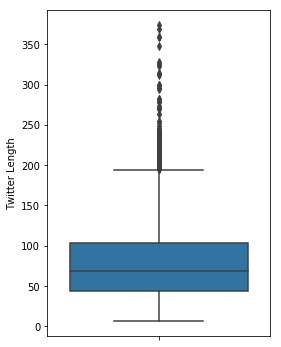

In [12]:
fig, ax = plt.subplots(figsize = (4,6))
sns.boxplot(y=df['pre_length'])
plt.ylabel('Twitter Length')
plt.show()

In [13]:
## Lets see some of the long twitter comments 

In [14]:
df[(df['pre_length'] > 141) & (df['sentiment'] == 0)].head(15)

,sentiment,text,pre_length
213,0,Awwh babs... you look so sad underneith that s...,142
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
464,0,"My bathtub drain is fired: it haz 1 job 2 do, ...",146
492,0,"pears &amp; Brie, bottle of Cabernet, and &quo...",150
1071,0,Used the term &quot;Fail Whale&quot; to a clie...,148
1380,0,"@Craftysince1990 Lol, that's sweet! I bought t...",144
1704,0,@ktml I think its iTunes fault I cant download...,145
1745,0,I am layin in bed @ 3am cos my tummy is beatbo...,147


In [15]:
df[(df['pre_length'] > 141) & (df['sentiment'] == 4)].head(15)

,sentiment,text,pre_length
800014,4,@LutheranLucciol Make sure you DM me if you po...,144
800103,4,Just seen the preview for the movie &quot;Obse...,145
800174,4,@ninasplayground I agree. My kids got &quot;W...,148
800228,4,&quot;City of Ember&quot; was AWESOME!!! SO ha...,148
800252,4,Please?: http://eluts.com/frontstore/Item/ite...,150
800255,4,"@markhoppus hey mark, i want to know if the so...",147
800261,4,Awwh babs... you look so sad underneith that s...,142
800315,4,Giant Drag &quot;Wicked Game&quot; ? http://tw...,152
800333,4,@JonathanRKnight Glad to hear that you had suc...,142
800377,4,@robgokeemusic I know - I should have made som...,142


In [16]:
df.iloc[145]['text']

"@twista202 I still haven't read the 9th&amp;10th Princess diaries  Saving Francesca made me cry at the end. Hmm those are easy books."

In [17]:
## We see the HTMLtags are not converted correctely. We see &amp in the text.

## Lets use BeautifulSoup for to resolve this

In [18]:
from bs4 import BeautifulSoup

comments= [BeautifulSoup(comment,'lxml').get_text() for comment in df['text']]


KeyboardInterrupt: 

In [ ]:


import re

text = re.sub(r'@[A-za-z0-9]+',' ', str(df['text1']))

In [ ]:
df['text']= text

In [ ]:


text= re.sub(r'https?://[a-zA-Z0-9./]+', ' ', str(df['text']))

df['text']= text

In [ ]:
#!pip3 install nltk

In [ ]:
#import nltk
#nltk.download('punkt')
#from nltk.tokenize import word_tokenize

In [19]:
import re
import contractions


def clean_tweets(text):
    ## remove the @ mentions in the tweets 
    pattern1 = r'@[A-za-z0-9_]+'
    ## remove http links from the twitter comments
    pattern2 = r'https?://[a-zA-Z0-9./]+'
    ##remove the www pattern without httpprefix
    pattern3 = r'www.[^ ]+'
    ## remove all other than letters
    pattern4 = r'[^a-zA-Z]'
    ## extra spaces
    pattern5 =r' +'
    ##  1st cleaning
    clean_text = BeautifulSoup(text,'lxml')
    clean_text = clean_text.get_text()
    
    try:
        clean_text = clean_text.decode("utf-8-sig").replace(u'\ufffd','?')
    except:
        clean_text = clean_text
    ##expand the contractions
    clean_text = contractions.fix(clean_text)  ## for example He's flying becomes he is flying
    ## remove the @ mentions in the tweets 
    clean_text = re.sub(pattern1, ' ', clean_text)
    ## remove http links from the twitter comments
    clean_text = re.sub(pattern2, ' ', clean_text)
    ## remove www links from the twitter comments
    clean_text = re.sub(pattern3, ' ', clean_text)
    ## remove all other than letters
    clean_text = re.sub(pattern4, ' ', clean_text)
    ##convert to lower case
    clean_text = clean_text.lower()
    ##remove extra lines and tabs
    clean_text = clean_text.translate(clean_text.maketrans('\n\t\r', '   '))
    ## remove extra spaces
    clean_text = re.sub(pattern5,' ', clean_text)

    
    return clean_text


In [4]:
from tqdm import tqdm_notebook

In [21]:
tweets =[]
for comment in tqdm_notebook(df['text']):
    tweets.append(clean_tweets(comment))


C:\Users\Kaustav\Anaconda3\envs\keras\lib\site-packages\bs4\__init__.py:272: UserWarning: "b' i just received my G8 viola exam.. and its... well... .. disappointing.. :\\..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\Kaustav\Anaconda3\envs\keras\lib\site-packages\bs4\__init__.py:272: UserWarning: "b'E3 ON PLAYSTATION HOME IN ABOUT AN HOUR!!!!!!!!!! \\../  \\../'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


In [22]:
tweets[1]

'is upset that he cannot update his facebook by texting it and might cry as a result school today also blah '

In [23]:
clean_tweet_df = pd.DataFrame(tweets,columns = ['text'])
clean_tweet_df['label'] = df['sentiment']
clean_tweet_df.head()

,text,label
0,awww that is a bummer you shoulda got david c...,0
1,is upset that he cannot update his facebook by...,0
2,i dived many times for the ball managed to sa...,0
3,my whole body feels itchy and like its on fire,0
4,no it is not behaving at all i m mad why am i...,0


In [24]:
##Save the clean tweets

In [25]:
clean_tweet_df.to_csv('clean_tweets.csv', encoding = 'utf-8',index= False)
clean_tweet_df = None
df = pd.read_csv('clean_tweets.csv')
df.head()

,text,label
0,awww that is a bummer you shoulda got david c...,0
1,is upset that he cannot update his facebook by...,0
2,i dived many times for the ball managed to sa...,0
3,my whole body feels itchy and like its on fire,0
4,no it is not behaving at all i m mad why am i...,0


## Load Clean Tweets

In [5]:
df = pd.read_csv('clean_tweets.csv')
df.head()

,text,label
0,awww that is a bummer you shoulda got david c...,0
1,is upset that he cannot update his facebook by...,0
2,i dived many times for the ball managed to sa...,0
3,my whole body feels itchy and like its on fire,0
4,no it is not behaving at all i m mad why am i...,0


In [6]:
##now smileys are getting converted into one letter word. wE WILL TAKE CARE OF IT

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text     1600000 non-null object
label    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [8]:
df['length'] = [len(comments) for comments in df['text']]

In [9]:
df['length'].describe(percentiles = [0.01,0.05, .25, .5, .75, .95, .98, .99])

count    1.600000e+06
mean     6.412658e+01
std      3.433729e+01
min      1.000000e+00
1%       8.000000e+00
5%       1.600000e+01
25%      3.600000e+01
50%      5.900000e+01
75%      9.100000e+01
95%      1.240000e+02
98%      1.310000e+02
99%      1.330000e+02
max      1.670000e+02
Name: length, dtype: float64

In [31]:
df[df['length']==1].count()

text      3749
label     3749
length    3749
dtype: int64

In [10]:
df[df['length']==1].head(2)

,text,label,length
208,,0,1
249,,0,1


In [11]:
df[(df['length']==1) & (df['text']==' ')].count()

text      3749
label     3749
length    3749
dtype: int64

There are 2 things that I have noticed here 

1> There are 3749 rows with text as 1 Space

2> There are lot of rows with one charecter data...This would mean something like :D, ;D etc are reduced to just d.
    This problem is there for many rows and not just rows with one length
    
    
Lets fix it

In [33]:
#!pip install nltk

In [12]:
from nltk.tokenize import word_tokenize


In [13]:
## strip removes the text if the text is only blanks
##lstrip removes the leading spaces in the string
def upd_clean_tweets(text):
    words = [ word for word in word_tokenize(text) if len(word) > 1]
    return ((" ").join(words)).strip()

In [14]:
word_tokenize('I am doing good!')

['I', 'am', 'doing', 'good', '!']

In [15]:
upd_clean_tweets('I am doing good!   ')

'am doing good'

In [16]:
tweets = []
for comments in tqdm_notebook(df['text']):
    tweets.append(upd_clean_tweets(comments))

In [17]:
df['text']= tweets
df['text'].head()

0    awww that is bummer you shoulda got david carr...
1    is upset that he can not update his facebook b...
2    dived many times for the ball managed to save ...
3       my whole body feels itchy and like its on fire
4    no it is not behaving at all mad why am here b...
Name: text, dtype: object

In [18]:
df['length'] = [len(comments) for comments in df['text']]

In [19]:
df['length'].describe()

count    1.600000e+06
mean     6.080306e+01
std      3.340833e+01
min      0.000000e+00
25%      3.300000e+01
50%      5.600000e+01
75%      8.700000e+01
max      1.590000e+02
Name: length, dtype: float64

Thats perfect....I see the minimum length now is 0.0

In [20]:
df[df['length']==1].count()

text      0
label     0
length    0
dtype: int64

In [21]:
##Those data points with text of length 1 is also gone...wonderful

In [22]:
df= df[df['length']>1]



In [25]:
## So here we did dropped few data points
df.shape

(1596059, 3)

In [27]:
## Now all the text with 0 length is dropped.
## So the minimum length of the tweets is 2
df['length'].describe()

count    1.596059e+06
mean     6.095320e+01
std      3.331248e+01
min      2.000000e+00
25%      3.300000e+01
50%      5.600000e+01
75%      8.700000e+01
max      1.590000e+02
Name: length, dtype: float64

In [28]:
df.head()

,text,label,length
0,awww that is bummer you shoulda got david carr...,0,68
1,is upset that he can not update his facebook b...,0,105
2,dived many times for the ball managed to save ...,0,71
3,my whole body feels itchy and like its on fire,0,46
4,no it is not behaving at all mad why am here b...,0,83


In [29]:
len(df) ## SO we have aroung 3.5K data points

1596059

In [52]:
df.to_csv('clean_tweets_upd.csv', encoding = 'utf-8',index= False,columns = ['text', 'label'])

## Clean Tweet Updated Load

In [3]:
##
df =pd.read_csv('clean_tweets_upd.csv')
df.head()

,text,label
0,awww that is bummer you shoulda got david carr...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it is not behaving at all mad why am here b...,0


In [4]:
df.loc[1]['text']

'is upset that he can not update his facebook by texting it and might cry as result school today also blah'

In [5]:
df['text'][0]

'awww that is bummer you shoulda got david carr of third day to do it'

In [6]:
#import nltk
#nltk.download('wordnet')

In [7]:
# Installing wordcloud
#!pip install wordcloud

In [6]:
from wordcloud import WordCloud, STOPWORDS

In [7]:
neg_tweets = ' '.join([comment for comment  in df[df['label']==0]['text']])
pos_tweets = ' '.join([comment for comment  in df[df['label']==4]['text']])

In [37]:
wc = WordCloud(background_color = 'white', max_words = 80,
              stopwords = STOPWORDS)

<function matplotlib.pyplot.show(*args, **kw)>

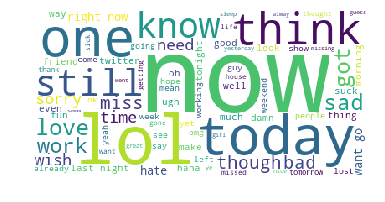

In [38]:
## Negative Comment Visualization

plt.imshow(wc.generate(neg_tweets))
plt.axis('off')
plt.show

I see words like need,miss,sorry,bad,wish

<function matplotlib.pyplot.show(*args, **kw)>

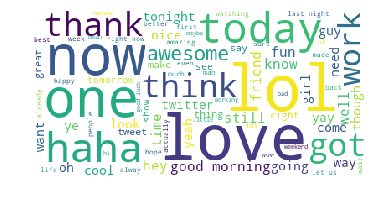

In [62]:
## Positive Comment Visualization

plt.imshow(wc.generate(pos_tweets))
plt.axis('off')
plt.show

I see words like fun,nice, yay,awesome, great

Today,now,work,lol seems to be present in both Positive and Negetive comments

We will see later how to deal with it in case our algorithm is not working well

In [113]:
##
#from sklearn.utils import shuffle

#df = shuffle(df)

In [147]:
#train_ratio = .85
#idx = int(len(df)*train_ratio)

#df_train = df[:idx]
#df_valid = df[idx:]


In [148]:
#print('Count of total Dataset      : ',len(df))

#print('Count of train Dataset      : ',len(df_train))

#print('Count of validation Dataset : ',len(df_valid))

In [8]:
import gc
gc.collect()


0

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(df['text'])


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [10]:
len(vectorizer.get_feature_names())

266797

In [42]:
vectorizer.get_feature_names()

## There are some really stupid words that are extracted as features

['aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaa',
 'aaaaaaa',
 'aaaaaaaa',
 'aaaaaaaaa',
 'aaaaaaaaaa',
 'aaaaaaaaaaa',
 'aaaaaaaaaaaa',
 'aaaaaaaaaaaaa',
 'aaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaargh',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaall',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaao',
 'aaaaaaaaaaaaaaaaaaaaaaaaaargh',
 'aaaaaaaaaaaaaaaaaaaaaaah',
 'aaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh',
 'aaaaaaaaaaaaaaaaaaaaaaahrg',
 'aaaaaaaaaaaaaaaaaaaaah',
 'aaaaaaaaaaaaaaaaaaaaahhhhh',
 'aaaaaaaaaaaaaaaaaaaah',
 'aaaaaaaaaaaaaaaaaaaaint',
 'aaa

In [11]:
neg_doc = vectorizer.transform(df[df['label']==0]['text'])
pos_doc = vectorizer.transform(df[df['label']==4]['text'])

In [12]:
pos_doc.shape

(797858, 266797)

In [13]:
neg_tf = np.sum(neg_doc, axis =0)
pos_tf = np.sum(pos_doc, axis =0)

In [14]:
pos_tf.shape

(1, 266797)

In [15]:
# this is to remove the extra dimension
neg =np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

In [16]:
term_freq = pd.DataFrame([neg,pos], columns = vectorizer.get_feature_names()).transpose()

## Now we have 2 columns negative positive.
## the term frequency for each of the word in both positive and negetive reviews
term_freq.columns =['Negative', 'Positive']
term_freq['total'] = term_freq['Negative']+ term_freq['Positive']
term_freq.head()

,Negative,Positive,total
aa,160,93,253
aaa,93,54,147
aaaa,45,29,74
aaaaa,26,12,38
aaaaaa,16,12,28


In [17]:
term_freq.sort_values(by = 'total', ascending = False).head(20)

,Negative,Positive,total
to,344213,272482,616695
the,258026,266159,524185
is,202770,180263,383033
you,129248,232588,361836
not,242072,105225,347297
my,190776,125956,316732
it,157520,147891,305411
and,153959,149647,303606
in,115542,101163,216705
for,99004,117369,216373


In [18]:
term_freq.sort_values(by = 'total', ascending = False).tail(5)

,Negative,Positive,total
innabit,1,0,1
innaface,1,0,1
innagual,0,1,1
innaloo,0,1,1
zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,1,0,1


In [19]:
## There are some really junk words in the corpus and countVectorizer is taking them as features. NOT GOOD

In [20]:
term_freq.to_csv('term_freq.csv', encoding = 'utf-8')

## Load term Frequency

In [3]:
## Start from here 

term_freq = None
term_freq = pd.read_csv('term_freq.csv')
term_freq.set_index('Unnamed: 0',inplace = True)
term_freq.head()

,Negative,Positive,total
Unnamed: 0,,,
aa,160,93,253
aaa,93,54,147
aaaa,45,29,74
aaaaa,26,12,38
aaaaaa,16,12,28


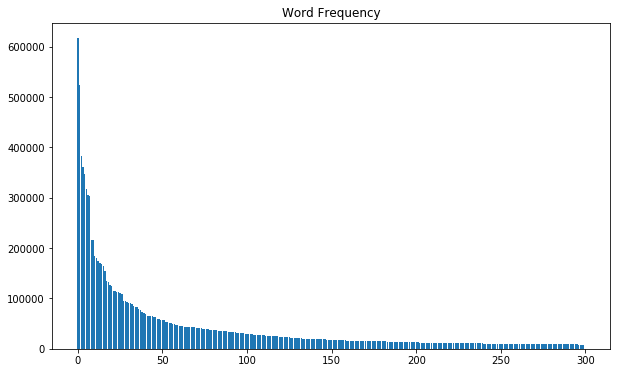

In [96]:
words_count = 300

words = np.arange(words_count)
plt.figure(figsize = (10,6))
plt.bar(x=words,height =term_freq.sort_values(by = 'total',ascending = False)['total'][:words_count])

plt.title('Word Frequency')
plt.show()

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

## Here I am extracting the most important 5000 features
vectorizer = CountVectorizer(stop_words = STOPWORDS,max_features = 5000)
vectorizer.fit(df['text'])


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words={"i'll", 'so', 'above', 'should', 'he', 'until', "you've", 'out', 'you', 'did', 'just', 'yourself', 'ours', "can't", 'nor', 'are', 'them', 'each', 'with', "i've", 'before', "when's", 'at', "won't", 'after', 'few', "shan't", "wasn't", 'for', 'theirs', 'if', "they're", 'who', 'which', 'whom...eren't", 'their', "she'd", 'ever', 'too', "what's", 'only', 'also', 'hers', "hasn't", 'is', 'under'},
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [25]:
neg_doc = vectorizer.transform(df[df['label']==0]['text'])
pos_doc = vectorizer.transform(df[df['label']==4]['text'])
neg_tf = np.sum(neg_doc, axis =0)
pos_tf = np.sum(pos_doc, axis =0)
# this is to remove the extra dimension
neg =np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

## Data frame for Term Frequency
term_freq = pd.DataFrame([neg,pos], columns = vectorizer.get_feature_names()).transpose()

## Now we have 2 columns negative positive.
## the term frequency for each of the word in both positive and negetive comments
term_freq.columns =['Negative', 'Positive']
## Add the columns total 
term_freq['total'] = term_freq['Negative']+ term_freq['Positive']


In [26]:
## THis is still lot of bad words in the learned features. So we will correct them using some other ways

In [27]:
len(vectorizer.get_feature_names())

5000

In [28]:
term_freq.sort_values(by = 'Positive',ascending = False).head(10)

,Negative,Positive,total
good,29209,62118,91327
will,50934,57635,108569
day,41276,47964,89240
love,16990,47697,64687
going,49492,43947,93439
now,52619,41379,93998
lol,23123,36119,59242
thanks,5768,34376,40144
got,38713,32027,70740
time,27526,30432,57958


In [29]:
term_freq.sort_values(by = 'Negative',ascending = False).head(10)

,Negative,Positive,total
now,52619,41379,93998
will,50934,57635,108569
going,49492,43947,93439
go,45635,28378,74013
work,45420,19529,64949
want,41756,17123,58879
day,41276,47964,89240
got,38713,32027,70740
today,38118,30101,68219
back,33090,23869,56959


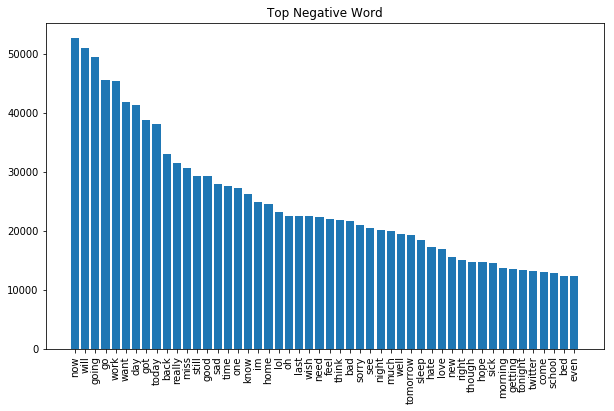

In [30]:
##Top 50 Negative words

words_count = 50

words = np.arange(words_count)
plt.figure(figsize = (10,6))
plt.bar(x=words,height =term_freq.sort_values(by = 'Negative',ascending = False)['Negative'][:words_count])
plt.xticks(ticks = words, labels = term_freq.sort_values(by = 'Negative',ascending = False)['Negative']
           [:words_count].index,rotation = 'vertical')
plt.title('Top Negative Word')
plt.show()

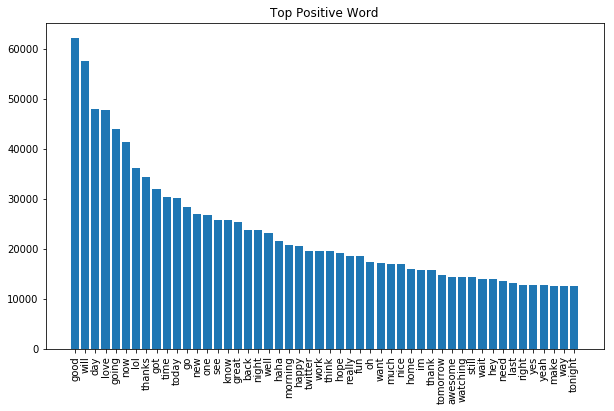

In [31]:
##Top 50 Positive words

words_count = 50

words = np.arange(words_count)
plt.figure(figsize = (10,6))
plt.bar(x=words,height =term_freq.sort_values(by = 'Positive',ascending = False)['Positive'][:words_count])
plt.xticks(ticks = words, labels = term_freq.sort_values(by = 'Positive',ascending = False)['Positive']
           [:words_count].index,rotation = 'vertical')
plt.title('Top Positive Word')
plt.show()

In [32]:
## Some of the words are good features

## However some of the words are used in both positive and negative comments (like will,day)

In [33]:
##Lets look at positive to negetive ratio of the words

term_freq['pos/neg ratio'] = term_freq['Positive']/term_freq['Negative']

In [36]:
##term_freq[(term_freq['pos/neg ratio'] > .9) &  (term_freq['pos/neg ratio'] < 1.1)].head(15)
term_freq[  (term_freq['pos/neg ratio'] > 1.1)].head(10)

,Negative,Positive,total,pos/neg ratio
aah,138,153,291,1.108696
abs,97,112,209,1.154639
absolutely,875,1415,2290,1.617143
accent,108,235,343,2.175926
accepted,118,173,291,1.466102
accomplished,89,232,321,2.606742
ace,196,290,486,1.479592
acoustic,88,202,290,2.295455
across,466,531,997,1.139485
act,375,421,796,1.122667


In [202]:
## Awesome we are able to filter out some words which doesn't make much contribution to labelling a comment

##We will use it later

In [38]:
##term_freq[(term_freq['pos/neg ratio'] < .6) |  (term_freq['pos/neg ratio'] > 1.5)].head(25)
term_freq[(term_freq['pos/neg ratio'] < .6) ].head(10)

,Negative,Positive,total,pos/neg ratio
aa,160,93,253,0.581250
abandoned,159,41,200,0.257862
able,3886,1581,5467,0.406845
ac,535,185,720,0.345794
access,678,240,918,0.353982
accident,750,133,883,0.177333
accidentally,378,94,472,0.248677
ache,1280,101,1381,0.078906
aches,322,36,358,0.111801
aching,320,67,387,0.209375


In [39]:
## Now we get some really interesting words that can be helpful

## We really have to do something about this 'aa', 'aah' words....This is just going to ruin my model

Text(0.5, 1.0, 'Frequency Distribution')

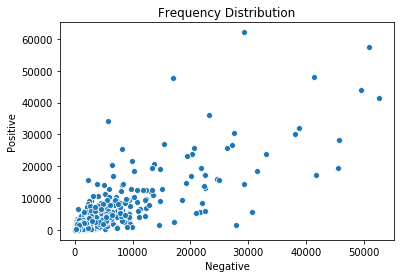

In [40]:
## scatterplot of positive and negative

sns.scatterplot(x = term_freq['Negative'] , y = term_freq['Positive'])
plt.title('Frequency Distribution')

In [41]:
## Positive Frequency percentage

positive_sum = term_freq['Positive'].sum()

term_freq['Positive Freq Pct'] = term_freq['Positive']*1.0/positive_sum

negative_sum = term_freq['Negative'].sum()

term_freq['Negative Freq Pct'] = term_freq['Negative']*1.0/negative_sum

In [42]:
term_freq.sort_values(by = 'Positive Freq Pct', ascending = False).head(10)

,Negative,Positive,total,pos/neg ratio,Positive Freq Pct,Negative Freq Pct
good,29209,62118,91327,2.126673,0.014013,0.006214
will,50934,57635,108569,1.131562,0.013001,0.010837
day,41276,47964,89240,1.162031,0.010820,0.008782
love,16990,47697,64687,2.807357,0.010760,0.003615
going,49492,43947,93439,0.887962,0.009914,0.010530
now,52619,41379,93998,0.786389,0.009334,0.011195
lol,23123,36119,59242,1.562038,0.008148,0.004920
thanks,5768,34376,40144,5.959778,0.007755,0.001227
got,38713,32027,70740,0.827293,0.007225,0.008236
time,27526,30432,57958,1.105573,0.006865,0.005856


In [43]:
## Good love thanks great is part of the top positive percentage

In [44]:
import gc
gc.collect()

14557

# START from here

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
##load clean tweets

##
df =pd.read_csv('clean_tweets_upd.csv')
df.head()

,text,label
0,awww that is bummer you shoulda got david carr...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it is not behaving at all mad why am here b...,0


In [11]:
## Update the labels for Positive tweets to 1. In the datset it is 4 for positive and 0 for negative
df['label'] = df['label'].apply(lambda x : 0 if x==0 else 1)

In [7]:
    ##remove repeated characters like wow wowwwwwww, wowwwww
    ##try this -----------------
    ###   s = re.sub(r'(.)\1+', r'\1\1', s) add this at a later point 

In [8]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label']

X_train,X_valid, y_train,y_valid = train_test_split(X,y,test_size= 0.01, shuffle = True, random_state = 1)

In [52]:
print('No of positive training example    : ', (y_train==1).sum())
print('No of negative training example    : ', (y_train==0).sum())
print('No of positive validation example  : ', (y_valid==1).sum())
print('No of negative validation example  : ', (y_valid==0).sum())

No of positive training example    :  789869
No of negative training example    :  790229
No of positive validation example  :  7989
No of negative validation example  :  7972


In [53]:
## There are more number of negative examples here. So if a classifier predict negative label for all the tweets 
### This is called Zero Rule (ZeroR)

## The best train accuracy would be 50.01 on training set and 50.05 on validation set

##However the no of postive and negative is almost same. So I am not balancing the dataset

In [54]:
##Another baseline is TextBlob Sentiment Classifier


In [9]:
from textblob import TextBlob
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score



In [56]:
result = [TextBlob(i).sentiment.polarity for i in X_valid]

In [57]:
pred = [0 if p <0 else 1 for p in result]

confusion = confusion_matrix(y_valid,pred,labels = [1,0])

In [58]:
confusion = pd.DataFrame(confusion, index=['True positive', 'True negative'],
                         columns=['Pred positive','Pred negative'])
print(confusion)

               Pred positive  Pred negative
True positive           7175            814
True negative           5454           2518


In [59]:
print(classification_report(y_valid,pred))

              precision    recall  f1-score   support

           0       0.76      0.32      0.45      7972
           1       0.57      0.90      0.70      7989

   micro avg       0.61      0.61      0.61     15961
   macro avg       0.66      0.61      0.57     15961
weighted avg       0.66      0.61      0.57     15961



In [60]:
print("Accuracy Score :" , accuracy_score(y_valid, pred))

Accuracy Score : 0.6072927761418457


##### Feature Extraction

In [61]:
##Feature Extraction using Bag of Words Approach

##Bag of words just find if the word is there in that document or not. The words that it checks for are the words that are 
##part of the dictionary.

Dictionary size cant be of unlimited size. We need to restricit to some reasonable size to make it wrk for 
Bag of Words. 

In [62]:
##Lets try out the simplest classification algorithm to check the optimal dictionary size 

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time
from tqdm import tqdm_notebook

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
def check_classifier_accuracy(pipeline, X_train,y_train,X_valid, y_valid):
    if len(X_valid[y_valid==0]) > len(X_valid[y_valid==1]):
        default_accuracy = float(len(X_valid[y_valid==0]))/len(X_valid)
    else:
        default_accuracy = float(len(X_valid[y_valid==1]))/len(X_valid)
    start_time = time()
    ##print('a')
    sentiment = pipeline.fit(X_train,y_train)
    ##print('b')
    end_time = time() 
    predict = sentiment.predict(X_valid)

    
    classifier_accuracy = accuracy_score(y_valid, predict)
    
    if default_accuracy > classifier_accuracy:
        print('Classifier Accuracy is worse than Default Accuracy by', abs(classifier_accuracy - default_accuracy)*100,'%')
    elif default_accuracy == classifier_accuracy:
        print('Classifier Accuracy and Default Accuracy is same')
    else:
        print('Classifier Accuracy is better than Default Accuracy by', (classifier_accuracy - default_accuracy)*100,'%')
    print('Training time ',(end_time - start_time) )
    
    return classifier_accuracy,(end_time - start_time)



def check_feature_accuracy(X_train,y_train,X_valid, y_valid,vectorizer,no_of_features,classifier,
                           stop_words = None, n_gram = (1,1)):
    comparison = []
    for n in tqdm_notebook(no_of_features,total = len(no_of_features)):
        vectorizer.set_params(stop_words= stop_words, max_features = n,ngram_range = n_gram)
        
        build_pipeline = Pipeline([('vectorizer', vectorizer),
                                   ('classifier',classifier)])
        
        print('\n')
        print('Validation Result for',n,'features')
        
        feature_accuracy, time_taken = check_classifier_accuracy(build_pipeline, X_train,y_train,X_valid, y_valid)
        comparison.append((n,feature_accuracy, time_taken))
    return comparison

In [19]:
no_of_features = np.arange(5000,100001, 5000)
print(len(no_of_features))

20


In [24]:
cvec = CountVectorizer()
lr = LogisticRegression()
no_of_features = np.arange(5000,100001, 5000)

outcome = check_feature_accuracy(X_train,y_train,X_valid, y_valid,vectorizer= cvec,no_of_features=no_of_features,
                                 classifier=lr,stop_words = None,n_gram = (1,1))
    



Validation Result for 5000 features
Classifier Accuracy is better than Default Accuracy by 28.444333061838233 %
Training time  91.3567430973053


Validation Result for 10000 features
Classifier Accuracy is better than Default Accuracy by 28.94555478980014 %
Training time  101.01932406425476


Validation Result for 15000 features
Classifier Accuracy is better than Default Accuracy by 29.13977820938538 %
Training time  116.49037075042725


Validation Result for 20000 features
Classifier Accuracy is better than Default Accuracy by 29.352797443769198 %
Training time  137.88916397094727


Validation Result for 25000 features
Classifier Accuracy is better than Default Accuracy by 29.42171543136395 %
Training time  163.4816768169403


Validation Result for 30000 features
Classifier Accuracy is better than Default Accuracy by 29.496898690558236 %
Training time  132.83764958381653


Validation Result for 35000 features
Classifier Accuracy is better than Default Accuracy by 29.46557233256062 %

From the above we see the 50K or 55K Features would be a ideal approach for this problem

In [26]:
term_freq = pd.read_csv('term_freq.csv')
term_freq.head(5)
term_freq.set_index('0',inplace = True)
term_freq.sort_values(by = 'total',ascending = False).head(10)

,Negative,Positive,total
Unnamed: 0,,,
to,344213,272482,616695
the,258026,266159,524185
is,202770,180263,383033
you,129248,232588,361836
not,242072,105225,347297
my,190776,125956,316732
it,157520,147891,305411
and,153959,149647,303606
in,115542,101163,216705


In [27]:
     

english_stop_words = text.ENGLISH_STOP_WORDS

In [28]:
custom_stop_words = list(term_freq.sort_values(by = 'total',ascending = False).head(10).index)

In [79]:
#custom_stop_words.append('abcd')
#custom_stop_words.append('efgh')

In [29]:
all_found = True
not_found = []
for word in custom_stop_words:
    if word not in english_stop_words:
        all_found = False
        not_found.append(word)
        
if all_found == True:
    print('All the custome stop words are in the english stop words')
else:
    print('the below words are not included in the english stop wrds')
    print(not_found)

    

All the custome stop words are in the english stop words


In [30]:
stopwords_list = [None, custom_stop_words, english_stop_words]

In [19]:
##Reusing check_classifier accuracy here

#def check_feature_accuracy_based_on_stopword(X_train,y_train,X_valid, y_valid,vectorizer,no_of_features,classifier,
#                           stop_words_list = None, n_gram = (1,1)):
    #comparison = []
    #features =['NONE Stopword', 'Custom Stopwords', 'English Stopwords']
    #for i,stopword in tqdm_notebook(enumerate(stopwords_list),total = len(stopwords_list)):
        #vectorizer.set_params(stop_words= stopword, max_features = no_of_features,ngram_range = n_gram)
        
        #build_pipeline = Pipeline([('vectorizer', vectorizer),
        #                           ('classifier',classifier)])
        
        #print('\n')
        #print('Validation Result for',features[i])
        
       # feature_accuracy, time_taken = check_classifier_accuracy(build_pipeline, X_train,y_train,X_valid, y_valid)
     #   comparison.append((feature_accuracy, time_taken))
  #  return comparison

In [20]:
cvec = CountVectorizer()
lr = LogisticRegression()
no_of_features = np.arange(10000,100001, 10000)

#stopwords_list = [None, custom_stop_words, english_stop_words]

### WITHOUT STOPWORDS

result_without_stopword = check_feature_accuracy(X_train,y_train,X_valid, y_valid,vectorizer= cvec,no_of_features=no_of_features,
                                 classifier=lr,stop_words = None,n_gram = (1,1))




Validation Result for 10000 features
Classifier Accuracy is better than Default Accuracy by 28.94555478980014 %
Training time  258.40406703948975


Validation Result for 20000 features
Classifier Accuracy is better than Default Accuracy by 29.352797443769198 %
Training time  369.1434314250946


Validation Result for 30000 features
Classifier Accuracy is better than Default Accuracy by 29.496898690558236 %
Training time  387.8158586025238


Validation Result for 40000 features
Classifier Accuracy is better than Default Accuracy by 29.55328613495396 %
Training time  486.2933831214905


Validation Result for 50000 features
Classifier Accuracy is better than Default Accuracy by 29.60967357934967 %
Training time  517.5896270275116


Validation Result for 60000 features
Classifier Accuracy is better than Default Accuracy by 29.60967357934967 %
Training time  474.7379548549652


Validation Result for 70000 features
Classifier Accuracy is better than Default Accuracy by 29.59714303615062 %
T

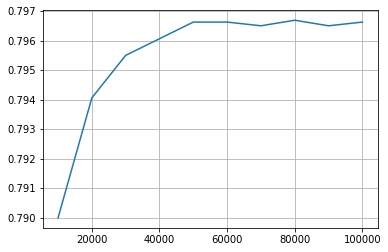

In [23]:
features_plot_without_stopword = pd.DataFrame(result_without_stopword,columns=['features','valid_accuracy','train_time'])
plt.plot(features_plot_without_stopword['features'],features_plot_without_stopword['valid_accuracy'],
        label = 'Without Stopwords')
plt.grid()
plt.show()

In [24]:
features_plot_without_stopword.to_csv('features_plot_without_stopword.csv')

In [ ]:
result_with_english_stopword = check_feature_accuracy(X_train,y_train,X_valid, y_valid,vectorizer= cvec,no_of_features=no_of_features,
                                 classifier=lr,stop_words = english_stop_words,n_gram = (1,1))

In [ ]:
result_with_custom_stopword = check_feature_accuracy(X_train,y_train,X_valid, y_valid,vectorizer= cvec,no_of_features=no_of_features,
                                 classifier=lr,stop_words = custom_stop_words,n_gram = (1,1))

In [ ]:
## Result with Bigram with Stopwords

result_with_english_stopword_bigram = check_feature_accuracy(X_train,y_train,X_valid, y_valid,vectorizer= cvec,no_of_features=no_of_features,
                                 classifier=lr,stop_words = english_stop_words,n_gram = (1,2))

In [ ]:
## Result with Trigram with Stopwords

result_with_english_stopword_trigram = check_feature_accuracy(X_train,y_train,X_valid, y_valid,vectorizer= cvec,no_of_features=no_of_features,
                                 classifier=lr,stop_words = english_stop_words,n_gram = (1,3))

In [ ]:
## Result with Bigram without Stopwords

result_without_stopword_bigram = check_feature_accuracy(X_train,y_train,X_valid, y_valid,vectorizer= cvec,no_of_features=no_of_features,
                                 classifier=lr,stop_words = None,n_gram = (1,2))

In [ ]:
## Result with Trigram without Stopwords

result_without_stopword_bigram = check_feature_accuracy(X_train,y_train,X_valid, y_valid,vectorizer= cvec,no_of_features=no_of_features,
                                 classifier=lr,stop_words = None,n_gram = (1,3))

In [25]:
## Classifier with best parameter found

cvec = CountVectorizer()
lr = LogisticRegression()

cvec.set_params(stop_words= english_stop_words, max_features = 80000,ngram_range = (1,3))
        
pipeline = Pipeline([('vectorizer', cvec),
                     ('classifier',lr)])

sentiment = pipeline.fit(X_train,y_train)
 
predict = sentiment.predict(X_valid)

print(accuracy_score(y_valid, predict))

0.7763298038969989


In [26]:
confusion = confusion_matrix(y_valid,predict,labels = [1,0])
confusion = pd.DataFrame(confusion, index=['True positive', 'True negative'],
                         columns=['Pred positive','Pred negative'])
print(confusion)

               Pred positive  Pred negative
True positive           6451           1538
True negative           2032           5940


##### TFIDF another way of representing text data in numerical form

doc1: ##NLP is awesome

doc2 :##NLP is just too good
    
TF(is| doc1) = 1/3

TF(is| doc2) = 1/5

IDF = Inverse document frequency 

IDF = log(total of no of document /total no of  document where term t is present)

IDF(is) = log(2/2) = 0

TFIDF = TF* IDF

In [82]:
##Using tfidf 

from sklearn.feature_extraction.text import TfidfVectorizer

##tvec = CountVectorizer()
tvec = TfidfVectorizer()
lr = LogisticRegression()
no_of_features = np.arange(10000,100001, 10000)



In [83]:
##tfidf with english stopword and unigram
result_tfidf_unigram = check_feature_accuracy(X_train,y_train,X_valid, y_valid,vectorizer= tvec,no_of_features=no_of_features,
                                 classifier=lr,stop_words = english_stop_words,n_gram = (1,1))



Validation Result for 10000 features
Classifier Accuracy is better than Default Accuracy by 25.969550780026317 %
Training time  37.38772010803223


Validation Result for 20000 features
Classifier Accuracy is better than Default Accuracy by 26.301610174801084 %
Training time  40.5847487449646


Validation Result for 30000 features
Classifier Accuracy is better than Default Accuracy by 26.426915606791557 %
Training time  41.19218707084656


Validation Result for 40000 features
Classifier Accuracy is better than Default Accuracy by 26.564751581981085 %
Training time  43.57162928581238


Validation Result for 50000 features
Classifier Accuracy is better than Default Accuracy by 26.520894680784412 %
Training time  44.52921104431152


Validation Result for 60000 features
Classifier Accuracy is better than Default Accuracy by 26.558486310381557 %
Training time  46.841363191604614


Validation Result for 70000 features
Classifier Accuracy is better than Default Accuracy by 26.52715995238394 

In [ ]:
##tfidf with english stopword and bigram
result_tfidf_bigram = check_feature_accuracy(X_train,y_train,X_valid, y_valid,vectorizer= tvec,no_of_features=no_of_features,
                                 classifier=lr,stop_words = english_stop_words,n_gram = (1,2))

In [45]:
##tfidf with english stopword and trigram
result_tfidf_trigram = check_feature_accuracy(X_train,y_train,X_valid, y_valid,vectorizer= tvec,no_of_features=no_of_features,
                                 classifier=lr,stop_words = english_stop_words,n_gram = (1,3))



Validation Result for 10000 features
Classifier Accuracy is better than Default Accuracy by 26.677526470772516 %
Training time  386.5464026927948


Validation Result for 20000 features
Classifier Accuracy is better than Default Accuracy by 26.896810976755848 %
Training time  406.39031958580017


Validation Result for 30000 features
Classifier Accuracy is better than Default Accuracy by 27.379236889919177 %
Training time  408.9915997982025


Validation Result for 40000 features
Classifier Accuracy is better than Default Accuracy by 27.441889605914415 %
Training time  479.146253824234


Validation Result for 50000 features
Classifier Accuracy is better than Default Accuracy by 27.498277050310136 %
Training time  207.4072163105011


Validation Result for 60000 features
Classifier Accuracy is better than Default Accuracy by 27.560929766305374 %
Training time  198.0772521495819


Validation Result for 70000 features
Classifier Accuracy is better than Default Accuracy by 27.65490884029823 

In [46]:
##tfidf without stopword and trigram

no_of_features = np.arange(50000,100001, 10000)
result_tfidf_trigram_without_stopwords = check_feature_accuracy(X_train,y_train,X_valid, y_valid,
                                                                vectorizer= tvec,no_of_features=no_of_features,
                                                                classifier=lr,stop_words = None,n_gram = (1,3))



Validation Result for 50000 features
Classifier Accuracy is better than Default Accuracy by 31.21358310882777 %
Training time  372.5449311733246


Validation Result for 60000 features
Classifier Accuracy is better than Default Accuracy by 31.326357997619205 %
Training time  482.3391683101654


Validation Result for 70000 features
Classifier Accuracy is better than Default Accuracy by 31.508050874005388 %
Training time  469.8709354400635


Validation Result for 80000 features
Classifier Accuracy is better than Default Accuracy by 31.395275985213967 %
Training time  488.0585479736328


Validation Result for 90000 features
Classifier Accuracy is better than Default Accuracy by 31.326357997619205 %
Training time  557.9905953407288


Validation Result for 100000 features
Classifier Accuracy is better than Default Accuracy by 31.38901071361444 %
Training time  664.1480021476746



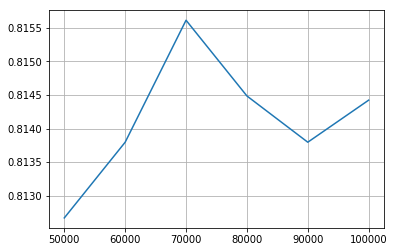

In [49]:
features_plot_with_tfidf_trigram_without_stopwords = pd.DataFrame(result_tfidf_trigram_without_stopwords,columns=['features','valid_accuracy','train_time'])
plt.plot(features_plot_with_tfidf_trigram_without_stopwords['features'],
         features_plot_with_tfidf_trigram_without_stopwords['valid_accuracy'],
         label = 'Without Stopwords')
plt.grid()
plt.show()

70000 features without stopwords removal and tfidf is the best accuracy for logistic regression

### Comparison of various Classification Algorithm

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#from lightgbm import LGBMClassifier
#from xgboost import XGBClassifier
#from catboost import Pool, CatBoostClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import VotingClassifier



In [132]:
def check_feature_accuracy_for_classifiers(X_train,y_train,X_valid, y_valid,vectorizer,no_of_features,classifiers,
                           no_of_classifiers=1,stop_words = None, n_gram = (1,1)):
    comparison = []
    
    for name,classifier in tqdm_notebook(classifiers, total = no_of_classifiers):
        
        for n in (no_of_features):
            vectorizer.set_params(stop_words= stop_words, max_features = n,ngram_range = n_gram)
        
            build_pipeline = Pipeline([('vectorizer', vectorizer),
                                   ('classifier',classifier)])
        
            print('\n')
            print('Validation Result for',name, 'classifier with',n,'features',)
        
            feature_accuracy, time_taken = check_classifier_accuracy(build_pipeline, X_train,y_train,X_valid, y_valid)
            comparison.append((name,n,feature_accuracy, time_taken))
    return comparison

In [ ]:
names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]

classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]

classifier_zip = zip(names,classifiers)

tvec = TfidfVectorizer()
##COMMENTED AS OF NOW THE BELOW LINE
##no_of_features = np.arange(50000,100001, 10000)
no_of_features = [100000]

comparison = check_feature_accuracy_for_classifiers(X_train,y_train,X_valid, y_valid,tvec,no_of_features,
                                                    classifier_zip,no_of_classifiers= len(classifiers),
                                                    stop_words = None, n_gram=(1,1))
        



Validation Result for Logistic Regression classifier with 50000 features
Classifier Accuracy is better than Default Accuracy by 29.753774826138713 %
Training time  53.26308608055115


Validation Result for Logistic Regression classifier with 60000 features
Classifier Accuracy is better than Default Accuracy by 29.822692813733475 %
Training time  52.2398316860199


Validation Result for Logistic Regression classifier with 70000 features
Classifier Accuracy is better than Default Accuracy by 29.80389699893491 %
Training time  54.226789474487305


Validation Result for Logistic Regression classifier with 80000 features
Classifier Accuracy is better than Default Accuracy by 29.77257064093729 %
Training time  51.3921754360199


Validation Result for Logistic Regression classifier with 90000 features
Classifier Accuracy is better than Default Accuracy by 29.797631727335382 %
Training time  59.747554302215576


Validation Result for Logistic Regression classifier with 100000 features
Classi

In [ ]:
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    MultinomialNB(),
    RidgeClassifier(),
    PassiveAggressiveClassifier(),
    VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('mnb', clf3), ('rcs', clf4), ('pac', clf5)], voting='hard')
    ]

names = ["Logistic Regression", "Linear SVC","Multinomial NB", 
         "Ridge Classifier","Passive-Aggresive", "Ensemble Hard Voting"]

classifier_zip = zip(names,classifiers)

tvec = TfidfVectorizer()
##COMMENTED AS OF NOW THE BELOW LINE
##no_of_features = np.arange(50000,100001, 10000)
no_of_features = [100000]

comparison = check_feature_accuracy_for_classifiers(X_train,y_train,X_valid, y_valid,tvec,no_of_features,
                                                    classifier_zip,no_of_classifiers= len(classifiers),
                                                    stop_words = None, n_gram=(1,1))
        


Using the reference from https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/doc2vec-IMDB.ipynb 
I have used the below method to get the vector representation for each tweets

DBOW (Distributed Bag of Words)
DMC (Distributed Memory Concatenated)
DMM (Distributed Memory Mean)
DBOW + DMC
DBOW + DMM

In [14]:
from tqdm import tqdm, tqdm_notebook
from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence  ##Label tweets with unique Id's
import multiprocessing
from sklearn import utils

def labelize_tweets_ug(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(LabeledSentence(t.split(), [prefix + '_%s' % i]))
    return result

all_x = pd.concat([X_train,X_valid])  ##[x_train,x_valid,x_test]
all_x_w2v = labelize_tweets_ug(all_x, 'all')

In [20]:
##DBOW (Distributed Bag Of Words)

import multiprocessing

cores = multiprocessing.cpu_count()
## dm = 0 means ‘distributed bag of words’
## dm = 1 means ‘distributed memory’
## vector_size (int, optional) – Dimensionality of the feature vectors.
## min_count  – Ignores all words with total frequency lower than this.
## workers – Use these many worker threads to train the model (=faster training with multicore machines)
## alpha  – The initial learning rate.
## min_alpha – Learning rate will linearly drop to min_alpha as training progresses.
##negative (int, optional) – If > 0, negative sampling will be used, the int for negative specifies 
##how many “noise words” should be drawn (usually between 5-20). 
##If set to 0, no negative sampling is used.
model_ug_dbow = Doc2Vec(dm=0, size=100, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dbow.build_vocab([x for x in tqdm(all_x_w2v)])

for epoch in range(30):
    model_ug_dbow.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dbow.alpha -= 0.002
    model_ug_dbow.min_alpha = model_ug_dbow.alpha

100%|███████████████████████████████████████████████████████████████████| 1596059/1596059 [00:00<00:00, 3348001.93it/s]


In [23]:
from sklearn.linear_model import LogisticRegression

def get_vectors(model, corpus, size):
    vecs = np.zeros((len(corpus), size))
    for n,i in enumerate(corpus.index):
        prefix = 'all_' + str(i)
        vecs[n] = model.docvecs[prefix]
    return vecs 

#####
train_vecs_dbow = get_vectors(model_ug_dbow, X_train, 100)
valid_vecs_dbow = get_vectors(model_ug_dbow, X_valid, 100)

#####
classifier = LogisticRegression()
classifier.fit(train_vecs_dbow, y_train)
score = classifier.score(valid_vecs_dbow, y_valid)
print('Logistic Regression score', score)

Logistic Regression score 0.7325355554163273


In [24]:
cores = multiprocessing.cpu_count()
## dm = 1 means ‘distributed memory’
model_ug_dmc = Doc2Vec(dm=1, dm_concat=1, size=100, window=2, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dmc.build_vocab([x for x in tqdm(all_x_w2v)])

for epoch in range(30):
    model_ug_dmc.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dmc.alpha -= 0.002
    model_ug_dmc.min_alpha = model_ug_dmc.alpha

100%|███████████████████████████████████████████████████████████████████| 1596059/1596059 [00:00<00:00, 3712758.84it/s]


In [25]:
train_vecs_dmc = get_vectors(model_ug_dmc, X_train, 100)
valid_vecs_dmc = get_vectors(model_ug_dmc, X_valid, 100)

#####
classifier = LogisticRegression()
classifier.fit(train_vecs_dmc, y_train)
score = classifier.score(valid_vecs_dmc, y_valid)
print('Logistic Regression score', score)

Logistic Regression score 0.6684418269531984


In [26]:
model_ug_dmc.most_similar('facebook')

[('fb', 0.8439792394638062),
 ('myspace', 0.8416010141372681),
 ('msn', 0.8140120506286621),
 ('youtube', 0.7948694229125977),
 ('bebo', 0.7834290862083435),
 ('skype', 0.773496150970459),
 ('aim', 0.771538496017456),
 ('flickr', 0.7704470157623291),
 ('tumblr', 0.7511820793151855),
 ('ryze', 0.7383776903152466)]

In [27]:
model_ug_dmc.most_similar('good')

[('goood', 0.7604542374610901),
 ('gud', 0.7516001462936401),
 ('gd', 0.737593948841095),
 ('goooooooood', 0.7275181412696838),
 ('goooood', 0.7237046957015991),
 ('gooood', 0.6945241093635559),
 ('wiiiiish', 0.6878352165222168),
 ('rtwt', 0.6877995729446411),
 ('great', 0.6833236813545227),
 ('gooooood', 0.6819905042648315)]

In [28]:
##DMM (Distributed Memory Mean)


cores = multiprocessing.cpu_count()
model_ug_dmm = Doc2Vec(dm=1, dm_mean=1, size=100, window=4, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dmm.build_vocab([x for x in tqdm(all_x_w2v)])

for epoch in range(30):
    model_ug_dmm.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dmm.alpha -= 0.002
    model_ug_dmm.min_alpha = model_ug_dmm.alpha

100%|███████████████████████████████████████████████████████████████████| 1596059/1596059 [00:01<00:00, 1028645.60it/s]


In [ ]:
train_vecs_dmm = get_vectors(model_ug_dmm, X_train, 100)
valid_vecs_dmm = get_vectors(model_ug_dmm, X_valid, 100)

#####
classifier = LogisticRegression()
classifier.fit(train_vecs_dmm, y_train)
score = classifier.score(valid_vecs_dmm, y_valid)
print('Logistic Regression score', score)

In [ ]:
model_ug_dmm.most_similar('good')

In [ ]:
## Combined Model
##DBOW + DMC

##combining DBOW + DMM

def get_concat_vectors(model1,model2, corpus, size):
    vecs = np.zeros((len(corpus), size))
    for n,i in enumerate(corpus.index):
        prefix = 'all_' + str(i)
        vecs[n] = np.append(model1.docvecs[prefix],model2.docvecs[prefix])
    return vecs 

#####
train_vecs_dbow_dmc = get_concat_vectors(model_ug_dbow,model_ug_dmc, X_train, 100)
valid_vecs_dbow_dmc = get_concat_vectors(model_ug_dbow,model_ug_dmc, X_valid, 100)

#####
classifier = LogisticRegression()
classifier.fit(train_vecs_dbow_dmc, y_train)
score = classifier.score(valid_vecs_dbow_dmc, y_valid)
print('Logistic Regression score', score)

In [ ]:
##combining DBOW and DMM

#####
train_vecs_dbow_dmm = get_concat_vectors(model_ug_dbow,model_ug_dmm, X_train, 100)
valid_vecs_dbow_dmm = get_concat_vectors(model_ug_dbow,model_ug_dmm, X_valid, 100)

#####
classifier = LogisticRegression()
classifier.fit(train_vecs_dbow_dmm, y_train)
score = classifier.score(valid_vecs_dbow_dmm, y_valid)
print('Logistic Regression score', score)

In [ ]:
###Phrase Modelling

In [ ]:
from gensim.models.phrases import Phrases, Phraser

tokenized_train = [t.split() for t in X_train]
phrases = Phrases(tokenized_train)
bigram  = Phraser(phrases)

In [ ]:
##transform our corpus with this bigram model.

def labelize_tweets_bigram(tweets, labels):
    result = []
    prefix = label
    for i,t in zip(tweets.index, tweets):
        prefix = label
        result.append(LabelSentence(bigram[t.split()],[prefix + '_%s' % i]))
    return result

all_x = pd.concat([X_train, X_valid], axis =0)
all_x_w2v_bg = labelize_tweets_bg(all_x, 'all')

In [ ]:
##Distributed Bag of Word with Bigram Phrases (DBOW)

In [ ]:
cores = multiprocessing.cpu_count()
model_bg_dbow = Doc2Vec(dm=0, size=100, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_bg_dbow.build_vocab([x for x in tqdm(all_x_w2v_bg)])

for epoch in range(30):
    model_bg_dbow.train(utils.shuffle([x for x in tqdm(all_x_w2v_bg)]), total_examples=len(all_x_w2v_bg), epochs=1)
    model_bg_dbow.alpha -= 0.002
    model_bg_dbow.min_alpha = model_bg_dbow.alpha
    
train_vecs_dbow_bg = get_vectors(model_bg_dbow, x_train, 100)
validation_vecs_dbow_bg = get_vectors(model_bg_dbow, x_valid, 100)

classifier = LogisticRegression()
classifier.fit(train_vecs_dbow_bg, y_train)
score = classifier.score(validation_vecs_dbow_bg, y_valid)
print('Logistic Regression score', score)

In [ ]:
##DMC (Distributed Memory Concatenated) 

In [ ]:
cores = multiprocessing.cpu_count()
model_bg_dmc = Doc2Vec(dm=1, dm_concat=1, size=100, window=2, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_bg_dmc.build_vocab([x for x in tqdm(all_x_w2v_bg)])

for epoch in range(30):
    model_bg_dmc.train(utils.shuffle([x for x in tqdm(all_x_w2v_bg)]), total_examples=len(all_x_w2v_bg), epochs=1)
    model_bg_dmc.alpha -= 0.002
    model_bg_dmc.min_alpha = model_bg_dmc.alpha
    
train_vecs_dmc_bg = get_vectors(model_bg_dmc, x_train, 100)
validation_vecs_dmc_bg = get_vectors(model_bg_dmc, x_valid, 100)

classifier = LogisticRegression()
classifier.fit(train_vecs_dmc_bg, y_train)
score = classifier.score(validation_vecs_dmc_bg, y_valid)
print('Logistic Regression score', score)

In [ ]:
model_bg_dmc.most_similar('new_york')

In [ ]:
##DMM (Distributed Memory Mean) with bigram 

In [ ]:
cores = multiprocessing.cpu_count()
model_bg_dmm = Doc2Vec(dm=1, dm_mean=1, size=100, window=4, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_bg_dmm.build_vocab([x for x in tqdm(all_x_w2v_bg)])

for epoch in range(30):
    model_bg_dmm.train(utils.shuffle([x for x in tqdm(all_x_w2v_bg)]), total_examples=len(all_x_w2v_bg), epochs=1)
    model_bg_dmm.alpha -= 0.002
    model_bg_dmm.min_alpha = model_bg_dms.alpha
    
train_vecs_dmm_bg = get_vectors(model_bg_dmm, x_train, 100)
validation_vecs_dmm_bg = get_vectors(model_bg_dmm, x_validation, 100)

classifier = LogisticRegression()
classifier.fit(train_vecs_dmm_bg, y_train)
score = classifier.score(validation_vecs_dmm_bg, y_valid)
print('Logistic Regression score', score)

In [ ]:
##Combined models

In [ ]:
##DBOW + DMC

train_vecs_dbow_dmc_bg = get_concat_vectors(model_bg_dbow,model_bg_dmc, x_train, 200)
validation_vecs_dbow_dmc_bg = get_concat_vectors(model_bg_dbow,model_bg_dmc, x_validation, 200)


classifier = LogisticRegression()
classifier.fit(train_vecs_dbow_dmc_bg, y_train)
score = classifier.score(validation_vecs_dbow_dmc_bg, y_valid)
print('Logistic Regression score', score)

In [ ]:
##DBOW + DMM
train_vecs_dbow_dmm_bg = get_concat_vectors(model_bg_dbow,model_bg_dmm, x_train, 200)
validation_vecs_dbow_dmm_bg = get_concat_vectors(model_bg_dbow,model_bg_dmm, x_validation, 200)


classifier = LogisticRegression()
classifier.fit(train_vecs_dbow_dmm_bg, y_train)
score = classifier.score(validation_vecs_dbow_dmm_bg, y_valid)
print('Logistic Regression score', score)

In [ ]:
##Trigram Phrase Modelling

from gensim.models.phrases import Phrases, Phraser

tokenized_train = [t.split() for t in X_train]
phrases = Phrases(tokenized_train)
bigram  = Phraser(phrases)
## Passing Bigram to get Trigram
phrases = Phrases(bigram[tokenized_train])
trigram  = Phraser(phrases)

In [ ]:
##trigram[bigram[X_train.split()]]

##transform our corpus with this bigram model.

def labelize_tweets_trigram(tweets, labels):
    result = []
    prefix = label
    for i,t in zip(tweets.index, tweets):
        prefix = label
        result.append(LabelSentence(trigram[bigram[t.split()]],[prefix + '_%s' % i]))
    return result

all_x = pd.concat([X_train, X_valid], axis =0)
all_x_w2v_tg = labelize_tweets_bg(all_x, 'all')

In [ ]:
##Distributed Bag of Word with Bigram Phrases (DBOW)

In [ ]:
cores = multiprocessing.cpu_count()
model_tg_dbow = Doc2Vec(dm=0, size=100, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_tg_dbow.build_vocab([x for x in tqdm(all_x_w2v_tg)])

for epoch in range(30):
    model_tg_dbow.train(utils.shuffle([x for x in tqdm(all_x_w2v_tg)]), total_examples=len(all_x_w2v_tg), epochs=1)
    model_tg_dbow.alpha -= 0.002
    model_tg_dbow.min_alpha = model_bg_dbow.alpha
    
train_vecs_dbow_tg = get_vectors(model_tg_dbow, x_train, 100)
validation_vecs_dbow_tg = get_vectors(model_tg_dbow, x_valid, 100)

classifier = LogisticRegression()
classifier.fit(train_vecs_dbow_tg, y_train)
score = classifier.score(validation_vecs_dbow_tg, y_valid)
print('Logistic Regression score', score)

In [ ]:
##Dimensionality reduction

In [10]:
###Chi Square

In [ ]:
##chi-square measures lack of independence between a feature and class, if a feature has high chi-squared score 
##compared to other features, it means that the feature is useful to predict the class.

In [11]:
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer

##transform the train data into Tfidf vectors of 100,000 features 
##and see which features chi2 has chosen as useful features.

tvec = TfidfVectorizer(max_features=100000,ngram_range=(1, 3))
x_train_tfidf = tvec.fit_transform(X_train)
x_valid_tfidf = tvec.transform(X_valid)
chi2score = chi2(x_train_tfidf, y_train)[0]

In [ ]:
plt.figure(figsize=(15,10))
wscores = zip(tvec.get_feature_names(), chi2score)
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = zip(*wchi2[-20:])
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')

Text(0.5, 0, 'chi Square')

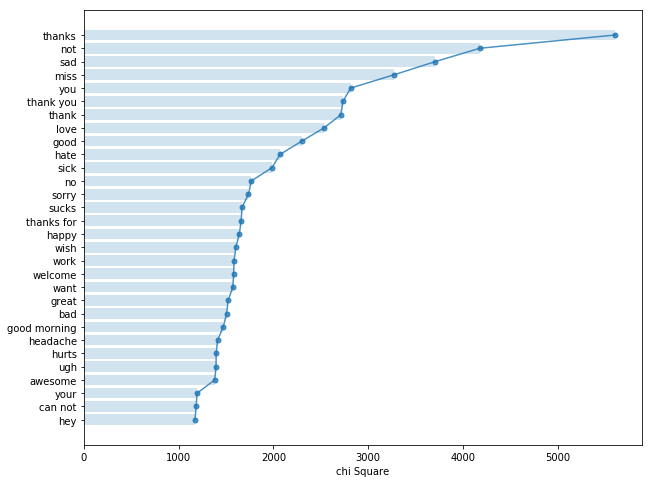

In [31]:
topk = 30
plt.figure(figsize =(10,8))
wscores = zip(tvec.get_feature_names(), chi2score)
wchi2 = sorted(wscores, key= lambda x:x[1])
topchi2 = zip(*wchi2[-topk:]) ## top 30 chi square features
###
words = []
scores = []
for word, score in wchi2[-topk:]:
    words.append(word)
    scores.append(score)
###
x = range(topk)
##labels = topchi2[0]
labels = words
##plt.barh(x, topchi2[1], align = 'centre', alpha = 0.2)
plt.barh(x, scores, align = 'center', alpha = 0.2)
##plt.plot(topchi2[1],x,'-o', markersize=5, alpha=0.8)
plt.plot(scores,x,'-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('chi Square')

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
ch2_result = []

for n in np.arange(10000,100000,10000):
    ch2 = SelectKBest(chi2, k=n)
    x_train_chi2_selected = ch2.fit_transform(x_train_tfidf, y_train)
    x_valid_chi2_selected = ch2.transform(x_valid_tfidf)
    classifier = LogisticRegression()
    classifier.fit(x_train_chi2_selected, y_train)
    score = classifier.score(x_valid_chi2_selected, y_valid)
    ch2_result.append(score)
    print("chi2 feature selection evaluation calculated for {} features".format(n), 'score is ', score)

chi2 feature selection evaluation calculated for 10000 features score is  0.801829459307061
chi2 feature selection evaluation calculated for 20000 features score is  0.80947309065848
chi2 feature selection evaluation calculated for 30000 features score is  0.8111020612743562
chi2 feature selection evaluation calculated for 40000 features score is  0.8126683791742372
chi2 feature selection evaluation calculated for 50000 features score is  0.8154250986780277
chi2 feature selection evaluation calculated for 60000 features score is  0.8168661111459182
chi2 feature selection evaluation calculated for 70000 features score is  0.8179312073178372
chi2 feature selection evaluation calculated for 80000 features score is  0.818119165465823
chi2 feature selection evaluation calculated for 90000 features score is  0.8191216089217468


In [ ]:
### Build the pandas dataframe while calling the classifier comparator
nfeatures_plot_tgt = pd.DataFrame(result,columns=['nfeatures','validation_accuracy','train_test_time'])
##
plt.figure(figsize = (10,8))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(np.arange(10000,100000,10000), ch2_result,label='tfidf dimesions reduced from 100,000 features',linestyle=':', color='orangered')

plt.title("tfidft vectorizer: features limited within tfidft vectorizer VS reduced dimensions with chi2")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

### Start from here

In [13]:
from sklearn import utils
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#from lightgbm import LGBMClassifier
#from xgboost import XGBClassifier
#from catboost import Pool, CatBoostClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import VotingClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [22]:
df = pd.read_csv('clean_tweets_upd_02.csv')

X = df['text']
y = df['label']

X_train,X_valid, y_train,y_valid = train_test_split(X,y,test_size= 0.01, shuffle = True, random_state = 1)

In [23]:
df['label'].value_counts()

0    798201
1    797858
Name: label, dtype: int64

In [ ]:
## Principal Component Analysis (PCA)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
d2v_dbow_dmc_bg_std = scaler.fit_transform(train_vecs_dbow_dmc_bg)
d2v_dbow_dmc_bg_std_val = scaler.fit_transform(valid_vecs_dbow_dmc_bg)

In [ ]:

from sklearn.decomposition import PCA

d2v_pca = PCA().fit(d2v_dbow_dmc_bg_std)

In [ ]:

fig, ax = plt.subplots(figsize=(8,6))

x_values = range(1, d2v_pca.n_components_+1)

ax.plot(x_values, d2v_pca.explained_variance_ratio_, lw=2, label='explained variance')
ax.plot(x_values, np.cumsum(d2v_pca.explained_variance_ratio_), lw=2, label='cumulative explained variance')
ax.set_title('Doc2vec (unigram DBOW + trigram DMM) : explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.legend()
plt.show()

In [21]:
## NN with TFIDF

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [25]:
seed = 1987
np.random.seed(seed)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

##transform the train data into Tfidf vectors of 100,000 features 
##and see which features chi2 has chosen as useful features.

tvec = TfidfVectorizer(max_features=100000,ngram_range=(1, 3))
x_train_tfidf = tvec.fit_transform(X_train)
x_valid_tfidf = tvec.transform(X_valid)

In [33]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def batch_generator_shuffle(X_data, y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(y_data)[0])
    np.random.shuffle(index)
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch,:].toarray()
        y_batch = y_data[y_data.index[index_batch]]
        counter += 1
        yield X_batch,y_batch
        if (counter > number_of_batches):
            np.random.shuffle(index)
            counter=0
            
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=100000))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-8),
              loss='binary_crossentropy',
              metrics=['accuracy'])

filepath = './model_best01.hdf5'
checkpoint = ModelCheckpoint(filepath,monitor = 'val_loss',verbose = 1 , save_best_only = True, mode = 'min')

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',factor = 0.5, patience=2, verbose =1,mode = 'min', min_lr = .00001)

callbacks_list = [checkpoint,reduce_lr]

model.fit_generator(generator=batch_generator_shuffle(x_train_tfidf, y_train, 128),
                    epochs=5, validation_data=(x_valid_tfidf, y_valid),
                    steps_per_epoch=x_train_tfidf.shape[0]/128,verbose =1,callbacks = callbacks_list)


Epoch 1/5


  203/12344 [..............................] - ETA: 5:10:54 - loss: 0.6927 - acc: 0.54 - ETA: 2:53:11 - loss: 0.6932 - acc: 0.52 - ETA: 2:03:56 - loss: 0.6934 - acc: 0.51 - ETA: 1:40:11 - loss: 0.6926 - acc: 0.51 - ETA: 1:26:49 - loss: 0.6910 - acc: 0.52 - ETA: 1:16:38 - loss: 0.6898 - acc: 0.52 - ETA: 1:09:58 - loss: 0.6878 - acc: 0.53 - ETA: 1:04:26 - loss: 0.6873 - acc: 0.52 - ETA: 1:00:44 - loss: 0.6857 - acc: 0.52 - ETA: 57:44 - loss: 0.6857 - acc: 0.5281 - ETA: 54:47 - loss: 0.6835 - acc: 0.53 - ETA: 52:24 - loss: 0.6812 - acc: 0.55 - ETA: 50:14 - loss: 0.6788 - acc: 0.56 - ETA: 48:18 - loss: 0.6747 - acc: 0.57 - ETA: 46:58 - loss: 0.6705 - acc: 0.58 - ETA: 45:38 - loss: 0.6676 - acc: 0.59 - ETA: 44:25 - loss: 0.6645 - acc: 0.59 - ETA: 43:43 - loss: 0.6588 - acc: 0.60 - ETA: 42:40 - loss: 0.6527 - acc: 0.61 - ETA: 41:39 - loss: 0.6494 - acc: 0.61 - ETA: 40:58 - loss: 0.6445 - acc: 0.62 - ETA: 40:16 - loss: 0.6406 - acc: 0.62 - ETA: 39:35 - loss: 0.6384 - acc: 0.62 - ETA: 39:01 - 

  407/12344 [..............................] - ETA: 28:16 - loss: 0.5232 - acc: 0.73 - ETA: 28:15 - loss: 0.5230 - acc: 0.73 - ETA: 28:15 - loss: 0.5228 - acc: 0.73 - ETA: 28:14 - loss: 0.5226 - acc: 0.73 - ETA: 28:12 - loss: 0.5225 - acc: 0.73 - ETA: 28:11 - loss: 0.5220 - acc: 0.73 - ETA: 28:11 - loss: 0.5221 - acc: 0.73 - ETA: 28:09 - loss: 0.5219 - acc: 0.73 - ETA: 28:09 - loss: 0.5217 - acc: 0.73 - ETA: 28:07 - loss: 0.5214 - acc: 0.73 - ETA: 28:06 - loss: 0.5209 - acc: 0.73 - ETA: 28:07 - loss: 0.5206 - acc: 0.73 - ETA: 28:09 - loss: 0.5204 - acc: 0.73 - ETA: 28:09 - loss: 0.5203 - acc: 0.74 - ETA: 28:08 - loss: 0.5205 - acc: 0.73 - ETA: 28:07 - loss: 0.5199 - acc: 0.74 - ETA: 28:07 - loss: 0.5200 - acc: 0.74 - ETA: 28:07 - loss: 0.5196 - acc: 0.74 - ETA: 28:06 - loss: 0.5194 - acc: 0.74 - ETA: 28:06 - loss: 0.5192 - acc: 0.74 - ETA: 28:05 - loss: 0.5194 - acc: 0.74 - ETA: 28:04 - loss: 0.5192 - acc: 0.74 - ETA: 28:03 - loss: 0.5193 - acc: 0.74 - ETA: 28:02 - loss: 0.5194 - acc: 

  611/12344 [>.............................] - ETA: 27:06 - loss: 0.4981 - acc: 0.75 - ETA: 27:05 - loss: 0.4982 - acc: 0.75 - ETA: 27:05 - loss: 0.4980 - acc: 0.75 - ETA: 27:05 - loss: 0.4982 - acc: 0.75 - ETA: 27:06 - loss: 0.4982 - acc: 0.75 - ETA: 27:05 - loss: 0.4981 - acc: 0.75 - ETA: 27:06 - loss: 0.4979 - acc: 0.75 - ETA: 27:05 - loss: 0.4978 - acc: 0.75 - ETA: 27:06 - loss: 0.4978 - acc: 0.75 - ETA: 27:05 - loss: 0.4977 - acc: 0.75 - ETA: 27:04 - loss: 0.4975 - acc: 0.75 - ETA: 27:04 - loss: 0.4976 - acc: 0.75 - ETA: 27:03 - loss: 0.4975 - acc: 0.75 - ETA: 27:03 - loss: 0.4972 - acc: 0.75 - ETA: 27:02 - loss: 0.4974 - acc: 0.75 - ETA: 27:02 - loss: 0.4973 - acc: 0.75 - ETA: 27:01 - loss: 0.4975 - acc: 0.75 - ETA: 27:01 - loss: 0.4977 - acc: 0.75 - ETA: 27:01 - loss: 0.4975 - acc: 0.75 - ETA: 27:01 - loss: 0.4973 - acc: 0.75 - ETA: 27:01 - loss: 0.4974 - acc: 0.75 - ETA: 27:00 - loss: 0.4972 - acc: 0.75 - ETA: 27:01 - loss: 0.4970 - acc: 0.75 - ETA: 27:00 - loss: 0.4968 - acc: 

  815/12344 [>.............................] - ETA: 26:36 - loss: 0.4864 - acc: 0.76 - ETA: 26:36 - loss: 0.4863 - acc: 0.76 - ETA: 26:36 - loss: 0.4863 - acc: 0.76 - ETA: 26:36 - loss: 0.4862 - acc: 0.76 - ETA: 26:36 - loss: 0.4862 - acc: 0.76 - ETA: 26:35 - loss: 0.4860 - acc: 0.76 - ETA: 26:35 - loss: 0.4859 - acc: 0.76 - ETA: 26:35 - loss: 0.4859 - acc: 0.76 - ETA: 26:35 - loss: 0.4858 - acc: 0.76 - ETA: 26:34 - loss: 0.4858 - acc: 0.76 - ETA: 26:34 - loss: 0.4857 - acc: 0.76 - ETA: 26:34 - loss: 0.4858 - acc: 0.76 - ETA: 26:33 - loss: 0.4858 - acc: 0.76 - ETA: 26:33 - loss: 0.4860 - acc: 0.76 - ETA: 26:33 - loss: 0.4859 - acc: 0.76 - ETA: 26:33 - loss: 0.4858 - acc: 0.76 - ETA: 26:33 - loss: 0.4857 - acc: 0.76 - ETA: 26:33 - loss: 0.4858 - acc: 0.76 - ETA: 26:33 - loss: 0.4858 - acc: 0.76 - ETA: 26:33 - loss: 0.4859 - acc: 0.76 - ETA: 26:33 - loss: 0.4858 - acc: 0.76 - ETA: 26:33 - loss: 0.4858 - acc: 0.76 - ETA: 26:32 - loss: 0.4858 - acc: 0.76 - ETA: 26:32 - loss: 0.4856 - acc: 

 1019/12344 [=>............................] - ETA: 26:02 - loss: 0.4793 - acc: 0.77 - ETA: 26:02 - loss: 0.4792 - acc: 0.77 - ETA: 26:02 - loss: 0.4792 - acc: 0.77 - ETA: 26:02 - loss: 0.4792 - acc: 0.77 - ETA: 26:01 - loss: 0.4791 - acc: 0.77 - ETA: 26:01 - loss: 0.4791 - acc: 0.77 - ETA: 26:02 - loss: 0.4791 - acc: 0.77 - ETA: 26:01 - loss: 0.4790 - acc: 0.77 - ETA: 26:01 - loss: 0.4790 - acc: 0.77 - ETA: 26:01 - loss: 0.4788 - acc: 0.77 - ETA: 26:00 - loss: 0.4787 - acc: 0.77 - ETA: 26:00 - loss: 0.4787 - acc: 0.77 - ETA: 26:00 - loss: 0.4786 - acc: 0.77 - ETA: 25:59 - loss: 0.4785 - acc: 0.77 - ETA: 25:59 - loss: 0.4786 - acc: 0.77 - ETA: 26:00 - loss: 0.4784 - acc: 0.77 - ETA: 25:59 - loss: 0.4784 - acc: 0.77 - ETA: 25:59 - loss: 0.4785 - acc: 0.77 - ETA: 25:59 - loss: 0.4784 - acc: 0.77 - ETA: 25:59 - loss: 0.4783 - acc: 0.77 - ETA: 25:59 - loss: 0.4783 - acc: 0.77 - ETA: 25:59 - loss: 0.4784 - acc: 0.77 - ETA: 25:59 - loss: 0.4783 - acc: 0.77 - ETA: 25:59 - loss: 0.4783 - acc: 

 1223/12344 [=>............................] - ETA: 25:40 - loss: 0.4728 - acc: 0.77 - ETA: 25:40 - loss: 0.4728 - acc: 0.77 - ETA: 25:40 - loss: 0.4727 - acc: 0.77 - ETA: 25:40 - loss: 0.4727 - acc: 0.77 - ETA: 25:40 - loss: 0.4727 - acc: 0.77 - ETA: 25:39 - loss: 0.4727 - acc: 0.77 - ETA: 25:39 - loss: 0.4727 - acc: 0.77 - ETA: 25:39 - loss: 0.4728 - acc: 0.77 - ETA: 25:39 - loss: 0.4727 - acc: 0.77 - ETA: 25:40 - loss: 0.4727 - acc: 0.77 - ETA: 25:40 - loss: 0.4727 - acc: 0.77 - ETA: 25:40 - loss: 0.4727 - acc: 0.77 - ETA: 25:40 - loss: 0.4727 - acc: 0.77 - ETA: 25:40 - loss: 0.4728 - acc: 0.77 - ETA: 25:40 - loss: 0.4728 - acc: 0.77 - ETA: 25:41 - loss: 0.4728 - acc: 0.77 - ETA: 25:40 - loss: 0.4727 - acc: 0.77 - ETA: 25:40 - loss: 0.4727 - acc: 0.77 - ETA: 25:40 - loss: 0.4727 - acc: 0.77 - ETA: 25:40 - loss: 0.4726 - acc: 0.77 - ETA: 25:40 - loss: 0.4726 - acc: 0.77 - ETA: 25:41 - loss: 0.4726 - acc: 0.77 - ETA: 25:40 - loss: 0.4726 - acc: 0.77 - ETA: 25:40 - loss: 0.4725 - acc: 

 1427/12344 [==>...........................] - ETA: 25:11 - loss: 0.4674 - acc: 0.78 - ETA: 25:11 - loss: 0.4674 - acc: 0.78 - ETA: 25:11 - loss: 0.4674 - acc: 0.78 - ETA: 25:10 - loss: 0.4674 - acc: 0.78 - ETA: 25:10 - loss: 0.4674 - acc: 0.78 - ETA: 25:10 - loss: 0.4674 - acc: 0.78 - ETA: 25:10 - loss: 0.4673 - acc: 0.78 - ETA: 25:09 - loss: 0.4672 - acc: 0.78 - ETA: 25:09 - loss: 0.4672 - acc: 0.78 - ETA: 25:09 - loss: 0.4672 - acc: 0.78 - ETA: 25:09 - loss: 0.4672 - acc: 0.78 - ETA: 25:09 - loss: 0.4671 - acc: 0.78 - ETA: 25:09 - loss: 0.4671 - acc: 0.78 - ETA: 25:08 - loss: 0.4671 - acc: 0.78 - ETA: 25:08 - loss: 0.4670 - acc: 0.78 - ETA: 25:08 - loss: 0.4670 - acc: 0.78 - ETA: 25:08 - loss: 0.4670 - acc: 0.78 - ETA: 25:08 - loss: 0.4670 - acc: 0.78 - ETA: 25:08 - loss: 0.4670 - acc: 0.78 - ETA: 25:08 - loss: 0.4670 - acc: 0.78 - ETA: 25:07 - loss: 0.4670 - acc: 0.78 - ETA: 25:07 - loss: 0.4670 - acc: 0.78 - ETA: 25:07 - loss: 0.4670 - acc: 0.78 - ETA: 25:07 - loss: 0.4670 - acc: 

 1631/12344 [==>...........................] - ETA: 24:38 - loss: 0.4639 - acc: 0.78 - ETA: 24:38 - loss: 0.4639 - acc: 0.78 - ETA: 24:38 - loss: 0.4639 - acc: 0.78 - ETA: 24:38 - loss: 0.4639 - acc: 0.78 - ETA: 24:37 - loss: 0.4639 - acc: 0.78 - ETA: 24:37 - loss: 0.4639 - acc: 0.78 - ETA: 24:37 - loss: 0.4639 - acc: 0.78 - ETA: 24:37 - loss: 0.4639 - acc: 0.78 - ETA: 24:37 - loss: 0.4638 - acc: 0.78 - ETA: 24:36 - loss: 0.4638 - acc: 0.78 - ETA: 24:36 - loss: 0.4638 - acc: 0.78 - ETA: 24:36 - loss: 0.4639 - acc: 0.78 - ETA: 24:36 - loss: 0.4639 - acc: 0.78 - ETA: 24:36 - loss: 0.4638 - acc: 0.78 - ETA: 24:36 - loss: 0.4638 - acc: 0.78 - ETA: 24:36 - loss: 0.4638 - acc: 0.78 - ETA: 24:36 - loss: 0.4638 - acc: 0.78 - ETA: 24:36 - loss: 0.4638 - acc: 0.78 - ETA: 24:35 - loss: 0.4638 - acc: 0.78 - ETA: 24:35 - loss: 0.4638 - acc: 0.78 - ETA: 24:35 - loss: 0.4638 - acc: 0.78 - ETA: 24:35 - loss: 0.4637 - acc: 0.78 - ETA: 24:35 - loss: 0.4637 - acc: 0.78 - ETA: 24:35 - loss: 0.4637 - acc: 

 1835/12344 [===>..........................] - ETA: 24:06 - loss: 0.4613 - acc: 0.78 - ETA: 24:05 - loss: 0.4612 - acc: 0.78 - ETA: 24:05 - loss: 0.4612 - acc: 0.78 - ETA: 24:05 - loss: 0.4612 - acc: 0.78 - ETA: 24:05 - loss: 0.4612 - acc: 0.78 - ETA: 24:05 - loss: 0.4612 - acc: 0.78 - ETA: 24:04 - loss: 0.4611 - acc: 0.78 - ETA: 24:04 - loss: 0.4612 - acc: 0.78 - ETA: 24:04 - loss: 0.4611 - acc: 0.78 - ETA: 24:04 - loss: 0.4611 - acc: 0.78 - ETA: 24:04 - loss: 0.4611 - acc: 0.78 - ETA: 24:04 - loss: 0.4610 - acc: 0.78 - ETA: 24:03 - loss: 0.4610 - acc: 0.78 - ETA: 24:03 - loss: 0.4609 - acc: 0.78 - ETA: 24:03 - loss: 0.4609 - acc: 0.78 - ETA: 24:03 - loss: 0.4609 - acc: 0.78 - ETA: 24:02 - loss: 0.4609 - acc: 0.78 - ETA: 24:02 - loss: 0.4609 - acc: 0.78 - ETA: 24:02 - loss: 0.4609 - acc: 0.78 - ETA: 24:02 - loss: 0.4608 - acc: 0.78 - ETA: 24:02 - loss: 0.4608 - acc: 0.78 - ETA: 24:02 - loss: 0.4608 - acc: 0.78 - ETA: 24:02 - loss: 0.4607 - acc: 0.78 - ETA: 24:02 - loss: 0.4607 - acc: 

 2039/12344 [===>..........................] - ETA: 23:34 - loss: 0.4583 - acc: 0.78 - ETA: 23:34 - loss: 0.4583 - acc: 0.78 - ETA: 23:34 - loss: 0.4583 - acc: 0.78 - ETA: 23:33 - loss: 0.4583 - acc: 0.78 - ETA: 23:33 - loss: 0.4582 - acc: 0.78 - ETA: 23:33 - loss: 0.4582 - acc: 0.78 - ETA: 23:33 - loss: 0.4582 - acc: 0.78 - ETA: 23:33 - loss: 0.4581 - acc: 0.78 - ETA: 23:33 - loss: 0.4581 - acc: 0.78 - ETA: 23:33 - loss: 0.4581 - acc: 0.78 - ETA: 23:33 - loss: 0.4581 - acc: 0.78 - ETA: 23:32 - loss: 0.4580 - acc: 0.78 - ETA: 23:32 - loss: 0.4580 - acc: 0.78 - ETA: 23:32 - loss: 0.4580 - acc: 0.78 - ETA: 23:32 - loss: 0.4580 - acc: 0.78 - ETA: 23:32 - loss: 0.4580 - acc: 0.78 - ETA: 23:31 - loss: 0.4580 - acc: 0.78 - ETA: 23:31 - loss: 0.4579 - acc: 0.78 - ETA: 23:31 - loss: 0.4579 - acc: 0.78 - ETA: 23:31 - loss: 0.4580 - acc: 0.78 - ETA: 23:31 - loss: 0.4580 - acc: 0.78 - ETA: 23:31 - loss: 0.4580 - acc: 0.78 - ETA: 23:31 - loss: 0.4580 - acc: 0.78 - ETA: 23:30 - loss: 0.4580 - acc: 

 2243/12344 [====>.........................] - ETA: 23:03 - loss: 0.4548 - acc: 0.78 - ETA: 23:02 - loss: 0.4548 - acc: 0.78 - ETA: 23:02 - loss: 0.4547 - acc: 0.78 - ETA: 23:02 - loss: 0.4547 - acc: 0.78 - ETA: 23:02 - loss: 0.4547 - acc: 0.78 - ETA: 23:02 - loss: 0.4546 - acc: 0.78 - ETA: 23:02 - loss: 0.4546 - acc: 0.78 - ETA: 23:01 - loss: 0.4546 - acc: 0.78 - ETA: 23:01 - loss: 0.4545 - acc: 0.78 - ETA: 23:01 - loss: 0.4545 - acc: 0.78 - ETA: 23:01 - loss: 0.4545 - acc: 0.78 - ETA: 23:01 - loss: 0.4545 - acc: 0.78 - ETA: 23:00 - loss: 0.4545 - acc: 0.78 - ETA: 23:00 - loss: 0.4545 - acc: 0.78 - ETA: 23:00 - loss: 0.4544 - acc: 0.78 - ETA: 23:00 - loss: 0.4544 - acc: 0.78 - ETA: 23:00 - loss: 0.4544 - acc: 0.78 - ETA: 23:00 - loss: 0.4544 - acc: 0.78 - ETA: 22:59 - loss: 0.4544 - acc: 0.78 - ETA: 22:59 - loss: 0.4543 - acc: 0.78 - ETA: 22:59 - loss: 0.4543 - acc: 0.78 - ETA: 22:59 - loss: 0.4544 - acc: 0.78 - ETA: 22:59 - loss: 0.4543 - acc: 0.78 - ETA: 22:59 - loss: 0.4543 - acc: 

 2447/12344 [====>.........................] - ETA: 22:30 - loss: 0.4523 - acc: 0.79 - ETA: 22:30 - loss: 0.4522 - acc: 0.79 - ETA: 22:29 - loss: 0.4522 - acc: 0.79 - ETA: 22:29 - loss: 0.4522 - acc: 0.79 - ETA: 22:29 - loss: 0.4522 - acc: 0.79 - ETA: 22:29 - loss: 0.4522 - acc: 0.79 - ETA: 22:29 - loss: 0.4522 - acc: 0.79 - ETA: 22:29 - loss: 0.4521 - acc: 0.79 - ETA: 22:28 - loss: 0.4521 - acc: 0.79 - ETA: 22:28 - loss: 0.4521 - acc: 0.79 - ETA: 22:28 - loss: 0.4521 - acc: 0.79 - ETA: 22:28 - loss: 0.4520 - acc: 0.79 - ETA: 22:28 - loss: 0.4520 - acc: 0.79 - ETA: 22:27 - loss: 0.4520 - acc: 0.79 - ETA: 22:27 - loss: 0.4520 - acc: 0.79 - ETA: 22:27 - loss: 0.4519 - acc: 0.79 - ETA: 22:27 - loss: 0.4519 - acc: 0.79 - ETA: 22:27 - loss: 0.4519 - acc: 0.79 - ETA: 22:27 - loss: 0.4519 - acc: 0.79 - ETA: 22:27 - loss: 0.4519 - acc: 0.79 - ETA: 22:26 - loss: 0.4519 - acc: 0.79 - ETA: 22:26 - loss: 0.4519 - acc: 0.79 - ETA: 22:26 - loss: 0.4518 - acc: 0.79 - ETA: 22:26 - loss: 0.4518 - acc: 

 2651/12344 [=====>........................] - ETA: 22:03 - loss: 0.4498 - acc: 0.79 - ETA: 22:03 - loss: 0.4497 - acc: 0.79 - ETA: 22:03 - loss: 0.4497 - acc: 0.79 - ETA: 22:02 - loss: 0.4497 - acc: 0.79 - ETA: 22:02 - loss: 0.4497 - acc: 0.79 - ETA: 22:02 - loss: 0.4497 - acc: 0.79 - ETA: 22:02 - loss: 0.4497 - acc: 0.79 - ETA: 22:02 - loss: 0.4497 - acc: 0.79 - ETA: 22:02 - loss: 0.4497 - acc: 0.79 - ETA: 22:02 - loss: 0.4497 - acc: 0.79 - ETA: 22:02 - loss: 0.4497 - acc: 0.79 - ETA: 22:02 - loss: 0.4497 - acc: 0.79 - ETA: 22:02 - loss: 0.4497 - acc: 0.79 - ETA: 22:01 - loss: 0.4497 - acc: 0.79 - ETA: 22:01 - loss: 0.4497 - acc: 0.79 - ETA: 22:01 - loss: 0.4497 - acc: 0.79 - ETA: 22:01 - loss: 0.4497 - acc: 0.79 - ETA: 22:01 - loss: 0.4496 - acc: 0.79 - ETA: 22:01 - loss: 0.4496 - acc: 0.79 - ETA: 22:01 - loss: 0.4496 - acc: 0.79 - ETA: 22:01 - loss: 0.4496 - acc: 0.79 - ETA: 22:01 - loss: 0.4496 - acc: 0.79 - ETA: 22:01 - loss: 0.4496 - acc: 0.79 - ETA: 22:01 - loss: 0.4495 - acc: 

 2855/12344 [=====>........................] - ETA: 21:33 - loss: 0.4476 - acc: 0.79 - ETA: 21:33 - loss: 0.4476 - acc: 0.79 - ETA: 21:32 - loss: 0.4476 - acc: 0.79 - ETA: 21:32 - loss: 0.4476 - acc: 0.79 - ETA: 21:32 - loss: 0.4475 - acc: 0.79 - ETA: 21:32 - loss: 0.4476 - acc: 0.79 - ETA: 21:32 - loss: 0.4475 - acc: 0.79 - ETA: 21:31 - loss: 0.4475 - acc: 0.79 - ETA: 21:31 - loss: 0.4475 - acc: 0.79 - ETA: 21:31 - loss: 0.4475 - acc: 0.79 - ETA: 21:31 - loss: 0.4475 - acc: 0.79 - ETA: 21:31 - loss: 0.4475 - acc: 0.79 - ETA: 21:31 - loss: 0.4475 - acc: 0.79 - ETA: 21:30 - loss: 0.4475 - acc: 0.79 - ETA: 21:30 - loss: 0.4475 - acc: 0.79 - ETA: 21:30 - loss: 0.4474 - acc: 0.79 - ETA: 21:30 - loss: 0.4475 - acc: 0.79 - ETA: 21:30 - loss: 0.4475 - acc: 0.79 - ETA: 21:30 - loss: 0.4475 - acc: 0.79 - ETA: 21:29 - loss: 0.4474 - acc: 0.79 - ETA: 21:29 - loss: 0.4474 - acc: 0.79 - ETA: 21:29 - loss: 0.4474 - acc: 0.79 - ETA: 21:29 - loss: 0.4474 - acc: 0.79 - ETA: 21:29 - loss: 0.4474 - acc: 

 3059/12344 [======>.......................] - ETA: 21:04 - loss: 0.4461 - acc: 0.79 - ETA: 21:04 - loss: 0.4461 - acc: 0.79 - ETA: 21:03 - loss: 0.4461 - acc: 0.79 - ETA: 21:03 - loss: 0.4461 - acc: 0.79 - ETA: 21:03 - loss: 0.4461 - acc: 0.79 - ETA: 21:03 - loss: 0.4461 - acc: 0.79 - ETA: 21:03 - loss: 0.4461 - acc: 0.79 - ETA: 21:02 - loss: 0.4461 - acc: 0.79 - ETA: 21:02 - loss: 0.4460 - acc: 0.79 - ETA: 21:02 - loss: 0.4460 - acc: 0.79 - ETA: 21:02 - loss: 0.4460 - acc: 0.79 - ETA: 21:02 - loss: 0.4460 - acc: 0.79 - ETA: 21:02 - loss: 0.4460 - acc: 0.79 - ETA: 21:02 - loss: 0.4460 - acc: 0.79 - ETA: 21:02 - loss: 0.4460 - acc: 0.79 - ETA: 21:02 - loss: 0.4460 - acc: 0.79 - ETA: 21:01 - loss: 0.4460 - acc: 0.79 - ETA: 21:01 - loss: 0.4460 - acc: 0.79 - ETA: 21:01 - loss: 0.4460 - acc: 0.79 - ETA: 21:01 - loss: 0.4459 - acc: 0.79 - ETA: 21:01 - loss: 0.4460 - acc: 0.79 - ETA: 21:01 - loss: 0.4460 - acc: 0.79 - ETA: 21:00 - loss: 0.4460 - acc: 0.79 - ETA: 21:00 - loss: 0.4460 - acc: 

 3263/12344 [======>.......................] - ETA: 20:36 - loss: 0.4446 - acc: 0.79 - ETA: 20:36 - loss: 0.4446 - acc: 0.79 - ETA: 20:36 - loss: 0.4446 - acc: 0.79 - ETA: 20:36 - loss: 0.4446 - acc: 0.79 - ETA: 20:36 - loss: 0.4446 - acc: 0.79 - ETA: 20:35 - loss: 0.4445 - acc: 0.79 - ETA: 20:35 - loss: 0.4445 - acc: 0.79 - ETA: 20:35 - loss: 0.4445 - acc: 0.79 - ETA: 20:35 - loss: 0.4445 - acc: 0.79 - ETA: 20:35 - loss: 0.4445 - acc: 0.79 - ETA: 20:35 - loss: 0.4445 - acc: 0.79 - ETA: 20:35 - loss: 0.4444 - acc: 0.79 - ETA: 20:34 - loss: 0.4445 - acc: 0.79 - ETA: 20:34 - loss: 0.4444 - acc: 0.79 - ETA: 20:34 - loss: 0.4444 - acc: 0.79 - ETA: 20:34 - loss: 0.4444 - acc: 0.79 - ETA: 20:34 - loss: 0.4444 - acc: 0.79 - ETA: 20:34 - loss: 0.4444 - acc: 0.79 - ETA: 20:34 - loss: 0.4444 - acc: 0.79 - ETA: 20:33 - loss: 0.4444 - acc: 0.79 - ETA: 20:33 - loss: 0.4444 - acc: 0.79 - ETA: 20:33 - loss: 0.4444 - acc: 0.79 - ETA: 20:33 - loss: 0.4444 - acc: 0.79 - ETA: 20:33 - loss: 0.4444 - acc: 

 3467/12344 [=======>......................] - ETA: 20:12 - loss: 0.4429 - acc: 0.79 - ETA: 20:12 - loss: 0.4429 - acc: 0.79 - ETA: 20:12 - loss: 0.4429 - acc: 0.79 - ETA: 20:12 - loss: 0.4429 - acc: 0.79 - ETA: 20:12 - loss: 0.4429 - acc: 0.79 - ETA: 20:12 - loss: 0.4429 - acc: 0.79 - ETA: 20:11 - loss: 0.4429 - acc: 0.79 - ETA: 20:11 - loss: 0.4429 - acc: 0.79 - ETA: 20:11 - loss: 0.4429 - acc: 0.79 - ETA: 20:11 - loss: 0.4428 - acc: 0.79 - ETA: 20:11 - loss: 0.4428 - acc: 0.79 - ETA: 20:11 - loss: 0.4428 - acc: 0.79 - ETA: 20:11 - loss: 0.4428 - acc: 0.79 - ETA: 20:11 - loss: 0.4428 - acc: 0.79 - ETA: 20:10 - loss: 0.4428 - acc: 0.79 - ETA: 20:10 - loss: 0.4428 - acc: 0.79 - ETA: 20:10 - loss: 0.4428 - acc: 0.79 - ETA: 20:10 - loss: 0.4428 - acc: 0.79 - ETA: 20:10 - loss: 0.4428 - acc: 0.79 - ETA: 20:10 - loss: 0.4428 - acc: 0.79 - ETA: 20:10 - loss: 0.4427 - acc: 0.79 - ETA: 20:10 - loss: 0.4427 - acc: 0.79 - ETA: 20:09 - loss: 0.4427 - acc: 0.79 - ETA: 20:09 - loss: 0.4427 - acc: 

 3671/12344 [=======>......................] - ETA: 19:49 - loss: 0.4418 - acc: 0.79 - ETA: 19:49 - loss: 0.4418 - acc: 0.79 - ETA: 19:49 - loss: 0.4417 - acc: 0.79 - ETA: 19:49 - loss: 0.4417 - acc: 0.79 - ETA: 19:49 - loss: 0.4417 - acc: 0.79 - ETA: 19:48 - loss: 0.4417 - acc: 0.79 - ETA: 19:48 - loss: 0.4417 - acc: 0.79 - ETA: 19:48 - loss: 0.4417 - acc: 0.79 - ETA: 19:48 - loss: 0.4417 - acc: 0.79 - ETA: 19:48 - loss: 0.4417 - acc: 0.79 - ETA: 19:48 - loss: 0.4417 - acc: 0.79 - ETA: 19:48 - loss: 0.4417 - acc: 0.79 - ETA: 19:48 - loss: 0.4417 - acc: 0.79 - ETA: 19:47 - loss: 0.4417 - acc: 0.79 - ETA: 19:47 - loss: 0.4417 - acc: 0.79 - ETA: 19:47 - loss: 0.4417 - acc: 0.79 - ETA: 19:47 - loss: 0.4417 - acc: 0.79 - ETA: 19:47 - loss: 0.4417 - acc: 0.79 - ETA: 19:47 - loss: 0.4417 - acc: 0.79 - ETA: 19:47 - loss: 0.4417 - acc: 0.79 - ETA: 19:47 - loss: 0.4417 - acc: 0.79 - ETA: 19:47 - loss: 0.4416 - acc: 0.79 - ETA: 19:47 - loss: 0.4416 - acc: 0.79 - ETA: 19:47 - loss: 0.4416 - acc: 

 3875/12344 [========>.....................] - ETA: 19:26 - loss: 0.4404 - acc: 0.79 - ETA: 19:25 - loss: 0.4404 - acc: 0.79 - ETA: 19:25 - loss: 0.4404 - acc: 0.79 - ETA: 19:25 - loss: 0.4403 - acc: 0.79 - ETA: 19:25 - loss: 0.4403 - acc: 0.79 - ETA: 19:25 - loss: 0.4403 - acc: 0.79 - ETA: 19:25 - loss: 0.4403 - acc: 0.79 - ETA: 19:25 - loss: 0.4403 - acc: 0.79 - ETA: 19:25 - loss: 0.4403 - acc: 0.79 - ETA: 19:24 - loss: 0.4403 - acc: 0.79 - ETA: 19:24 - loss: 0.4403 - acc: 0.79 - ETA: 19:24 - loss: 0.4403 - acc: 0.79 - ETA: 19:24 - loss: 0.4403 - acc: 0.79 - ETA: 19:24 - loss: 0.4402 - acc: 0.79 - ETA: 19:24 - loss: 0.4403 - acc: 0.79 - ETA: 19:24 - loss: 0.4403 - acc: 0.79 - ETA: 19:23 - loss: 0.4403 - acc: 0.79 - ETA: 19:23 - loss: 0.4402 - acc: 0.79 - ETA: 19:23 - loss: 0.4402 - acc: 0.79 - ETA: 19:23 - loss: 0.4402 - acc: 0.79 - ETA: 19:23 - loss: 0.4402 - acc: 0.79 - ETA: 19:23 - loss: 0.4402 - acc: 0.79 - ETA: 19:22 - loss: 0.4402 - acc: 0.79 - ETA: 19:22 - loss: 0.4402 - acc: 

 4079/12344 [========>.....................] - ETA: 19:00 - loss: 0.4392 - acc: 0.79 - ETA: 19:00 - loss: 0.4392 - acc: 0.79 - ETA: 18:59 - loss: 0.4392 - acc: 0.79 - ETA: 18:59 - loss: 0.4392 - acc: 0.79 - ETA: 18:59 - loss: 0.4392 - acc: 0.79 - ETA: 18:59 - loss: 0.4392 - acc: 0.79 - ETA: 18:59 - loss: 0.4392 - acc: 0.79 - ETA: 18:59 - loss: 0.4392 - acc: 0.79 - ETA: 18:59 - loss: 0.4392 - acc: 0.79 - ETA: 18:58 - loss: 0.4392 - acc: 0.79 - ETA: 18:58 - loss: 0.4392 - acc: 0.79 - ETA: 18:58 - loss: 0.4392 - acc: 0.79 - ETA: 18:58 - loss: 0.4392 - acc: 0.79 - ETA: 18:58 - loss: 0.4392 - acc: 0.79 - ETA: 18:58 - loss: 0.4391 - acc: 0.79 - ETA: 18:58 - loss: 0.4391 - acc: 0.79 - ETA: 18:58 - loss: 0.4391 - acc: 0.79 - ETA: 18:57 - loss: 0.4390 - acc: 0.79 - ETA: 18:57 - loss: 0.4390 - acc: 0.79 - ETA: 18:57 - loss: 0.4390 - acc: 0.79 - ETA: 18:57 - loss: 0.4390 - acc: 0.79 - ETA: 18:57 - loss: 0.4391 - acc: 0.79 - ETA: 18:57 - loss: 0.4390 - acc: 0.79 - ETA: 18:57 - loss: 0.4390 - acc: 

 4283/12344 [=========>....................] - ETA: 18:33 - loss: 0.4380 - acc: 0.80 - ETA: 18:33 - loss: 0.4380 - acc: 0.80 - ETA: 18:33 - loss: 0.4380 - acc: 0.80 - ETA: 18:33 - loss: 0.4380 - acc: 0.80 - ETA: 18:33 - loss: 0.4379 - acc: 0.80 - ETA: 18:33 - loss: 0.4379 - acc: 0.80 - ETA: 18:33 - loss: 0.4379 - acc: 0.80 - ETA: 18:32 - loss: 0.4379 - acc: 0.80 - ETA: 18:32 - loss: 0.4379 - acc: 0.80 - ETA: 18:32 - loss: 0.4379 - acc: 0.80 - ETA: 18:32 - loss: 0.4379 - acc: 0.80 - ETA: 18:32 - loss: 0.4379 - acc: 0.80 - ETA: 18:32 - loss: 0.4379 - acc: 0.80 - ETA: 18:32 - loss: 0.4379 - acc: 0.80 - ETA: 18:32 - loss: 0.4379 - acc: 0.80 - ETA: 18:32 - loss: 0.4378 - acc: 0.80 - ETA: 18:31 - loss: 0.4379 - acc: 0.80 - ETA: 18:31 - loss: 0.4378 - acc: 0.80 - ETA: 18:31 - loss: 0.4378 - acc: 0.80 - ETA: 18:31 - loss: 0.4378 - acc: 0.80 - ETA: 18:31 - loss: 0.4378 - acc: 0.80 - ETA: 18:31 - loss: 0.4378 - acc: 0.80 - ETA: 18:31 - loss: 0.4378 - acc: 0.80 - ETA: 18:31 - loss: 0.4378 - acc: 

 4487/12344 [=========>....................] - ETA: 18:07 - loss: 0.4369 - acc: 0.80 - ETA: 18:07 - loss: 0.4369 - acc: 0.80 - ETA: 18:07 - loss: 0.4369 - acc: 0.80 - ETA: 18:07 - loss: 0.4369 - acc: 0.80 - ETA: 18:07 - loss: 0.4369 - acc: 0.80 - ETA: 18:07 - loss: 0.4369 - acc: 0.80 - ETA: 18:07 - loss: 0.4369 - acc: 0.80 - ETA: 18:07 - loss: 0.4369 - acc: 0.80 - ETA: 18:06 - loss: 0.4369 - acc: 0.80 - ETA: 18:06 - loss: 0.4369 - acc: 0.80 - ETA: 18:06 - loss: 0.4368 - acc: 0.80 - ETA: 18:06 - loss: 0.4368 - acc: 0.80 - ETA: 18:06 - loss: 0.4368 - acc: 0.80 - ETA: 18:06 - loss: 0.4368 - acc: 0.80 - ETA: 18:06 - loss: 0.4369 - acc: 0.80 - ETA: 18:06 - loss: 0.4369 - acc: 0.80 - ETA: 18:06 - loss: 0.4369 - acc: 0.80 - ETA: 18:05 - loss: 0.4369 - acc: 0.80 - ETA: 18:05 - loss: 0.4369 - acc: 0.80 - ETA: 18:05 - loss: 0.4368 - acc: 0.80 - ETA: 18:05 - loss: 0.4368 - acc: 0.80 - ETA: 18:05 - loss: 0.4368 - acc: 0.80 - ETA: 18:05 - loss: 0.4368 - acc: 0.80 - ETA: 18:05 - loss: 0.4368 - acc: 

 4691/12344 [==========>...................] - ETA: 17:42 - loss: 0.4358 - acc: 0.80 - ETA: 17:41 - loss: 0.4358 - acc: 0.80 - ETA: 17:41 - loss: 0.4358 - acc: 0.80 - ETA: 17:41 - loss: 0.4358 - acc: 0.80 - ETA: 17:41 - loss: 0.4358 - acc: 0.80 - ETA: 17:41 - loss: 0.4358 - acc: 0.80 - ETA: 17:41 - loss: 0.4358 - acc: 0.80 - ETA: 17:41 - loss: 0.4358 - acc: 0.80 - ETA: 17:41 - loss: 0.4358 - acc: 0.80 - ETA: 17:41 - loss: 0.4358 - acc: 0.80 - ETA: 17:40 - loss: 0.4358 - acc: 0.80 - ETA: 17:40 - loss: 0.4358 - acc: 0.80 - ETA: 17:40 - loss: 0.4358 - acc: 0.80 - ETA: 17:40 - loss: 0.4358 - acc: 0.80 - ETA: 17:40 - loss: 0.4358 - acc: 0.80 - ETA: 17:40 - loss: 0.4358 - acc: 0.80 - ETA: 17:40 - loss: 0.4358 - acc: 0.80 - ETA: 17:40 - loss: 0.4358 - acc: 0.80 - ETA: 17:40 - loss: 0.4358 - acc: 0.80 - ETA: 17:39 - loss: 0.4357 - acc: 0.80 - ETA: 17:39 - loss: 0.4357 - acc: 0.80 - ETA: 17:39 - loss: 0.4357 - acc: 0.80 - ETA: 17:39 - loss: 0.4357 - acc: 0.80 - ETA: 17:39 - loss: 0.4357 - acc: 

 4895/12344 [==========>...................] - ETA: 17:16 - loss: 0.4350 - acc: 0.80 - ETA: 17:16 - loss: 0.4350 - acc: 0.80 - ETA: 17:15 - loss: 0.4350 - acc: 0.80 - ETA: 17:15 - loss: 0.4350 - acc: 0.80 - ETA: 17:15 - loss: 0.4350 - acc: 0.80 - ETA: 17:15 - loss: 0.4350 - acc: 0.80 - ETA: 17:15 - loss: 0.4349 - acc: 0.80 - ETA: 17:15 - loss: 0.4349 - acc: 0.80 - ETA: 17:15 - loss: 0.4349 - acc: 0.80 - ETA: 17:15 - loss: 0.4349 - acc: 0.80 - ETA: 17:14 - loss: 0.4349 - acc: 0.80 - ETA: 17:14 - loss: 0.4349 - acc: 0.80 - ETA: 17:14 - loss: 0.4349 - acc: 0.80 - ETA: 17:14 - loss: 0.4349 - acc: 0.80 - ETA: 17:14 - loss: 0.4349 - acc: 0.80 - ETA: 17:14 - loss: 0.4349 - acc: 0.80 - ETA: 17:14 - loss: 0.4349 - acc: 0.80 - ETA: 17:13 - loss: 0.4349 - acc: 0.80 - ETA: 17:13 - loss: 0.4349 - acc: 0.80 - ETA: 17:13 - loss: 0.4349 - acc: 0.80 - ETA: 17:13 - loss: 0.4349 - acc: 0.80 - ETA: 17:13 - loss: 0.4349 - acc: 0.80 - ETA: 17:13 - loss: 0.4349 - acc: 0.80 - ETA: 17:13 - loss: 0.4349 - acc: 

 5099/12344 [===========>..................] - ETA: 16:49 - loss: 0.4341 - acc: 0.80 - ETA: 16:49 - loss: 0.4341 - acc: 0.80 - ETA: 16:49 - loss: 0.4341 - acc: 0.80 - ETA: 16:49 - loss: 0.4341 - acc: 0.80 - ETA: 16:49 - loss: 0.4341 - acc: 0.80 - ETA: 16:49 - loss: 0.4341 - acc: 0.80 - ETA: 16:49 - loss: 0.4340 - acc: 0.80 - ETA: 16:49 - loss: 0.4340 - acc: 0.80 - ETA: 16:49 - loss: 0.4340 - acc: 0.80 - ETA: 16:48 - loss: 0.4340 - acc: 0.80 - ETA: 16:48 - loss: 0.4340 - acc: 0.80 - ETA: 16:48 - loss: 0.4340 - acc: 0.80 - ETA: 16:48 - loss: 0.4340 - acc: 0.80 - ETA: 16:48 - loss: 0.4340 - acc: 0.80 - ETA: 16:48 - loss: 0.4340 - acc: 0.80 - ETA: 16:48 - loss: 0.4340 - acc: 0.80 - ETA: 16:47 - loss: 0.4340 - acc: 0.80 - ETA: 16:47 - loss: 0.4340 - acc: 0.80 - ETA: 16:47 - loss: 0.4340 - acc: 0.80 - ETA: 16:47 - loss: 0.4340 - acc: 0.80 - ETA: 16:47 - loss: 0.4340 - acc: 0.80 - ETA: 16:47 - loss: 0.4340 - acc: 0.80 - ETA: 16:47 - loss: 0.4340 - acc: 0.80 - ETA: 16:46 - loss: 0.4340 - acc: 

 5303/12344 [===========>..................] - ETA: 16:22 - loss: 0.4332 - acc: 0.80 - ETA: 16:22 - loss: 0.4332 - acc: 0.80 - ETA: 16:22 - loss: 0.4332 - acc: 0.80 - ETA: 16:22 - loss: 0.4332 - acc: 0.80 - ETA: 16:21 - loss: 0.4332 - acc: 0.80 - ETA: 16:21 - loss: 0.4332 - acc: 0.80 - ETA: 16:21 - loss: 0.4332 - acc: 0.80 - ETA: 16:21 - loss: 0.4332 - acc: 0.80 - ETA: 16:21 - loss: 0.4332 - acc: 0.80 - ETA: 16:21 - loss: 0.4332 - acc: 0.80 - ETA: 16:20 - loss: 0.4332 - acc: 0.80 - ETA: 16:20 - loss: 0.4332 - acc: 0.80 - ETA: 16:20 - loss: 0.4332 - acc: 0.80 - ETA: 16:20 - loss: 0.4332 - acc: 0.80 - ETA: 16:20 - loss: 0.4332 - acc: 0.80 - ETA: 16:20 - loss: 0.4332 - acc: 0.80 - ETA: 16:20 - loss: 0.4332 - acc: 0.80 - ETA: 16:20 - loss: 0.4332 - acc: 0.80 - ETA: 16:19 - loss: 0.4332 - acc: 0.80 - ETA: 16:19 - loss: 0.4332 - acc: 0.80 - ETA: 16:19 - loss: 0.4332 - acc: 0.80 - ETA: 16:19 - loss: 0.4332 - acc: 0.80 - ETA: 16:19 - loss: 0.4332 - acc: 0.80 - ETA: 16:19 - loss: 0.4332 - acc: 

 5507/12344 [============>.................] - ETA: 15:55 - loss: 0.4328 - acc: 0.80 - ETA: 15:55 - loss: 0.4328 - acc: 0.80 - ETA: 15:55 - loss: 0.4328 - acc: 0.80 - ETA: 15:55 - loss: 0.4328 - acc: 0.80 - ETA: 15:55 - loss: 0.4328 - acc: 0.80 - ETA: 15:54 - loss: 0.4328 - acc: 0.80 - ETA: 15:54 - loss: 0.4328 - acc: 0.80 - ETA: 15:54 - loss: 0.4328 - acc: 0.80 - ETA: 15:54 - loss: 0.4328 - acc: 0.80 - ETA: 15:54 - loss: 0.4328 - acc: 0.80 - ETA: 15:54 - loss: 0.4328 - acc: 0.80 - ETA: 15:54 - loss: 0.4328 - acc: 0.80 - ETA: 15:54 - loss: 0.4328 - acc: 0.80 - ETA: 15:53 - loss: 0.4328 - acc: 0.80 - ETA: 15:53 - loss: 0.4328 - acc: 0.80 - ETA: 15:53 - loss: 0.4328 - acc: 0.80 - ETA: 15:53 - loss: 0.4328 - acc: 0.80 - ETA: 15:53 - loss: 0.4328 - acc: 0.80 - ETA: 15:53 - loss: 0.4328 - acc: 0.80 - ETA: 15:52 - loss: 0.4328 - acc: 0.80 - ETA: 15:52 - loss: 0.4328 - acc: 0.80 - ETA: 15:52 - loss: 0.4328 - acc: 0.80 - ETA: 15:52 - loss: 0.4328 - acc: 0.80 - ETA: 15:52 - loss: 0.4328 - acc: 

 5711/12344 [============>.................] - ETA: 15:28 - loss: 0.4320 - acc: 0.80 - ETA: 15:28 - loss: 0.4319 - acc: 0.80 - ETA: 15:28 - loss: 0.4319 - acc: 0.80 - ETA: 15:28 - loss: 0.4319 - acc: 0.80 - ETA: 15:27 - loss: 0.4319 - acc: 0.80 - ETA: 15:27 - loss: 0.4319 - acc: 0.80 - ETA: 15:27 - loss: 0.4319 - acc: 0.80 - ETA: 15:27 - loss: 0.4319 - acc: 0.80 - ETA: 15:27 - loss: 0.4319 - acc: 0.80 - ETA: 15:27 - loss: 0.4319 - acc: 0.80 - ETA: 15:27 - loss: 0.4319 - acc: 0.80 - ETA: 15:26 - loss: 0.4319 - acc: 0.80 - ETA: 15:26 - loss: 0.4319 - acc: 0.80 - ETA: 15:26 - loss: 0.4319 - acc: 0.80 - ETA: 15:26 - loss: 0.4319 - acc: 0.80 - ETA: 15:26 - loss: 0.4319 - acc: 0.80 - ETA: 15:26 - loss: 0.4319 - acc: 0.80 - ETA: 15:26 - loss: 0.4319 - acc: 0.80 - ETA: 15:25 - loss: 0.4319 - acc: 0.80 - ETA: 15:25 - loss: 0.4318 - acc: 0.80 - ETA: 15:25 - loss: 0.4318 - acc: 0.80 - ETA: 15:25 - loss: 0.4318 - acc: 0.80 - ETA: 15:25 - loss: 0.4318 - acc: 0.80 - ETA: 15:25 - loss: 0.4318 - acc: 

 5915/12344 [=============>................] - ETA: 15:00 - loss: 0.4310 - acc: 0.80 - ETA: 15:00 - loss: 0.4310 - acc: 0.80 - ETA: 14:59 - loss: 0.4310 - acc: 0.80 - ETA: 14:59 - loss: 0.4310 - acc: 0.80 - ETA: 14:59 - loss: 0.4310 - acc: 0.80 - ETA: 14:59 - loss: 0.4310 - acc: 0.80 - ETA: 14:59 - loss: 0.4310 - acc: 0.80 - ETA: 14:59 - loss: 0.4310 - acc: 0.80 - ETA: 14:59 - loss: 0.4310 - acc: 0.80 - ETA: 14:59 - loss: 0.4310 - acc: 0.80 - ETA: 14:58 - loss: 0.4310 - acc: 0.80 - ETA: 14:58 - loss: 0.4310 - acc: 0.80 - ETA: 14:58 - loss: 0.4310 - acc: 0.80 - ETA: 14:58 - loss: 0.4310 - acc: 0.80 - ETA: 14:58 - loss: 0.4310 - acc: 0.80 - ETA: 14:58 - loss: 0.4310 - acc: 0.80 - ETA: 14:58 - loss: 0.4310 - acc: 0.80 - ETA: 14:57 - loss: 0.4310 - acc: 0.80 - ETA: 14:57 - loss: 0.4310 - acc: 0.80 - ETA: 14:57 - loss: 0.4310 - acc: 0.80 - ETA: 14:57 - loss: 0.4309 - acc: 0.80 - ETA: 14:57 - loss: 0.4309 - acc: 0.80 - ETA: 14:57 - loss: 0.4309 - acc: 0.80 - ETA: 14:57 - loss: 0.4309 - acc: 

 6119/12344 [=============>................] - ETA: 14:32 - loss: 0.4302 - acc: 0.80 - ETA: 14:32 - loss: 0.4302 - acc: 0.80 - ETA: 14:32 - loss: 0.4302 - acc: 0.80 - ETA: 14:32 - loss: 0.4302 - acc: 0.80 - ETA: 14:32 - loss: 0.4301 - acc: 0.80 - ETA: 14:31 - loss: 0.4301 - acc: 0.80 - ETA: 14:31 - loss: 0.4301 - acc: 0.80 - ETA: 14:31 - loss: 0.4301 - acc: 0.80 - ETA: 14:31 - loss: 0.4301 - acc: 0.80 - ETA: 14:31 - loss: 0.4301 - acc: 0.80 - ETA: 14:31 - loss: 0.4301 - acc: 0.80 - ETA: 14:30 - loss: 0.4301 - acc: 0.80 - ETA: 14:30 - loss: 0.4301 - acc: 0.80 - ETA: 14:30 - loss: 0.4301 - acc: 0.80 - ETA: 14:30 - loss: 0.4301 - acc: 0.80 - ETA: 14:30 - loss: 0.4301 - acc: 0.80 - ETA: 14:30 - loss: 0.4301 - acc: 0.80 - ETA: 14:30 - loss: 0.4301 - acc: 0.80 - ETA: 14:30 - loss: 0.4301 - acc: 0.80 - ETA: 14:30 - loss: 0.4301 - acc: 0.80 - ETA: 14:29 - loss: 0.4301 - acc: 0.80 - ETA: 14:29 - loss: 0.4301 - acc: 0.80 - ETA: 14:29 - loss: 0.4301 - acc: 0.80 - ETA: 14:29 - loss: 0.4301 - acc: 

 6323/12344 [==============>...............] - ETA: 14:04 - loss: 0.4295 - acc: 0.80 - ETA: 14:04 - loss: 0.4295 - acc: 0.80 - ETA: 14:04 - loss: 0.4295 - acc: 0.80 - ETA: 14:04 - loss: 0.4295 - acc: 0.80 - ETA: 14:04 - loss: 0.4295 - acc: 0.80 - ETA: 14:04 - loss: 0.4295 - acc: 0.80 - ETA: 14:04 - loss: 0.4295 - acc: 0.80 - ETA: 14:04 - loss: 0.4295 - acc: 0.80 - ETA: 14:03 - loss: 0.4295 - acc: 0.80 - ETA: 14:03 - loss: 0.4295 - acc: 0.80 - ETA: 14:03 - loss: 0.4295 - acc: 0.80 - ETA: 14:03 - loss: 0.4295 - acc: 0.80 - ETA: 14:03 - loss: 0.4295 - acc: 0.80 - ETA: 14:03 - loss: 0.4295 - acc: 0.80 - ETA: 14:03 - loss: 0.4295 - acc: 0.80 - ETA: 14:03 - loss: 0.4295 - acc: 0.80 - ETA: 14:02 - loss: 0.4295 - acc: 0.80 - ETA: 14:02 - loss: 0.4295 - acc: 0.80 - ETA: 14:02 - loss: 0.4295 - acc: 0.80 - ETA: 14:02 - loss: 0.4295 - acc: 0.80 - ETA: 14:02 - loss: 0.4295 - acc: 0.80 - ETA: 14:02 - loss: 0.4295 - acc: 0.80 - ETA: 14:02 - loss: 0.4295 - acc: 0.80 - ETA: 14:02 - loss: 0.4295 - acc: 

 6527/12344 [==============>...............] - ETA: 13:38 - loss: 0.4290 - acc: 0.80 - ETA: 13:38 - loss: 0.4290 - acc: 0.80 - ETA: 13:38 - loss: 0.4290 - acc: 0.80 - ETA: 13:37 - loss: 0.4290 - acc: 0.80 - ETA: 13:37 - loss: 0.4290 - acc: 0.80 - ETA: 13:37 - loss: 0.4290 - acc: 0.80 - ETA: 13:37 - loss: 0.4290 - acc: 0.80 - ETA: 13:37 - loss: 0.4290 - acc: 0.80 - ETA: 13:37 - loss: 0.4289 - acc: 0.80 - ETA: 13:37 - loss: 0.4289 - acc: 0.80 - ETA: 13:36 - loss: 0.4289 - acc: 0.80 - ETA: 13:36 - loss: 0.4289 - acc: 0.80 - ETA: 13:36 - loss: 0.4289 - acc: 0.80 - ETA: 13:36 - loss: 0.4289 - acc: 0.80 - ETA: 13:36 - loss: 0.4289 - acc: 0.80 - ETA: 13:36 - loss: 0.4289 - acc: 0.80 - ETA: 13:36 - loss: 0.4289 - acc: 0.80 - ETA: 13:36 - loss: 0.4289 - acc: 0.80 - ETA: 13:35 - loss: 0.4289 - acc: 0.80 - ETA: 13:35 - loss: 0.4289 - acc: 0.80 - ETA: 13:35 - loss: 0.4289 - acc: 0.80 - ETA: 13:35 - loss: 0.4289 - acc: 0.80 - ETA: 13:35 - loss: 0.4289 - acc: 0.80 - ETA: 13:35 - loss: 0.4289 - acc: 

 6731/12344 [===============>..............] - ETA: 13:10 - loss: 0.4281 - acc: 0.80 - ETA: 13:10 - loss: 0.4282 - acc: 0.80 - ETA: 13:10 - loss: 0.4282 - acc: 0.80 - ETA: 13:10 - loss: 0.4282 - acc: 0.80 - ETA: 13:10 - loss: 0.4282 - acc: 0.80 - ETA: 13:10 - loss: 0.4282 - acc: 0.80 - ETA: 13:10 - loss: 0.4282 - acc: 0.80 - ETA: 13:09 - loss: 0.4282 - acc: 0.80 - ETA: 13:09 - loss: 0.4281 - acc: 0.80 - ETA: 13:09 - loss: 0.4281 - acc: 0.80 - ETA: 13:09 - loss: 0.4281 - acc: 0.80 - ETA: 13:09 - loss: 0.4281 - acc: 0.80 - ETA: 13:09 - loss: 0.4281 - acc: 0.80 - ETA: 13:09 - loss: 0.4281 - acc: 0.80 - ETA: 13:09 - loss: 0.4282 - acc: 0.80 - ETA: 13:08 - loss: 0.4281 - acc: 0.80 - ETA: 13:08 - loss: 0.4282 - acc: 0.80 - ETA: 13:08 - loss: 0.4282 - acc: 0.80 - ETA: 13:08 - loss: 0.4282 - acc: 0.80 - ETA: 13:08 - loss: 0.4282 - acc: 0.80 - ETA: 13:08 - loss: 0.4282 - acc: 0.80 - ETA: 13:08 - loss: 0.4282 - acc: 0.80 - ETA: 13:07 - loss: 0.4282 - acc: 0.80 - ETA: 13:07 - loss: 0.4282 - acc: 

 6935/12344 [===============>..............] - ETA: 12:43 - loss: 0.4275 - acc: 0.80 - ETA: 12:42 - loss: 0.4275 - acc: 0.80 - ETA: 12:42 - loss: 0.4275 - acc: 0.80 - ETA: 12:42 - loss: 0.4275 - acc: 0.80 - ETA: 12:42 - loss: 0.4275 - acc: 0.80 - ETA: 12:42 - loss: 0.4275 - acc: 0.80 - ETA: 12:42 - loss: 0.4275 - acc: 0.80 - ETA: 12:42 - loss: 0.4275 - acc: 0.80 - ETA: 12:41 - loss: 0.4275 - acc: 0.80 - ETA: 12:41 - loss: 0.4275 - acc: 0.80 - ETA: 12:41 - loss: 0.4275 - acc: 0.80 - ETA: 12:41 - loss: 0.4275 - acc: 0.80 - ETA: 12:41 - loss: 0.4275 - acc: 0.80 - ETA: 12:41 - loss: 0.4275 - acc: 0.80 - ETA: 12:41 - loss: 0.4275 - acc: 0.80 - ETA: 12:40 - loss: 0.4275 - acc: 0.80 - ETA: 12:40 - loss: 0.4275 - acc: 0.80 - ETA: 12:40 - loss: 0.4275 - acc: 0.80 - ETA: 12:40 - loss: 0.4275 - acc: 0.80 - ETA: 12:40 - loss: 0.4275 - acc: 0.80 - ETA: 12:40 - loss: 0.4275 - acc: 0.80 - ETA: 12:40 - loss: 0.4275 - acc: 0.80 - ETA: 12:39 - loss: 0.4275 - acc: 0.80 - ETA: 12:39 - loss: 0.4275 - acc: 

 7139/12344 [================>.............] - ETA: 12:14 - loss: 0.4271 - acc: 0.80 - ETA: 12:14 - loss: 0.4271 - acc: 0.80 - ETA: 12:14 - loss: 0.4271 - acc: 0.80 - ETA: 12:14 - loss: 0.4271 - acc: 0.80 - ETA: 12:14 - loss: 0.4271 - acc: 0.80 - ETA: 12:14 - loss: 0.4271 - acc: 0.80 - ETA: 12:14 - loss: 0.4270 - acc: 0.80 - ETA: 12:14 - loss: 0.4270 - acc: 0.80 - ETA: 12:13 - loss: 0.4270 - acc: 0.80 - ETA: 12:13 - loss: 0.4270 - acc: 0.80 - ETA: 12:13 - loss: 0.4270 - acc: 0.80 - ETA: 12:13 - loss: 0.4270 - acc: 0.80 - ETA: 12:13 - loss: 0.4270 - acc: 0.80 - ETA: 12:13 - loss: 0.4270 - acc: 0.80 - ETA: 12:13 - loss: 0.4270 - acc: 0.80 - ETA: 12:12 - loss: 0.4270 - acc: 0.80 - ETA: 12:12 - loss: 0.4270 - acc: 0.80 - ETA: 12:12 - loss: 0.4270 - acc: 0.80 - ETA: 12:12 - loss: 0.4270 - acc: 0.80 - ETA: 12:12 - loss: 0.4270 - acc: 0.80 - ETA: 12:12 - loss: 0.4270 - acc: 0.80 - ETA: 12:12 - loss: 0.4270 - acc: 0.80 - ETA: 12:12 - loss: 0.4270 - acc: 0.80 - ETA: 12:11 - loss: 0.4270 - acc: 

 7343/12344 [================>.............] - ETA: 11:49 - loss: 0.4266 - acc: 0.80 - ETA: 11:49 - loss: 0.4266 - acc: 0.80 - ETA: 11:49 - loss: 0.4266 - acc: 0.80 - ETA: 11:49 - loss: 0.4266 - acc: 0.80 - ETA: 11:49 - loss: 0.4266 - acc: 0.80 - ETA: 11:49 - loss: 0.4266 - acc: 0.80 - ETA: 11:48 - loss: 0.4266 - acc: 0.80 - ETA: 11:48 - loss: 0.4266 - acc: 0.80 - ETA: 11:48 - loss: 0.4266 - acc: 0.80 - ETA: 11:48 - loss: 0.4266 - acc: 0.80 - ETA: 11:48 - loss: 0.4266 - acc: 0.80 - ETA: 11:48 - loss: 0.4266 - acc: 0.80 - ETA: 11:47 - loss: 0.4266 - acc: 0.80 - ETA: 11:47 - loss: 0.4266 - acc: 0.80 - ETA: 11:47 - loss: 0.4266 - acc: 0.80 - ETA: 11:47 - loss: 0.4266 - acc: 0.80 - ETA: 11:47 - loss: 0.4266 - acc: 0.80 - ETA: 11:47 - loss: 0.4266 - acc: 0.80 - ETA: 11:47 - loss: 0.4266 - acc: 0.80 - ETA: 11:46 - loss: 0.4266 - acc: 0.80 - ETA: 11:46 - loss: 0.4266 - acc: 0.80 - ETA: 11:46 - loss: 0.4266 - acc: 0.80 - ETA: 11:46 - loss: 0.4266 - acc: 0.80 - ETA: 11:46 - loss: 0.4266 - acc: 

 7547/12344 [=================>............] - ETA: 11:19 - loss: 0.4261 - acc: 0.80 - ETA: 11:19 - loss: 0.4261 - acc: 0.80 - ETA: 11:19 - loss: 0.4261 - acc: 0.80 - ETA: 11:19 - loss: 0.4261 - acc: 0.80 - ETA: 11:18 - loss: 0.4261 - acc: 0.80 - ETA: 11:18 - loss: 0.4261 - acc: 0.80 - ETA: 11:18 - loss: 0.4261 - acc: 0.80 - ETA: 11:18 - loss: 0.4261 - acc: 0.80 - ETA: 11:18 - loss: 0.4261 - acc: 0.80 - ETA: 11:18 - loss: 0.4261 - acc: 0.80 - ETA: 11:18 - loss: 0.4261 - acc: 0.80 - ETA: 11:17 - loss: 0.4261 - acc: 0.80 - ETA: 11:17 - loss: 0.4261 - acc: 0.80 - ETA: 11:17 - loss: 0.4261 - acc: 0.80 - ETA: 11:17 - loss: 0.4261 - acc: 0.80 - ETA: 11:17 - loss: 0.4261 - acc: 0.80 - ETA: 11:17 - loss: 0.4260 - acc: 0.80 - ETA: 11:17 - loss: 0.4260 - acc: 0.80 - ETA: 11:16 - loss: 0.4260 - acc: 0.80 - ETA: 11:16 - loss: 0.4260 - acc: 0.80 - ETA: 11:16 - loss: 0.4260 - acc: 0.80 - ETA: 11:16 - loss: 0.4260 - acc: 0.80 - ETA: 11:16 - loss: 0.4260 - acc: 0.80 - ETA: 11:16 - loss: 0.4260 - acc: 

 7751/12344 [=================>............] - ETA: 10:49 - loss: 0.4257 - acc: 0.80 - ETA: 10:49 - loss: 0.4257 - acc: 0.80 - ETA: 10:49 - loss: 0.4257 - acc: 0.80 - ETA: 10:49 - loss: 0.4257 - acc: 0.80 - ETA: 10:48 - loss: 0.4257 - acc: 0.80 - ETA: 10:48 - loss: 0.4257 - acc: 0.80 - ETA: 10:48 - loss: 0.4257 - acc: 0.80 - ETA: 10:48 - loss: 0.4257 - acc: 0.80 - ETA: 10:48 - loss: 0.4257 - acc: 0.80 - ETA: 10:48 - loss: 0.4257 - acc: 0.80 - ETA: 10:48 - loss: 0.4257 - acc: 0.80 - ETA: 10:47 - loss: 0.4257 - acc: 0.80 - ETA: 10:47 - loss: 0.4257 - acc: 0.80 - ETA: 10:47 - loss: 0.4257 - acc: 0.80 - ETA: 10:47 - loss: 0.4257 - acc: 0.80 - ETA: 10:47 - loss: 0.4257 - acc: 0.80 - ETA: 10:47 - loss: 0.4257 - acc: 0.80 - ETA: 10:47 - loss: 0.4257 - acc: 0.80 - ETA: 10:46 - loss: 0.4257 - acc: 0.80 - ETA: 10:46 - loss: 0.4257 - acc: 0.80 - ETA: 10:46 - loss: 0.4257 - acc: 0.80 - ETA: 10:46 - loss: 0.4257 - acc: 0.80 - ETA: 10:46 - loss: 0.4257 - acc: 0.80 - ETA: 10:46 - loss: 0.4257 - acc: 

 7955/12344 [==================>...........] - ETA: 10:19 - loss: 0.4252 - acc: 0.80 - ETA: 10:19 - loss: 0.4252 - acc: 0.80 - ETA: 10:19 - loss: 0.4252 - acc: 0.80 - ETA: 10:19 - loss: 0.4252 - acc: 0.80 - ETA: 10:19 - loss: 0.4252 - acc: 0.80 - ETA: 10:19 - loss: 0.4252 - acc: 0.80 - ETA: 10:18 - loss: 0.4252 - acc: 0.80 - ETA: 10:18 - loss: 0.4252 - acc: 0.80 - ETA: 10:18 - loss: 0.4252 - acc: 0.80 - ETA: 10:18 - loss: 0.4252 - acc: 0.80 - ETA: 10:18 - loss: 0.4252 - acc: 0.80 - ETA: 10:18 - loss: 0.4252 - acc: 0.80 - ETA: 10:18 - loss: 0.4252 - acc: 0.80 - ETA: 10:17 - loss: 0.4252 - acc: 0.80 - ETA: 10:17 - loss: 0.4252 - acc: 0.80 - ETA: 10:17 - loss: 0.4252 - acc: 0.80 - ETA: 10:17 - loss: 0.4252 - acc: 0.80 - ETA: 10:17 - loss: 0.4252 - acc: 0.80 - ETA: 10:17 - loss: 0.4252 - acc: 0.80 - ETA: 10:17 - loss: 0.4252 - acc: 0.80 - ETA: 10:16 - loss: 0.4252 - acc: 0.80 - ETA: 10:16 - loss: 0.4252 - acc: 0.80 - ETA: 10:16 - loss: 0.4252 - acc: 0.80 - ETA: 10:16 - loss: 0.4251 - acc: 

 8159/12344 [==================>...........] - ETA: 9:50 - loss: 0.4248 - acc: 0.807 - ETA: 9:50 - loss: 0.4248 - acc: 0.807 - ETA: 9:49 - loss: 0.4248 - acc: 0.808 - ETA: 9:49 - loss: 0.4248 - acc: 0.808 - ETA: 9:49 - loss: 0.4248 - acc: 0.808 - ETA: 9:49 - loss: 0.4248 - acc: 0.808 - ETA: 9:49 - loss: 0.4248 - acc: 0.808 - ETA: 9:49 - loss: 0.4248 - acc: 0.808 - ETA: 9:49 - loss: 0.4248 - acc: 0.808 - ETA: 9:48 - loss: 0.4248 - acc: 0.808 - ETA: 9:48 - loss: 0.4248 - acc: 0.808 - ETA: 9:48 - loss: 0.4248 - acc: 0.808 - ETA: 9:48 - loss: 0.4248 - acc: 0.808 - ETA: 9:48 - loss: 0.4248 - acc: 0.808 - ETA: 9:48 - loss: 0.4248 - acc: 0.808 - ETA: 9:48 - loss: 0.4248 - acc: 0.808 - ETA: 9:47 - loss: 0.4248 - acc: 0.808 - ETA: 9:47 - loss: 0.4248 - acc: 0.808 - ETA: 9:47 - loss: 0.4248 - acc: 0.808 - ETA: 9:47 - loss: 0.4248 - acc: 0.808 - ETA: 9:47 - loss: 0.4248 - acc: 0.808 - ETA: 9:47 - loss: 0.4248 - acc: 0.808 - ETA: 9:47 - loss: 0.4248 - acc: 0.808 - ETA: 9:46 - loss: 0.4248 - acc: 0

 8363/12344 [===================>..........] - ETA: 9:21 - loss: 0.4244 - acc: 0.808 - ETA: 9:20 - loss: 0.4244 - acc: 0.808 - ETA: 9:20 - loss: 0.4244 - acc: 0.808 - ETA: 9:20 - loss: 0.4244 - acc: 0.808 - ETA: 9:20 - loss: 0.4244 - acc: 0.808 - ETA: 9:20 - loss: 0.4244 - acc: 0.808 - ETA: 9:20 - loss: 0.4244 - acc: 0.808 - ETA: 9:20 - loss: 0.4244 - acc: 0.808 - ETA: 9:19 - loss: 0.4244 - acc: 0.808 - ETA: 9:19 - loss: 0.4244 - acc: 0.808 - ETA: 9:19 - loss: 0.4243 - acc: 0.808 - ETA: 9:19 - loss: 0.4243 - acc: 0.808 - ETA: 9:19 - loss: 0.4243 - acc: 0.808 - ETA: 9:19 - loss: 0.4243 - acc: 0.808 - ETA: 9:19 - loss: 0.4243 - acc: 0.808 - ETA: 9:18 - loss: 0.4243 - acc: 0.808 - ETA: 9:18 - loss: 0.4243 - acc: 0.808 - ETA: 9:18 - loss: 0.4243 - acc: 0.808 - ETA: 9:18 - loss: 0.4243 - acc: 0.808 - ETA: 9:18 - loss: 0.4243 - acc: 0.808 - ETA: 9:18 - loss: 0.4243 - acc: 0.808 - ETA: 9:18 - loss: 0.4243 - acc: 0.808 - ETA: 9:17 - loss: 0.4243 - acc: 0.808 - ETA: 9:17 - loss: 0.4243 - acc: 0

 8567/12344 [===================>..........] - ETA: 8:52 - loss: 0.4239 - acc: 0.808 - ETA: 8:51 - loss: 0.4239 - acc: 0.808 - ETA: 8:51 - loss: 0.4239 - acc: 0.808 - ETA: 8:51 - loss: 0.4239 - acc: 0.808 - ETA: 8:51 - loss: 0.4239 - acc: 0.808 - ETA: 8:51 - loss: 0.4239 - acc: 0.808 - ETA: 8:51 - loss: 0.4239 - acc: 0.808 - ETA: 8:51 - loss: 0.4239 - acc: 0.808 - ETA: 8:50 - loss: 0.4239 - acc: 0.808 - ETA: 8:50 - loss: 0.4239 - acc: 0.808 - ETA: 8:50 - loss: 0.4239 - acc: 0.808 - ETA: 8:50 - loss: 0.4239 - acc: 0.808 - ETA: 8:50 - loss: 0.4239 - acc: 0.808 - ETA: 8:50 - loss: 0.4239 - acc: 0.808 - ETA: 8:50 - loss: 0.4239 - acc: 0.808 - ETA: 8:49 - loss: 0.4239 - acc: 0.808 - ETA: 8:49 - loss: 0.4239 - acc: 0.808 - ETA: 8:49 - loss: 0.4239 - acc: 0.808 - ETA: 8:49 - loss: 0.4239 - acc: 0.808 - ETA: 8:49 - loss: 0.4239 - acc: 0.808 - ETA: 8:49 - loss: 0.4239 - acc: 0.808 - ETA: 8:49 - loss: 0.4239 - acc: 0.808 - ETA: 8:49 - loss: 0.4239 - acc: 0.808 - ETA: 8:48 - loss: 0.4239 - acc: 0

 8771/12344 [====================>.........] - ETA: 8:23 - loss: 0.4236 - acc: 0.808 - ETA: 8:23 - loss: 0.4236 - acc: 0.808 - ETA: 8:23 - loss: 0.4236 - acc: 0.808 - ETA: 8:22 - loss: 0.4236 - acc: 0.808 - ETA: 8:22 - loss: 0.4236 - acc: 0.808 - ETA: 8:22 - loss: 0.4236 - acc: 0.808 - ETA: 8:22 - loss: 0.4236 - acc: 0.808 - ETA: 8:22 - loss: 0.4236 - acc: 0.808 - ETA: 8:22 - loss: 0.4236 - acc: 0.808 - ETA: 8:22 - loss: 0.4236 - acc: 0.808 - ETA: 8:21 - loss: 0.4236 - acc: 0.808 - ETA: 8:21 - loss: 0.4236 - acc: 0.808 - ETA: 8:21 - loss: 0.4236 - acc: 0.808 - ETA: 8:21 - loss: 0.4236 - acc: 0.808 - ETA: 8:21 - loss: 0.4236 - acc: 0.808 - ETA: 8:21 - loss: 0.4236 - acc: 0.808 - ETA: 8:21 - loss: 0.4236 - acc: 0.808 - ETA: 8:20 - loss: 0.4236 - acc: 0.808 - ETA: 8:20 - loss: 0.4236 - acc: 0.808 - ETA: 8:20 - loss: 0.4236 - acc: 0.808 - ETA: 8:20 - loss: 0.4236 - acc: 0.808 - ETA: 8:20 - loss: 0.4236 - acc: 0.808 - ETA: 8:20 - loss: 0.4236 - acc: 0.808 - ETA: 8:20 - loss: 0.4236 - acc: 0

 8975/12344 [====================>.........] - ETA: 7:54 - loss: 0.4231 - acc: 0.809 - ETA: 7:54 - loss: 0.4231 - acc: 0.809 - ETA: 7:54 - loss: 0.4231 - acc: 0.809 - ETA: 7:54 - loss: 0.4231 - acc: 0.809 - ETA: 7:54 - loss: 0.4231 - acc: 0.809 - ETA: 7:54 - loss: 0.4231 - acc: 0.809 - ETA: 7:54 - loss: 0.4231 - acc: 0.809 - ETA: 7:53 - loss: 0.4231 - acc: 0.809 - ETA: 7:53 - loss: 0.4231 - acc: 0.809 - ETA: 7:53 - loss: 0.4231 - acc: 0.809 - ETA: 7:53 - loss: 0.4231 - acc: 0.809 - ETA: 7:53 - loss: 0.4231 - acc: 0.809 - ETA: 7:53 - loss: 0.4231 - acc: 0.809 - ETA: 7:53 - loss: 0.4231 - acc: 0.809 - ETA: 7:52 - loss: 0.4231 - acc: 0.809 - ETA: 7:52 - loss: 0.4231 - acc: 0.809 - ETA: 7:52 - loss: 0.4231 - acc: 0.809 - ETA: 7:52 - loss: 0.4231 - acc: 0.809 - ETA: 7:52 - loss: 0.4231 - acc: 0.809 - ETA: 7:52 - loss: 0.4231 - acc: 0.809 - ETA: 7:52 - loss: 0.4231 - acc: 0.809 - ETA: 7:51 - loss: 0.4231 - acc: 0.809 - ETA: 7:51 - loss: 0.4231 - acc: 0.809 - ETA: 7:51 - loss: 0.4231 - acc: 0

 9179/12344 [=====================>........] - ETA: 7:26 - loss: 0.4228 - acc: 0.809 - ETA: 7:26 - loss: 0.4228 - acc: 0.809 - ETA: 7:26 - loss: 0.4228 - acc: 0.809 - ETA: 7:26 - loss: 0.4228 - acc: 0.809 - ETA: 7:25 - loss: 0.4228 - acc: 0.809 - ETA: 7:25 - loss: 0.4228 - acc: 0.809 - ETA: 7:25 - loss: 0.4228 - acc: 0.809 - ETA: 7:25 - loss: 0.4228 - acc: 0.809 - ETA: 7:25 - loss: 0.4228 - acc: 0.809 - ETA: 7:25 - loss: 0.4228 - acc: 0.809 - ETA: 7:25 - loss: 0.4228 - acc: 0.809 - ETA: 7:25 - loss: 0.4227 - acc: 0.809 - ETA: 7:24 - loss: 0.4228 - acc: 0.809 - ETA: 7:24 - loss: 0.4228 - acc: 0.809 - ETA: 7:24 - loss: 0.4227 - acc: 0.809 - ETA: 7:24 - loss: 0.4227 - acc: 0.809 - ETA: 7:24 - loss: 0.4227 - acc: 0.809 - ETA: 7:24 - loss: 0.4227 - acc: 0.809 - ETA: 7:24 - loss: 0.4227 - acc: 0.809 - ETA: 7:23 - loss: 0.4227 - acc: 0.809 - ETA: 7:23 - loss: 0.4227 - acc: 0.809 - ETA: 7:23 - loss: 0.4227 - acc: 0.809 - ETA: 7:23 - loss: 0.4227 - acc: 0.809 - ETA: 7:23 - loss: 0.4227 - acc: 0

 9383/12344 [=====================>........] - ETA: 6:58 - loss: 0.4224 - acc: 0.809 - ETA: 6:58 - loss: 0.4224 - acc: 0.809 - ETA: 6:58 - loss: 0.4224 - acc: 0.809 - ETA: 6:58 - loss: 0.4224 - acc: 0.809 - ETA: 6:57 - loss: 0.4224 - acc: 0.809 - ETA: 6:57 - loss: 0.4224 - acc: 0.809 - ETA: 6:57 - loss: 0.4224 - acc: 0.809 - ETA: 6:57 - loss: 0.4224 - acc: 0.809 - ETA: 6:57 - loss: 0.4224 - acc: 0.809 - ETA: 6:57 - loss: 0.4224 - acc: 0.809 - ETA: 6:57 - loss: 0.4224 - acc: 0.809 - ETA: 6:56 - loss: 0.4224 - acc: 0.809 - ETA: 6:56 - loss: 0.4224 - acc: 0.809 - ETA: 6:56 - loss: 0.4224 - acc: 0.809 - ETA: 6:56 - loss: 0.4224 - acc: 0.809 - ETA: 6:56 - loss: 0.4224 - acc: 0.809 - ETA: 6:56 - loss: 0.4224 - acc: 0.809 - ETA: 6:56 - loss: 0.4224 - acc: 0.809 - ETA: 6:55 - loss: 0.4224 - acc: 0.809 - ETA: 6:55 - loss: 0.4224 - acc: 0.809 - ETA: 6:55 - loss: 0.4224 - acc: 0.809 - ETA: 6:55 - loss: 0.4224 - acc: 0.809 - ETA: 6:55 - loss: 0.4224 - acc: 0.809 - ETA: 6:55 - loss: 0.4224 - acc: 0

 9587/12344 [======================>.......] - ETA: 6:30 - loss: 0.4222 - acc: 0.809 - ETA: 6:30 - loss: 0.4222 - acc: 0.809 - ETA: 6:30 - loss: 0.4222 - acc: 0.809 - ETA: 6:30 - loss: 0.4222 - acc: 0.809 - ETA: 6:29 - loss: 0.4222 - acc: 0.809 - ETA: 6:29 - loss: 0.4222 - acc: 0.809 - ETA: 6:29 - loss: 0.4222 - acc: 0.809 - ETA: 6:29 - loss: 0.4222 - acc: 0.809 - ETA: 6:29 - loss: 0.4222 - acc: 0.809 - ETA: 6:29 - loss: 0.4222 - acc: 0.809 - ETA: 6:29 - loss: 0.4222 - acc: 0.809 - ETA: 6:29 - loss: 0.4222 - acc: 0.809 - ETA: 6:28 - loss: 0.4222 - acc: 0.809 - ETA: 6:28 - loss: 0.4222 - acc: 0.809 - ETA: 6:28 - loss: 0.4222 - acc: 0.809 - ETA: 6:28 - loss: 0.4222 - acc: 0.809 - ETA: 6:28 - loss: 0.4222 - acc: 0.809 - ETA: 6:28 - loss: 0.4222 - acc: 0.809 - ETA: 6:28 - loss: 0.4222 - acc: 0.809 - ETA: 6:27 - loss: 0.4222 - acc: 0.809 - ETA: 6:27 - loss: 0.4222 - acc: 0.809 - ETA: 6:27 - loss: 0.4222 - acc: 0.809 - ETA: 6:27 - loss: 0.4222 - acc: 0.809 - ETA: 6:27 - loss: 0.4222 - acc: 0

 9791/12344 [======================>.......] - ETA: 6:02 - loss: 0.4218 - acc: 0.809 - ETA: 6:02 - loss: 0.4218 - acc: 0.809 - ETA: 6:02 - loss: 0.4218 - acc: 0.809 - ETA: 6:02 - loss: 0.4218 - acc: 0.809 - ETA: 6:02 - loss: 0.4218 - acc: 0.809 - ETA: 6:02 - loss: 0.4218 - acc: 0.809 - ETA: 6:01 - loss: 0.4218 - acc: 0.809 - ETA: 6:01 - loss: 0.4218 - acc: 0.809 - ETA: 6:01 - loss: 0.4218 - acc: 0.809 - ETA: 6:01 - loss: 0.4218 - acc: 0.809 - ETA: 6:01 - loss: 0.4218 - acc: 0.809 - ETA: 6:01 - loss: 0.4218 - acc: 0.809 - ETA: 6:01 - loss: 0.4218 - acc: 0.809 - ETA: 6:01 - loss: 0.4218 - acc: 0.809 - ETA: 6:00 - loss: 0.4218 - acc: 0.809 - ETA: 6:00 - loss: 0.4218 - acc: 0.809 - ETA: 6:00 - loss: 0.4218 - acc: 0.809 - ETA: 6:00 - loss: 0.4218 - acc: 0.809 - ETA: 6:00 - loss: 0.4218 - acc: 0.809 - ETA: 6:00 - loss: 0.4218 - acc: 0.809 - ETA: 6:00 - loss: 0.4218 - acc: 0.809 - ETA: 5:59 - loss: 0.4218 - acc: 0.809 - ETA: 5:59 - loss: 0.4218 - acc: 0.809 - ETA: 5:59 - loss: 0.4218 - acc: 0

 9995/12344 [=======================>......] - ETA: 5:35 - loss: 0.4215 - acc: 0.810 - ETA: 5:35 - loss: 0.4215 - acc: 0.810 - ETA: 5:34 - loss: 0.4215 - acc: 0.810 - ETA: 5:34 - loss: 0.4215 - acc: 0.810 - ETA: 5:34 - loss: 0.4215 - acc: 0.810 - ETA: 5:34 - loss: 0.4215 - acc: 0.810 - ETA: 5:34 - loss: 0.4215 - acc: 0.810 - ETA: 5:34 - loss: 0.4215 - acc: 0.810 - ETA: 5:34 - loss: 0.4214 - acc: 0.810 - ETA: 5:33 - loss: 0.4214 - acc: 0.810 - ETA: 5:33 - loss: 0.4214 - acc: 0.810 - ETA: 5:33 - loss: 0.4214 - acc: 0.810 - ETA: 5:33 - loss: 0.4214 - acc: 0.810 - ETA: 5:33 - loss: 0.4214 - acc: 0.810 - ETA: 5:33 - loss: 0.4214 - acc: 0.810 - ETA: 5:33 - loss: 0.4214 - acc: 0.810 - ETA: 5:33 - loss: 0.4214 - acc: 0.810 - ETA: 5:32 - loss: 0.4214 - acc: 0.810 - ETA: 5:32 - loss: 0.4214 - acc: 0.810 - ETA: 5:32 - loss: 0.4214 - acc: 0.810 - ETA: 5:32 - loss: 0.4214 - acc: 0.810 - ETA: 5:32 - loss: 0.4214 - acc: 0.810 - ETA: 5:32 - loss: 0.4214 - acc: 0.810 - ETA: 5:32 - loss: 0.4214 - acc: 0

10199/12344 [=======================>......] - ETA: 5:07 - loss: 0.4211 - acc: 0.810 - ETA: 5:07 - loss: 0.4211 - acc: 0.810 - ETA: 5:07 - loss: 0.4211 - acc: 0.810 - ETA: 5:07 - loss: 0.4211 - acc: 0.810 - ETA: 5:07 - loss: 0.4211 - acc: 0.810 - ETA: 5:07 - loss: 0.4211 - acc: 0.810 - ETA: 5:06 - loss: 0.4211 - acc: 0.810 - ETA: 5:06 - loss: 0.4211 - acc: 0.810 - ETA: 5:06 - loss: 0.4211 - acc: 0.810 - ETA: 5:06 - loss: 0.4211 - acc: 0.810 - ETA: 5:06 - loss: 0.4211 - acc: 0.810 - ETA: 5:06 - loss: 0.4211 - acc: 0.810 - ETA: 5:06 - loss: 0.4211 - acc: 0.810 - ETA: 5:06 - loss: 0.4211 - acc: 0.810 - ETA: 5:05 - loss: 0.4211 - acc: 0.810 - ETA: 5:05 - loss: 0.4211 - acc: 0.810 - ETA: 5:05 - loss: 0.4211 - acc: 0.810 - ETA: 5:05 - loss: 0.4211 - acc: 0.810 - ETA: 5:05 - loss: 0.4211 - acc: 0.810 - ETA: 5:05 - loss: 0.4211 - acc: 0.810 - ETA: 5:05 - loss: 0.4211 - acc: 0.810 - ETA: 5:04 - loss: 0.4211 - acc: 0.810 - ETA: 5:04 - loss: 0.4211 - acc: 0.810 - ETA: 5:04 - loss: 0.4211 - acc: 0

10403/12344 [========================>.....] - ETA: 4:40 - loss: 0.4208 - acc: 0.810 - ETA: 4:40 - loss: 0.4208 - acc: 0.810 - ETA: 4:40 - loss: 0.4208 - acc: 0.810 - ETA: 4:40 - loss: 0.4208 - acc: 0.810 - ETA: 4:39 - loss: 0.4208 - acc: 0.810 - ETA: 4:39 - loss: 0.4208 - acc: 0.810 - ETA: 4:39 - loss: 0.4208 - acc: 0.810 - ETA: 4:39 - loss: 0.4208 - acc: 0.810 - ETA: 4:39 - loss: 0.4208 - acc: 0.810 - ETA: 4:39 - loss: 0.4208 - acc: 0.810 - ETA: 4:39 - loss: 0.4208 - acc: 0.810 - ETA: 4:38 - loss: 0.4208 - acc: 0.810 - ETA: 4:38 - loss: 0.4208 - acc: 0.810 - ETA: 4:38 - loss: 0.4207 - acc: 0.810 - ETA: 4:38 - loss: 0.4207 - acc: 0.810 - ETA: 4:38 - loss: 0.4207 - acc: 0.810 - ETA: 4:38 - loss: 0.4207 - acc: 0.810 - ETA: 4:38 - loss: 0.4207 - acc: 0.810 - ETA: 4:38 - loss: 0.4207 - acc: 0.810 - ETA: 4:37 - loss: 0.4207 - acc: 0.810 - ETA: 4:37 - loss: 0.4207 - acc: 0.810 - ETA: 4:37 - loss: 0.4207 - acc: 0.810 - ETA: 4:37 - loss: 0.4207 - acc: 0.810 - ETA: 4:37 - loss: 0.4207 - acc: 0

10607/12344 [========================>.....] - ETA: 4:13 - loss: 0.4205 - acc: 0.810 - ETA: 4:13 - loss: 0.4205 - acc: 0.810 - ETA: 4:12 - loss: 0.4205 - acc: 0.810 - ETA: 4:12 - loss: 0.4205 - acc: 0.810 - ETA: 4:12 - loss: 0.4205 - acc: 0.810 - ETA: 4:12 - loss: 0.4205 - acc: 0.810 - ETA: 4:12 - loss: 0.4205 - acc: 0.810 - ETA: 4:12 - loss: 0.4205 - acc: 0.810 - ETA: 4:12 - loss: 0.4205 - acc: 0.810 - ETA: 4:12 - loss: 0.4205 - acc: 0.810 - ETA: 4:11 - loss: 0.4205 - acc: 0.810 - ETA: 4:11 - loss: 0.4205 - acc: 0.810 - ETA: 4:11 - loss: 0.4205 - acc: 0.810 - ETA: 4:11 - loss: 0.4205 - acc: 0.810 - ETA: 4:11 - loss: 0.4205 - acc: 0.810 - ETA: 4:11 - loss: 0.4205 - acc: 0.810 - ETA: 4:11 - loss: 0.4205 - acc: 0.810 - ETA: 4:11 - loss: 0.4205 - acc: 0.810 - ETA: 4:10 - loss: 0.4205 - acc: 0.810 - ETA: 4:10 - loss: 0.4205 - acc: 0.810 - ETA: 4:10 - loss: 0.4205 - acc: 0.810 - ETA: 4:10 - loss: 0.4205 - acc: 0.810 - ETA: 4:10 - loss: 0.4205 - acc: 0.810 - ETA: 4:10 - loss: 0.4205 - acc: 0

10811/12344 [=========================>....] - ETA: 3:46 - loss: 0.4203 - acc: 0.810 - ETA: 3:46 - loss: 0.4203 - acc: 0.810 - ETA: 3:45 - loss: 0.4203 - acc: 0.810 - ETA: 3:45 - loss: 0.4203 - acc: 0.810 - ETA: 3:45 - loss: 0.4203 - acc: 0.810 - ETA: 3:45 - loss: 0.4203 - acc: 0.810 - ETA: 3:45 - loss: 0.4203 - acc: 0.810 - ETA: 3:45 - loss: 0.4203 - acc: 0.810 - ETA: 3:45 - loss: 0.4203 - acc: 0.810 - ETA: 3:45 - loss: 0.4203 - acc: 0.810 - ETA: 3:44 - loss: 0.4203 - acc: 0.810 - ETA: 3:44 - loss: 0.4203 - acc: 0.810 - ETA: 3:44 - loss: 0.4203 - acc: 0.810 - ETA: 3:44 - loss: 0.4202 - acc: 0.810 - ETA: 3:44 - loss: 0.4202 - acc: 0.810 - ETA: 3:44 - loss: 0.4202 - acc: 0.810 - ETA: 3:44 - loss: 0.4202 - acc: 0.810 - ETA: 3:43 - loss: 0.4202 - acc: 0.810 - ETA: 3:43 - loss: 0.4202 - acc: 0.810 - ETA: 3:43 - loss: 0.4202 - acc: 0.810 - ETA: 3:43 - loss: 0.4202 - acc: 0.810 - ETA: 3:43 - loss: 0.4202 - acc: 0.810 - ETA: 3:43 - loss: 0.4202 - acc: 0.810 - ETA: 3:43 - loss: 0.4202 - acc: 0

11015/12344 [=========================>....] - ETA: 3:19 - loss: 0.4199 - acc: 0.810 - ETA: 3:19 - loss: 0.4199 - acc: 0.810 - ETA: 3:19 - loss: 0.4199 - acc: 0.810 - ETA: 3:18 - loss: 0.4199 - acc: 0.810 - ETA: 3:18 - loss: 0.4199 - acc: 0.810 - ETA: 3:18 - loss: 0.4199 - acc: 0.810 - ETA: 3:18 - loss: 0.4199 - acc: 0.810 - ETA: 3:18 - loss: 0.4199 - acc: 0.810 - ETA: 3:18 - loss: 0.4199 - acc: 0.810 - ETA: 3:18 - loss: 0.4199 - acc: 0.810 - ETA: 3:17 - loss: 0.4199 - acc: 0.810 - ETA: 3:17 - loss: 0.4199 - acc: 0.810 - ETA: 3:17 - loss: 0.4199 - acc: 0.810 - ETA: 3:17 - loss: 0.4199 - acc: 0.810 - ETA: 3:17 - loss: 0.4199 - acc: 0.810 - ETA: 3:17 - loss: 0.4199 - acc: 0.810 - ETA: 3:17 - loss: 0.4199 - acc: 0.810 - ETA: 3:17 - loss: 0.4199 - acc: 0.810 - ETA: 3:16 - loss: 0.4199 - acc: 0.810 - ETA: 3:16 - loss: 0.4199 - acc: 0.810 - ETA: 3:16 - loss: 0.4199 - acc: 0.810 - ETA: 3:16 - loss: 0.4199 - acc: 0.810 - ETA: 3:16 - loss: 0.4199 - acc: 0.810 - ETA: 3:16 - loss: 0.4199 - acc: 0

11219/12344 [==========================>...] - ETA: 2:52 - loss: 0.4196 - acc: 0.811 - ETA: 2:52 - loss: 0.4196 - acc: 0.811 - ETA: 2:52 - loss: 0.4196 - acc: 0.811 - ETA: 2:52 - loss: 0.4196 - acc: 0.811 - ETA: 2:51 - loss: 0.4196 - acc: 0.811 - ETA: 2:51 - loss: 0.4196 - acc: 0.811 - ETA: 2:51 - loss: 0.4196 - acc: 0.811 - ETA: 2:51 - loss: 0.4196 - acc: 0.811 - ETA: 2:51 - loss: 0.4196 - acc: 0.811 - ETA: 2:51 - loss: 0.4196 - acc: 0.811 - ETA: 2:51 - loss: 0.4196 - acc: 0.811 - ETA: 2:50 - loss: 0.4196 - acc: 0.811 - ETA: 2:50 - loss: 0.4196 - acc: 0.811 - ETA: 2:50 - loss: 0.4196 - acc: 0.811 - ETA: 2:50 - loss: 0.4196 - acc: 0.811 - ETA: 2:50 - loss: 0.4196 - acc: 0.811 - ETA: 2:50 - loss: 0.4196 - acc: 0.811 - ETA: 2:50 - loss: 0.4196 - acc: 0.811 - ETA: 2:50 - loss: 0.4196 - acc: 0.811 - ETA: 2:49 - loss: 0.4196 - acc: 0.811 - ETA: 2:49 - loss: 0.4196 - acc: 0.811 - ETA: 2:49 - loss: 0.4196 - acc: 0.811 - ETA: 2:49 - loss: 0.4196 - acc: 0.811 - ETA: 2:49 - loss: 0.4196 - acc: 0

11423/12344 [==========================>...] - ETA: 2:25 - loss: 0.4193 - acc: 0.811 - ETA: 2:25 - loss: 0.4193 - acc: 0.811 - ETA: 2:25 - loss: 0.4193 - acc: 0.811 - ETA: 2:25 - loss: 0.4193 - acc: 0.811 - ETA: 2:25 - loss: 0.4193 - acc: 0.811 - ETA: 2:25 - loss: 0.4193 - acc: 0.811 - ETA: 2:24 - loss: 0.4193 - acc: 0.811 - ETA: 2:24 - loss: 0.4193 - acc: 0.811 - ETA: 2:24 - loss: 0.4193 - acc: 0.811 - ETA: 2:24 - loss: 0.4193 - acc: 0.811 - ETA: 2:24 - loss: 0.4193 - acc: 0.811 - ETA: 2:24 - loss: 0.4193 - acc: 0.811 - ETA: 2:24 - loss: 0.4193 - acc: 0.811 - ETA: 2:24 - loss: 0.4193 - acc: 0.811 - ETA: 2:23 - loss: 0.4192 - acc: 0.811 - ETA: 2:23 - loss: 0.4192 - acc: 0.811 - ETA: 2:23 - loss: 0.4192 - acc: 0.811 - ETA: 2:23 - loss: 0.4192 - acc: 0.811 - ETA: 2:23 - loss: 0.4192 - acc: 0.811 - ETA: 2:23 - loss: 0.4192 - acc: 0.811 - ETA: 2:23 - loss: 0.4192 - acc: 0.811 - ETA: 2:22 - loss: 0.4192 - acc: 0.811 - ETA: 2:22 - loss: 0.4192 - acc: 0.811 - ETA: 2:22 - loss: 0.4192 - acc: 0

11627/12344 [===========================>..] - ETA: 1:59 - loss: 0.4190 - acc: 0.811 - ETA: 1:58 - loss: 0.4190 - acc: 0.811 - ETA: 1:58 - loss: 0.4190 - acc: 0.811 - ETA: 1:58 - loss: 0.4190 - acc: 0.811 - ETA: 1:58 - loss: 0.4190 - acc: 0.811 - ETA: 1:58 - loss: 0.4190 - acc: 0.811 - ETA: 1:58 - loss: 0.4190 - acc: 0.811 - ETA: 1:58 - loss: 0.4190 - acc: 0.811 - ETA: 1:58 - loss: 0.4190 - acc: 0.811 - ETA: 1:57 - loss: 0.4190 - acc: 0.811 - ETA: 1:57 - loss: 0.4190 - acc: 0.811 - ETA: 1:57 - loss: 0.4190 - acc: 0.811 - ETA: 1:57 - loss: 0.4190 - acc: 0.811 - ETA: 1:57 - loss: 0.4190 - acc: 0.811 - ETA: 1:57 - loss: 0.4190 - acc: 0.811 - ETA: 1:57 - loss: 0.4190 - acc: 0.811 - ETA: 1:57 - loss: 0.4190 - acc: 0.811 - ETA: 1:56 - loss: 0.4190 - acc: 0.811 - ETA: 1:56 - loss: 0.4190 - acc: 0.811 - ETA: 1:56 - loss: 0.4190 - acc: 0.811 - ETA: 1:56 - loss: 0.4190 - acc: 0.811 - ETA: 1:56 - loss: 0.4190 - acc: 0.811 - ETA: 1:56 - loss: 0.4190 - acc: 0.811 - ETA: 1:56 - loss: 0.4190 - acc: 0

11831/12344 [===========================>..] - ETA: 1:32 - loss: 0.4188 - acc: 0.811 - ETA: 1:32 - loss: 0.4188 - acc: 0.811 - ETA: 1:32 - loss: 0.4188 - acc: 0.811 - ETA: 1:32 - loss: 0.4188 - acc: 0.811 - ETA: 1:32 - loss: 0.4188 - acc: 0.811 - ETA: 1:31 - loss: 0.4188 - acc: 0.811 - ETA: 1:31 - loss: 0.4188 - acc: 0.811 - ETA: 1:31 - loss: 0.4188 - acc: 0.811 - ETA: 1:31 - loss: 0.4188 - acc: 0.811 - ETA: 1:31 - loss: 0.4188 - acc: 0.811 - ETA: 1:31 - loss: 0.4188 - acc: 0.811 - ETA: 1:31 - loss: 0.4188 - acc: 0.811 - ETA: 1:30 - loss: 0.4188 - acc: 0.811 - ETA: 1:30 - loss: 0.4188 - acc: 0.811 - ETA: 1:30 - loss: 0.4188 - acc: 0.811 - ETA: 1:30 - loss: 0.4188 - acc: 0.811 - ETA: 1:30 - loss: 0.4188 - acc: 0.811 - ETA: 1:30 - loss: 0.4188 - acc: 0.811 - ETA: 1:30 - loss: 0.4188 - acc: 0.811 - ETA: 1:30 - loss: 0.4188 - acc: 0.811 - ETA: 1:29 - loss: 0.4188 - acc: 0.811 - ETA: 1:29 - loss: 0.4188 - acc: 0.811 - ETA: 1:29 - loss: 0.4188 - acc: 0.811 - ETA: 1:29 - loss: 0.4188 - acc: 0

12043/12344 [============================>.] - ETA: 1:06 - loss: 0.4185 - acc: 0.811 - ETA: 1:05 - loss: 0.4185 - acc: 0.811 - ETA: 1:05 - loss: 0.4185 - acc: 0.811 - ETA: 1:05 - loss: 0.4185 - acc: 0.811 - ETA: 1:05 - loss: 0.4185 - acc: 0.811 - ETA: 1:05 - loss: 0.4185 - acc: 0.811 - ETA: 1:05 - loss: 0.4185 - acc: 0.811 - ETA: 1:05 - loss: 0.4185 - acc: 0.811 - ETA: 1:05 - loss: 0.4185 - acc: 0.811 - ETA: 1:04 - loss: 0.4185 - acc: 0.811 - ETA: 1:04 - loss: 0.4185 - acc: 0.811 - ETA: 1:04 - loss: 0.4185 - acc: 0.811 - ETA: 1:04 - loss: 0.4185 - acc: 0.811 - ETA: 1:04 - loss: 0.4185 - acc: 0.811 - ETA: 1:04 - loss: 0.4185 - acc: 0.811 - ETA: 1:04 - loss: 0.4185 - acc: 0.811 - ETA: 1:04 - loss: 0.4185 - acc: 0.811 - ETA: 1:03 - loss: 0.4185 - acc: 0.811 - ETA: 1:03 - loss: 0.4185 - acc: 0.811 - ETA: 1:03 - loss: 0.4185 - acc: 0.811 - ETA: 1:03 - loss: 0.4185 - acc: 0.811 - ETA: 1:03 - loss: 0.4185 - acc: 0.811 - ETA: 1:03 - loss: 0.4185 - acc: 0.811 - ETA: 1:03 - loss: 0.4185 - acc: 0

12258/12344 [============================>.] - ETA: 38s - loss: 0.4182 - acc: 0.81 - ETA: 38s - loss: 0.4182 - acc: 0.81 - ETA: 38s - loss: 0.4182 - acc: 0.81 - ETA: 38s - loss: 0.4182 - acc: 0.81 - ETA: 38s - loss: 0.4182 - acc: 0.81 - ETA: 38s - loss: 0.4182 - acc: 0.81 - ETA: 37s - loss: 0.4182 - acc: 0.81 - ETA: 37s - loss: 0.4182 - acc: 0.81 - ETA: 37s - loss: 0.4182 - acc: 0.81 - ETA: 37s - loss: 0.4182 - acc: 0.81 - ETA: 37s - loss: 0.4182 - acc: 0.81 - ETA: 37s - loss: 0.4182 - acc: 0.81 - ETA: 37s - loss: 0.4182 - acc: 0.81 - ETA: 37s - loss: 0.4182 - acc: 0.81 - ETA: 36s - loss: 0.4182 - acc: 0.81 - ETA: 36s - loss: 0.4182 - acc: 0.81 - ETA: 36s - loss: 0.4182 - acc: 0.81 - ETA: 36s - loss: 0.4182 - acc: 0.81 - ETA: 36s - loss: 0.4182 - acc: 0.81 - ETA: 36s - loss: 0.4182 - acc: 0.81 - ETA: 36s - loss: 0.4182 - acc: 0.81 - ETA: 35s - loss: 0.4182 - acc: 0.81 - ETA: 35s - loss: 0.4182 - acc: 0.81 - ETA: 35s - loss: 0.4182 - acc: 0.81 - ETA: 35s - loss: 0.4182 - acc: 0.81 - ETA

12345/12344 [==============================] - ETA: 10s - loss: 0.4179 - acc: 0.81 - ETA: 10s - loss: 0.4179 - acc: 0.81 - ETA: 10s - loss: 0.4179 - acc: 0.81 - ETA: 10s - loss: 0.4179 - acc: 0.81 - ETA: 10s - loss: 0.4179 - acc: 0.81 - ETA: 10s - loss: 0.4179 - acc: 0.81 - ETA: 10s - loss: 0.4179 - acc: 0.81 - ETA: 10s - loss: 0.4179 - acc: 0.81 - ETA: 9s - loss: 0.4179 - acc: 0.8122 - ETA: 9s - loss: 0.4179 - acc: 0.812 - ETA: 9s - loss: 0.4178 - acc: 0.812 - ETA: 9s - loss: 0.4179 - acc: 0.812 - ETA: 9s - loss: 0.4178 - acc: 0.812 - ETA: 9s - loss: 0.4179 - acc: 0.812 - ETA: 9s - loss: 0.4178 - acc: 0.812 - ETA: 9s - loss: 0.4179 - acc: 0.812 - ETA: 8s - loss: 0.4178 - acc: 0.812 - ETA: 8s - loss: 0.4178 - acc: 0.812 - ETA: 8s - loss: 0.4178 - acc: 0.812 - ETA: 8s - loss: 0.4179 - acc: 0.812 - ETA: 8s - loss: 0.4179 - acc: 0.812 - ETA: 8s - loss: 0.4179 - acc: 0.812 - ETA: 8s - loss: 0.4179 - acc: 0.812 - ETA: 8s - loss: 0.4179 - acc: 0.812 - ETA: 7s - loss: 0.4179 - acc: 0.812 - ET

  204/12344 [..............................] - ETA: 28:22 - loss: 0.3255 - acc: 0.83 - ETA: 25:45 - loss: 0.3022 - acc: 0.86 - ETA: 25:51 - loss: 0.3072 - acc: 0.86 - ETA: 25:33 - loss: 0.3010 - acc: 0.87 - ETA: 25:24 - loss: 0.3142 - acc: 0.87 - ETA: 25:04 - loss: 0.3421 - acc: 0.85 - ETA: 25:26 - loss: 0.3486 - acc: 0.85 - ETA: 25:17 - loss: 0.3413 - acc: 0.86 - ETA: 25:09 - loss: 0.3397 - acc: 0.85 - ETA: 25:00 - loss: 0.3466 - acc: 0.85 - ETA: 24:55 - loss: 0.3477 - acc: 0.85 - ETA: 25:05 - loss: 0.3500 - acc: 0.85 - ETA: 25:03 - loss: 0.3510 - acc: 0.85 - ETA: 24:56 - loss: 0.3518 - acc: 0.85 - ETA: 24:53 - loss: 0.3497 - acc: 0.85 - ETA: 24:48 - loss: 0.3511 - acc: 0.84 - ETA: 24:58 - loss: 0.3512 - acc: 0.85 - ETA: 24:53 - loss: 0.3496 - acc: 0.85 - ETA: 24:58 - loss: 0.3485 - acc: 0.85 - ETA: 24:47 - loss: 0.3480 - acc: 0.85 - ETA: 24:46 - loss: 0.3456 - acc: 0.85 - ETA: 24:52 - loss: 0.3428 - acc: 0.85 - ETA: 24:50 - loss: 0.3418 - acc: 0.85 - ETA: 24:39 - loss: 0.3429 - acc: 

  408/12344 [..............................] - ETA: 24:05 - loss: 0.3478 - acc: 0.85 - ETA: 24:05 - loss: 0.3477 - acc: 0.85 - ETA: 24:05 - loss: 0.3476 - acc: 0.85 - ETA: 24:04 - loss: 0.3475 - acc: 0.85 - ETA: 24:04 - loss: 0.3473 - acc: 0.85 - ETA: 24:04 - loss: 0.3472 - acc: 0.85 - ETA: 24:04 - loss: 0.3478 - acc: 0.85 - ETA: 24:04 - loss: 0.3475 - acc: 0.85 - ETA: 24:04 - loss: 0.3479 - acc: 0.85 - ETA: 24:04 - loss: 0.3479 - acc: 0.85 - ETA: 24:03 - loss: 0.3476 - acc: 0.85 - ETA: 24:03 - loss: 0.3475 - acc: 0.85 - ETA: 24:04 - loss: 0.3476 - acc: 0.85 - ETA: 24:04 - loss: 0.3476 - acc: 0.85 - ETA: 24:03 - loss: 0.3479 - acc: 0.85 - ETA: 24:03 - loss: 0.3481 - acc: 0.85 - ETA: 24:03 - loss: 0.3483 - acc: 0.85 - ETA: 24:02 - loss: 0.3486 - acc: 0.85 - ETA: 24:03 - loss: 0.3488 - acc: 0.85 - ETA: 24:03 - loss: 0.3486 - acc: 0.85 - ETA: 24:03 - loss: 0.3489 - acc: 0.85 - ETA: 24:03 - loss: 0.3490 - acc: 0.85 - ETA: 24:02 - loss: 0.3489 - acc: 0.85 - ETA: 24:02 - loss: 0.3487 - acc: 

  612/12344 [>.............................] - ETA: 23:38 - loss: 0.3512 - acc: 0.85 - ETA: 23:38 - loss: 0.3510 - acc: 0.85 - ETA: 23:38 - loss: 0.3510 - acc: 0.85 - ETA: 23:38 - loss: 0.3510 - acc: 0.85 - ETA: 23:37 - loss: 0.3509 - acc: 0.85 - ETA: 23:37 - loss: 0.3509 - acc: 0.85 - ETA: 23:37 - loss: 0.3511 - acc: 0.85 - ETA: 23:37 - loss: 0.3512 - acc: 0.85 - ETA: 23:36 - loss: 0.3509 - acc: 0.85 - ETA: 23:37 - loss: 0.3507 - acc: 0.85 - ETA: 23:37 - loss: 0.3508 - acc: 0.85 - ETA: 23:36 - loss: 0.3509 - acc: 0.85 - ETA: 23:36 - loss: 0.3511 - acc: 0.85 - ETA: 23:36 - loss: 0.3514 - acc: 0.85 - ETA: 23:36 - loss: 0.3513 - acc: 0.85 - ETA: 23:36 - loss: 0.3512 - acc: 0.85 - ETA: 23:36 - loss: 0.3510 - acc: 0.85 - ETA: 23:36 - loss: 0.3510 - acc: 0.85 - ETA: 23:36 - loss: 0.3512 - acc: 0.85 - ETA: 23:35 - loss: 0.3513 - acc: 0.85 - ETA: 23:36 - loss: 0.3513 - acc: 0.85 - ETA: 23:36 - loss: 0.3514 - acc: 0.85 - ETA: 23:35 - loss: 0.3515 - acc: 0.85 - ETA: 23:35 - loss: 0.3512 - acc: 

  816/12344 [>.............................] - ETA: 23:11 - loss: 0.3502 - acc: 0.85 - ETA: 23:10 - loss: 0.3501 - acc: 0.85 - ETA: 23:10 - loss: 0.3501 - acc: 0.85 - ETA: 23:10 - loss: 0.3501 - acc: 0.85 - ETA: 23:10 - loss: 0.3501 - acc: 0.85 - ETA: 23:10 - loss: 0.3502 - acc: 0.85 - ETA: 23:10 - loss: 0.3501 - acc: 0.85 - ETA: 23:10 - loss: 0.3503 - acc: 0.85 - ETA: 23:10 - loss: 0.3502 - acc: 0.85 - ETA: 23:09 - loss: 0.3503 - acc: 0.85 - ETA: 23:09 - loss: 0.3503 - acc: 0.85 - ETA: 23:09 - loss: 0.3502 - acc: 0.85 - ETA: 23:09 - loss: 0.3501 - acc: 0.85 - ETA: 23:09 - loss: 0.3503 - acc: 0.85 - ETA: 23:09 - loss: 0.3503 - acc: 0.85 - ETA: 23:09 - loss: 0.3503 - acc: 0.85 - ETA: 23:08 - loss: 0.3503 - acc: 0.85 - ETA: 23:08 - loss: 0.3503 - acc: 0.85 - ETA: 23:08 - loss: 0.3505 - acc: 0.85 - ETA: 23:08 - loss: 0.3505 - acc: 0.85 - ETA: 23:08 - loss: 0.3505 - acc: 0.85 - ETA: 23:08 - loss: 0.3505 - acc: 0.85 - ETA: 23:07 - loss: 0.3504 - acc: 0.85 - ETA: 23:07 - loss: 0.3503 - acc: 

 1020/12344 [=>............................] - ETA: 22:44 - loss: 0.3510 - acc: 0.85 - ETA: 22:44 - loss: 0.3509 - acc: 0.85 - ETA: 22:44 - loss: 0.3509 - acc: 0.85 - ETA: 22:44 - loss: 0.3508 - acc: 0.85 - ETA: 22:44 - loss: 0.3506 - acc: 0.85 - ETA: 22:44 - loss: 0.3506 - acc: 0.85 - ETA: 22:44 - loss: 0.3506 - acc: 0.85 - ETA: 22:43 - loss: 0.3506 - acc: 0.85 - ETA: 22:43 - loss: 0.3506 - acc: 0.85 - ETA: 22:43 - loss: 0.3505 - acc: 0.85 - ETA: 22:43 - loss: 0.3505 - acc: 0.85 - ETA: 22:43 - loss: 0.3506 - acc: 0.85 - ETA: 22:43 - loss: 0.3504 - acc: 0.85 - ETA: 22:43 - loss: 0.3504 - acc: 0.85 - ETA: 22:43 - loss: 0.3504 - acc: 0.85 - ETA: 22:43 - loss: 0.3504 - acc: 0.85 - ETA: 22:42 - loss: 0.3505 - acc: 0.85 - ETA: 22:42 - loss: 0.3504 - acc: 0.85 - ETA: 22:42 - loss: 0.3504 - acc: 0.85 - ETA: 22:42 - loss: 0.3506 - acc: 0.85 - ETA: 22:42 - loss: 0.3506 - acc: 0.85 - ETA: 22:42 - loss: 0.3506 - acc: 0.85 - ETA: 22:42 - loss: 0.3507 - acc: 0.85 - ETA: 22:41 - loss: 0.3507 - acc: 

 1224/12344 [=>............................] - ETA: 22:19 - loss: 0.3509 - acc: 0.85 - ETA: 22:19 - loss: 0.3510 - acc: 0.85 - ETA: 22:19 - loss: 0.3510 - acc: 0.85 - ETA: 22:19 - loss: 0.3510 - acc: 0.85 - ETA: 22:19 - loss: 0.3509 - acc: 0.85 - ETA: 22:18 - loss: 0.3508 - acc: 0.85 - ETA: 22:18 - loss: 0.3508 - acc: 0.85 - ETA: 22:18 - loss: 0.3509 - acc: 0.85 - ETA: 22:18 - loss: 0.3509 - acc: 0.85 - ETA: 22:18 - loss: 0.3509 - acc: 0.85 - ETA: 22:18 - loss: 0.3508 - acc: 0.85 - ETA: 22:18 - loss: 0.3507 - acc: 0.85 - ETA: 22:17 - loss: 0.3507 - acc: 0.85 - ETA: 22:17 - loss: 0.3508 - acc: 0.85 - ETA: 22:17 - loss: 0.3508 - acc: 0.85 - ETA: 22:17 - loss: 0.3508 - acc: 0.85 - ETA: 22:17 - loss: 0.3509 - acc: 0.85 - ETA: 22:17 - loss: 0.3508 - acc: 0.85 - ETA: 22:17 - loss: 0.3508 - acc: 0.85 - ETA: 22:17 - loss: 0.3508 - acc: 0.85 - ETA: 22:17 - loss: 0.3509 - acc: 0.85 - ETA: 22:16 - loss: 0.3508 - acc: 0.85 - ETA: 22:16 - loss: 0.3508 - acc: 0.85 - ETA: 22:16 - loss: 0.3507 - acc: 

 1428/12344 [==>...........................] - ETA: 21:54 - loss: 0.3507 - acc: 0.85 - ETA: 21:54 - loss: 0.3508 - acc: 0.85 - ETA: 21:54 - loss: 0.3507 - acc: 0.85 - ETA: 21:54 - loss: 0.3506 - acc: 0.85 - ETA: 21:54 - loss: 0.3507 - acc: 0.85 - ETA: 21:54 - loss: 0.3507 - acc: 0.85 - ETA: 21:54 - loss: 0.3507 - acc: 0.85 - ETA: 21:53 - loss: 0.3507 - acc: 0.85 - ETA: 21:53 - loss: 0.3507 - acc: 0.85 - ETA: 21:53 - loss: 0.3507 - acc: 0.85 - ETA: 21:53 - loss: 0.3507 - acc: 0.85 - ETA: 21:53 - loss: 0.3507 - acc: 0.85 - ETA: 21:53 - loss: 0.3507 - acc: 0.85 - ETA: 21:53 - loss: 0.3507 - acc: 0.85 - ETA: 21:52 - loss: 0.3506 - acc: 0.85 - ETA: 21:52 - loss: 0.3505 - acc: 0.85 - ETA: 21:52 - loss: 0.3505 - acc: 0.85 - ETA: 21:52 - loss: 0.3505 - acc: 0.85 - ETA: 21:52 - loss: 0.3504 - acc: 0.85 - ETA: 21:52 - loss: 0.3505 - acc: 0.85 - ETA: 21:52 - loss: 0.3505 - acc: 0.85 - ETA: 21:52 - loss: 0.3505 - acc: 0.85 - ETA: 21:52 - loss: 0.3504 - acc: 0.85 - ETA: 21:52 - loss: 0.3503 - acc: 

 1632/12344 [==>...........................] - ETA: 21:30 - loss: 0.3511 - acc: 0.85 - ETA: 21:30 - loss: 0.3512 - acc: 0.85 - ETA: 21:29 - loss: 0.3511 - acc: 0.85 - ETA: 21:29 - loss: 0.3511 - acc: 0.85 - ETA: 21:29 - loss: 0.3510 - acc: 0.85 - ETA: 21:29 - loss: 0.3511 - acc: 0.85 - ETA: 21:29 - loss: 0.3511 - acc: 0.85 - ETA: 21:29 - loss: 0.3511 - acc: 0.85 - ETA: 21:29 - loss: 0.3511 - acc: 0.85 - ETA: 21:29 - loss: 0.3510 - acc: 0.85 - ETA: 21:28 - loss: 0.3511 - acc: 0.85 - ETA: 21:28 - loss: 0.3511 - acc: 0.85 - ETA: 21:28 - loss: 0.3511 - acc: 0.85 - ETA: 21:28 - loss: 0.3511 - acc: 0.85 - ETA: 21:28 - loss: 0.3510 - acc: 0.85 - ETA: 21:28 - loss: 0.3511 - acc: 0.85 - ETA: 21:28 - loss: 0.3511 - acc: 0.85 - ETA: 21:28 - loss: 0.3511 - acc: 0.85 - ETA: 21:27 - loss: 0.3512 - acc: 0.85 - ETA: 21:27 - loss: 0.3511 - acc: 0.85 - ETA: 21:27 - loss: 0.3512 - acc: 0.85 - ETA: 21:27 - loss: 0.3511 - acc: 0.85 - ETA: 21:27 - loss: 0.3511 - acc: 0.85 - ETA: 21:27 - loss: 0.3511 - acc: 

 1836/12344 [===>..........................] - ETA: 21:05 - loss: 0.3510 - acc: 0.85 - ETA: 21:05 - loss: 0.3510 - acc: 0.85 - ETA: 21:05 - loss: 0.3510 - acc: 0.85 - ETA: 21:05 - loss: 0.3510 - acc: 0.85 - ETA: 21:05 - loss: 0.3510 - acc: 0.85 - ETA: 21:05 - loss: 0.3510 - acc: 0.85 - ETA: 21:05 - loss: 0.3510 - acc: 0.85 - ETA: 21:05 - loss: 0.3510 - acc: 0.85 - ETA: 21:04 - loss: 0.3511 - acc: 0.85 - ETA: 21:04 - loss: 0.3511 - acc: 0.85 - ETA: 21:04 - loss: 0.3510 - acc: 0.85 - ETA: 21:04 - loss: 0.3510 - acc: 0.85 - ETA: 21:04 - loss: 0.3509 - acc: 0.85 - ETA: 21:04 - loss: 0.3509 - acc: 0.85 - ETA: 21:04 - loss: 0.3509 - acc: 0.85 - ETA: 21:04 - loss: 0.3509 - acc: 0.85 - ETA: 21:04 - loss: 0.3509 - acc: 0.85 - ETA: 21:04 - loss: 0.3508 - acc: 0.85 - ETA: 21:03 - loss: 0.3509 - acc: 0.85 - ETA: 21:03 - loss: 0.3509 - acc: 0.85 - ETA: 21:03 - loss: 0.3510 - acc: 0.85 - ETA: 21:03 - loss: 0.3510 - acc: 0.85 - ETA: 21:03 - loss: 0.3510 - acc: 0.85 - ETA: 21:03 - loss: 0.3509 - acc: 

 2040/12344 [===>..........................] - ETA: 20:41 - loss: 0.3515 - acc: 0.85 - ETA: 20:41 - loss: 0.3515 - acc: 0.85 - ETA: 20:41 - loss: 0.3514 - acc: 0.85 - ETA: 20:41 - loss: 0.3514 - acc: 0.85 - ETA: 20:41 - loss: 0.3514 - acc: 0.85 - ETA: 20:41 - loss: 0.3514 - acc: 0.85 - ETA: 20:41 - loss: 0.3514 - acc: 0.85 - ETA: 20:40 - loss: 0.3514 - acc: 0.85 - ETA: 20:40 - loss: 0.3514 - acc: 0.85 - ETA: 20:40 - loss: 0.3514 - acc: 0.85 - ETA: 20:40 - loss: 0.3514 - acc: 0.85 - ETA: 20:40 - loss: 0.3514 - acc: 0.85 - ETA: 20:40 - loss: 0.3514 - acc: 0.85 - ETA: 20:40 - loss: 0.3514 - acc: 0.85 - ETA: 20:40 - loss: 0.3514 - acc: 0.85 - ETA: 20:40 - loss: 0.3514 - acc: 0.85 - ETA: 20:39 - loss: 0.3514 - acc: 0.85 - ETA: 20:39 - loss: 0.3513 - acc: 0.85 - ETA: 20:39 - loss: 0.3513 - acc: 0.85 - ETA: 20:39 - loss: 0.3513 - acc: 0.85 - ETA: 20:39 - loss: 0.3513 - acc: 0.85 - ETA: 20:39 - loss: 0.3512 - acc: 0.85 - ETA: 20:39 - loss: 0.3512 - acc: 0.85 - ETA: 20:39 - loss: 0.3512 - acc: 

 2244/12344 [====>.........................] - ETA: 20:16 - loss: 0.3515 - acc: 0.85 - ETA: 20:16 - loss: 0.3515 - acc: 0.85 - ETA: 20:16 - loss: 0.3516 - acc: 0.85 - ETA: 20:16 - loss: 0.3515 - acc: 0.85 - ETA: 20:16 - loss: 0.3515 - acc: 0.85 - ETA: 20:16 - loss: 0.3515 - acc: 0.85 - ETA: 20:16 - loss: 0.3515 - acc: 0.85 - ETA: 20:16 - loss: 0.3515 - acc: 0.85 - ETA: 20:15 - loss: 0.3515 - acc: 0.85 - ETA: 20:15 - loss: 0.3515 - acc: 0.85 - ETA: 20:15 - loss: 0.3515 - acc: 0.85 - ETA: 20:15 - loss: 0.3515 - acc: 0.85 - ETA: 20:15 - loss: 0.3515 - acc: 0.85 - ETA: 20:15 - loss: 0.3515 - acc: 0.85 - ETA: 20:15 - loss: 0.3515 - acc: 0.85 - ETA: 20:15 - loss: 0.3515 - acc: 0.85 - ETA: 20:14 - loss: 0.3515 - acc: 0.85 - ETA: 20:14 - loss: 0.3515 - acc: 0.85 - ETA: 20:14 - loss: 0.3516 - acc: 0.85 - ETA: 20:14 - loss: 0.3516 - acc: 0.85 - ETA: 20:14 - loss: 0.3515 - acc: 0.85 - ETA: 20:14 - loss: 0.3515 - acc: 0.85 - ETA: 20:14 - loss: 0.3516 - acc: 0.85 - ETA: 20:14 - loss: 0.3516 - acc: 

 2448/12344 [====>.........................] - ETA: 19:52 - loss: 0.3521 - acc: 0.85 - ETA: 19:52 - loss: 0.3521 - acc: 0.85 - ETA: 19:52 - loss: 0.3521 - acc: 0.85 - ETA: 19:52 - loss: 0.3521 - acc: 0.85 - ETA: 19:52 - loss: 0.3521 - acc: 0.85 - ETA: 19:52 - loss: 0.3522 - acc: 0.85 - ETA: 19:52 - loss: 0.3522 - acc: 0.85 - ETA: 19:52 - loss: 0.3522 - acc: 0.85 - ETA: 19:51 - loss: 0.3522 - acc: 0.85 - ETA: 19:51 - loss: 0.3522 - acc: 0.85 - ETA: 19:51 - loss: 0.3521 - acc: 0.85 - ETA: 19:51 - loss: 0.3521 - acc: 0.85 - ETA: 19:51 - loss: 0.3521 - acc: 0.85 - ETA: 19:51 - loss: 0.3521 - acc: 0.85 - ETA: 19:51 - loss: 0.3521 - acc: 0.85 - ETA: 19:51 - loss: 0.3521 - acc: 0.85 - ETA: 19:50 - loss: 0.3521 - acc: 0.85 - ETA: 19:50 - loss: 0.3521 - acc: 0.85 - ETA: 19:50 - loss: 0.3522 - acc: 0.85 - ETA: 19:50 - loss: 0.3522 - acc: 0.85 - ETA: 19:50 - loss: 0.3522 - acc: 0.85 - ETA: 19:50 - loss: 0.3522 - acc: 0.85 - ETA: 19:50 - loss: 0.3522 - acc: 0.85 - ETA: 19:50 - loss: 0.3522 - acc: 

 2652/12344 [=====>........................] - ETA: 19:28 - loss: 0.3522 - acc: 0.85 - ETA: 19:28 - loss: 0.3522 - acc: 0.84 - ETA: 19:28 - loss: 0.3522 - acc: 0.84 - ETA: 19:28 - loss: 0.3522 - acc: 0.85 - ETA: 19:28 - loss: 0.3522 - acc: 0.85 - ETA: 19:28 - loss: 0.3521 - acc: 0.85 - ETA: 19:28 - loss: 0.3522 - acc: 0.85 - ETA: 19:27 - loss: 0.3522 - acc: 0.85 - ETA: 19:27 - loss: 0.3522 - acc: 0.85 - ETA: 19:27 - loss: 0.3522 - acc: 0.85 - ETA: 19:27 - loss: 0.3522 - acc: 0.85 - ETA: 19:27 - loss: 0.3522 - acc: 0.85 - ETA: 19:27 - loss: 0.3521 - acc: 0.85 - ETA: 19:27 - loss: 0.3521 - acc: 0.85 - ETA: 19:27 - loss: 0.3522 - acc: 0.85 - ETA: 19:26 - loss: 0.3522 - acc: 0.85 - ETA: 19:26 - loss: 0.3522 - acc: 0.85 - ETA: 19:26 - loss: 0.3522 - acc: 0.85 - ETA: 19:26 - loss: 0.3522 - acc: 0.85 - ETA: 19:26 - loss: 0.3522 - acc: 0.85 - ETA: 19:26 - loss: 0.3522 - acc: 0.85 - ETA: 19:26 - loss: 0.3522 - acc: 0.85 - ETA: 19:26 - loss: 0.3522 - acc: 0.85 - ETA: 19:26 - loss: 0.3523 - acc: 

 2856/12344 [=====>........................] - ETA: 19:04 - loss: 0.3524 - acc: 0.84 - ETA: 19:04 - loss: 0.3524 - acc: 0.84 - ETA: 19:04 - loss: 0.3524 - acc: 0.84 - ETA: 19:04 - loss: 0.3524 - acc: 0.84 - ETA: 19:04 - loss: 0.3524 - acc: 0.84 - ETA: 19:03 - loss: 0.3525 - acc: 0.84 - ETA: 19:03 - loss: 0.3524 - acc: 0.84 - ETA: 19:03 - loss: 0.3525 - acc: 0.84 - ETA: 19:03 - loss: 0.3525 - acc: 0.84 - ETA: 19:03 - loss: 0.3525 - acc: 0.84 - ETA: 19:03 - loss: 0.3525 - acc: 0.84 - ETA: 19:03 - loss: 0.3525 - acc: 0.84 - ETA: 19:03 - loss: 0.3525 - acc: 0.84 - ETA: 19:02 - loss: 0.3525 - acc: 0.84 - ETA: 19:02 - loss: 0.3525 - acc: 0.84 - ETA: 19:02 - loss: 0.3525 - acc: 0.84 - ETA: 19:02 - loss: 0.3525 - acc: 0.84 - ETA: 19:02 - loss: 0.3525 - acc: 0.84 - ETA: 19:02 - loss: 0.3525 - acc: 0.84 - ETA: 19:02 - loss: 0.3525 - acc: 0.84 - ETA: 19:02 - loss: 0.3525 - acc: 0.84 - ETA: 19:02 - loss: 0.3525 - acc: 0.84 - ETA: 19:01 - loss: 0.3525 - acc: 0.84 - ETA: 19:01 - loss: 0.3525 - acc: 

 3060/12344 [======>.......................] - ETA: 18:40 - loss: 0.3529 - acc: 0.84 - ETA: 18:39 - loss: 0.3530 - acc: 0.84 - ETA: 18:39 - loss: 0.3529 - acc: 0.84 - ETA: 18:39 - loss: 0.3530 - acc: 0.84 - ETA: 18:39 - loss: 0.3530 - acc: 0.84 - ETA: 18:39 - loss: 0.3530 - acc: 0.84 - ETA: 18:39 - loss: 0.3530 - acc: 0.84 - ETA: 18:39 - loss: 0.3530 - acc: 0.84 - ETA: 18:39 - loss: 0.3530 - acc: 0.84 - ETA: 18:39 - loss: 0.3530 - acc: 0.84 - ETA: 18:38 - loss: 0.3530 - acc: 0.84 - ETA: 18:38 - loss: 0.3530 - acc: 0.84 - ETA: 18:38 - loss: 0.3530 - acc: 0.84 - ETA: 18:38 - loss: 0.3530 - acc: 0.84 - ETA: 18:38 - loss: 0.3530 - acc: 0.84 - ETA: 18:38 - loss: 0.3530 - acc: 0.84 - ETA: 18:38 - loss: 0.3529 - acc: 0.84 - ETA: 18:38 - loss: 0.3530 - acc: 0.84 - ETA: 18:38 - loss: 0.3530 - acc: 0.84 - ETA: 18:37 - loss: 0.3530 - acc: 0.84 - ETA: 18:37 - loss: 0.3530 - acc: 0.84 - ETA: 18:37 - loss: 0.3530 - acc: 0.84 - ETA: 18:37 - loss: 0.3530 - acc: 0.84 - ETA: 18:37 - loss: 0.3530 - acc: 

 3264/12344 [======>.......................] - ETA: 18:16 - loss: 0.3532 - acc: 0.84 - ETA: 18:16 - loss: 0.3531 - acc: 0.84 - ETA: 18:16 - loss: 0.3531 - acc: 0.84 - ETA: 18:16 - loss: 0.3531 - acc: 0.84 - ETA: 18:15 - loss: 0.3532 - acc: 0.84 - ETA: 18:15 - loss: 0.3532 - acc: 0.84 - ETA: 18:15 - loss: 0.3532 - acc: 0.84 - ETA: 18:15 - loss: 0.3532 - acc: 0.84 - ETA: 18:15 - loss: 0.3532 - acc: 0.84 - ETA: 18:15 - loss: 0.3531 - acc: 0.84 - ETA: 18:15 - loss: 0.3531 - acc: 0.84 - ETA: 18:15 - loss: 0.3531 - acc: 0.84 - ETA: 18:15 - loss: 0.3531 - acc: 0.84 - ETA: 18:14 - loss: 0.3531 - acc: 0.84 - ETA: 18:14 - loss: 0.3531 - acc: 0.84 - ETA: 18:14 - loss: 0.3531 - acc: 0.84 - ETA: 18:14 - loss: 0.3531 - acc: 0.84 - ETA: 18:14 - loss: 0.3531 - acc: 0.84 - ETA: 18:14 - loss: 0.3531 - acc: 0.84 - ETA: 18:14 - loss: 0.3531 - acc: 0.84 - ETA: 18:14 - loss: 0.3531 - acc: 0.84 - ETA: 18:13 - loss: 0.3531 - acc: 0.84 - ETA: 18:13 - loss: 0.3531 - acc: 0.84 - ETA: 18:13 - loss: 0.3531 - acc: 

 3468/12344 [=======>......................] - ETA: 17:52 - loss: 0.3531 - acc: 0.84 - ETA: 17:52 - loss: 0.3531 - acc: 0.84 - ETA: 17:52 - loss: 0.3531 - acc: 0.84 - ETA: 17:52 - loss: 0.3531 - acc: 0.84 - ETA: 17:51 - loss: 0.3531 - acc: 0.84 - ETA: 17:51 - loss: 0.3531 - acc: 0.84 - ETA: 17:51 - loss: 0.3531 - acc: 0.84 - ETA: 17:51 - loss: 0.3532 - acc: 0.84 - ETA: 17:51 - loss: 0.3532 - acc: 0.84 - ETA: 17:51 - loss: 0.3532 - acc: 0.84 - ETA: 17:51 - loss: 0.3532 - acc: 0.84 - ETA: 17:51 - loss: 0.3532 - acc: 0.84 - ETA: 17:51 - loss: 0.3532 - acc: 0.84 - ETA: 17:50 - loss: 0.3532 - acc: 0.84 - ETA: 17:50 - loss: 0.3532 - acc: 0.84 - ETA: 17:50 - loss: 0.3532 - acc: 0.84 - ETA: 17:50 - loss: 0.3532 - acc: 0.84 - ETA: 17:50 - loss: 0.3532 - acc: 0.84 - ETA: 17:50 - loss: 0.3532 - acc: 0.84 - ETA: 17:50 - loss: 0.3532 - acc: 0.84 - ETA: 17:50 - loss: 0.3532 - acc: 0.84 - ETA: 17:49 - loss: 0.3532 - acc: 0.84 - ETA: 17:49 - loss: 0.3532 - acc: 0.84 - ETA: 17:49 - loss: 0.3533 - acc: 

 3672/12344 [=======>......................] - ETA: 17:28 - loss: 0.3532 - acc: 0.84 - ETA: 17:28 - loss: 0.3532 - acc: 0.84 - ETA: 17:27 - loss: 0.3532 - acc: 0.84 - ETA: 17:27 - loss: 0.3532 - acc: 0.84 - ETA: 17:27 - loss: 0.3532 - acc: 0.84 - ETA: 17:27 - loss: 0.3532 - acc: 0.84 - ETA: 17:27 - loss: 0.3532 - acc: 0.84 - ETA: 17:27 - loss: 0.3532 - acc: 0.84 - ETA: 17:27 - loss: 0.3532 - acc: 0.84 - ETA: 17:27 - loss: 0.3532 - acc: 0.84 - ETA: 17:27 - loss: 0.3532 - acc: 0.84 - ETA: 17:26 - loss: 0.3532 - acc: 0.84 - ETA: 17:26 - loss: 0.3532 - acc: 0.84 - ETA: 17:26 - loss: 0.3532 - acc: 0.84 - ETA: 17:26 - loss: 0.3532 - acc: 0.84 - ETA: 17:26 - loss: 0.3532 - acc: 0.84 - ETA: 17:26 - loss: 0.3532 - acc: 0.84 - ETA: 17:26 - loss: 0.3532 - acc: 0.84 - ETA: 17:26 - loss: 0.3532 - acc: 0.84 - ETA: 17:25 - loss: 0.3532 - acc: 0.84 - ETA: 17:25 - loss: 0.3532 - acc: 0.84 - ETA: 17:25 - loss: 0.3532 - acc: 0.84 - ETA: 17:25 - loss: 0.3532 - acc: 0.84 - ETA: 17:25 - loss: 0.3532 - acc: 

 3876/12344 [========>.....................] - ETA: 17:03 - loss: 0.3536 - acc: 0.84 - ETA: 17:03 - loss: 0.3536 - acc: 0.84 - ETA: 17:03 - loss: 0.3535 - acc: 0.84 - ETA: 17:03 - loss: 0.3535 - acc: 0.84 - ETA: 17:03 - loss: 0.3536 - acc: 0.84 - ETA: 17:03 - loss: 0.3535 - acc: 0.84 - ETA: 17:03 - loss: 0.3535 - acc: 0.84 - ETA: 17:03 - loss: 0.3535 - acc: 0.84 - ETA: 17:02 - loss: 0.3535 - acc: 0.84 - ETA: 17:02 - loss: 0.3535 - acc: 0.84 - ETA: 17:02 - loss: 0.3535 - acc: 0.84 - ETA: 17:02 - loss: 0.3535 - acc: 0.84 - ETA: 17:02 - loss: 0.3535 - acc: 0.84 - ETA: 17:02 - loss: 0.3535 - acc: 0.84 - ETA: 17:02 - loss: 0.3535 - acc: 0.84 - ETA: 17:02 - loss: 0.3535 - acc: 0.84 - ETA: 17:02 - loss: 0.3535 - acc: 0.84 - ETA: 17:01 - loss: 0.3535 - acc: 0.84 - ETA: 17:01 - loss: 0.3535 - acc: 0.84 - ETA: 17:01 - loss: 0.3535 - acc: 0.84 - ETA: 17:01 - loss: 0.3535 - acc: 0.84 - ETA: 17:01 - loss: 0.3535 - acc: 0.84 - ETA: 17:01 - loss: 0.3535 - acc: 0.84 - ETA: 17:01 - loss: 0.3535 - acc: 

 4080/12344 [========>.....................] - ETA: 16:39 - loss: 0.3542 - acc: 0.84 - ETA: 16:39 - loss: 0.3542 - acc: 0.84 - ETA: 16:39 - loss: 0.3542 - acc: 0.84 - ETA: 16:39 - loss: 0.3542 - acc: 0.84 - ETA: 16:39 - loss: 0.3542 - acc: 0.84 - ETA: 16:39 - loss: 0.3542 - acc: 0.84 - ETA: 16:39 - loss: 0.3542 - acc: 0.84 - ETA: 16:39 - loss: 0.3542 - acc: 0.84 - ETA: 16:39 - loss: 0.3542 - acc: 0.84 - ETA: 16:38 - loss: 0.3542 - acc: 0.84 - ETA: 16:38 - loss: 0.3542 - acc: 0.84 - ETA: 16:38 - loss: 0.3542 - acc: 0.84 - ETA: 16:38 - loss: 0.3542 - acc: 0.84 - ETA: 16:38 - loss: 0.3542 - acc: 0.84 - ETA: 16:38 - loss: 0.3542 - acc: 0.84 - ETA: 16:38 - loss: 0.3543 - acc: 0.84 - ETA: 16:38 - loss: 0.3543 - acc: 0.84 - ETA: 16:37 - loss: 0.3543 - acc: 0.84 - ETA: 16:37 - loss: 0.3543 - acc: 0.84 - ETA: 16:37 - loss: 0.3543 - acc: 0.84 - ETA: 16:37 - loss: 0.3543 - acc: 0.84 - ETA: 16:37 - loss: 0.3543 - acc: 0.84 - ETA: 16:37 - loss: 0.3543 - acc: 0.84 - ETA: 16:37 - loss: 0.3543 - acc: 

 4284/12344 [=========>....................] - ETA: 16:15 - loss: 0.3547 - acc: 0.84 - ETA: 16:15 - loss: 0.3547 - acc: 0.84 - ETA: 16:15 - loss: 0.3547 - acc: 0.84 - ETA: 16:15 - loss: 0.3547 - acc: 0.84 - ETA: 16:15 - loss: 0.3547 - acc: 0.84 - ETA: 16:15 - loss: 0.3547 - acc: 0.84 - ETA: 16:15 - loss: 0.3547 - acc: 0.84 - ETA: 16:14 - loss: 0.3547 - acc: 0.84 - ETA: 16:14 - loss: 0.3547 - acc: 0.84 - ETA: 16:14 - loss: 0.3547 - acc: 0.84 - ETA: 16:14 - loss: 0.3547 - acc: 0.84 - ETA: 16:14 - loss: 0.3547 - acc: 0.84 - ETA: 16:14 - loss: 0.3547 - acc: 0.84 - ETA: 16:14 - loss: 0.3546 - acc: 0.84 - ETA: 16:14 - loss: 0.3547 - acc: 0.84 - ETA: 16:14 - loss: 0.3546 - acc: 0.84 - ETA: 16:13 - loss: 0.3546 - acc: 0.84 - ETA: 16:13 - loss: 0.3546 - acc: 0.84 - ETA: 16:13 - loss: 0.3546 - acc: 0.84 - ETA: 16:13 - loss: 0.3546 - acc: 0.84 - ETA: 16:13 - loss: 0.3546 - acc: 0.84 - ETA: 16:13 - loss: 0.3546 - acc: 0.84 - ETA: 16:13 - loss: 0.3546 - acc: 0.84 - ETA: 16:13 - loss: 0.3546 - acc: 

 4488/12344 [=========>....................] - ETA: 15:51 - loss: 0.3550 - acc: 0.84 - ETA: 15:51 - loss: 0.3550 - acc: 0.84 - ETA: 15:51 - loss: 0.3550 - acc: 0.84 - ETA: 15:51 - loss: 0.3550 - acc: 0.84 - ETA: 15:51 - loss: 0.3550 - acc: 0.84 - ETA: 15:50 - loss: 0.3550 - acc: 0.84 - ETA: 15:50 - loss: 0.3550 - acc: 0.84 - ETA: 15:50 - loss: 0.3550 - acc: 0.84 - ETA: 15:50 - loss: 0.3550 - acc: 0.84 - ETA: 15:50 - loss: 0.3550 - acc: 0.84 - ETA: 15:50 - loss: 0.3550 - acc: 0.84 - ETA: 15:50 - loss: 0.3550 - acc: 0.84 - ETA: 15:50 - loss: 0.3550 - acc: 0.84 - ETA: 15:49 - loss: 0.3550 - acc: 0.84 - ETA: 15:49 - loss: 0.3550 - acc: 0.84 - ETA: 15:49 - loss: 0.3550 - acc: 0.84 - ETA: 15:49 - loss: 0.3550 - acc: 0.84 - ETA: 15:49 - loss: 0.3550 - acc: 0.84 - ETA: 15:49 - loss: 0.3550 - acc: 0.84 - ETA: 15:49 - loss: 0.3550 - acc: 0.84 - ETA: 15:49 - loss: 0.3550 - acc: 0.84 - ETA: 15:49 - loss: 0.3551 - acc: 0.84 - ETA: 15:48 - loss: 0.3551 - acc: 0.84 - ETA: 15:48 - loss: 0.3551 - acc: 

 4692/12344 [==========>...................] - ETA: 15:27 - loss: 0.3552 - acc: 0.84 - ETA: 15:27 - loss: 0.3551 - acc: 0.84 - ETA: 15:27 - loss: 0.3551 - acc: 0.84 - ETA: 15:27 - loss: 0.3551 - acc: 0.84 - ETA: 15:26 - loss: 0.3551 - acc: 0.84 - ETA: 15:26 - loss: 0.3551 - acc: 0.84 - ETA: 15:26 - loss: 0.3551 - acc: 0.84 - ETA: 15:26 - loss: 0.3551 - acc: 0.84 - ETA: 15:26 - loss: 0.3551 - acc: 0.84 - ETA: 15:26 - loss: 0.3551 - acc: 0.84 - ETA: 15:26 - loss: 0.3551 - acc: 0.84 - ETA: 15:26 - loss: 0.3550 - acc: 0.84 - ETA: 15:26 - loss: 0.3550 - acc: 0.84 - ETA: 15:25 - loss: 0.3550 - acc: 0.84 - ETA: 15:25 - loss: 0.3550 - acc: 0.84 - ETA: 15:25 - loss: 0.3550 - acc: 0.84 - ETA: 15:25 - loss: 0.3550 - acc: 0.84 - ETA: 15:25 - loss: 0.3550 - acc: 0.84 - ETA: 15:25 - loss: 0.3550 - acc: 0.84 - ETA: 15:25 - loss: 0.3550 - acc: 0.84 - ETA: 15:25 - loss: 0.3550 - acc: 0.84 - ETA: 15:25 - loss: 0.3550 - acc: 0.84 - ETA: 15:24 - loss: 0.3550 - acc: 0.84 - ETA: 15:24 - loss: 0.3550 - acc: 

 4896/12344 [==========>...................] - ETA: 15:03 - loss: 0.3551 - acc: 0.84 - ETA: 15:03 - loss: 0.3551 - acc: 0.84 - ETA: 15:02 - loss: 0.3551 - acc: 0.84 - ETA: 15:02 - loss: 0.3551 - acc: 0.84 - ETA: 15:02 - loss: 0.3551 - acc: 0.84 - ETA: 15:02 - loss: 0.3550 - acc: 0.84 - ETA: 15:02 - loss: 0.3550 - acc: 0.84 - ETA: 15:02 - loss: 0.3551 - acc: 0.84 - ETA: 15:02 - loss: 0.3551 - acc: 0.84 - ETA: 15:02 - loss: 0.3551 - acc: 0.84 - ETA: 15:01 - loss: 0.3551 - acc: 0.84 - ETA: 15:01 - loss: 0.3551 - acc: 0.84 - ETA: 15:01 - loss: 0.3551 - acc: 0.84 - ETA: 15:01 - loss: 0.3551 - acc: 0.84 - ETA: 15:01 - loss: 0.3551 - acc: 0.84 - ETA: 15:01 - loss: 0.3551 - acc: 0.84 - ETA: 15:01 - loss: 0.3551 - acc: 0.84 - ETA: 15:01 - loss: 0.3551 - acc: 0.84 - ETA: 15:01 - loss: 0.3551 - acc: 0.84 - ETA: 15:00 - loss: 0.3551 - acc: 0.84 - ETA: 15:00 - loss: 0.3551 - acc: 0.84 - ETA: 15:00 - loss: 0.3551 - acc: 0.84 - ETA: 15:00 - loss: 0.3551 - acc: 0.84 - ETA: 15:00 - loss: 0.3551 - acc: 

 5100/12344 [===========>..................] - ETA: 14:39 - loss: 0.3554 - acc: 0.84 - ETA: 14:38 - loss: 0.3554 - acc: 0.84 - ETA: 14:38 - loss: 0.3554 - acc: 0.84 - ETA: 14:38 - loss: 0.3554 - acc: 0.84 - ETA: 14:38 - loss: 0.3554 - acc: 0.84 - ETA: 14:38 - loss: 0.3554 - acc: 0.84 - ETA: 14:38 - loss: 0.3554 - acc: 0.84 - ETA: 14:38 - loss: 0.3554 - acc: 0.84 - ETA: 14:38 - loss: 0.3554 - acc: 0.84 - ETA: 14:37 - loss: 0.3554 - acc: 0.84 - ETA: 14:37 - loss: 0.3554 - acc: 0.84 - ETA: 14:37 - loss: 0.3555 - acc: 0.84 - ETA: 14:37 - loss: 0.3555 - acc: 0.84 - ETA: 14:37 - loss: 0.3555 - acc: 0.84 - ETA: 14:37 - loss: 0.3555 - acc: 0.84 - ETA: 14:37 - loss: 0.3555 - acc: 0.84 - ETA: 14:37 - loss: 0.3555 - acc: 0.84 - ETA: 14:37 - loss: 0.3555 - acc: 0.84 - ETA: 14:36 - loss: 0.3555 - acc: 0.84 - ETA: 14:36 - loss: 0.3555 - acc: 0.84 - ETA: 14:36 - loss: 0.3555 - acc: 0.84 - ETA: 14:36 - loss: 0.3555 - acc: 0.84 - ETA: 14:36 - loss: 0.3555 - acc: 0.84 - ETA: 14:36 - loss: 0.3555 - acc: 

 5304/12344 [===========>..................] - ETA: 14:14 - loss: 0.3558 - acc: 0.84 - ETA: 14:14 - loss: 0.3558 - acc: 0.84 - ETA: 14:14 - loss: 0.3558 - acc: 0.84 - ETA: 14:14 - loss: 0.3558 - acc: 0.84 - ETA: 14:14 - loss: 0.3558 - acc: 0.84 - ETA: 14:14 - loss: 0.3558 - acc: 0.84 - ETA: 14:14 - loss: 0.3558 - acc: 0.84 - ETA: 14:14 - loss: 0.3558 - acc: 0.84 - ETA: 14:13 - loss: 0.3558 - acc: 0.84 - ETA: 14:13 - loss: 0.3558 - acc: 0.84 - ETA: 14:13 - loss: 0.3558 - acc: 0.84 - ETA: 14:13 - loss: 0.3558 - acc: 0.84 - ETA: 14:13 - loss: 0.3558 - acc: 0.84 - ETA: 14:13 - loss: 0.3558 - acc: 0.84 - ETA: 14:13 - loss: 0.3558 - acc: 0.84 - ETA: 14:13 - loss: 0.3558 - acc: 0.84 - ETA: 14:12 - loss: 0.3558 - acc: 0.84 - ETA: 14:12 - loss: 0.3558 - acc: 0.84 - ETA: 14:12 - loss: 0.3558 - acc: 0.84 - ETA: 14:12 - loss: 0.3558 - acc: 0.84 - ETA: 14:12 - loss: 0.3558 - acc: 0.84 - ETA: 14:12 - loss: 0.3558 - acc: 0.84 - ETA: 14:12 - loss: 0.3558 - acc: 0.84 - ETA: 14:12 - loss: 0.3558 - acc: 

 5508/12344 [============>.................] - ETA: 13:50 - loss: 0.3560 - acc: 0.84 - ETA: 13:50 - loss: 0.3560 - acc: 0.84 - ETA: 13:50 - loss: 0.3560 - acc: 0.84 - ETA: 13:50 - loss: 0.3560 - acc: 0.84 - ETA: 13:50 - loss: 0.3560 - acc: 0.84 - ETA: 13:50 - loss: 0.3560 - acc: 0.84 - ETA: 13:49 - loss: 0.3560 - acc: 0.84 - ETA: 13:49 - loss: 0.3560 - acc: 0.84 - ETA: 13:49 - loss: 0.3560 - acc: 0.84 - ETA: 13:49 - loss: 0.3560 - acc: 0.84 - ETA: 13:49 - loss: 0.3560 - acc: 0.84 - ETA: 13:49 - loss: 0.3560 - acc: 0.84 - ETA: 13:49 - loss: 0.3560 - acc: 0.84 - ETA: 13:49 - loss: 0.3560 - acc: 0.84 - ETA: 13:49 - loss: 0.3560 - acc: 0.84 - ETA: 13:48 - loss: 0.3560 - acc: 0.84 - ETA: 13:48 - loss: 0.3560 - acc: 0.84 - ETA: 13:48 - loss: 0.3560 - acc: 0.84 - ETA: 13:48 - loss: 0.3560 - acc: 0.84 - ETA: 13:48 - loss: 0.3560 - acc: 0.84 - ETA: 13:48 - loss: 0.3560 - acc: 0.84 - ETA: 13:48 - loss: 0.3560 - acc: 0.84 - ETA: 13:48 - loss: 0.3560 - acc: 0.84 - ETA: 13:47 - loss: 0.3560 - acc: 

 5712/12344 [============>.................] - ETA: 13:26 - loss: 0.3563 - acc: 0.84 - ETA: 13:26 - loss: 0.3563 - acc: 0.84 - ETA: 13:26 - loss: 0.3563 - acc: 0.84 - ETA: 13:26 - loss: 0.3563 - acc: 0.84 - ETA: 13:26 - loss: 0.3563 - acc: 0.84 - ETA: 13:25 - loss: 0.3563 - acc: 0.84 - ETA: 13:25 - loss: 0.3563 - acc: 0.84 - ETA: 13:25 - loss: 0.3563 - acc: 0.84 - ETA: 13:25 - loss: 0.3563 - acc: 0.84 - ETA: 13:25 - loss: 0.3563 - acc: 0.84 - ETA: 13:25 - loss: 0.3563 - acc: 0.84 - ETA: 13:25 - loss: 0.3563 - acc: 0.84 - ETA: 13:25 - loss: 0.3563 - acc: 0.84 - ETA: 13:25 - loss: 0.3563 - acc: 0.84 - ETA: 13:24 - loss: 0.3563 - acc: 0.84 - ETA: 13:24 - loss: 0.3563 - acc: 0.84 - ETA: 13:24 - loss: 0.3563 - acc: 0.84 - ETA: 13:24 - loss: 0.3563 - acc: 0.84 - ETA: 13:24 - loss: 0.3563 - acc: 0.84 - ETA: 13:24 - loss: 0.3563 - acc: 0.84 - ETA: 13:24 - loss: 0.3563 - acc: 0.84 - ETA: 13:24 - loss: 0.3563 - acc: 0.84 - ETA: 13:23 - loss: 0.3563 - acc: 0.84 - ETA: 13:23 - loss: 0.3563 - acc: 

 5916/12344 [=============>................] - ETA: 13:02 - loss: 0.3567 - acc: 0.84 - ETA: 13:02 - loss: 0.3567 - acc: 0.84 - ETA: 13:01 - loss: 0.3567 - acc: 0.84 - ETA: 13:01 - loss: 0.3567 - acc: 0.84 - ETA: 13:01 - loss: 0.3567 - acc: 0.84 - ETA: 13:01 - loss: 0.3567 - acc: 0.84 - ETA: 13:01 - loss: 0.3567 - acc: 0.84 - ETA: 13:01 - loss: 0.3567 - acc: 0.84 - ETA: 13:01 - loss: 0.3567 - acc: 0.84 - ETA: 13:01 - loss: 0.3567 - acc: 0.84 - ETA: 13:01 - loss: 0.3567 - acc: 0.84 - ETA: 13:00 - loss: 0.3567 - acc: 0.84 - ETA: 13:00 - loss: 0.3567 - acc: 0.84 - ETA: 13:00 - loss: 0.3567 - acc: 0.84 - ETA: 13:00 - loss: 0.3567 - acc: 0.84 - ETA: 13:00 - loss: 0.3567 - acc: 0.84 - ETA: 13:00 - loss: 0.3567 - acc: 0.84 - ETA: 13:00 - loss: 0.3567 - acc: 0.84 - ETA: 13:00 - loss: 0.3567 - acc: 0.84 - ETA: 12:59 - loss: 0.3567 - acc: 0.84 - ETA: 12:59 - loss: 0.3567 - acc: 0.84 - ETA: 12:59 - loss: 0.3567 - acc: 0.84 - ETA: 12:59 - loss: 0.3567 - acc: 0.84 - ETA: 12:59 - loss: 0.3567 - acc: 

 6120/12344 [=============>................] - ETA: 12:38 - loss: 0.3569 - acc: 0.84 - ETA: 12:37 - loss: 0.3569 - acc: 0.84 - ETA: 12:37 - loss: 0.3569 - acc: 0.84 - ETA: 12:37 - loss: 0.3569 - acc: 0.84 - ETA: 12:37 - loss: 0.3569 - acc: 0.84 - ETA: 12:37 - loss: 0.3569 - acc: 0.84 - ETA: 12:37 - loss: 0.3569 - acc: 0.84 - ETA: 12:37 - loss: 0.3569 - acc: 0.84 - ETA: 12:37 - loss: 0.3569 - acc: 0.84 - ETA: 12:37 - loss: 0.3569 - acc: 0.84 - ETA: 12:36 - loss: 0.3569 - acc: 0.84 - ETA: 12:36 - loss: 0.3569 - acc: 0.84 - ETA: 12:36 - loss: 0.3569 - acc: 0.84 - ETA: 12:36 - loss: 0.3569 - acc: 0.84 - ETA: 12:36 - loss: 0.3569 - acc: 0.84 - ETA: 12:36 - loss: 0.3569 - acc: 0.84 - ETA: 12:36 - loss: 0.3569 - acc: 0.84 - ETA: 12:36 - loss: 0.3569 - acc: 0.84 - ETA: 12:35 - loss: 0.3569 - acc: 0.84 - ETA: 12:35 - loss: 0.3569 - acc: 0.84 - ETA: 12:35 - loss: 0.3569 - acc: 0.84 - ETA: 12:35 - loss: 0.3569 - acc: 0.84 - ETA: 12:35 - loss: 0.3569 - acc: 0.84 - ETA: 12:35 - loss: 0.3569 - acc: 

 6324/12344 [==============>...............] - ETA: 12:14 - loss: 0.3572 - acc: 0.84 - ETA: 12:13 - loss: 0.3572 - acc: 0.84 - ETA: 12:13 - loss: 0.3572 - acc: 0.84 - ETA: 12:13 - loss: 0.3572 - acc: 0.84 - ETA: 12:13 - loss: 0.3572 - acc: 0.84 - ETA: 12:13 - loss: 0.3572 - acc: 0.84 - ETA: 12:13 - loss: 0.3572 - acc: 0.84 - ETA: 12:13 - loss: 0.3572 - acc: 0.84 - ETA: 12:13 - loss: 0.3572 - acc: 0.84 - ETA: 12:13 - loss: 0.3572 - acc: 0.84 - ETA: 12:12 - loss: 0.3572 - acc: 0.84 - ETA: 12:12 - loss: 0.3572 - acc: 0.84 - ETA: 12:12 - loss: 0.3572 - acc: 0.84 - ETA: 12:12 - loss: 0.3572 - acc: 0.84 - ETA: 12:12 - loss: 0.3572 - acc: 0.84 - ETA: 12:12 - loss: 0.3572 - acc: 0.84 - ETA: 12:12 - loss: 0.3572 - acc: 0.84 - ETA: 12:12 - loss: 0.3572 - acc: 0.84 - ETA: 12:11 - loss: 0.3572 - acc: 0.84 - ETA: 12:11 - loss: 0.3572 - acc: 0.84 - ETA: 12:11 - loss: 0.3573 - acc: 0.84 - ETA: 12:11 - loss: 0.3573 - acc: 0.84 - ETA: 12:11 - loss: 0.3573 - acc: 0.84 - ETA: 12:11 - loss: 0.3573 - acc: 

 6528/12344 [==============>...............] - ETA: 11:49 - loss: 0.3577 - acc: 0.84 - ETA: 11:49 - loss: 0.3577 - acc: 0.84 - ETA: 11:49 - loss: 0.3577 - acc: 0.84 - ETA: 11:49 - loss: 0.3577 - acc: 0.84 - ETA: 11:49 - loss: 0.3577 - acc: 0.84 - ETA: 11:49 - loss: 0.3577 - acc: 0.84 - ETA: 11:49 - loss: 0.3577 - acc: 0.84 - ETA: 11:49 - loss: 0.3577 - acc: 0.84 - ETA: 11:49 - loss: 0.3577 - acc: 0.84 - ETA: 11:48 - loss: 0.3577 - acc: 0.84 - ETA: 11:48 - loss: 0.3577 - acc: 0.84 - ETA: 11:48 - loss: 0.3577 - acc: 0.84 - ETA: 11:48 - loss: 0.3577 - acc: 0.84 - ETA: 11:48 - loss: 0.3577 - acc: 0.84 - ETA: 11:48 - loss: 0.3577 - acc: 0.84 - ETA: 11:48 - loss: 0.3577 - acc: 0.84 - ETA: 11:48 - loss: 0.3577 - acc: 0.84 - ETA: 11:47 - loss: 0.3577 - acc: 0.84 - ETA: 11:47 - loss: 0.3577 - acc: 0.84 - ETA: 11:47 - loss: 0.3577 - acc: 0.84 - ETA: 11:47 - loss: 0.3577 - acc: 0.84 - ETA: 11:47 - loss: 0.3577 - acc: 0.84 - ETA: 11:47 - loss: 0.3577 - acc: 0.84 - ETA: 11:47 - loss: 0.3577 - acc: 

 6732/12344 [===============>..............] - ETA: 11:25 - loss: 0.3580 - acc: 0.84 - ETA: 11:25 - loss: 0.3580 - acc: 0.84 - ETA: 11:25 - loss: 0.3580 - acc: 0.84 - ETA: 11:25 - loss: 0.3580 - acc: 0.84 - ETA: 11:25 - loss: 0.3580 - acc: 0.84 - ETA: 11:25 - loss: 0.3580 - acc: 0.84 - ETA: 11:25 - loss: 0.3580 - acc: 0.84 - ETA: 11:25 - loss: 0.3580 - acc: 0.84 - ETA: 11:24 - loss: 0.3580 - acc: 0.84 - ETA: 11:24 - loss: 0.3580 - acc: 0.84 - ETA: 11:24 - loss: 0.3580 - acc: 0.84 - ETA: 11:24 - loss: 0.3580 - acc: 0.84 - ETA: 11:24 - loss: 0.3580 - acc: 0.84 - ETA: 11:24 - loss: 0.3580 - acc: 0.84 - ETA: 11:24 - loss: 0.3580 - acc: 0.84 - ETA: 11:24 - loss: 0.3580 - acc: 0.84 - ETA: 11:23 - loss: 0.3581 - acc: 0.84 - ETA: 11:23 - loss: 0.3581 - acc: 0.84 - ETA: 11:23 - loss: 0.3581 - acc: 0.84 - ETA: 11:23 - loss: 0.3581 - acc: 0.84 - ETA: 11:23 - loss: 0.3581 - acc: 0.84 - ETA: 11:23 - loss: 0.3581 - acc: 0.84 - ETA: 11:23 - loss: 0.3581 - acc: 0.84 - ETA: 11:23 - loss: 0.3581 - acc: 

 6936/12344 [===============>..............] - ETA: 11:01 - loss: 0.3585 - acc: 0.84 - ETA: 11:01 - loss: 0.3585 - acc: 0.84 - ETA: 11:01 - loss: 0.3585 - acc: 0.84 - ETA: 11:01 - loss: 0.3585 - acc: 0.84 - ETA: 11:01 - loss: 0.3585 - acc: 0.84 - ETA: 11:01 - loss: 0.3585 - acc: 0.84 - ETA: 11:01 - loss: 0.3585 - acc: 0.84 - ETA: 11:00 - loss: 0.3585 - acc: 0.84 - ETA: 11:00 - loss: 0.3585 - acc: 0.84 - ETA: 11:00 - loss: 0.3585 - acc: 0.84 - ETA: 11:00 - loss: 0.3585 - acc: 0.84 - ETA: 11:00 - loss: 0.3585 - acc: 0.84 - ETA: 11:00 - loss: 0.3585 - acc: 0.84 - ETA: 11:00 - loss: 0.3585 - acc: 0.84 - ETA: 11:00 - loss: 0.3585 - acc: 0.84 - ETA: 10:59 - loss: 0.3585 - acc: 0.84 - ETA: 10:59 - loss: 0.3585 - acc: 0.84 - ETA: 10:59 - loss: 0.3585 - acc: 0.84 - ETA: 10:59 - loss: 0.3585 - acc: 0.84 - ETA: 10:59 - loss: 0.3585 - acc: 0.84 - ETA: 10:59 - loss: 0.3585 - acc: 0.84 - ETA: 10:59 - loss: 0.3585 - acc: 0.84 - ETA: 10:59 - loss: 0.3585 - acc: 0.84 - ETA: 10:59 - loss: 0.3585 - acc: 

 7140/12344 [================>.............] - ETA: 10:37 - loss: 0.3588 - acc: 0.84 - ETA: 10:37 - loss: 0.3588 - acc: 0.84 - ETA: 10:37 - loss: 0.3588 - acc: 0.84 - ETA: 10:37 - loss: 0.3588 - acc: 0.84 - ETA: 10:37 - loss: 0.3588 - acc: 0.84 - ETA: 10:37 - loss: 0.3588 - acc: 0.84 - ETA: 10:36 - loss: 0.3588 - acc: 0.84 - ETA: 10:36 - loss: 0.3589 - acc: 0.84 - ETA: 10:36 - loss: 0.3589 - acc: 0.84 - ETA: 10:36 - loss: 0.3588 - acc: 0.84 - ETA: 10:36 - loss: 0.3589 - acc: 0.84 - ETA: 10:36 - loss: 0.3589 - acc: 0.84 - ETA: 10:36 - loss: 0.3589 - acc: 0.84 - ETA: 10:36 - loss: 0.3589 - acc: 0.84 - ETA: 10:35 - loss: 0.3589 - acc: 0.84 - ETA: 10:35 - loss: 0.3589 - acc: 0.84 - ETA: 10:35 - loss: 0.3589 - acc: 0.84 - ETA: 10:35 - loss: 0.3589 - acc: 0.84 - ETA: 10:35 - loss: 0.3589 - acc: 0.84 - ETA: 10:35 - loss: 0.3589 - acc: 0.84 - ETA: 10:35 - loss: 0.3589 - acc: 0.84 - ETA: 10:35 - loss: 0.3589 - acc: 0.84 - ETA: 10:35 - loss: 0.3589 - acc: 0.84 - ETA: 10:34 - loss: 0.3589 - acc: 

 7344/12344 [================>.............] - ETA: 10:13 - loss: 0.3591 - acc: 0.84 - ETA: 10:13 - loss: 0.3591 - acc: 0.84 - ETA: 10:13 - loss: 0.3591 - acc: 0.84 - ETA: 10:13 - loss: 0.3591 - acc: 0.84 - ETA: 10:13 - loss: 0.3591 - acc: 0.84 - ETA: 10:12 - loss: 0.3591 - acc: 0.84 - ETA: 10:12 - loss: 0.3591 - acc: 0.84 - ETA: 10:12 - loss: 0.3591 - acc: 0.84 - ETA: 10:12 - loss: 0.3591 - acc: 0.84 - ETA: 10:12 - loss: 0.3591 - acc: 0.84 - ETA: 10:12 - loss: 0.3591 - acc: 0.84 - ETA: 10:12 - loss: 0.3591 - acc: 0.84 - ETA: 10:12 - loss: 0.3591 - acc: 0.84 - ETA: 10:12 - loss: 0.3591 - acc: 0.84 - ETA: 10:11 - loss: 0.3591 - acc: 0.84 - ETA: 10:11 - loss: 0.3591 - acc: 0.84 - ETA: 10:11 - loss: 0.3591 - acc: 0.84 - ETA: 10:11 - loss: 0.3591 - acc: 0.84 - ETA: 10:11 - loss: 0.3591 - acc: 0.84 - ETA: 10:11 - loss: 0.3591 - acc: 0.84 - ETA: 10:11 - loss: 0.3591 - acc: 0.84 - ETA: 10:11 - loss: 0.3591 - acc: 0.84 - ETA: 10:10 - loss: 0.3591 - acc: 0.84 - ETA: 10:10 - loss: 0.3591 - acc: 

 7548/12344 [=================>............] - ETA: 9:49 - loss: 0.3593 - acc: 0.846 - ETA: 9:49 - loss: 0.3592 - acc: 0.846 - ETA: 9:49 - loss: 0.3592 - acc: 0.846 - ETA: 9:49 - loss: 0.3593 - acc: 0.846 - ETA: 9:48 - loss: 0.3593 - acc: 0.846 - ETA: 9:48 - loss: 0.3592 - acc: 0.846 - ETA: 9:48 - loss: 0.3592 - acc: 0.846 - ETA: 9:48 - loss: 0.3592 - acc: 0.846 - ETA: 9:48 - loss: 0.3592 - acc: 0.846 - ETA: 9:48 - loss: 0.3592 - acc: 0.846 - ETA: 9:48 - loss: 0.3592 - acc: 0.846 - ETA: 9:48 - loss: 0.3592 - acc: 0.846 - ETA: 9:48 - loss: 0.3592 - acc: 0.846 - ETA: 9:47 - loss: 0.3592 - acc: 0.846 - ETA: 9:47 - loss: 0.3592 - acc: 0.846 - ETA: 9:47 - loss: 0.3592 - acc: 0.846 - ETA: 9:47 - loss: 0.3592 - acc: 0.846 - ETA: 9:47 - loss: 0.3592 - acc: 0.846 - ETA: 9:47 - loss: 0.3592 - acc: 0.846 - ETA: 9:47 - loss: 0.3592 - acc: 0.846 - ETA: 9:47 - loss: 0.3592 - acc: 0.846 - ETA: 9:46 - loss: 0.3592 - acc: 0.846 - ETA: 9:46 - loss: 0.3592 - acc: 0.846 - ETA: 9:46 - loss: 0.3592 - acc: 0

 7752/12344 [=================>............] - ETA: 9:25 - loss: 0.3595 - acc: 0.846 - ETA: 9:25 - loss: 0.3595 - acc: 0.846 - ETA: 9:25 - loss: 0.3595 - acc: 0.846 - ETA: 9:25 - loss: 0.3596 - acc: 0.846 - ETA: 9:24 - loss: 0.3596 - acc: 0.846 - ETA: 9:24 - loss: 0.3596 - acc: 0.846 - ETA: 9:24 - loss: 0.3596 - acc: 0.846 - ETA: 9:24 - loss: 0.3596 - acc: 0.846 - ETA: 9:24 - loss: 0.3596 - acc: 0.846 - ETA: 9:24 - loss: 0.3596 - acc: 0.846 - ETA: 9:24 - loss: 0.3596 - acc: 0.846 - ETA: 9:24 - loss: 0.3596 - acc: 0.846 - ETA: 9:23 - loss: 0.3596 - acc: 0.846 - ETA: 9:23 - loss: 0.3596 - acc: 0.846 - ETA: 9:23 - loss: 0.3596 - acc: 0.846 - ETA: 9:23 - loss: 0.3596 - acc: 0.846 - ETA: 9:23 - loss: 0.3596 - acc: 0.846 - ETA: 9:23 - loss: 0.3596 - acc: 0.846 - ETA: 9:23 - loss: 0.3596 - acc: 0.846 - ETA: 9:23 - loss: 0.3596 - acc: 0.846 - ETA: 9:23 - loss: 0.3596 - acc: 0.846 - ETA: 9:22 - loss: 0.3596 - acc: 0.846 - ETA: 9:22 - loss: 0.3596 - acc: 0.846 - ETA: 9:22 - loss: 0.3596 - acc: 0

 7956/12344 [==================>...........] - ETA: 9:01 - loss: 0.3598 - acc: 0.845 - ETA: 9:01 - loss: 0.3598 - acc: 0.845 - ETA: 9:01 - loss: 0.3598 - acc: 0.845 - ETA: 9:00 - loss: 0.3598 - acc: 0.846 - ETA: 9:00 - loss: 0.3598 - acc: 0.846 - ETA: 9:00 - loss: 0.3598 - acc: 0.846 - ETA: 9:00 - loss: 0.3598 - acc: 0.846 - ETA: 9:00 - loss: 0.3598 - acc: 0.846 - ETA: 9:00 - loss: 0.3598 - acc: 0.846 - ETA: 9:00 - loss: 0.3598 - acc: 0.846 - ETA: 9:00 - loss: 0.3598 - acc: 0.846 - ETA: 8:59 - loss: 0.3598 - acc: 0.846 - ETA: 8:59 - loss: 0.3598 - acc: 0.846 - ETA: 8:59 - loss: 0.3598 - acc: 0.845 - ETA: 8:59 - loss: 0.3598 - acc: 0.845 - ETA: 8:59 - loss: 0.3598 - acc: 0.846 - ETA: 8:59 - loss: 0.3598 - acc: 0.845 - ETA: 8:59 - loss: 0.3598 - acc: 0.845 - ETA: 8:59 - loss: 0.3598 - acc: 0.845 - ETA: 8:59 - loss: 0.3598 - acc: 0.845 - ETA: 8:58 - loss: 0.3598 - acc: 0.845 - ETA: 8:58 - loss: 0.3598 - acc: 0.845 - ETA: 8:58 - loss: 0.3598 - acc: 0.845 - ETA: 8:58 - loss: 0.3598 - acc: 0

 8160/12344 [==================>...........] - ETA: 8:37 - loss: 0.3600 - acc: 0.845 - ETA: 8:37 - loss: 0.3600 - acc: 0.845 - ETA: 8:37 - loss: 0.3600 - acc: 0.845 - ETA: 8:36 - loss: 0.3600 - acc: 0.845 - ETA: 8:36 - loss: 0.3600 - acc: 0.845 - ETA: 8:36 - loss: 0.3600 - acc: 0.845 - ETA: 8:36 - loss: 0.3600 - acc: 0.845 - ETA: 8:36 - loss: 0.3600 - acc: 0.845 - ETA: 8:36 - loss: 0.3600 - acc: 0.845 - ETA: 8:36 - loss: 0.3600 - acc: 0.845 - ETA: 8:36 - loss: 0.3600 - acc: 0.845 - ETA: 8:35 - loss: 0.3600 - acc: 0.845 - ETA: 8:35 - loss: 0.3600 - acc: 0.845 - ETA: 8:35 - loss: 0.3600 - acc: 0.845 - ETA: 8:35 - loss: 0.3600 - acc: 0.845 - ETA: 8:35 - loss: 0.3600 - acc: 0.845 - ETA: 8:35 - loss: 0.3600 - acc: 0.845 - ETA: 8:35 - loss: 0.3600 - acc: 0.845 - ETA: 8:35 - loss: 0.3600 - acc: 0.845 - ETA: 8:35 - loss: 0.3600 - acc: 0.845 - ETA: 8:34 - loss: 0.3600 - acc: 0.845 - ETA: 8:34 - loss: 0.3600 - acc: 0.845 - ETA: 8:34 - loss: 0.3600 - acc: 0.845 - ETA: 8:34 - loss: 0.3600 - acc: 0

 8364/12344 [===================>..........] - ETA: 8:13 - loss: 0.3602 - acc: 0.845 - ETA: 8:13 - loss: 0.3602 - acc: 0.845 - ETA: 8:12 - loss: 0.3602 - acc: 0.845 - ETA: 8:12 - loss: 0.3602 - acc: 0.845 - ETA: 8:12 - loss: 0.3602 - acc: 0.845 - ETA: 8:12 - loss: 0.3602 - acc: 0.845 - ETA: 8:12 - loss: 0.3602 - acc: 0.845 - ETA: 8:12 - loss: 0.3602 - acc: 0.845 - ETA: 8:12 - loss: 0.3602 - acc: 0.845 - ETA: 8:12 - loss: 0.3603 - acc: 0.845 - ETA: 8:11 - loss: 0.3603 - acc: 0.845 - ETA: 8:11 - loss: 0.3603 - acc: 0.845 - ETA: 8:11 - loss: 0.3603 - acc: 0.845 - ETA: 8:11 - loss: 0.3603 - acc: 0.845 - ETA: 8:11 - loss: 0.3603 - acc: 0.845 - ETA: 8:11 - loss: 0.3603 - acc: 0.845 - ETA: 8:11 - loss: 0.3603 - acc: 0.845 - ETA: 8:11 - loss: 0.3603 - acc: 0.845 - ETA: 8:11 - loss: 0.3603 - acc: 0.845 - ETA: 8:10 - loss: 0.3603 - acc: 0.845 - ETA: 8:10 - loss: 0.3603 - acc: 0.845 - ETA: 8:10 - loss: 0.3603 - acc: 0.845 - ETA: 8:10 - loss: 0.3603 - acc: 0.845 - ETA: 8:10 - loss: 0.3603 - acc: 0

 8568/12344 [===================>..........] - ETA: 7:49 - loss: 0.3606 - acc: 0.845 - ETA: 7:48 - loss: 0.3606 - acc: 0.845 - ETA: 7:48 - loss: 0.3606 - acc: 0.845 - ETA: 7:48 - loss: 0.3606 - acc: 0.845 - ETA: 7:48 - loss: 0.3606 - acc: 0.845 - ETA: 7:48 - loss: 0.3607 - acc: 0.845 - ETA: 7:48 - loss: 0.3607 - acc: 0.845 - ETA: 7:48 - loss: 0.3607 - acc: 0.845 - ETA: 7:48 - loss: 0.3607 - acc: 0.845 - ETA: 7:48 - loss: 0.3607 - acc: 0.845 - ETA: 7:47 - loss: 0.3607 - acc: 0.845 - ETA: 7:47 - loss: 0.3607 - acc: 0.845 - ETA: 7:47 - loss: 0.3607 - acc: 0.845 - ETA: 7:47 - loss: 0.3607 - acc: 0.845 - ETA: 7:47 - loss: 0.3607 - acc: 0.845 - ETA: 7:47 - loss: 0.3607 - acc: 0.845 - ETA: 7:47 - loss: 0.3607 - acc: 0.845 - ETA: 7:47 - loss: 0.3607 - acc: 0.845 - ETA: 7:46 - loss: 0.3607 - acc: 0.845 - ETA: 7:46 - loss: 0.3607 - acc: 0.845 - ETA: 7:46 - loss: 0.3607 - acc: 0.845 - ETA: 7:46 - loss: 0.3607 - acc: 0.845 - ETA: 7:46 - loss: 0.3606 - acc: 0.845 - ETA: 7:46 - loss: 0.3607 - acc: 0

 8772/12344 [====================>.........] - ETA: 7:25 - loss: 0.3610 - acc: 0.845 - ETA: 7:24 - loss: 0.3611 - acc: 0.845 - ETA: 7:24 - loss: 0.3611 - acc: 0.845 - ETA: 7:24 - loss: 0.3610 - acc: 0.845 - ETA: 7:24 - loss: 0.3610 - acc: 0.845 - ETA: 7:24 - loss: 0.3610 - acc: 0.845 - ETA: 7:24 - loss: 0.3610 - acc: 0.845 - ETA: 7:24 - loss: 0.3610 - acc: 0.845 - ETA: 7:24 - loss: 0.3610 - acc: 0.845 - ETA: 7:24 - loss: 0.3610 - acc: 0.845 - ETA: 7:23 - loss: 0.3610 - acc: 0.845 - ETA: 7:23 - loss: 0.3610 - acc: 0.845 - ETA: 7:23 - loss: 0.3610 - acc: 0.845 - ETA: 7:23 - loss: 0.3610 - acc: 0.845 - ETA: 7:23 - loss: 0.3610 - acc: 0.845 - ETA: 7:23 - loss: 0.3610 - acc: 0.845 - ETA: 7:23 - loss: 0.3610 - acc: 0.845 - ETA: 7:23 - loss: 0.3610 - acc: 0.845 - ETA: 7:22 - loss: 0.3610 - acc: 0.845 - ETA: 7:22 - loss: 0.3610 - acc: 0.845 - ETA: 7:22 - loss: 0.3610 - acc: 0.845 - ETA: 7:22 - loss: 0.3611 - acc: 0.845 - ETA: 7:22 - loss: 0.3611 - acc: 0.845 - ETA: 7:22 - loss: 0.3611 - acc: 0

 8976/12344 [====================>.........] - ETA: 7:01 - loss: 0.3613 - acc: 0.845 - ETA: 7:00 - loss: 0.3613 - acc: 0.845 - ETA: 7:00 - loss: 0.3613 - acc: 0.845 - ETA: 7:00 - loss: 0.3613 - acc: 0.845 - ETA: 7:00 - loss: 0.3613 - acc: 0.845 - ETA: 7:00 - loss: 0.3613 - acc: 0.845 - ETA: 7:00 - loss: 0.3613 - acc: 0.845 - ETA: 7:00 - loss: 0.3613 - acc: 0.845 - ETA: 7:00 - loss: 0.3613 - acc: 0.845 - ETA: 6:59 - loss: 0.3613 - acc: 0.845 - ETA: 6:59 - loss: 0.3613 - acc: 0.845 - ETA: 6:59 - loss: 0.3613 - acc: 0.845 - ETA: 6:59 - loss: 0.3613 - acc: 0.845 - ETA: 6:59 - loss: 0.3613 - acc: 0.845 - ETA: 6:59 - loss: 0.3613 - acc: 0.845 - ETA: 6:59 - loss: 0.3613 - acc: 0.845 - ETA: 6:59 - loss: 0.3613 - acc: 0.845 - ETA: 6:58 - loss: 0.3613 - acc: 0.845 - ETA: 6:58 - loss: 0.3613 - acc: 0.845 - ETA: 6:58 - loss: 0.3613 - acc: 0.845 - ETA: 6:58 - loss: 0.3613 - acc: 0.845 - ETA: 6:58 - loss: 0.3613 - acc: 0.845 - ETA: 6:58 - loss: 0.3613 - acc: 0.845 - ETA: 6:58 - loss: 0.3613 - acc: 0

 9180/12344 [=====================>........] - ETA: 6:36 - loss: 0.3615 - acc: 0.845 - ETA: 6:36 - loss: 0.3615 - acc: 0.845 - ETA: 6:36 - loss: 0.3615 - acc: 0.845 - ETA: 6:36 - loss: 0.3615 - acc: 0.845 - ETA: 6:36 - loss: 0.3615 - acc: 0.845 - ETA: 6:36 - loss: 0.3615 - acc: 0.845 - ETA: 6:36 - loss: 0.3615 - acc: 0.845 - ETA: 6:36 - loss: 0.3615 - acc: 0.845 - ETA: 6:36 - loss: 0.3615 - acc: 0.845 - ETA: 6:35 - loss: 0.3615 - acc: 0.845 - ETA: 6:35 - loss: 0.3615 - acc: 0.845 - ETA: 6:35 - loss: 0.3615 - acc: 0.845 - ETA: 6:35 - loss: 0.3615 - acc: 0.845 - ETA: 6:35 - loss: 0.3615 - acc: 0.845 - ETA: 6:35 - loss: 0.3615 - acc: 0.845 - ETA: 6:35 - loss: 0.3615 - acc: 0.845 - ETA: 6:35 - loss: 0.3615 - acc: 0.845 - ETA: 6:34 - loss: 0.3615 - acc: 0.845 - ETA: 6:34 - loss: 0.3615 - acc: 0.845 - ETA: 6:34 - loss: 0.3615 - acc: 0.845 - ETA: 6:34 - loss: 0.3615 - acc: 0.845 - ETA: 6:34 - loss: 0.3615 - acc: 0.845 - ETA: 6:34 - loss: 0.3615 - acc: 0.845 - ETA: 6:34 - loss: 0.3615 - acc: 0

 9384/12344 [=====================>........] - ETA: 6:12 - loss: 0.3617 - acc: 0.845 - ETA: 6:12 - loss: 0.3617 - acc: 0.845 - ETA: 6:12 - loss: 0.3617 - acc: 0.845 - ETA: 6:12 - loss: 0.3617 - acc: 0.845 - ETA: 6:12 - loss: 0.3617 - acc: 0.845 - ETA: 6:12 - loss: 0.3617 - acc: 0.845 - ETA: 6:12 - loss: 0.3617 - acc: 0.845 - ETA: 6:12 - loss: 0.3617 - acc: 0.845 - ETA: 6:11 - loss: 0.3617 - acc: 0.845 - ETA: 6:11 - loss: 0.3617 - acc: 0.845 - ETA: 6:11 - loss: 0.3617 - acc: 0.845 - ETA: 6:11 - loss: 0.3617 - acc: 0.845 - ETA: 6:11 - loss: 0.3617 - acc: 0.845 - ETA: 6:11 - loss: 0.3617 - acc: 0.845 - ETA: 6:11 - loss: 0.3617 - acc: 0.845 - ETA: 6:11 - loss: 0.3617 - acc: 0.845 - ETA: 6:11 - loss: 0.3617 - acc: 0.845 - ETA: 6:10 - loss: 0.3617 - acc: 0.845 - ETA: 6:10 - loss: 0.3617 - acc: 0.845 - ETA: 6:10 - loss: 0.3617 - acc: 0.845 - ETA: 6:10 - loss: 0.3617 - acc: 0.845 - ETA: 6:10 - loss: 0.3616 - acc: 0.845 - ETA: 6:10 - loss: 0.3616 - acc: 0.845 - ETA: 6:10 - loss: 0.3616 - acc: 0

 9588/12344 [======================>.......] - ETA: 5:48 - loss: 0.3619 - acc: 0.844 - ETA: 5:48 - loss: 0.3619 - acc: 0.844 - ETA: 5:48 - loss: 0.3619 - acc: 0.844 - ETA: 5:48 - loss: 0.3619 - acc: 0.844 - ETA: 5:48 - loss: 0.3619 - acc: 0.844 - ETA: 5:48 - loss: 0.3619 - acc: 0.844 - ETA: 5:48 - loss: 0.3619 - acc: 0.844 - ETA: 5:48 - loss: 0.3619 - acc: 0.844 - ETA: 5:47 - loss: 0.3619 - acc: 0.844 - ETA: 5:47 - loss: 0.3619 - acc: 0.844 - ETA: 5:47 - loss: 0.3619 - acc: 0.844 - ETA: 5:47 - loss: 0.3619 - acc: 0.844 - ETA: 5:47 - loss: 0.3619 - acc: 0.844 - ETA: 5:47 - loss: 0.3619 - acc: 0.844 - ETA: 5:47 - loss: 0.3619 - acc: 0.844 - ETA: 5:47 - loss: 0.3619 - acc: 0.844 - ETA: 5:46 - loss: 0.3619 - acc: 0.844 - ETA: 5:46 - loss: 0.3619 - acc: 0.844 - ETA: 5:46 - loss: 0.3619 - acc: 0.844 - ETA: 5:46 - loss: 0.3619 - acc: 0.844 - ETA: 5:46 - loss: 0.3619 - acc: 0.844 - ETA: 5:46 - loss: 0.3619 - acc: 0.844 - ETA: 5:46 - loss: 0.3619 - acc: 0.844 - ETA: 5:46 - loss: 0.3619 - acc: 0

 9792/12344 [======================>.......] - ETA: 5:24 - loss: 0.3620 - acc: 0.844 - ETA: 5:24 - loss: 0.3620 - acc: 0.844 - ETA: 5:24 - loss: 0.3620 - acc: 0.844 - ETA: 5:24 - loss: 0.3620 - acc: 0.844 - ETA: 5:24 - loss: 0.3620 - acc: 0.844 - ETA: 5:24 - loss: 0.3620 - acc: 0.844 - ETA: 5:24 - loss: 0.3620 - acc: 0.844 - ETA: 5:23 - loss: 0.3620 - acc: 0.844 - ETA: 5:23 - loss: 0.3620 - acc: 0.844 - ETA: 5:23 - loss: 0.3620 - acc: 0.844 - ETA: 5:23 - loss: 0.3620 - acc: 0.844 - ETA: 5:23 - loss: 0.3620 - acc: 0.844 - ETA: 5:23 - loss: 0.3620 - acc: 0.844 - ETA: 5:23 - loss: 0.3620 - acc: 0.844 - ETA: 5:23 - loss: 0.3620 - acc: 0.844 - ETA: 5:23 - loss: 0.3620 - acc: 0.844 - ETA: 5:22 - loss: 0.3620 - acc: 0.844 - ETA: 5:22 - loss: 0.3620 - acc: 0.844 - ETA: 5:22 - loss: 0.3620 - acc: 0.844 - ETA: 5:22 - loss: 0.3620 - acc: 0.844 - ETA: 5:22 - loss: 0.3620 - acc: 0.844 - ETA: 5:22 - loss: 0.3620 - acc: 0.844 - ETA: 5:22 - loss: 0.3620 - acc: 0.844 - ETA: 5:22 - loss: 0.3620 - acc: 0

 9996/12344 [=======================>......] - ETA: 5:00 - loss: 0.3621 - acc: 0.844 - ETA: 5:00 - loss: 0.3621 - acc: 0.844 - ETA: 5:00 - loss: 0.3621 - acc: 0.844 - ETA: 5:00 - loss: 0.3621 - acc: 0.844 - ETA: 5:00 - loss: 0.3621 - acc: 0.844 - ETA: 5:00 - loss: 0.3621 - acc: 0.844 - ETA: 5:00 - loss: 0.3621 - acc: 0.844 - ETA: 4:59 - loss: 0.3621 - acc: 0.844 - ETA: 4:59 - loss: 0.3621 - acc: 0.844 - ETA: 4:59 - loss: 0.3621 - acc: 0.844 - ETA: 4:59 - loss: 0.3621 - acc: 0.844 - ETA: 4:59 - loss: 0.3621 - acc: 0.844 - ETA: 4:59 - loss: 0.3621 - acc: 0.844 - ETA: 4:59 - loss: 0.3621 - acc: 0.844 - ETA: 4:59 - loss: 0.3621 - acc: 0.844 - ETA: 4:59 - loss: 0.3621 - acc: 0.844 - ETA: 4:58 - loss: 0.3621 - acc: 0.844 - ETA: 4:58 - loss: 0.3621 - acc: 0.844 - ETA: 4:58 - loss: 0.3621 - acc: 0.844 - ETA: 4:58 - loss: 0.3621 - acc: 0.844 - ETA: 4:58 - loss: 0.3621 - acc: 0.844 - ETA: 4:58 - loss: 0.3621 - acc: 0.844 - ETA: 4:58 - loss: 0.3621 - acc: 0.844 - ETA: 4:58 - loss: 0.3621 - acc: 0

10200/12344 [=======================>......] - ETA: 4:36 - loss: 0.3624 - acc: 0.844 - ETA: 4:36 - loss: 0.3624 - acc: 0.844 - ETA: 4:36 - loss: 0.3624 - acc: 0.844 - ETA: 4:36 - loss: 0.3624 - acc: 0.844 - ETA: 4:36 - loss: 0.3624 - acc: 0.844 - ETA: 4:36 - loss: 0.3624 - acc: 0.844 - ETA: 4:36 - loss: 0.3624 - acc: 0.844 - ETA: 4:35 - loss: 0.3624 - acc: 0.844 - ETA: 4:35 - loss: 0.3624 - acc: 0.844 - ETA: 4:35 - loss: 0.3624 - acc: 0.844 - ETA: 4:35 - loss: 0.3624 - acc: 0.844 - ETA: 4:35 - loss: 0.3624 - acc: 0.844 - ETA: 4:35 - loss: 0.3624 - acc: 0.844 - ETA: 4:35 - loss: 0.3624 - acc: 0.844 - ETA: 4:35 - loss: 0.3624 - acc: 0.844 - ETA: 4:34 - loss: 0.3624 - acc: 0.844 - ETA: 4:34 - loss: 0.3624 - acc: 0.844 - ETA: 4:34 - loss: 0.3624 - acc: 0.844 - ETA: 4:34 - loss: 0.3624 - acc: 0.844 - ETA: 4:34 - loss: 0.3624 - acc: 0.844 - ETA: 4:34 - loss: 0.3624 - acc: 0.844 - ETA: 4:34 - loss: 0.3624 - acc: 0.844 - ETA: 4:34 - loss: 0.3624 - acc: 0.844 - ETA: 4:34 - loss: 0.3624 - acc: 0

10404/12344 [========================>.....] - ETA: 4:12 - loss: 0.3627 - acc: 0.844 - ETA: 4:12 - loss: 0.3627 - acc: 0.844 - ETA: 4:12 - loss: 0.3627 - acc: 0.844 - ETA: 4:12 - loss: 0.3627 - acc: 0.844 - ETA: 4:12 - loss: 0.3627 - acc: 0.844 - ETA: 4:12 - loss: 0.3627 - acc: 0.844 - ETA: 4:11 - loss: 0.3627 - acc: 0.844 - ETA: 4:11 - loss: 0.3627 - acc: 0.844 - ETA: 4:11 - loss: 0.3627 - acc: 0.844 - ETA: 4:11 - loss: 0.3627 - acc: 0.844 - ETA: 4:11 - loss: 0.3627 - acc: 0.844 - ETA: 4:11 - loss: 0.3627 - acc: 0.844 - ETA: 4:11 - loss: 0.3628 - acc: 0.844 - ETA: 4:11 - loss: 0.3628 - acc: 0.844 - ETA: 4:11 - loss: 0.3628 - acc: 0.844 - ETA: 4:10 - loss: 0.3628 - acc: 0.844 - ETA: 4:10 - loss: 0.3627 - acc: 0.844 - ETA: 4:10 - loss: 0.3628 - acc: 0.844 - ETA: 4:10 - loss: 0.3628 - acc: 0.844 - ETA: 4:10 - loss: 0.3628 - acc: 0.844 - ETA: 4:10 - loss: 0.3628 - acc: 0.844 - ETA: 4:10 - loss: 0.3628 - acc: 0.844 - ETA: 4:10 - loss: 0.3628 - acc: 0.844 - ETA: 4:09 - loss: 0.3628 - acc: 0

10608/12344 [========================>.....] - ETA: 3:48 - loss: 0.3629 - acc: 0.844 - ETA: 3:48 - loss: 0.3629 - acc: 0.844 - ETA: 3:48 - loss: 0.3629 - acc: 0.844 - ETA: 3:48 - loss: 0.3629 - acc: 0.844 - ETA: 3:48 - loss: 0.3629 - acc: 0.844 - ETA: 3:48 - loss: 0.3629 - acc: 0.844 - ETA: 3:47 - loss: 0.3629 - acc: 0.844 - ETA: 3:47 - loss: 0.3629 - acc: 0.844 - ETA: 3:47 - loss: 0.3629 - acc: 0.844 - ETA: 3:47 - loss: 0.3629 - acc: 0.844 - ETA: 3:47 - loss: 0.3629 - acc: 0.844 - ETA: 3:47 - loss: 0.3629 - acc: 0.844 - ETA: 3:47 - loss: 0.3629 - acc: 0.844 - ETA: 3:47 - loss: 0.3629 - acc: 0.844 - ETA: 3:47 - loss: 0.3629 - acc: 0.844 - ETA: 3:46 - loss: 0.3629 - acc: 0.844 - ETA: 3:46 - loss: 0.3629 - acc: 0.844 - ETA: 3:46 - loss: 0.3629 - acc: 0.844 - ETA: 3:46 - loss: 0.3629 - acc: 0.844 - ETA: 3:46 - loss: 0.3629 - acc: 0.844 - ETA: 3:46 - loss: 0.3629 - acc: 0.844 - ETA: 3:46 - loss: 0.3629 - acc: 0.844 - ETA: 3:46 - loss: 0.3629 - acc: 0.844 - ETA: 3:45 - loss: 0.3629 - acc: 0

10812/12344 [=========================>....] - ETA: 3:24 - loss: 0.3631 - acc: 0.844 - ETA: 3:24 - loss: 0.3631 - acc: 0.844 - ETA: 3:24 - loss: 0.3631 - acc: 0.844 - ETA: 3:24 - loss: 0.3631 - acc: 0.844 - ETA: 3:24 - loss: 0.3631 - acc: 0.844 - ETA: 3:24 - loss: 0.3631 - acc: 0.844 - ETA: 3:23 - loss: 0.3631 - acc: 0.844 - ETA: 3:23 - loss: 0.3631 - acc: 0.844 - ETA: 3:23 - loss: 0.3631 - acc: 0.844 - ETA: 3:23 - loss: 0.3631 - acc: 0.844 - ETA: 3:23 - loss: 0.3631 - acc: 0.844 - ETA: 3:23 - loss: 0.3631 - acc: 0.844 - ETA: 3:23 - loss: 0.3631 - acc: 0.844 - ETA: 3:23 - loss: 0.3631 - acc: 0.844 - ETA: 3:22 - loss: 0.3631 - acc: 0.844 - ETA: 3:22 - loss: 0.3631 - acc: 0.844 - ETA: 3:22 - loss: 0.3631 - acc: 0.844 - ETA: 3:22 - loss: 0.3631 - acc: 0.844 - ETA: 3:22 - loss: 0.3631 - acc: 0.844 - ETA: 3:22 - loss: 0.3631 - acc: 0.844 - ETA: 3:22 - loss: 0.3631 - acc: 0.844 - ETA: 3:22 - loss: 0.3631 - acc: 0.844 - ETA: 3:22 - loss: 0.3631 - acc: 0.844 - ETA: 3:21 - loss: 0.3632 - acc: 0

11016/12344 [=========================>....] - ETA: 3:00 - loss: 0.3633 - acc: 0.844 - ETA: 3:00 - loss: 0.3633 - acc: 0.844 - ETA: 3:00 - loss: 0.3633 - acc: 0.844 - ETA: 3:00 - loss: 0.3633 - acc: 0.844 - ETA: 3:00 - loss: 0.3633 - acc: 0.844 - ETA: 2:59 - loss: 0.3633 - acc: 0.844 - ETA: 2:59 - loss: 0.3633 - acc: 0.844 - ETA: 2:59 - loss: 0.3633 - acc: 0.844 - ETA: 2:59 - loss: 0.3633 - acc: 0.844 - ETA: 2:59 - loss: 0.3633 - acc: 0.844 - ETA: 2:59 - loss: 0.3633 - acc: 0.844 - ETA: 2:59 - loss: 0.3633 - acc: 0.844 - ETA: 2:59 - loss: 0.3633 - acc: 0.844 - ETA: 2:59 - loss: 0.3633 - acc: 0.844 - ETA: 2:58 - loss: 0.3633 - acc: 0.844 - ETA: 2:58 - loss: 0.3633 - acc: 0.844 - ETA: 2:58 - loss: 0.3633 - acc: 0.844 - ETA: 2:58 - loss: 0.3633 - acc: 0.844 - ETA: 2:58 - loss: 0.3633 - acc: 0.844 - ETA: 2:58 - loss: 0.3633 - acc: 0.844 - ETA: 2:58 - loss: 0.3633 - acc: 0.844 - ETA: 2:58 - loss: 0.3633 - acc: 0.844 - ETA: 2:57 - loss: 0.3633 - acc: 0.844 - ETA: 2:57 - loss: 0.3633 - acc: 0

11220/12344 [==========================>...] - ETA: 2:36 - loss: 0.3636 - acc: 0.844 - ETA: 2:36 - loss: 0.3636 - acc: 0.844 - ETA: 2:36 - loss: 0.3636 - acc: 0.844 - ETA: 2:36 - loss: 0.3636 - acc: 0.844 - ETA: 2:36 - loss: 0.3636 - acc: 0.844 - ETA: 2:35 - loss: 0.3636 - acc: 0.844 - ETA: 2:35 - loss: 0.3636 - acc: 0.844 - ETA: 2:35 - loss: 0.3636 - acc: 0.844 - ETA: 2:35 - loss: 0.3636 - acc: 0.844 - ETA: 2:35 - loss: 0.3636 - acc: 0.844 - ETA: 2:35 - loss: 0.3636 - acc: 0.844 - ETA: 2:35 - loss: 0.3636 - acc: 0.844 - ETA: 2:35 - loss: 0.3636 - acc: 0.844 - ETA: 2:34 - loss: 0.3636 - acc: 0.844 - ETA: 2:34 - loss: 0.3636 - acc: 0.844 - ETA: 2:34 - loss: 0.3636 - acc: 0.844 - ETA: 2:34 - loss: 0.3636 - acc: 0.844 - ETA: 2:34 - loss: 0.3636 - acc: 0.844 - ETA: 2:34 - loss: 0.3636 - acc: 0.844 - ETA: 2:34 - loss: 0.3636 - acc: 0.844 - ETA: 2:34 - loss: 0.3636 - acc: 0.844 - ETA: 2:34 - loss: 0.3636 - acc: 0.844 - ETA: 2:33 - loss: 0.3636 - acc: 0.844 - ETA: 2:33 - loss: 0.3636 - acc: 0

11424/12344 [==========================>...] - ETA: 2:12 - loss: 0.3639 - acc: 0.844 - ETA: 2:12 - loss: 0.3639 - acc: 0.844 - ETA: 2:12 - loss: 0.3639 - acc: 0.844 - ETA: 2:12 - loss: 0.3639 - acc: 0.844 - ETA: 2:11 - loss: 0.3639 - acc: 0.843 - ETA: 2:11 - loss: 0.3639 - acc: 0.843 - ETA: 2:11 - loss: 0.3639 - acc: 0.843 - ETA: 2:11 - loss: 0.3639 - acc: 0.843 - ETA: 2:11 - loss: 0.3639 - acc: 0.843 - ETA: 2:11 - loss: 0.3639 - acc: 0.843 - ETA: 2:11 - loss: 0.3639 - acc: 0.843 - ETA: 2:11 - loss: 0.3639 - acc: 0.843 - ETA: 2:11 - loss: 0.3639 - acc: 0.843 - ETA: 2:10 - loss: 0.3639 - acc: 0.843 - ETA: 2:10 - loss: 0.3639 - acc: 0.843 - ETA: 2:10 - loss: 0.3639 - acc: 0.843 - ETA: 2:10 - loss: 0.3639 - acc: 0.843 - ETA: 2:10 - loss: 0.3639 - acc: 0.843 - ETA: 2:10 - loss: 0.3639 - acc: 0.843 - ETA: 2:10 - loss: 0.3639 - acc: 0.843 - ETA: 2:10 - loss: 0.3639 - acc: 0.843 - ETA: 2:09 - loss: 0.3639 - acc: 0.843 - ETA: 2:09 - loss: 0.3639 - acc: 0.843 - ETA: 2:09 - loss: 0.3639 - acc: 0

11628/12344 [===========================>..] - ETA: 1:48 - loss: 0.3640 - acc: 0.843 - ETA: 1:48 - loss: 0.3640 - acc: 0.843 - ETA: 1:48 - loss: 0.3640 - acc: 0.843 - ETA: 1:48 - loss: 0.3640 - acc: 0.843 - ETA: 1:47 - loss: 0.3640 - acc: 0.843 - ETA: 1:47 - loss: 0.3640 - acc: 0.843 - ETA: 1:47 - loss: 0.3640 - acc: 0.843 - ETA: 1:47 - loss: 0.3640 - acc: 0.843 - ETA: 1:47 - loss: 0.3640 - acc: 0.843 - ETA: 1:47 - loss: 0.3640 - acc: 0.843 - ETA: 1:47 - loss: 0.3640 - acc: 0.843 - ETA: 1:47 - loss: 0.3640 - acc: 0.843 - ETA: 1:47 - loss: 0.3640 - acc: 0.843 - ETA: 1:46 - loss: 0.3640 - acc: 0.843 - ETA: 1:46 - loss: 0.3640 - acc: 0.843 - ETA: 1:46 - loss: 0.3640 - acc: 0.843 - ETA: 1:46 - loss: 0.3640 - acc: 0.843 - ETA: 1:46 - loss: 0.3640 - acc: 0.843 - ETA: 1:46 - loss: 0.3640 - acc: 0.843 - ETA: 1:46 - loss: 0.3640 - acc: 0.843 - ETA: 1:46 - loss: 0.3640 - acc: 0.843 - ETA: 1:45 - loss: 0.3640 - acc: 0.843 - ETA: 1:45 - loss: 0.3640 - acc: 0.843 - ETA: 1:45 - loss: 0.3640 - acc: 0

11832/12344 [===========================>..] - ETA: 1:24 - loss: 0.3640 - acc: 0.843 - ETA: 1:24 - loss: 0.3640 - acc: 0.843 - ETA: 1:24 - loss: 0.3640 - acc: 0.843 - ETA: 1:24 - loss: 0.3640 - acc: 0.843 - ETA: 1:23 - loss: 0.3640 - acc: 0.843 - ETA: 1:23 - loss: 0.3640 - acc: 0.843 - ETA: 1:23 - loss: 0.3640 - acc: 0.843 - ETA: 1:23 - loss: 0.3640 - acc: 0.843 - ETA: 1:23 - loss: 0.3640 - acc: 0.843 - ETA: 1:23 - loss: 0.3640 - acc: 0.843 - ETA: 1:23 - loss: 0.3640 - acc: 0.843 - ETA: 1:23 - loss: 0.3640 - acc: 0.843 - ETA: 1:22 - loss: 0.3640 - acc: 0.843 - ETA: 1:22 - loss: 0.3640 - acc: 0.843 - ETA: 1:22 - loss: 0.3640 - acc: 0.843 - ETA: 1:22 - loss: 0.3640 - acc: 0.843 - ETA: 1:22 - loss: 0.3640 - acc: 0.843 - ETA: 1:22 - loss: 0.3640 - acc: 0.843 - ETA: 1:22 - loss: 0.3640 - acc: 0.843 - ETA: 1:22 - loss: 0.3640 - acc: 0.843 - ETA: 1:22 - loss: 0.3640 - acc: 0.843 - ETA: 1:21 - loss: 0.3640 - acc: 0.843 - ETA: 1:21 - loss: 0.3640 - acc: 0.843 - ETA: 1:21 - loss: 0.3640 - acc: 0

12047/12344 [============================>.] - ETA: 1:00 - loss: 0.3642 - acc: 0.843 - ETA: 1:00 - loss: 0.3642 - acc: 0.843 - ETA: 1:00 - loss: 0.3642 - acc: 0.843 - ETA: 59s - loss: 0.3642 - acc: 0.843 - ETA: 59s - loss: 0.3642 - acc: 0.84 - ETA: 59s - loss: 0.3642 - acc: 0.84 - ETA: 59s - loss: 0.3642 - acc: 0.84 - ETA: 59s - loss: 0.3642 - acc: 0.84 - ETA: 59s - loss: 0.3642 - acc: 0.84 - ETA: 59s - loss: 0.3642 - acc: 0.84 - ETA: 59s - loss: 0.3642 - acc: 0.84 - ETA: 59s - loss: 0.3642 - acc: 0.84 - ETA: 58s - loss: 0.3642 - acc: 0.84 - ETA: 58s - loss: 0.3642 - acc: 0.84 - ETA: 58s - loss: 0.3642 - acc: 0.84 - ETA: 58s - loss: 0.3642 - acc: 0.84 - ETA: 58s - loss: 0.3642 - acc: 0.84 - ETA: 58s - loss: 0.3642 - acc: 0.84 - ETA: 58s - loss: 0.3642 - acc: 0.84 - ETA: 58s - loss: 0.3642 - acc: 0.84 - ETA: 57s - loss: 0.3642 - acc: 0.84 - ETA: 57s - loss: 0.3642 - acc: 0.84 - ETA: 57s - loss: 0.3642 - acc: 0.84 - ETA: 57s - loss: 0.3642 - acc: 0.84 - ETA: 57s - loss: 0.3642 - acc: 0.8

12262/12344 [============================>.] - ETA: 34s - loss: 0.3643 - acc: 0.84 - ETA: 34s - loss: 0.3643 - acc: 0.84 - ETA: 34s - loss: 0.3643 - acc: 0.84 - ETA: 34s - loss: 0.3643 - acc: 0.84 - ETA: 34s - loss: 0.3643 - acc: 0.84 - ETA: 34s - loss: 0.3643 - acc: 0.84 - ETA: 34s - loss: 0.3643 - acc: 0.84 - ETA: 34s - loss: 0.3643 - acc: 0.84 - ETA: 34s - loss: 0.3643 - acc: 0.84 - ETA: 33s - loss: 0.3643 - acc: 0.84 - ETA: 33s - loss: 0.3643 - acc: 0.84 - ETA: 33s - loss: 0.3643 - acc: 0.84 - ETA: 33s - loss: 0.3643 - acc: 0.84 - ETA: 33s - loss: 0.3643 - acc: 0.84 - ETA: 33s - loss: 0.3643 - acc: 0.84 - ETA: 33s - loss: 0.3643 - acc: 0.84 - ETA: 33s - loss: 0.3643 - acc: 0.84 - ETA: 32s - loss: 0.3643 - acc: 0.84 - ETA: 32s - loss: 0.3643 - acc: 0.84 - ETA: 32s - loss: 0.3643 - acc: 0.84 - ETA: 32s - loss: 0.3643 - acc: 0.84 - ETA: 32s - loss: 0.3643 - acc: 0.84 - ETA: 32s - loss: 0.3643 - acc: 0.84 - ETA: 32s - loss: 0.3643 - acc: 0.84 - ETA: 32s - loss: 0.3643 - acc: 0.84 - ETA

12345/12344 [==============================] - ETA: 9s - loss: 0.3645 - acc: 0.843 - ETA: 9s - loss: 0.3645 - acc: 0.843 - ETA: 9s - loss: 0.3645 - acc: 0.843 - ETA: 9s - loss: 0.3645 - acc: 0.843 - ETA: 9s - loss: 0.3645 - acc: 0.843 - ETA: 9s - loss: 0.3645 - acc: 0.843 - ETA: 8s - loss: 0.3645 - acc: 0.843 - ETA: 8s - loss: 0.3645 - acc: 0.843 - ETA: 8s - loss: 0.3645 - acc: 0.843 - ETA: 8s - loss: 0.3645 - acc: 0.843 - ETA: 8s - loss: 0.3645 - acc: 0.843 - ETA: 8s - loss: 0.3645 - acc: 0.843 - ETA: 8s - loss: 0.3645 - acc: 0.843 - ETA: 8s - loss: 0.3645 - acc: 0.843 - ETA: 7s - loss: 0.3645 - acc: 0.843 - ETA: 7s - loss: 0.3645 - acc: 0.843 - ETA: 7s - loss: 0.3645 - acc: 0.843 - ETA: 7s - loss: 0.3645 - acc: 0.843 - ETA: 7s - loss: 0.3645 - acc: 0.843 - ETA: 7s - loss: 0.3645 - acc: 0.843 - ETA: 7s - loss: 0.3645 - acc: 0.843 - ETA: 7s - loss: 0.3645 - acc: 0.843 - ETA: 7s - loss: 0.3645 - acc: 0.843 - ETA: 6s - loss: 0.3645 - acc: 0.843 - ETA: 6s - loss: 0.3645 - acc: 0.843 - ETA

  204/12344 [..............................] - ETA: 22:46 - loss: 0.2615 - acc: 0.89 - ETA: 23:42 - loss: 0.3222 - acc: 0.85 - ETA: 22:49 - loss: 0.3241 - acc: 0.86 - ETA: 24:37 - loss: 0.3187 - acc: 0.85 - ETA: 24:00 - loss: 0.3150 - acc: 0.86 - ETA: 24:31 - loss: 0.3135 - acc: 0.85 - ETA: 24:26 - loss: 0.3130 - acc: 0.85 - ETA: 24:25 - loss: 0.3101 - acc: 0.85 - ETA: 24:18 - loss: 0.3141 - acc: 0.85 - ETA: 24:36 - loss: 0.3196 - acc: 0.85 - ETA: 24:35 - loss: 0.3152 - acc: 0.86 - ETA: 24:32 - loss: 0.3143 - acc: 0.86 - ETA: 24:32 - loss: 0.3154 - acc: 0.86 - ETA: 24:25 - loss: 0.3139 - acc: 0.86 - ETA: 24:24 - loss: 0.3153 - acc: 0.86 - ETA: 24:22 - loss: 0.3130 - acc: 0.86 - ETA: 24:31 - loss: 0.3139 - acc: 0.86 - ETA: 24:31 - loss: 0.3159 - acc: 0.86 - ETA: 24:19 - loss: 0.3163 - acc: 0.86 - ETA: 24:26 - loss: 0.3180 - acc: 0.86 - ETA: 24:17 - loss: 0.3167 - acc: 0.86 - ETA: 24:25 - loss: 0.3156 - acc: 0.86 - ETA: 24:23 - loss: 0.3135 - acc: 0.86 - ETA: 24:24 - loss: 0.3130 - acc: 

  408/12344 [..............................] - ETA: 23:50 - loss: 0.3175 - acc: 0.86 - ETA: 23:50 - loss: 0.3172 - acc: 0.86 - ETA: 23:50 - loss: 0.3176 - acc: 0.86 - ETA: 23:50 - loss: 0.3176 - acc: 0.86 - ETA: 23:49 - loss: 0.3177 - acc: 0.86 - ETA: 23:49 - loss: 0.3179 - acc: 0.86 - ETA: 23:49 - loss: 0.3180 - acc: 0.86 - ETA: 23:49 - loss: 0.3179 - acc: 0.86 - ETA: 23:49 - loss: 0.3177 - acc: 0.86 - ETA: 23:49 - loss: 0.3179 - acc: 0.86 - ETA: 23:49 - loss: 0.3176 - acc: 0.86 - ETA: 23:48 - loss: 0.3174 - acc: 0.86 - ETA: 23:49 - loss: 0.3173 - acc: 0.86 - ETA: 23:49 - loss: 0.3173 - acc: 0.86 - ETA: 23:49 - loss: 0.3171 - acc: 0.86 - ETA: 23:49 - loss: 0.3170 - acc: 0.86 - ETA: 23:49 - loss: 0.3169 - acc: 0.86 - ETA: 23:49 - loss: 0.3168 - acc: 0.86 - ETA: 23:49 - loss: 0.3166 - acc: 0.86 - ETA: 23:49 - loss: 0.3167 - acc: 0.86 - ETA: 23:48 - loss: 0.3163 - acc: 0.86 - ETA: 23:48 - loss: 0.3167 - acc: 0.86 - ETA: 23:48 - loss: 0.3164 - acc: 0.87 - ETA: 23:48 - loss: 0.3161 - acc: 

  612/12344 [>.............................] - ETA: 23:29 - loss: 0.3158 - acc: 0.87 - ETA: 23:28 - loss: 0.3159 - acc: 0.87 - ETA: 23:28 - loss: 0.3159 - acc: 0.87 - ETA: 23:28 - loss: 0.3159 - acc: 0.87 - ETA: 23:28 - loss: 0.3156 - acc: 0.87 - ETA: 23:28 - loss: 0.3157 - acc: 0.87 - ETA: 23:28 - loss: 0.3158 - acc: 0.87 - ETA: 23:28 - loss: 0.3159 - acc: 0.87 - ETA: 23:28 - loss: 0.3158 - acc: 0.87 - ETA: 23:28 - loss: 0.3157 - acc: 0.87 - ETA: 23:28 - loss: 0.3156 - acc: 0.87 - ETA: 23:27 - loss: 0.3155 - acc: 0.87 - ETA: 23:28 - loss: 0.3157 - acc: 0.87 - ETA: 23:27 - loss: 0.3155 - acc: 0.87 - ETA: 23:27 - loss: 0.3157 - acc: 0.87 - ETA: 23:27 - loss: 0.3155 - acc: 0.87 - ETA: 23:27 - loss: 0.3156 - acc: 0.87 - ETA: 23:27 - loss: 0.3156 - acc: 0.87 - ETA: 23:27 - loss: 0.3154 - acc: 0.87 - ETA: 23:27 - loss: 0.3154 - acc: 0.87 - ETA: 23:26 - loss: 0.3153 - acc: 0.87 - ETA: 23:27 - loss: 0.3151 - acc: 0.87 - ETA: 23:27 - loss: 0.3153 - acc: 0.87 - ETA: 23:26 - loss: 0.3153 - acc: 

  816/12344 [>.............................] - ETA: 23:03 - loss: 0.3144 - acc: 0.87 - ETA: 23:03 - loss: 0.3145 - acc: 0.87 - ETA: 23:03 - loss: 0.3144 - acc: 0.87 - ETA: 23:03 - loss: 0.3145 - acc: 0.87 - ETA: 23:03 - loss: 0.3147 - acc: 0.87 - ETA: 23:03 - loss: 0.3146 - acc: 0.87 - ETA: 23:03 - loss: 0.3147 - acc: 0.87 - ETA: 23:03 - loss: 0.3148 - acc: 0.87 - ETA: 23:02 - loss: 0.3148 - acc: 0.87 - ETA: 23:02 - loss: 0.3148 - acc: 0.87 - ETA: 23:02 - loss: 0.3149 - acc: 0.87 - ETA: 23:02 - loss: 0.3148 - acc: 0.87 - ETA: 23:02 - loss: 0.3149 - acc: 0.87 - ETA: 23:02 - loss: 0.3147 - acc: 0.87 - ETA: 23:01 - loss: 0.3147 - acc: 0.87 - ETA: 23:02 - loss: 0.3149 - acc: 0.87 - ETA: 23:01 - loss: 0.3148 - acc: 0.87 - ETA: 23:01 - loss: 0.3149 - acc: 0.87 - ETA: 23:01 - loss: 0.3148 - acc: 0.87 - ETA: 23:01 - loss: 0.3147 - acc: 0.87 - ETA: 23:01 - loss: 0.3147 - acc: 0.87 - ETA: 23:01 - loss: 0.3148 - acc: 0.87 - ETA: 23:01 - loss: 0.3148 - acc: 0.87 - ETA: 23:01 - loss: 0.3148 - acc: 

 1020/12344 [=>............................] - ETA: 22:38 - loss: 0.3149 - acc: 0.87 - ETA: 22:38 - loss: 0.3151 - acc: 0.87 - ETA: 22:37 - loss: 0.3150 - acc: 0.87 - ETA: 22:37 - loss: 0.3150 - acc: 0.87 - ETA: 22:37 - loss: 0.3149 - acc: 0.87 - ETA: 22:37 - loss: 0.3148 - acc: 0.87 - ETA: 22:37 - loss: 0.3148 - acc: 0.87 - ETA: 22:37 - loss: 0.3148 - acc: 0.87 - ETA: 22:36 - loss: 0.3148 - acc: 0.87 - ETA: 22:37 - loss: 0.3148 - acc: 0.87 - ETA: 22:36 - loss: 0.3146 - acc: 0.87 - ETA: 22:36 - loss: 0.3146 - acc: 0.87 - ETA: 22:36 - loss: 0.3146 - acc: 0.87 - ETA: 22:36 - loss: 0.3147 - acc: 0.87 - ETA: 22:36 - loss: 0.3147 - acc: 0.87 - ETA: 22:36 - loss: 0.3146 - acc: 0.87 - ETA: 22:36 - loss: 0.3146 - acc: 0.87 - ETA: 22:36 - loss: 0.3146 - acc: 0.87 - ETA: 22:36 - loss: 0.3146 - acc: 0.87 - ETA: 22:35 - loss: 0.3146 - acc: 0.87 - ETA: 22:35 - loss: 0.3147 - acc: 0.87 - ETA: 22:35 - loss: 0.3148 - acc: 0.87 - ETA: 22:35 - loss: 0.3148 - acc: 0.87 - ETA: 22:35 - loss: 0.3147 - acc: 

 1224/12344 [=>............................] - ETA: 22:13 - loss: 0.3145 - acc: 0.87 - ETA: 22:12 - loss: 0.3145 - acc: 0.87 - ETA: 22:12 - loss: 0.3146 - acc: 0.87 - ETA: 22:12 - loss: 0.3146 - acc: 0.87 - ETA: 22:12 - loss: 0.3146 - acc: 0.87 - ETA: 22:12 - loss: 0.3146 - acc: 0.87 - ETA: 22:12 - loss: 0.3146 - acc: 0.87 - ETA: 22:12 - loss: 0.3148 - acc: 0.87 - ETA: 22:12 - loss: 0.3148 - acc: 0.87 - ETA: 22:11 - loss: 0.3147 - acc: 0.87 - ETA: 22:11 - loss: 0.3147 - acc: 0.87 - ETA: 22:11 - loss: 0.3147 - acc: 0.87 - ETA: 22:11 - loss: 0.3146 - acc: 0.87 - ETA: 22:11 - loss: 0.3147 - acc: 0.87 - ETA: 22:11 - loss: 0.3147 - acc: 0.87 - ETA: 22:11 - loss: 0.3146 - acc: 0.87 - ETA: 22:11 - loss: 0.3146 - acc: 0.87 - ETA: 22:10 - loss: 0.3147 - acc: 0.87 - ETA: 22:10 - loss: 0.3147 - acc: 0.87 - ETA: 22:10 - loss: 0.3148 - acc: 0.87 - ETA: 22:10 - loss: 0.3147 - acc: 0.87 - ETA: 22:10 - loss: 0.3148 - acc: 0.87 - ETA: 22:10 - loss: 0.3148 - acc: 0.87 - ETA: 22:10 - loss: 0.3148 - acc: 

 1428/12344 [==>...........................] - ETA: 21:47 - loss: 0.3149 - acc: 0.87 - ETA: 21:47 - loss: 0.3150 - acc: 0.87 - ETA: 21:47 - loss: 0.3149 - acc: 0.87 - ETA: 21:47 - loss: 0.3150 - acc: 0.87 - ETA: 21:47 - loss: 0.3150 - acc: 0.87 - ETA: 21:47 - loss: 0.3149 - acc: 0.87 - ETA: 21:47 - loss: 0.3148 - acc: 0.87 - ETA: 21:46 - loss: 0.3148 - acc: 0.87 - ETA: 21:46 - loss: 0.3149 - acc: 0.87 - ETA: 21:46 - loss: 0.3148 - acc: 0.87 - ETA: 21:46 - loss: 0.3148 - acc: 0.87 - ETA: 21:46 - loss: 0.3147 - acc: 0.87 - ETA: 21:46 - loss: 0.3147 - acc: 0.87 - ETA: 21:46 - loss: 0.3146 - acc: 0.87 - ETA: 21:46 - loss: 0.3145 - acc: 0.87 - ETA: 21:46 - loss: 0.3146 - acc: 0.87 - ETA: 21:45 - loss: 0.3146 - acc: 0.87 - ETA: 21:45 - loss: 0.3146 - acc: 0.87 - ETA: 21:45 - loss: 0.3146 - acc: 0.87 - ETA: 21:45 - loss: 0.3145 - acc: 0.87 - ETA: 21:45 - loss: 0.3145 - acc: 0.87 - ETA: 21:45 - loss: 0.3145 - acc: 0.87 - ETA: 21:45 - loss: 0.3144 - acc: 0.87 - ETA: 21:44 - loss: 0.3144 - acc: 

 1632/12344 [==>...........................] - ETA: 21:22 - loss: 0.3141 - acc: 0.87 - ETA: 21:22 - loss: 0.3141 - acc: 0.87 - ETA: 21:22 - loss: 0.3140 - acc: 0.87 - ETA: 21:22 - loss: 0.3140 - acc: 0.87 - ETA: 21:22 - loss: 0.3140 - acc: 0.87 - ETA: 21:22 - loss: 0.3140 - acc: 0.87 - ETA: 21:22 - loss: 0.3140 - acc: 0.87 - ETA: 21:22 - loss: 0.3139 - acc: 0.87 - ETA: 21:21 - loss: 0.3139 - acc: 0.87 - ETA: 21:21 - loss: 0.3139 - acc: 0.87 - ETA: 21:21 - loss: 0.3140 - acc: 0.87 - ETA: 21:21 - loss: 0.3140 - acc: 0.87 - ETA: 21:21 - loss: 0.3141 - acc: 0.87 - ETA: 21:21 - loss: 0.3141 - acc: 0.87 - ETA: 21:21 - loss: 0.3142 - acc: 0.87 - ETA: 21:21 - loss: 0.3142 - acc: 0.87 - ETA: 21:21 - loss: 0.3142 - acc: 0.87 - ETA: 21:21 - loss: 0.3142 - acc: 0.87 - ETA: 21:21 - loss: 0.3142 - acc: 0.87 - ETA: 21:20 - loss: 0.3142 - acc: 0.87 - ETA: 21:20 - loss: 0.3142 - acc: 0.87 - ETA: 21:20 - loss: 0.3142 - acc: 0.87 - ETA: 21:20 - loss: 0.3142 - acc: 0.87 - ETA: 21:20 - loss: 0.3142 - acc: 

 1836/12344 [===>..........................] - ETA: 20:58 - loss: 0.3144 - acc: 0.87 - ETA: 20:58 - loss: 0.3144 - acc: 0.87 - ETA: 20:57 - loss: 0.3145 - acc: 0.87 - ETA: 20:57 - loss: 0.3144 - acc: 0.87 - ETA: 20:57 - loss: 0.3144 - acc: 0.87 - ETA: 20:57 - loss: 0.3144 - acc: 0.87 - ETA: 20:57 - loss: 0.3144 - acc: 0.87 - ETA: 20:57 - loss: 0.3145 - acc: 0.87 - ETA: 20:57 - loss: 0.3145 - acc: 0.87 - ETA: 20:57 - loss: 0.3145 - acc: 0.87 - ETA: 20:56 - loss: 0.3145 - acc: 0.87 - ETA: 20:56 - loss: 0.3145 - acc: 0.87 - ETA: 20:56 - loss: 0.3144 - acc: 0.87 - ETA: 20:56 - loss: 0.3144 - acc: 0.87 - ETA: 20:56 - loss: 0.3144 - acc: 0.87 - ETA: 20:56 - loss: 0.3144 - acc: 0.87 - ETA: 20:56 - loss: 0.3144 - acc: 0.87 - ETA: 20:56 - loss: 0.3144 - acc: 0.87 - ETA: 20:56 - loss: 0.3144 - acc: 0.87 - ETA: 20:56 - loss: 0.3145 - acc: 0.87 - ETA: 20:55 - loss: 0.3145 - acc: 0.87 - ETA: 20:55 - loss: 0.3145 - acc: 0.87 - ETA: 20:55 - loss: 0.3145 - acc: 0.87 - ETA: 20:55 - loss: 0.3145 - acc: 

 2040/12344 [===>..........................] - ETA: 20:37 - loss: 0.3154 - acc: 0.87 - ETA: 20:37 - loss: 0.3154 - acc: 0.87 - ETA: 20:37 - loss: 0.3154 - acc: 0.87 - ETA: 20:37 - loss: 0.3154 - acc: 0.87 - ETA: 20:37 - loss: 0.3154 - acc: 0.87 - ETA: 20:37 - loss: 0.3154 - acc: 0.87 - ETA: 20:36 - loss: 0.3154 - acc: 0.87 - ETA: 20:36 - loss: 0.3155 - acc: 0.87 - ETA: 20:36 - loss: 0.3155 - acc: 0.87 - ETA: 20:36 - loss: 0.3154 - acc: 0.87 - ETA: 20:36 - loss: 0.3154 - acc: 0.87 - ETA: 20:36 - loss: 0.3154 - acc: 0.87 - ETA: 20:36 - loss: 0.3154 - acc: 0.87 - ETA: 20:36 - loss: 0.3154 - acc: 0.87 - ETA: 20:36 - loss: 0.3155 - acc: 0.87 - ETA: 20:36 - loss: 0.3155 - acc: 0.87 - ETA: 20:35 - loss: 0.3155 - acc: 0.87 - ETA: 20:35 - loss: 0.3155 - acc: 0.87 - ETA: 20:35 - loss: 0.3155 - acc: 0.87 - ETA: 20:35 - loss: 0.3155 - acc: 0.87 - ETA: 20:35 - loss: 0.3155 - acc: 0.87 - ETA: 20:35 - loss: 0.3155 - acc: 0.87 - ETA: 20:35 - loss: 0.3155 - acc: 0.87 - ETA: 20:35 - loss: 0.3155 - acc: 

 2244/12344 [====>.........................] - ETA: 20:16 - loss: 0.3154 - acc: 0.87 - ETA: 20:16 - loss: 0.3154 - acc: 0.87 - ETA: 20:15 - loss: 0.3154 - acc: 0.87 - ETA: 20:15 - loss: 0.3154 - acc: 0.87 - ETA: 20:15 - loss: 0.3154 - acc: 0.87 - ETA: 20:15 - loss: 0.3154 - acc: 0.87 - ETA: 20:15 - loss: 0.3154 - acc: 0.87 - ETA: 20:15 - loss: 0.3155 - acc: 0.87 - ETA: 20:15 - loss: 0.3154 - acc: 0.87 - ETA: 20:15 - loss: 0.3154 - acc: 0.87 - ETA: 20:15 - loss: 0.3154 - acc: 0.87 - ETA: 20:15 - loss: 0.3155 - acc: 0.87 - ETA: 20:14 - loss: 0.3155 - acc: 0.87 - ETA: 20:14 - loss: 0.3155 - acc: 0.87 - ETA: 20:14 - loss: 0.3154 - acc: 0.87 - ETA: 20:14 - loss: 0.3154 - acc: 0.87 - ETA: 20:14 - loss: 0.3154 - acc: 0.87 - ETA: 20:14 - loss: 0.3153 - acc: 0.87 - ETA: 20:14 - loss: 0.3153 - acc: 0.87 - ETA: 20:14 - loss: 0.3153 - acc: 0.87 - ETA: 20:14 - loss: 0.3153 - acc: 0.87 - ETA: 20:14 - loss: 0.3153 - acc: 0.87 - ETA: 20:14 - loss: 0.3153 - acc: 0.87 - ETA: 20:14 - loss: 0.3153 - acc: 

 2448/12344 [====>.........................] - ETA: 19:55 - loss: 0.3152 - acc: 0.87 - ETA: 19:55 - loss: 0.3152 - acc: 0.87 - ETA: 19:55 - loss: 0.3152 - acc: 0.87 - ETA: 19:55 - loss: 0.3152 - acc: 0.87 - ETA: 19:55 - loss: 0.3152 - acc: 0.87 - ETA: 19:54 - loss: 0.3152 - acc: 0.87 - ETA: 19:54 - loss: 0.3153 - acc: 0.87 - ETA: 19:54 - loss: 0.3153 - acc: 0.87 - ETA: 19:54 - loss: 0.3153 - acc: 0.87 - ETA: 19:54 - loss: 0.3153 - acc: 0.87 - ETA: 19:54 - loss: 0.3152 - acc: 0.87 - ETA: 19:54 - loss: 0.3153 - acc: 0.87 - ETA: 19:54 - loss: 0.3153 - acc: 0.87 - ETA: 19:53 - loss: 0.3153 - acc: 0.87 - ETA: 19:53 - loss: 0.3152 - acc: 0.87 - ETA: 19:53 - loss: 0.3152 - acc: 0.87 - ETA: 19:53 - loss: 0.3153 - acc: 0.87 - ETA: 19:53 - loss: 0.3153 - acc: 0.87 - ETA: 19:53 - loss: 0.3153 - acc: 0.87 - ETA: 19:53 - loss: 0.3152 - acc: 0.87 - ETA: 19:53 - loss: 0.3152 - acc: 0.87 - ETA: 19:53 - loss: 0.3152 - acc: 0.87 - ETA: 19:52 - loss: 0.3152 - acc: 0.87 - ETA: 19:52 - loss: 0.3152 - acc: 

 2652/12344 [=====>........................] - ETA: 19:33 - loss: 0.3158 - acc: 0.87 - ETA: 19:33 - loss: 0.3158 - acc: 0.87 - ETA: 19:32 - loss: 0.3158 - acc: 0.87 - ETA: 19:32 - loss: 0.3158 - acc: 0.87 - ETA: 19:32 - loss: 0.3158 - acc: 0.87 - ETA: 19:32 - loss: 0.3158 - acc: 0.87 - ETA: 19:32 - loss: 0.3158 - acc: 0.87 - ETA: 19:32 - loss: 0.3158 - acc: 0.87 - ETA: 19:32 - loss: 0.3158 - acc: 0.87 - ETA: 19:32 - loss: 0.3158 - acc: 0.87 - ETA: 19:31 - loss: 0.3158 - acc: 0.87 - ETA: 19:31 - loss: 0.3158 - acc: 0.87 - ETA: 19:31 - loss: 0.3158 - acc: 0.87 - ETA: 19:31 - loss: 0.3158 - acc: 0.87 - ETA: 19:31 - loss: 0.3158 - acc: 0.87 - ETA: 19:31 - loss: 0.3158 - acc: 0.87 - ETA: 19:31 - loss: 0.3158 - acc: 0.87 - ETA: 19:31 - loss: 0.3158 - acc: 0.87 - ETA: 19:30 - loss: 0.3158 - acc: 0.87 - ETA: 19:30 - loss: 0.3158 - acc: 0.87 - ETA: 19:30 - loss: 0.3158 - acc: 0.87 - ETA: 19:30 - loss: 0.3158 - acc: 0.87 - ETA: 19:30 - loss: 0.3158 - acc: 0.87 - ETA: 19:30 - loss: 0.3158 - acc: 

 2856/12344 [=====>........................] - ETA: 19:10 - loss: 0.3160 - acc: 0.87 - ETA: 19:10 - loss: 0.3161 - acc: 0.87 - ETA: 19:10 - loss: 0.3161 - acc: 0.87 - ETA: 19:10 - loss: 0.3161 - acc: 0.87 - ETA: 19:10 - loss: 0.3161 - acc: 0.87 - ETA: 19:09 - loss: 0.3161 - acc: 0.87 - ETA: 19:09 - loss: 0.3162 - acc: 0.87 - ETA: 19:09 - loss: 0.3162 - acc: 0.87 - ETA: 19:09 - loss: 0.3162 - acc: 0.87 - ETA: 19:09 - loss: 0.3161 - acc: 0.87 - ETA: 19:09 - loss: 0.3161 - acc: 0.87 - ETA: 19:09 - loss: 0.3162 - acc: 0.87 - ETA: 19:09 - loss: 0.3162 - acc: 0.87 - ETA: 19:08 - loss: 0.3161 - acc: 0.87 - ETA: 19:08 - loss: 0.3161 - acc: 0.87 - ETA: 19:08 - loss: 0.3161 - acc: 0.87 - ETA: 19:08 - loss: 0.3161 - acc: 0.87 - ETA: 19:08 - loss: 0.3161 - acc: 0.87 - ETA: 19:08 - loss: 0.3161 - acc: 0.87 - ETA: 19:08 - loss: 0.3161 - acc: 0.87 - ETA: 19:08 - loss: 0.3161 - acc: 0.87 - ETA: 19:08 - loss: 0.3161 - acc: 0.87 - ETA: 19:07 - loss: 0.3161 - acc: 0.87 - ETA: 19:07 - loss: 0.3161 - acc: 

 3060/12344 [======>.......................] - ETA: 18:45 - loss: 0.3169 - acc: 0.87 - ETA: 18:45 - loss: 0.3169 - acc: 0.87 - ETA: 18:44 - loss: 0.3169 - acc: 0.87 - ETA: 18:44 - loss: 0.3169 - acc: 0.87 - ETA: 18:44 - loss: 0.3170 - acc: 0.87 - ETA: 18:44 - loss: 0.3169 - acc: 0.87 - ETA: 18:44 - loss: 0.3170 - acc: 0.87 - ETA: 18:44 - loss: 0.3170 - acc: 0.87 - ETA: 18:44 - loss: 0.3170 - acc: 0.87 - ETA: 18:44 - loss: 0.3170 - acc: 0.87 - ETA: 18:43 - loss: 0.3170 - acc: 0.87 - ETA: 18:43 - loss: 0.3170 - acc: 0.87 - ETA: 18:43 - loss: 0.3170 - acc: 0.87 - ETA: 18:43 - loss: 0.3170 - acc: 0.87 - ETA: 18:43 - loss: 0.3170 - acc: 0.87 - ETA: 18:43 - loss: 0.3170 - acc: 0.87 - ETA: 18:43 - loss: 0.3170 - acc: 0.87 - ETA: 18:43 - loss: 0.3170 - acc: 0.87 - ETA: 18:43 - loss: 0.3171 - acc: 0.87 - ETA: 18:42 - loss: 0.3171 - acc: 0.87 - ETA: 18:42 - loss: 0.3171 - acc: 0.87 - ETA: 18:42 - loss: 0.3171 - acc: 0.87 - ETA: 18:42 - loss: 0.3171 - acc: 0.87 - ETA: 18:42 - loss: 0.3171 - acc: 

 3264/12344 [======>.......................] - ETA: 18:20 - loss: 0.3175 - acc: 0.87 - ETA: 18:20 - loss: 0.3175 - acc: 0.87 - ETA: 18:19 - loss: 0.3175 - acc: 0.87 - ETA: 18:19 - loss: 0.3175 - acc: 0.87 - ETA: 18:19 - loss: 0.3175 - acc: 0.87 - ETA: 18:19 - loss: 0.3175 - acc: 0.87 - ETA: 18:19 - loss: 0.3175 - acc: 0.87 - ETA: 18:19 - loss: 0.3175 - acc: 0.87 - ETA: 18:19 - loss: 0.3175 - acc: 0.87 - ETA: 18:19 - loss: 0.3175 - acc: 0.87 - ETA: 18:18 - loss: 0.3175 - acc: 0.87 - ETA: 18:18 - loss: 0.3175 - acc: 0.87 - ETA: 18:18 - loss: 0.3175 - acc: 0.87 - ETA: 18:18 - loss: 0.3175 - acc: 0.87 - ETA: 18:18 - loss: 0.3175 - acc: 0.87 - ETA: 18:18 - loss: 0.3175 - acc: 0.87 - ETA: 18:18 - loss: 0.3175 - acc: 0.87 - ETA: 18:18 - loss: 0.3175 - acc: 0.87 - ETA: 18:18 - loss: 0.3175 - acc: 0.87 - ETA: 18:17 - loss: 0.3175 - acc: 0.87 - ETA: 18:17 - loss: 0.3175 - acc: 0.87 - ETA: 18:17 - loss: 0.3175 - acc: 0.87 - ETA: 18:17 - loss: 0.3175 - acc: 0.87 - ETA: 18:17 - loss: 0.3175 - acc: 

 3468/12344 [=======>......................] - ETA: 17:55 - loss: 0.3180 - acc: 0.87 - ETA: 17:55 - loss: 0.3180 - acc: 0.87 - ETA: 17:55 - loss: 0.3180 - acc: 0.87 - ETA: 17:55 - loss: 0.3180 - acc: 0.87 - ETA: 17:55 - loss: 0.3180 - acc: 0.87 - ETA: 17:55 - loss: 0.3180 - acc: 0.87 - ETA: 17:54 - loss: 0.3180 - acc: 0.87 - ETA: 17:54 - loss: 0.3180 - acc: 0.87 - ETA: 17:54 - loss: 0.3180 - acc: 0.87 - ETA: 17:54 - loss: 0.3180 - acc: 0.87 - ETA: 17:54 - loss: 0.3180 - acc: 0.87 - ETA: 17:54 - loss: 0.3181 - acc: 0.87 - ETA: 17:54 - loss: 0.3180 - acc: 0.87 - ETA: 17:54 - loss: 0.3180 - acc: 0.87 - ETA: 17:54 - loss: 0.3180 - acc: 0.87 - ETA: 17:53 - loss: 0.3180 - acc: 0.87 - ETA: 17:53 - loss: 0.3180 - acc: 0.87 - ETA: 17:53 - loss: 0.3180 - acc: 0.87 - ETA: 17:53 - loss: 0.3180 - acc: 0.87 - ETA: 17:53 - loss: 0.3180 - acc: 0.87 - ETA: 17:53 - loss: 0.3180 - acc: 0.87 - ETA: 17:53 - loss: 0.3179 - acc: 0.87 - ETA: 17:53 - loss: 0.3179 - acc: 0.87 - ETA: 17:52 - loss: 0.3180 - acc: 

 3672/12344 [=======>......................] - ETA: 17:30 - loss: 0.3188 - acc: 0.86 - ETA: 17:30 - loss: 0.3188 - acc: 0.86 - ETA: 17:30 - loss: 0.3188 - acc: 0.86 - ETA: 17:30 - loss: 0.3188 - acc: 0.86 - ETA: 17:30 - loss: 0.3188 - acc: 0.86 - ETA: 17:30 - loss: 0.3189 - acc: 0.86 - ETA: 17:30 - loss: 0.3189 - acc: 0.86 - ETA: 17:30 - loss: 0.3189 - acc: 0.86 - ETA: 17:29 - loss: 0.3189 - acc: 0.86 - ETA: 17:29 - loss: 0.3189 - acc: 0.86 - ETA: 17:29 - loss: 0.3189 - acc: 0.86 - ETA: 17:29 - loss: 0.3189 - acc: 0.86 - ETA: 17:29 - loss: 0.3188 - acc: 0.86 - ETA: 17:29 - loss: 0.3189 - acc: 0.86 - ETA: 17:29 - loss: 0.3189 - acc: 0.86 - ETA: 17:29 - loss: 0.3189 - acc: 0.86 - ETA: 17:28 - loss: 0.3189 - acc: 0.86 - ETA: 17:28 - loss: 0.3189 - acc: 0.86 - ETA: 17:28 - loss: 0.3189 - acc: 0.86 - ETA: 17:28 - loss: 0.3188 - acc: 0.86 - ETA: 17:28 - loss: 0.3189 - acc: 0.86 - ETA: 17:28 - loss: 0.3189 - acc: 0.86 - ETA: 17:28 - loss: 0.3189 - acc: 0.86 - ETA: 17:28 - loss: 0.3189 - acc: 

 3876/12344 [========>.....................] - ETA: 17:06 - loss: 0.3193 - acc: 0.86 - ETA: 17:06 - loss: 0.3193 - acc: 0.86 - ETA: 17:06 - loss: 0.3193 - acc: 0.86 - ETA: 17:05 - loss: 0.3193 - acc: 0.86 - ETA: 17:05 - loss: 0.3193 - acc: 0.86 - ETA: 17:05 - loss: 0.3193 - acc: 0.86 - ETA: 17:05 - loss: 0.3193 - acc: 0.86 - ETA: 17:05 - loss: 0.3193 - acc: 0.86 - ETA: 17:05 - loss: 0.3193 - acc: 0.86 - ETA: 17:05 - loss: 0.3193 - acc: 0.86 - ETA: 17:05 - loss: 0.3193 - acc: 0.86 - ETA: 17:04 - loss: 0.3193 - acc: 0.86 - ETA: 17:04 - loss: 0.3193 - acc: 0.86 - ETA: 17:04 - loss: 0.3193 - acc: 0.86 - ETA: 17:04 - loss: 0.3193 - acc: 0.86 - ETA: 17:04 - loss: 0.3193 - acc: 0.86 - ETA: 17:04 - loss: 0.3193 - acc: 0.86 - ETA: 17:04 - loss: 0.3193 - acc: 0.86 - ETA: 17:04 - loss: 0.3193 - acc: 0.86 - ETA: 17:04 - loss: 0.3193 - acc: 0.86 - ETA: 17:03 - loss: 0.3193 - acc: 0.86 - ETA: 17:03 - loss: 0.3193 - acc: 0.86 - ETA: 17:03 - loss: 0.3193 - acc: 0.86 - ETA: 17:03 - loss: 0.3194 - acc: 

 4080/12344 [========>.....................] - ETA: 16:41 - loss: 0.3197 - acc: 0.86 - ETA: 16:41 - loss: 0.3197 - acc: 0.86 - ETA: 16:41 - loss: 0.3197 - acc: 0.86 - ETA: 16:41 - loss: 0.3197 - acc: 0.86 - ETA: 16:41 - loss: 0.3197 - acc: 0.86 - ETA: 16:41 - loss: 0.3197 - acc: 0.86 - ETA: 16:41 - loss: 0.3197 - acc: 0.86 - ETA: 16:40 - loss: 0.3197 - acc: 0.86 - ETA: 16:40 - loss: 0.3197 - acc: 0.86 - ETA: 16:40 - loss: 0.3198 - acc: 0.86 - ETA: 16:40 - loss: 0.3198 - acc: 0.86 - ETA: 16:40 - loss: 0.3198 - acc: 0.86 - ETA: 16:40 - loss: 0.3198 - acc: 0.86 - ETA: 16:40 - loss: 0.3198 - acc: 0.86 - ETA: 16:40 - loss: 0.3197 - acc: 0.86 - ETA: 16:40 - loss: 0.3197 - acc: 0.86 - ETA: 16:39 - loss: 0.3197 - acc: 0.86 - ETA: 16:39 - loss: 0.3197 - acc: 0.86 - ETA: 16:39 - loss: 0.3197 - acc: 0.86 - ETA: 16:39 - loss: 0.3197 - acc: 0.86 - ETA: 16:39 - loss: 0.3197 - acc: 0.86 - ETA: 16:39 - loss: 0.3197 - acc: 0.86 - ETA: 16:39 - loss: 0.3197 - acc: 0.86 - ETA: 16:39 - loss: 0.3197 - acc: 

 4284/12344 [=========>....................] - ETA: 16:17 - loss: 0.3199 - acc: 0.86 - ETA: 16:17 - loss: 0.3199 - acc: 0.86 - ETA: 16:17 - loss: 0.3199 - acc: 0.86 - ETA: 16:17 - loss: 0.3199 - acc: 0.86 - ETA: 16:16 - loss: 0.3199 - acc: 0.86 - ETA: 16:16 - loss: 0.3199 - acc: 0.86 - ETA: 16:16 - loss: 0.3199 - acc: 0.86 - ETA: 16:16 - loss: 0.3199 - acc: 0.86 - ETA: 16:16 - loss: 0.3199 - acc: 0.86 - ETA: 16:16 - loss: 0.3199 - acc: 0.86 - ETA: 16:16 - loss: 0.3199 - acc: 0.86 - ETA: 16:16 - loss: 0.3199 - acc: 0.86 - ETA: 16:15 - loss: 0.3199 - acc: 0.86 - ETA: 16:15 - loss: 0.3199 - acc: 0.86 - ETA: 16:15 - loss: 0.3199 - acc: 0.86 - ETA: 16:15 - loss: 0.3199 - acc: 0.86 - ETA: 16:15 - loss: 0.3199 - acc: 0.86 - ETA: 16:15 - loss: 0.3199 - acc: 0.86 - ETA: 16:15 - loss: 0.3199 - acc: 0.86 - ETA: 16:15 - loss: 0.3199 - acc: 0.86 - ETA: 16:15 - loss: 0.3199 - acc: 0.86 - ETA: 16:14 - loss: 0.3199 - acc: 0.86 - ETA: 16:14 - loss: 0.3199 - acc: 0.86 - ETA: 16:14 - loss: 0.3199 - acc: 

 4488/12344 [=========>....................] - ETA: 15:52 - loss: 0.3201 - acc: 0.86 - ETA: 15:52 - loss: 0.3201 - acc: 0.86 - ETA: 15:52 - loss: 0.3201 - acc: 0.86 - ETA: 15:52 - loss: 0.3201 - acc: 0.86 - ETA: 15:52 - loss: 0.3202 - acc: 0.86 - ETA: 15:52 - loss: 0.3202 - acc: 0.86 - ETA: 15:52 - loss: 0.3202 - acc: 0.86 - ETA: 15:52 - loss: 0.3202 - acc: 0.86 - ETA: 15:51 - loss: 0.3202 - acc: 0.86 - ETA: 15:51 - loss: 0.3202 - acc: 0.86 - ETA: 15:51 - loss: 0.3202 - acc: 0.86 - ETA: 15:51 - loss: 0.3203 - acc: 0.86 - ETA: 15:51 - loss: 0.3203 - acc: 0.86 - ETA: 15:51 - loss: 0.3203 - acc: 0.86 - ETA: 15:51 - loss: 0.3203 - acc: 0.86 - ETA: 15:51 - loss: 0.3203 - acc: 0.86 - ETA: 15:51 - loss: 0.3203 - acc: 0.86 - ETA: 15:50 - loss: 0.3203 - acc: 0.86 - ETA: 15:50 - loss: 0.3203 - acc: 0.86 - ETA: 15:50 - loss: 0.3203 - acc: 0.86 - ETA: 15:50 - loss: 0.3204 - acc: 0.86 - ETA: 15:50 - loss: 0.3203 - acc: 0.86 - ETA: 15:50 - loss: 0.3203 - acc: 0.86 - ETA: 15:50 - loss: 0.3203 - acc: 

 4692/12344 [==========>...................] - ETA: 15:28 - loss: 0.3205 - acc: 0.86 - ETA: 15:28 - loss: 0.3205 - acc: 0.86 - ETA: 15:28 - loss: 0.3205 - acc: 0.86 - ETA: 15:28 - loss: 0.3205 - acc: 0.86 - ETA: 15:27 - loss: 0.3205 - acc: 0.86 - ETA: 15:27 - loss: 0.3205 - acc: 0.86 - ETA: 15:27 - loss: 0.3205 - acc: 0.86 - ETA: 15:27 - loss: 0.3205 - acc: 0.86 - ETA: 15:27 - loss: 0.3205 - acc: 0.86 - ETA: 15:27 - loss: 0.3205 - acc: 0.86 - ETA: 15:27 - loss: 0.3205 - acc: 0.86 - ETA: 15:27 - loss: 0.3205 - acc: 0.86 - ETA: 15:26 - loss: 0.3205 - acc: 0.86 - ETA: 15:26 - loss: 0.3205 - acc: 0.86 - ETA: 15:26 - loss: 0.3205 - acc: 0.86 - ETA: 15:26 - loss: 0.3205 - acc: 0.86 - ETA: 15:26 - loss: 0.3205 - acc: 0.86 - ETA: 15:26 - loss: 0.3205 - acc: 0.86 - ETA: 15:26 - loss: 0.3205 - acc: 0.86 - ETA: 15:26 - loss: 0.3205 - acc: 0.86 - ETA: 15:26 - loss: 0.3205 - acc: 0.86 - ETA: 15:25 - loss: 0.3206 - acc: 0.86 - ETA: 15:25 - loss: 0.3206 - acc: 0.86 - ETA: 15:25 - loss: 0.3206 - acc: 

 4896/12344 [==========>...................] - ETA: 15:04 - loss: 0.3210 - acc: 0.86 - ETA: 15:03 - loss: 0.3210 - acc: 0.86 - ETA: 15:03 - loss: 0.3210 - acc: 0.86 - ETA: 15:03 - loss: 0.3210 - acc: 0.86 - ETA: 15:03 - loss: 0.3210 - acc: 0.86 - ETA: 15:03 - loss: 0.3210 - acc: 0.86 - ETA: 15:03 - loss: 0.3210 - acc: 0.86 - ETA: 15:03 - loss: 0.3210 - acc: 0.86 - ETA: 15:03 - loss: 0.3210 - acc: 0.86 - ETA: 15:02 - loss: 0.3210 - acc: 0.86 - ETA: 15:02 - loss: 0.3210 - acc: 0.86 - ETA: 15:02 - loss: 0.3210 - acc: 0.86 - ETA: 15:02 - loss: 0.3210 - acc: 0.86 - ETA: 15:02 - loss: 0.3210 - acc: 0.86 - ETA: 15:02 - loss: 0.3210 - acc: 0.86 - ETA: 15:02 - loss: 0.3210 - acc: 0.86 - ETA: 15:02 - loss: 0.3210 - acc: 0.86 - ETA: 15:02 - loss: 0.3210 - acc: 0.86 - ETA: 15:01 - loss: 0.3210 - acc: 0.86 - ETA: 15:01 - loss: 0.3211 - acc: 0.86 - ETA: 15:01 - loss: 0.3211 - acc: 0.86 - ETA: 15:01 - loss: 0.3210 - acc: 0.86 - ETA: 15:01 - loss: 0.3210 - acc: 0.86 - ETA: 15:01 - loss: 0.3210 - acc: 

 5100/12344 [===========>..................] - ETA: 14:39 - loss: 0.3212 - acc: 0.86 - ETA: 14:39 - loss: 0.3212 - acc: 0.86 - ETA: 14:39 - loss: 0.3212 - acc: 0.86 - ETA: 14:39 - loss: 0.3212 - acc: 0.86 - ETA: 14:39 - loss: 0.3212 - acc: 0.86 - ETA: 14:38 - loss: 0.3212 - acc: 0.86 - ETA: 14:38 - loss: 0.3212 - acc: 0.86 - ETA: 14:38 - loss: 0.3212 - acc: 0.86 - ETA: 14:38 - loss: 0.3213 - acc: 0.86 - ETA: 14:38 - loss: 0.3213 - acc: 0.86 - ETA: 14:38 - loss: 0.3213 - acc: 0.86 - ETA: 14:38 - loss: 0.3213 - acc: 0.86 - ETA: 14:38 - loss: 0.3213 - acc: 0.86 - ETA: 14:37 - loss: 0.3213 - acc: 0.86 - ETA: 14:37 - loss: 0.3213 - acc: 0.86 - ETA: 14:37 - loss: 0.3213 - acc: 0.86 - ETA: 14:37 - loss: 0.3213 - acc: 0.86 - ETA: 14:37 - loss: 0.3213 - acc: 0.86 - ETA: 14:37 - loss: 0.3213 - acc: 0.86 - ETA: 14:37 - loss: 0.3214 - acc: 0.86 - ETA: 14:37 - loss: 0.3214 - acc: 0.86 - ETA: 14:37 - loss: 0.3214 - acc: 0.86 - ETA: 14:36 - loss: 0.3214 - acc: 0.86 - ETA: 14:36 - loss: 0.3214 - acc: 

 5304/12344 [===========>..................] - ETA: 14:15 - loss: 0.3216 - acc: 0.86 - ETA: 14:15 - loss: 0.3216 - acc: 0.86 - ETA: 14:14 - loss: 0.3216 - acc: 0.86 - ETA: 14:14 - loss: 0.3216 - acc: 0.86 - ETA: 14:14 - loss: 0.3216 - acc: 0.86 - ETA: 14:14 - loss: 0.3216 - acc: 0.86 - ETA: 14:14 - loss: 0.3216 - acc: 0.86 - ETA: 14:14 - loss: 0.3216 - acc: 0.86 - ETA: 14:14 - loss: 0.3216 - acc: 0.86 - ETA: 14:14 - loss: 0.3216 - acc: 0.86 - ETA: 14:14 - loss: 0.3215 - acc: 0.86 - ETA: 14:13 - loss: 0.3215 - acc: 0.86 - ETA: 14:13 - loss: 0.3215 - acc: 0.86 - ETA: 14:13 - loss: 0.3216 - acc: 0.86 - ETA: 14:13 - loss: 0.3215 - acc: 0.86 - ETA: 14:13 - loss: 0.3216 - acc: 0.86 - ETA: 14:13 - loss: 0.3215 - acc: 0.86 - ETA: 14:13 - loss: 0.3215 - acc: 0.86 - ETA: 14:13 - loss: 0.3215 - acc: 0.86 - ETA: 14:12 - loss: 0.3216 - acc: 0.86 - ETA: 14:12 - loss: 0.3216 - acc: 0.86 - ETA: 14:12 - loss: 0.3216 - acc: 0.86 - ETA: 14:12 - loss: 0.3216 - acc: 0.86 - ETA: 14:12 - loss: 0.3216 - acc: 

 5508/12344 [============>.................] - ETA: 13:50 - loss: 0.3219 - acc: 0.86 - ETA: 13:50 - loss: 0.3219 - acc: 0.86 - ETA: 13:50 - loss: 0.3219 - acc: 0.86 - ETA: 13:50 - loss: 0.3219 - acc: 0.86 - ETA: 13:50 - loss: 0.3219 - acc: 0.86 - ETA: 13:50 - loss: 0.3219 - acc: 0.86 - ETA: 13:50 - loss: 0.3219 - acc: 0.86 - ETA: 13:50 - loss: 0.3219 - acc: 0.86 - ETA: 13:49 - loss: 0.3219 - acc: 0.86 - ETA: 13:49 - loss: 0.3219 - acc: 0.86 - ETA: 13:49 - loss: 0.3218 - acc: 0.86 - ETA: 13:49 - loss: 0.3219 - acc: 0.86 - ETA: 13:49 - loss: 0.3219 - acc: 0.86 - ETA: 13:49 - loss: 0.3219 - acc: 0.86 - ETA: 13:49 - loss: 0.3219 - acc: 0.86 - ETA: 13:49 - loss: 0.3219 - acc: 0.86 - ETA: 13:49 - loss: 0.3219 - acc: 0.86 - ETA: 13:48 - loss: 0.3219 - acc: 0.86 - ETA: 13:48 - loss: 0.3219 - acc: 0.86 - ETA: 13:48 - loss: 0.3219 - acc: 0.86 - ETA: 13:48 - loss: 0.3219 - acc: 0.86 - ETA: 13:48 - loss: 0.3219 - acc: 0.86 - ETA: 13:48 - loss: 0.3219 - acc: 0.86 - ETA: 13:48 - loss: 0.3219 - acc: 

 5712/12344 [============>.................] - ETA: 13:26 - loss: 0.3223 - acc: 0.86 - ETA: 13:26 - loss: 0.3223 - acc: 0.86 - ETA: 13:26 - loss: 0.3222 - acc: 0.86 - ETA: 13:26 - loss: 0.3222 - acc: 0.86 - ETA: 13:26 - loss: 0.3222 - acc: 0.86 - ETA: 13:26 - loss: 0.3222 - acc: 0.86 - ETA: 13:26 - loss: 0.3222 - acc: 0.86 - ETA: 13:25 - loss: 0.3222 - acc: 0.86 - ETA: 13:25 - loss: 0.3222 - acc: 0.86 - ETA: 13:25 - loss: 0.3223 - acc: 0.86 - ETA: 13:25 - loss: 0.3223 - acc: 0.86 - ETA: 13:25 - loss: 0.3222 - acc: 0.86 - ETA: 13:25 - loss: 0.3222 - acc: 0.86 - ETA: 13:25 - loss: 0.3222 - acc: 0.86 - ETA: 13:25 - loss: 0.3222 - acc: 0.86 - ETA: 13:24 - loss: 0.3222 - acc: 0.86 - ETA: 13:24 - loss: 0.3222 - acc: 0.86 - ETA: 13:24 - loss: 0.3222 - acc: 0.86 - ETA: 13:24 - loss: 0.3222 - acc: 0.86 - ETA: 13:24 - loss: 0.3222 - acc: 0.86 - ETA: 13:24 - loss: 0.3222 - acc: 0.86 - ETA: 13:24 - loss: 0.3222 - acc: 0.86 - ETA: 13:24 - loss: 0.3222 - acc: 0.86 - ETA: 13:23 - loss: 0.3222 - acc: 

 5916/12344 [=============>................] - ETA: 13:02 - loss: 0.3226 - acc: 0.86 - ETA: 13:02 - loss: 0.3226 - acc: 0.86 - ETA: 13:02 - loss: 0.3226 - acc: 0.86 - ETA: 13:02 - loss: 0.3226 - acc: 0.86 - ETA: 13:01 - loss: 0.3226 - acc: 0.86 - ETA: 13:01 - loss: 0.3226 - acc: 0.86 - ETA: 13:01 - loss: 0.3226 - acc: 0.86 - ETA: 13:01 - loss: 0.3226 - acc: 0.86 - ETA: 13:01 - loss: 0.3226 - acc: 0.86 - ETA: 13:01 - loss: 0.3226 - acc: 0.86 - ETA: 13:01 - loss: 0.3226 - acc: 0.86 - ETA: 13:01 - loss: 0.3226 - acc: 0.86 - ETA: 13:01 - loss: 0.3226 - acc: 0.86 - ETA: 13:00 - loss: 0.3226 - acc: 0.86 - ETA: 13:00 - loss: 0.3226 - acc: 0.86 - ETA: 13:00 - loss: 0.3226 - acc: 0.86 - ETA: 13:00 - loss: 0.3226 - acc: 0.86 - ETA: 13:00 - loss: 0.3226 - acc: 0.86 - ETA: 13:00 - loss: 0.3226 - acc: 0.86 - ETA: 13:00 - loss: 0.3226 - acc: 0.86 - ETA: 13:00 - loss: 0.3226 - acc: 0.86 - ETA: 13:00 - loss: 0.3226 - acc: 0.86 - ETA: 12:59 - loss: 0.3226 - acc: 0.86 - ETA: 12:59 - loss: 0.3226 - acc: 

 6120/12344 [=============>................] - ETA: 12:38 - loss: 0.3231 - acc: 0.86 - ETA: 12:38 - loss: 0.3230 - acc: 0.86 - ETA: 12:38 - loss: 0.3230 - acc: 0.86 - ETA: 12:37 - loss: 0.3230 - acc: 0.86 - ETA: 12:37 - loss: 0.3230 - acc: 0.86 - ETA: 12:37 - loss: 0.3230 - acc: 0.86 - ETA: 12:37 - loss: 0.3230 - acc: 0.86 - ETA: 12:37 - loss: 0.3230 - acc: 0.86 - ETA: 12:37 - loss: 0.3230 - acc: 0.86 - ETA: 12:37 - loss: 0.3230 - acc: 0.86 - ETA: 12:37 - loss: 0.3231 - acc: 0.86 - ETA: 12:36 - loss: 0.3231 - acc: 0.86 - ETA: 12:36 - loss: 0.3231 - acc: 0.86 - ETA: 12:36 - loss: 0.3230 - acc: 0.86 - ETA: 12:36 - loss: 0.3230 - acc: 0.86 - ETA: 12:36 - loss: 0.3230 - acc: 0.86 - ETA: 12:36 - loss: 0.3231 - acc: 0.86 - ETA: 12:36 - loss: 0.3231 - acc: 0.86 - ETA: 12:36 - loss: 0.3231 - acc: 0.86 - ETA: 12:36 - loss: 0.3231 - acc: 0.86 - ETA: 12:35 - loss: 0.3231 - acc: 0.86 - ETA: 12:35 - loss: 0.3231 - acc: 0.86 - ETA: 12:35 - loss: 0.3231 - acc: 0.86 - ETA: 12:35 - loss: 0.3231 - acc: 

 6324/12344 [==============>...............] - ETA: 12:14 - loss: 0.3235 - acc: 0.86 - ETA: 12:13 - loss: 0.3235 - acc: 0.86 - ETA: 12:13 - loss: 0.3235 - acc: 0.86 - ETA: 12:13 - loss: 0.3235 - acc: 0.86 - ETA: 12:13 - loss: 0.3235 - acc: 0.86 - ETA: 12:13 - loss: 0.3235 - acc: 0.86 - ETA: 12:13 - loss: 0.3235 - acc: 0.86 - ETA: 12:13 - loss: 0.3235 - acc: 0.86 - ETA: 12:13 - loss: 0.3235 - acc: 0.86 - ETA: 12:13 - loss: 0.3235 - acc: 0.86 - ETA: 12:12 - loss: 0.3235 - acc: 0.86 - ETA: 12:12 - loss: 0.3235 - acc: 0.86 - ETA: 12:12 - loss: 0.3235 - acc: 0.86 - ETA: 12:12 - loss: 0.3236 - acc: 0.86 - ETA: 12:12 - loss: 0.3236 - acc: 0.86 - ETA: 12:12 - loss: 0.3236 - acc: 0.86 - ETA: 12:12 - loss: 0.3236 - acc: 0.86 - ETA: 12:12 - loss: 0.3235 - acc: 0.86 - ETA: 12:12 - loss: 0.3235 - acc: 0.86 - ETA: 12:11 - loss: 0.3235 - acc: 0.86 - ETA: 12:11 - loss: 0.3235 - acc: 0.86 - ETA: 12:11 - loss: 0.3235 - acc: 0.86 - ETA: 12:11 - loss: 0.3235 - acc: 0.86 - ETA: 12:11 - loss: 0.3236 - acc: 

 6528/12344 [==============>...............] - ETA: 11:49 - loss: 0.3238 - acc: 0.86 - ETA: 11:49 - loss: 0.3238 - acc: 0.86 - ETA: 11:49 - loss: 0.3238 - acc: 0.86 - ETA: 11:49 - loss: 0.3238 - acc: 0.86 - ETA: 11:49 - loss: 0.3238 - acc: 0.86 - ETA: 11:49 - loss: 0.3238 - acc: 0.86 - ETA: 11:49 - loss: 0.3238 - acc: 0.86 - ETA: 11:49 - loss: 0.3238 - acc: 0.86 - ETA: 11:48 - loss: 0.3238 - acc: 0.86 - ETA: 11:48 - loss: 0.3238 - acc: 0.86 - ETA: 11:48 - loss: 0.3238 - acc: 0.86 - ETA: 11:48 - loss: 0.3238 - acc: 0.86 - ETA: 11:48 - loss: 0.3238 - acc: 0.86 - ETA: 11:48 - loss: 0.3238 - acc: 0.86 - ETA: 11:48 - loss: 0.3238 - acc: 0.86 - ETA: 11:48 - loss: 0.3238 - acc: 0.86 - ETA: 11:48 - loss: 0.3238 - acc: 0.86 - ETA: 11:47 - loss: 0.3238 - acc: 0.86 - ETA: 11:47 - loss: 0.3238 - acc: 0.86 - ETA: 11:47 - loss: 0.3238 - acc: 0.86 - ETA: 11:47 - loss: 0.3238 - acc: 0.86 - ETA: 11:47 - loss: 0.3238 - acc: 0.86 - ETA: 11:47 - loss: 0.3238 - acc: 0.86 - ETA: 11:47 - loss: 0.3238 - acc: 

 6732/12344 [===============>..............] - ETA: 11:25 - loss: 0.3241 - acc: 0.86 - ETA: 11:25 - loss: 0.3241 - acc: 0.86 - ETA: 11:25 - loss: 0.3241 - acc: 0.86 - ETA: 11:25 - loss: 0.3241 - acc: 0.86 - ETA: 11:25 - loss: 0.3241 - acc: 0.86 - ETA: 11:25 - loss: 0.3241 - acc: 0.86 - ETA: 11:25 - loss: 0.3241 - acc: 0.86 - ETA: 11:24 - loss: 0.3241 - acc: 0.86 - ETA: 11:24 - loss: 0.3241 - acc: 0.86 - ETA: 11:24 - loss: 0.3241 - acc: 0.86 - ETA: 11:24 - loss: 0.3242 - acc: 0.86 - ETA: 11:24 - loss: 0.3242 - acc: 0.86 - ETA: 11:24 - loss: 0.3242 - acc: 0.86 - ETA: 11:24 - loss: 0.3242 - acc: 0.86 - ETA: 11:24 - loss: 0.3242 - acc: 0.86 - ETA: 11:23 - loss: 0.3242 - acc: 0.86 - ETA: 11:23 - loss: 0.3242 - acc: 0.86 - ETA: 11:23 - loss: 0.3242 - acc: 0.86 - ETA: 11:23 - loss: 0.3242 - acc: 0.86 - ETA: 11:23 - loss: 0.3242 - acc: 0.86 - ETA: 11:23 - loss: 0.3242 - acc: 0.86 - ETA: 11:23 - loss: 0.3242 - acc: 0.86 - ETA: 11:23 - loss: 0.3242 - acc: 0.86 - ETA: 11:23 - loss: 0.3242 - acc: 

 6936/12344 [===============>..............] - ETA: 11:01 - loss: 0.3244 - acc: 0.86 - ETA: 11:01 - loss: 0.3244 - acc: 0.86 - ETA: 11:01 - loss: 0.3244 - acc: 0.86 - ETA: 11:01 - loss: 0.3244 - acc: 0.86 - ETA: 11:01 - loss: 0.3244 - acc: 0.86 - ETA: 11:00 - loss: 0.3244 - acc: 0.86 - ETA: 11:00 - loss: 0.3244 - acc: 0.86 - ETA: 11:00 - loss: 0.3244 - acc: 0.86 - ETA: 11:00 - loss: 0.3244 - acc: 0.86 - ETA: 11:00 - loss: 0.3244 - acc: 0.86 - ETA: 11:00 - loss: 0.3244 - acc: 0.86 - ETA: 11:00 - loss: 0.3244 - acc: 0.86 - ETA: 11:00 - loss: 0.3244 - acc: 0.86 - ETA: 11:00 - loss: 0.3244 - acc: 0.86 - ETA: 10:59 - loss: 0.3244 - acc: 0.86 - ETA: 10:59 - loss: 0.3244 - acc: 0.86 - ETA: 10:59 - loss: 0.3244 - acc: 0.86 - ETA: 10:59 - loss: 0.3244 - acc: 0.86 - ETA: 10:59 - loss: 0.3244 - acc: 0.86 - ETA: 10:59 - loss: 0.3244 - acc: 0.86 - ETA: 10:59 - loss: 0.3244 - acc: 0.86 - ETA: 10:59 - loss: 0.3244 - acc: 0.86 - ETA: 10:58 - loss: 0.3244 - acc: 0.86 - ETA: 10:58 - loss: 0.3244 - acc: 

 7140/12344 [================>.............] - ETA: 10:37 - loss: 0.3247 - acc: 0.86 - ETA: 10:37 - loss: 0.3247 - acc: 0.86 - ETA: 10:37 - loss: 0.3247 - acc: 0.86 - ETA: 10:37 - loss: 0.3247 - acc: 0.86 - ETA: 10:36 - loss: 0.3248 - acc: 0.86 - ETA: 10:36 - loss: 0.3247 - acc: 0.86 - ETA: 10:36 - loss: 0.3247 - acc: 0.86 - ETA: 10:36 - loss: 0.3248 - acc: 0.86 - ETA: 10:36 - loss: 0.3248 - acc: 0.86 - ETA: 10:36 - loss: 0.3247 - acc: 0.86 - ETA: 10:36 - loss: 0.3247 - acc: 0.86 - ETA: 10:36 - loss: 0.3247 - acc: 0.86 - ETA: 10:35 - loss: 0.3248 - acc: 0.86 - ETA: 10:35 - loss: 0.3247 - acc: 0.86 - ETA: 10:35 - loss: 0.3248 - acc: 0.86 - ETA: 10:35 - loss: 0.3248 - acc: 0.86 - ETA: 10:35 - loss: 0.3247 - acc: 0.86 - ETA: 10:35 - loss: 0.3248 - acc: 0.86 - ETA: 10:35 - loss: 0.3248 - acc: 0.86 - ETA: 10:35 - loss: 0.3247 - acc: 0.86 - ETA: 10:35 - loss: 0.3247 - acc: 0.86 - ETA: 10:34 - loss: 0.3247 - acc: 0.86 - ETA: 10:34 - loss: 0.3247 - acc: 0.86 - ETA: 10:34 - loss: 0.3248 - acc: 

 7344/12344 [================>.............] - ETA: 10:13 - loss: 0.3252 - acc: 0.86 - ETA: 10:13 - loss: 0.3252 - acc: 0.86 - ETA: 10:13 - loss: 0.3252 - acc: 0.86 - ETA: 10:12 - loss: 0.3252 - acc: 0.86 - ETA: 10:12 - loss: 0.3252 - acc: 0.86 - ETA: 10:12 - loss: 0.3252 - acc: 0.86 - ETA: 10:12 - loss: 0.3252 - acc: 0.86 - ETA: 10:12 - loss: 0.3252 - acc: 0.86 - ETA: 10:12 - loss: 0.3252 - acc: 0.86 - ETA: 10:12 - loss: 0.3252 - acc: 0.86 - ETA: 10:12 - loss: 0.3252 - acc: 0.86 - ETA: 10:11 - loss: 0.3252 - acc: 0.86 - ETA: 10:11 - loss: 0.3252 - acc: 0.86 - ETA: 10:11 - loss: 0.3252 - acc: 0.86 - ETA: 10:11 - loss: 0.3252 - acc: 0.86 - ETA: 10:11 - loss: 0.3252 - acc: 0.86 - ETA: 10:11 - loss: 0.3252 - acc: 0.86 - ETA: 10:11 - loss: 0.3252 - acc: 0.86 - ETA: 10:11 - loss: 0.3252 - acc: 0.86 - ETA: 10:11 - loss: 0.3252 - acc: 0.86 - ETA: 10:10 - loss: 0.3252 - acc: 0.86 - ETA: 10:10 - loss: 0.3252 - acc: 0.86 - ETA: 10:10 - loss: 0.3252 - acc: 0.86 - ETA: 10:10 - loss: 0.3252 - acc: 

 7548/12344 [=================>............] - ETA: 9:49 - loss: 0.3253 - acc: 0.866 - ETA: 9:49 - loss: 0.3254 - acc: 0.866 - ETA: 9:48 - loss: 0.3253 - acc: 0.866 - ETA: 9:48 - loss: 0.3253 - acc: 0.866 - ETA: 9:48 - loss: 0.3254 - acc: 0.866 - ETA: 9:48 - loss: 0.3253 - acc: 0.866 - ETA: 9:48 - loss: 0.3254 - acc: 0.866 - ETA: 9:48 - loss: 0.3253 - acc: 0.866 - ETA: 9:48 - loss: 0.3253 - acc: 0.866 - ETA: 9:48 - loss: 0.3253 - acc: 0.866 - ETA: 9:48 - loss: 0.3253 - acc: 0.866 - ETA: 9:47 - loss: 0.3253 - acc: 0.866 - ETA: 9:47 - loss: 0.3253 - acc: 0.866 - ETA: 9:47 - loss: 0.3253 - acc: 0.866 - ETA: 9:47 - loss: 0.3253 - acc: 0.866 - ETA: 9:47 - loss: 0.3253 - acc: 0.866 - ETA: 9:47 - loss: 0.3253 - acc: 0.866 - ETA: 9:47 - loss: 0.3253 - acc: 0.866 - ETA: 9:47 - loss: 0.3253 - acc: 0.866 - ETA: 9:46 - loss: 0.3254 - acc: 0.866 - ETA: 9:46 - loss: 0.3254 - acc: 0.866 - ETA: 9:46 - loss: 0.3254 - acc: 0.866 - ETA: 9:46 - loss: 0.3254 - acc: 0.866 - ETA: 9:46 - loss: 0.3254 - acc: 0

 7752/12344 [=================>............] - ETA: 9:25 - loss: 0.3255 - acc: 0.866 - ETA: 9:25 - loss: 0.3255 - acc: 0.866 - ETA: 9:24 - loss: 0.3255 - acc: 0.866 - ETA: 9:24 - loss: 0.3255 - acc: 0.866 - ETA: 9:24 - loss: 0.3255 - acc: 0.866 - ETA: 9:24 - loss: 0.3255 - acc: 0.866 - ETA: 9:24 - loss: 0.3255 - acc: 0.866 - ETA: 9:24 - loss: 0.3255 - acc: 0.866 - ETA: 9:24 - loss: 0.3255 - acc: 0.866 - ETA: 9:24 - loss: 0.3255 - acc: 0.866 - ETA: 9:23 - loss: 0.3255 - acc: 0.866 - ETA: 9:23 - loss: 0.3255 - acc: 0.866 - ETA: 9:23 - loss: 0.3255 - acc: 0.866 - ETA: 9:23 - loss: 0.3255 - acc: 0.866 - ETA: 9:23 - loss: 0.3255 - acc: 0.866 - ETA: 9:23 - loss: 0.3255 - acc: 0.866 - ETA: 9:23 - loss: 0.3255 - acc: 0.866 - ETA: 9:23 - loss: 0.3255 - acc: 0.866 - ETA: 9:23 - loss: 0.3255 - acc: 0.866 - ETA: 9:22 - loss: 0.3255 - acc: 0.866 - ETA: 9:22 - loss: 0.3255 - acc: 0.866 - ETA: 9:22 - loss: 0.3255 - acc: 0.866 - ETA: 9:22 - loss: 0.3255 - acc: 0.866 - ETA: 9:22 - loss: 0.3255 - acc: 0

 7956/12344 [==================>...........] - ETA: 9:01 - loss: 0.3258 - acc: 0.866 - ETA: 9:00 - loss: 0.3258 - acc: 0.866 - ETA: 9:00 - loss: 0.3258 - acc: 0.866 - ETA: 9:00 - loss: 0.3258 - acc: 0.866 - ETA: 9:00 - loss: 0.3258 - acc: 0.866 - ETA: 9:00 - loss: 0.3258 - acc: 0.866 - ETA: 9:00 - loss: 0.3258 - acc: 0.866 - ETA: 9:00 - loss: 0.3258 - acc: 0.866 - ETA: 9:00 - loss: 0.3258 - acc: 0.866 - ETA: 9:00 - loss: 0.3258 - acc: 0.866 - ETA: 8:59 - loss: 0.3258 - acc: 0.866 - ETA: 8:59 - loss: 0.3258 - acc: 0.866 - ETA: 8:59 - loss: 0.3258 - acc: 0.866 - ETA: 8:59 - loss: 0.3258 - acc: 0.866 - ETA: 8:59 - loss: 0.3258 - acc: 0.866 - ETA: 8:59 - loss: 0.3258 - acc: 0.866 - ETA: 8:59 - loss: 0.3258 - acc: 0.866 - ETA: 8:59 - loss: 0.3258 - acc: 0.866 - ETA: 8:58 - loss: 0.3258 - acc: 0.866 - ETA: 8:58 - loss: 0.3258 - acc: 0.866 - ETA: 8:58 - loss: 0.3258 - acc: 0.866 - ETA: 8:58 - loss: 0.3258 - acc: 0.866 - ETA: 8:58 - loss: 0.3258 - acc: 0.866 - ETA: 8:58 - loss: 0.3258 - acc: 0

 8160/12344 [==================>...........] - ETA: 8:37 - loss: 0.3260 - acc: 0.866 - ETA: 8:36 - loss: 0.3260 - acc: 0.866 - ETA: 8:36 - loss: 0.3260 - acc: 0.866 - ETA: 8:36 - loss: 0.3260 - acc: 0.866 - ETA: 8:36 - loss: 0.3260 - acc: 0.866 - ETA: 8:36 - loss: 0.3260 - acc: 0.866 - ETA: 8:36 - loss: 0.3260 - acc: 0.866 - ETA: 8:36 - loss: 0.3260 - acc: 0.866 - ETA: 8:36 - loss: 0.3260 - acc: 0.866 - ETA: 8:35 - loss: 0.3260 - acc: 0.866 - ETA: 8:35 - loss: 0.3260 - acc: 0.866 - ETA: 8:35 - loss: 0.3260 - acc: 0.866 - ETA: 8:35 - loss: 0.3260 - acc: 0.866 - ETA: 8:35 - loss: 0.3260 - acc: 0.866 - ETA: 8:35 - loss: 0.3260 - acc: 0.866 - ETA: 8:35 - loss: 0.3260 - acc: 0.866 - ETA: 8:35 - loss: 0.3260 - acc: 0.866 - ETA: 8:35 - loss: 0.3260 - acc: 0.866 - ETA: 8:34 - loss: 0.3260 - acc: 0.866 - ETA: 8:34 - loss: 0.3260 - acc: 0.866 - ETA: 8:34 - loss: 0.3260 - acc: 0.866 - ETA: 8:34 - loss: 0.3260 - acc: 0.866 - ETA: 8:34 - loss: 0.3260 - acc: 0.866 - ETA: 8:34 - loss: 0.3260 - acc: 0

 8364/12344 [===================>..........] - ETA: 8:12 - loss: 0.3262 - acc: 0.865 - ETA: 8:12 - loss: 0.3262 - acc: 0.865 - ETA: 8:12 - loss: 0.3262 - acc: 0.865 - ETA: 8:12 - loss: 0.3262 - acc: 0.865 - ETA: 8:12 - loss: 0.3263 - acc: 0.865 - ETA: 8:12 - loss: 0.3262 - acc: 0.865 - ETA: 8:12 - loss: 0.3262 - acc: 0.865 - ETA: 8:12 - loss: 0.3263 - acc: 0.865 - ETA: 8:12 - loss: 0.3263 - acc: 0.865 - ETA: 8:11 - loss: 0.3262 - acc: 0.865 - ETA: 8:11 - loss: 0.3262 - acc: 0.865 - ETA: 8:11 - loss: 0.3262 - acc: 0.865 - ETA: 8:11 - loss: 0.3262 - acc: 0.865 - ETA: 8:11 - loss: 0.3263 - acc: 0.865 - ETA: 8:11 - loss: 0.3263 - acc: 0.865 - ETA: 8:11 - loss: 0.3263 - acc: 0.865 - ETA: 8:11 - loss: 0.3263 - acc: 0.865 - ETA: 8:10 - loss: 0.3263 - acc: 0.865 - ETA: 8:10 - loss: 0.3263 - acc: 0.865 - ETA: 8:10 - loss: 0.3262 - acc: 0.865 - ETA: 8:10 - loss: 0.3263 - acc: 0.865 - ETA: 8:10 - loss: 0.3262 - acc: 0.865 - ETA: 8:10 - loss: 0.3262 - acc: 0.865 - ETA: 8:10 - loss: 0.3262 - acc: 0

 8568/12344 [===================>..........] - ETA: 7:48 - loss: 0.3266 - acc: 0.865 - ETA: 7:48 - loss: 0.3266 - acc: 0.865 - ETA: 7:48 - loss: 0.3266 - acc: 0.865 - ETA: 7:48 - loss: 0.3266 - acc: 0.865 - ETA: 7:48 - loss: 0.3266 - acc: 0.865 - ETA: 7:48 - loss: 0.3266 - acc: 0.865 - ETA: 7:48 - loss: 0.3266 - acc: 0.865 - ETA: 7:48 - loss: 0.3266 - acc: 0.865 - ETA: 7:48 - loss: 0.3266 - acc: 0.865 - ETA: 7:47 - loss: 0.3266 - acc: 0.865 - ETA: 7:47 - loss: 0.3266 - acc: 0.865 - ETA: 7:47 - loss: 0.3266 - acc: 0.865 - ETA: 7:47 - loss: 0.3267 - acc: 0.865 - ETA: 7:47 - loss: 0.3267 - acc: 0.865 - ETA: 7:47 - loss: 0.3266 - acc: 0.865 - ETA: 7:47 - loss: 0.3267 - acc: 0.865 - ETA: 7:47 - loss: 0.3267 - acc: 0.865 - ETA: 7:46 - loss: 0.3267 - acc: 0.865 - ETA: 7:46 - loss: 0.3267 - acc: 0.865 - ETA: 7:46 - loss: 0.3267 - acc: 0.865 - ETA: 7:46 - loss: 0.3267 - acc: 0.865 - ETA: 7:46 - loss: 0.3267 - acc: 0.865 - ETA: 7:46 - loss: 0.3267 - acc: 0.865 - ETA: 7:46 - loss: 0.3267 - acc: 0

 8772/12344 [====================>.........] - ETA: 7:24 - loss: 0.3270 - acc: 0.865 - ETA: 7:24 - loss: 0.3270 - acc: 0.865 - ETA: 7:24 - loss: 0.3270 - acc: 0.865 - ETA: 7:24 - loss: 0.3270 - acc: 0.865 - ETA: 7:24 - loss: 0.3270 - acc: 0.865 - ETA: 7:24 - loss: 0.3270 - acc: 0.865 - ETA: 7:24 - loss: 0.3270 - acc: 0.865 - ETA: 7:24 - loss: 0.3270 - acc: 0.865 - ETA: 7:23 - loss: 0.3270 - acc: 0.865 - ETA: 7:23 - loss: 0.3270 - acc: 0.865 - ETA: 7:23 - loss: 0.3270 - acc: 0.865 - ETA: 7:23 - loss: 0.3270 - acc: 0.865 - ETA: 7:23 - loss: 0.3270 - acc: 0.865 - ETA: 7:23 - loss: 0.3270 - acc: 0.865 - ETA: 7:23 - loss: 0.3270 - acc: 0.865 - ETA: 7:23 - loss: 0.3270 - acc: 0.865 - ETA: 7:23 - loss: 0.3270 - acc: 0.865 - ETA: 7:22 - loss: 0.3270 - acc: 0.865 - ETA: 7:22 - loss: 0.3270 - acc: 0.865 - ETA: 7:22 - loss: 0.3270 - acc: 0.865 - ETA: 7:22 - loss: 0.3270 - acc: 0.865 - ETA: 7:22 - loss: 0.3270 - acc: 0.865 - ETA: 7:22 - loss: 0.3270 - acc: 0.865 - ETA: 7:22 - loss: 0.3270 - acc: 0

 8976/12344 [====================>.........] - ETA: 7:00 - loss: 0.3271 - acc: 0.865 - ETA: 7:00 - loss: 0.3271 - acc: 0.865 - ETA: 7:00 - loss: 0.3271 - acc: 0.865 - ETA: 7:00 - loss: 0.3271 - acc: 0.865 - ETA: 7:00 - loss: 0.3271 - acc: 0.865 - ETA: 7:00 - loss: 0.3271 - acc: 0.865 - ETA: 7:00 - loss: 0.3271 - acc: 0.865 - ETA: 7:00 - loss: 0.3271 - acc: 0.865 - ETA: 6:59 - loss: 0.3271 - acc: 0.865 - ETA: 6:59 - loss: 0.3271 - acc: 0.865 - ETA: 6:59 - loss: 0.3271 - acc: 0.865 - ETA: 6:59 - loss: 0.3271 - acc: 0.865 - ETA: 6:59 - loss: 0.3271 - acc: 0.865 - ETA: 6:59 - loss: 0.3271 - acc: 0.865 - ETA: 6:59 - loss: 0.3271 - acc: 0.865 - ETA: 6:59 - loss: 0.3271 - acc: 0.865 - ETA: 6:58 - loss: 0.3271 - acc: 0.865 - ETA: 6:58 - loss: 0.3271 - acc: 0.865 - ETA: 6:58 - loss: 0.3271 - acc: 0.865 - ETA: 6:58 - loss: 0.3271 - acc: 0.865 - ETA: 6:58 - loss: 0.3271 - acc: 0.865 - ETA: 6:58 - loss: 0.3271 - acc: 0.865 - ETA: 6:58 - loss: 0.3271 - acc: 0.865 - ETA: 6:58 - loss: 0.3271 - acc: 0

 9180/12344 [=====================>........] - ETA: 6:36 - loss: 0.3275 - acc: 0.865 - ETA: 6:36 - loss: 0.3275 - acc: 0.865 - ETA: 6:36 - loss: 0.3275 - acc: 0.865 - ETA: 6:36 - loss: 0.3275 - acc: 0.865 - ETA: 6:36 - loss: 0.3275 - acc: 0.865 - ETA: 6:36 - loss: 0.3275 - acc: 0.865 - ETA: 6:36 - loss: 0.3275 - acc: 0.865 - ETA: 6:36 - loss: 0.3275 - acc: 0.865 - ETA: 6:35 - loss: 0.3275 - acc: 0.865 - ETA: 6:35 - loss: 0.3275 - acc: 0.865 - ETA: 6:35 - loss: 0.3275 - acc: 0.865 - ETA: 6:35 - loss: 0.3275 - acc: 0.865 - ETA: 6:35 - loss: 0.3275 - acc: 0.865 - ETA: 6:35 - loss: 0.3275 - acc: 0.865 - ETA: 6:35 - loss: 0.3276 - acc: 0.865 - ETA: 6:35 - loss: 0.3276 - acc: 0.865 - ETA: 6:34 - loss: 0.3276 - acc: 0.865 - ETA: 6:34 - loss: 0.3276 - acc: 0.865 - ETA: 6:34 - loss: 0.3276 - acc: 0.865 - ETA: 6:34 - loss: 0.3276 - acc: 0.865 - ETA: 6:34 - loss: 0.3276 - acc: 0.865 - ETA: 6:34 - loss: 0.3276 - acc: 0.865 - ETA: 6:34 - loss: 0.3276 - acc: 0.865 - ETA: 6:34 - loss: 0.3276 - acc: 0

 9384/12344 [=====================>........] - ETA: 6:12 - loss: 0.3277 - acc: 0.865 - ETA: 6:12 - loss: 0.3277 - acc: 0.865 - ETA: 6:12 - loss: 0.3278 - acc: 0.865 - ETA: 6:12 - loss: 0.3278 - acc: 0.865 - ETA: 6:12 - loss: 0.3278 - acc: 0.865 - ETA: 6:12 - loss: 0.3278 - acc: 0.865 - ETA: 6:12 - loss: 0.3278 - acc: 0.865 - ETA: 6:11 - loss: 0.3278 - acc: 0.865 - ETA: 6:11 - loss: 0.3278 - acc: 0.865 - ETA: 6:11 - loss: 0.3278 - acc: 0.865 - ETA: 6:11 - loss: 0.3278 - acc: 0.865 - ETA: 6:11 - loss: 0.3278 - acc: 0.865 - ETA: 6:11 - loss: 0.3278 - acc: 0.865 - ETA: 6:11 - loss: 0.3278 - acc: 0.865 - ETA: 6:11 - loss: 0.3278 - acc: 0.865 - ETA: 6:11 - loss: 0.3278 - acc: 0.865 - ETA: 6:10 - loss: 0.3278 - acc: 0.865 - ETA: 6:10 - loss: 0.3278 - acc: 0.865 - ETA: 6:10 - loss: 0.3278 - acc: 0.865 - ETA: 6:10 - loss: 0.3278 - acc: 0.865 - ETA: 6:10 - loss: 0.3278 - acc: 0.865 - ETA: 6:10 - loss: 0.3278 - acc: 0.865 - ETA: 6:10 - loss: 0.3278 - acc: 0.865 - ETA: 6:10 - loss: 0.3278 - acc: 0

 9588/12344 [======================>.......] - ETA: 5:48 - loss: 0.3281 - acc: 0.865 - ETA: 5:48 - loss: 0.3281 - acc: 0.865 - ETA: 5:48 - loss: 0.3281 - acc: 0.865 - ETA: 5:48 - loss: 0.3281 - acc: 0.865 - ETA: 5:48 - loss: 0.3281 - acc: 0.865 - ETA: 5:48 - loss: 0.3281 - acc: 0.865 - ETA: 5:48 - loss: 0.3281 - acc: 0.865 - ETA: 5:47 - loss: 0.3281 - acc: 0.865 - ETA: 5:47 - loss: 0.3281 - acc: 0.865 - ETA: 5:47 - loss: 0.3281 - acc: 0.865 - ETA: 5:47 - loss: 0.3281 - acc: 0.865 - ETA: 5:47 - loss: 0.3281 - acc: 0.865 - ETA: 5:47 - loss: 0.3281 - acc: 0.865 - ETA: 5:47 - loss: 0.3281 - acc: 0.865 - ETA: 5:47 - loss: 0.3281 - acc: 0.865 - ETA: 5:47 - loss: 0.3281 - acc: 0.865 - ETA: 5:46 - loss: 0.3281 - acc: 0.865 - ETA: 5:46 - loss: 0.3281 - acc: 0.865 - ETA: 5:46 - loss: 0.3281 - acc: 0.865 - ETA: 5:46 - loss: 0.3281 - acc: 0.865 - ETA: 5:46 - loss: 0.3281 - acc: 0.865 - ETA: 5:46 - loss: 0.3281 - acc: 0.865 - ETA: 5:46 - loss: 0.3281 - acc: 0.865 - ETA: 5:46 - loss: 0.3281 - acc: 0

 9792/12344 [======================>.......] - ETA: 5:24 - loss: 0.3285 - acc: 0.864 - ETA: 5:24 - loss: 0.3285 - acc: 0.864 - ETA: 5:24 - loss: 0.3285 - acc: 0.864 - ETA: 5:24 - loss: 0.3285 - acc: 0.864 - ETA: 5:24 - loss: 0.3285 - acc: 0.864 - ETA: 5:24 - loss: 0.3285 - acc: 0.864 - ETA: 5:24 - loss: 0.3285 - acc: 0.864 - ETA: 5:23 - loss: 0.3285 - acc: 0.864 - ETA: 5:23 - loss: 0.3285 - acc: 0.864 - ETA: 5:23 - loss: 0.3285 - acc: 0.864 - ETA: 5:23 - loss: 0.3284 - acc: 0.864 - ETA: 5:23 - loss: 0.3284 - acc: 0.864 - ETA: 5:23 - loss: 0.3284 - acc: 0.864 - ETA: 5:23 - loss: 0.3284 - acc: 0.864 - ETA: 5:23 - loss: 0.3284 - acc: 0.864 - ETA: 5:22 - loss: 0.3284 - acc: 0.864 - ETA: 5:22 - loss: 0.3284 - acc: 0.864 - ETA: 5:22 - loss: 0.3284 - acc: 0.864 - ETA: 5:22 - loss: 0.3284 - acc: 0.864 - ETA: 5:22 - loss: 0.3284 - acc: 0.864 - ETA: 5:22 - loss: 0.3284 - acc: 0.864 - ETA: 5:22 - loss: 0.3284 - acc: 0.864 - ETA: 5:22 - loss: 0.3285 - acc: 0.864 - ETA: 5:22 - loss: 0.3284 - acc: 0

 9996/12344 [=======================>......] - ETA: 5:00 - loss: 0.3287 - acc: 0.864 - ETA: 5:00 - loss: 0.3286 - acc: 0.864 - ETA: 5:00 - loss: 0.3287 - acc: 0.864 - ETA: 5:00 - loss: 0.3287 - acc: 0.864 - ETA: 5:00 - loss: 0.3287 - acc: 0.864 - ETA: 5:00 - loss: 0.3287 - acc: 0.864 - ETA: 5:00 - loss: 0.3287 - acc: 0.864 - ETA: 4:59 - loss: 0.3287 - acc: 0.864 - ETA: 4:59 - loss: 0.3287 - acc: 0.864 - ETA: 4:59 - loss: 0.3287 - acc: 0.864 - ETA: 4:59 - loss: 0.3287 - acc: 0.864 - ETA: 4:59 - loss: 0.3287 - acc: 0.864 - ETA: 4:59 - loss: 0.3287 - acc: 0.864 - ETA: 4:59 - loss: 0.3287 - acc: 0.864 - ETA: 4:59 - loss: 0.3287 - acc: 0.864 - ETA: 4:58 - loss: 0.3287 - acc: 0.864 - ETA: 4:58 - loss: 0.3287 - acc: 0.864 - ETA: 4:58 - loss: 0.3287 - acc: 0.864 - ETA: 4:58 - loss: 0.3287 - acc: 0.864 - ETA: 4:58 - loss: 0.3287 - acc: 0.864 - ETA: 4:58 - loss: 0.3287 - acc: 0.864 - ETA: 4:58 - loss: 0.3287 - acc: 0.864 - ETA: 4:58 - loss: 0.3287 - acc: 0.864 - ETA: 4:58 - loss: 0.3287 - acc: 0

10200/12344 [=======================>......] - ETA: 4:36 - loss: 0.3289 - acc: 0.864 - ETA: 4:36 - loss: 0.3289 - acc: 0.864 - ETA: 4:36 - loss: 0.3289 - acc: 0.864 - ETA: 4:36 - loss: 0.3289 - acc: 0.864 - ETA: 4:36 - loss: 0.3289 - acc: 0.864 - ETA: 4:36 - loss: 0.3290 - acc: 0.864 - ETA: 4:35 - loss: 0.3289 - acc: 0.864 - ETA: 4:35 - loss: 0.3290 - acc: 0.864 - ETA: 4:35 - loss: 0.3290 - acc: 0.864 - ETA: 4:35 - loss: 0.3290 - acc: 0.864 - ETA: 4:35 - loss: 0.3290 - acc: 0.864 - ETA: 4:35 - loss: 0.3290 - acc: 0.864 - ETA: 4:35 - loss: 0.3290 - acc: 0.864 - ETA: 4:35 - loss: 0.3290 - acc: 0.864 - ETA: 4:35 - loss: 0.3290 - acc: 0.864 - ETA: 4:34 - loss: 0.3290 - acc: 0.864 - ETA: 4:34 - loss: 0.3290 - acc: 0.864 - ETA: 4:34 - loss: 0.3290 - acc: 0.864 - ETA: 4:34 - loss: 0.3290 - acc: 0.864 - ETA: 4:34 - loss: 0.3290 - acc: 0.864 - ETA: 4:34 - loss: 0.3290 - acc: 0.864 - ETA: 4:34 - loss: 0.3290 - acc: 0.864 - ETA: 4:34 - loss: 0.3290 - acc: 0.864 - ETA: 4:33 - loss: 0.3290 - acc: 0

10404/12344 [========================>.....] - ETA: 4:12 - loss: 0.3293 - acc: 0.864 - ETA: 4:12 - loss: 0.3294 - acc: 0.864 - ETA: 4:12 - loss: 0.3294 - acc: 0.864 - ETA: 4:12 - loss: 0.3294 - acc: 0.864 - ETA: 4:12 - loss: 0.3294 - acc: 0.864 - ETA: 4:12 - loss: 0.3293 - acc: 0.864 - ETA: 4:11 - loss: 0.3293 - acc: 0.864 - ETA: 4:11 - loss: 0.3293 - acc: 0.864 - ETA: 4:11 - loss: 0.3294 - acc: 0.864 - ETA: 4:11 - loss: 0.3293 - acc: 0.864 - ETA: 4:11 - loss: 0.3293 - acc: 0.864 - ETA: 4:11 - loss: 0.3293 - acc: 0.864 - ETA: 4:11 - loss: 0.3293 - acc: 0.864 - ETA: 4:11 - loss: 0.3293 - acc: 0.864 - ETA: 4:10 - loss: 0.3293 - acc: 0.864 - ETA: 4:10 - loss: 0.3293 - acc: 0.864 - ETA: 4:10 - loss: 0.3293 - acc: 0.864 - ETA: 4:10 - loss: 0.3293 - acc: 0.864 - ETA: 4:10 - loss: 0.3294 - acc: 0.864 - ETA: 4:10 - loss: 0.3293 - acc: 0.864 - ETA: 4:10 - loss: 0.3293 - acc: 0.864 - ETA: 4:10 - loss: 0.3293 - acc: 0.864 - ETA: 4:10 - loss: 0.3294 - acc: 0.864 - ETA: 4:09 - loss: 0.3294 - acc: 0

10608/12344 [========================>.....] - ETA: 3:48 - loss: 0.3296 - acc: 0.864 - ETA: 3:48 - loss: 0.3296 - acc: 0.864 - ETA: 3:48 - loss: 0.3296 - acc: 0.864 - ETA: 3:48 - loss: 0.3296 - acc: 0.864 - ETA: 3:48 - loss: 0.3296 - acc: 0.864 - ETA: 3:48 - loss: 0.3296 - acc: 0.864 - ETA: 3:47 - loss: 0.3296 - acc: 0.864 - ETA: 3:47 - loss: 0.3296 - acc: 0.864 - ETA: 3:47 - loss: 0.3296 - acc: 0.864 - ETA: 3:47 - loss: 0.3296 - acc: 0.864 - ETA: 3:47 - loss: 0.3296 - acc: 0.864 - ETA: 3:47 - loss: 0.3296 - acc: 0.864 - ETA: 3:47 - loss: 0.3296 - acc: 0.864 - ETA: 3:47 - loss: 0.3296 - acc: 0.864 - ETA: 3:46 - loss: 0.3296 - acc: 0.864 - ETA: 3:46 - loss: 0.3296 - acc: 0.864 - ETA: 3:46 - loss: 0.3296 - acc: 0.864 - ETA: 3:46 - loss: 0.3296 - acc: 0.864 - ETA: 3:46 - loss: 0.3296 - acc: 0.864 - ETA: 3:46 - loss: 0.3296 - acc: 0.864 - ETA: 3:46 - loss: 0.3296 - acc: 0.864 - ETA: 3:46 - loss: 0.3296 - acc: 0.864 - ETA: 3:46 - loss: 0.3296 - acc: 0.864 - ETA: 3:45 - loss: 0.3296 - acc: 0

10812/12344 [=========================>....] - ETA: 3:24 - loss: 0.3299 - acc: 0.864 - ETA: 3:24 - loss: 0.3299 - acc: 0.864 - ETA: 3:24 - loss: 0.3299 - acc: 0.864 - ETA: 3:24 - loss: 0.3299 - acc: 0.864 - ETA: 3:24 - loss: 0.3299 - acc: 0.864 - ETA: 3:23 - loss: 0.3299 - acc: 0.864 - ETA: 3:23 - loss: 0.3299 - acc: 0.864 - ETA: 3:23 - loss: 0.3299 - acc: 0.864 - ETA: 3:23 - loss: 0.3299 - acc: 0.864 - ETA: 3:23 - loss: 0.3299 - acc: 0.864 - ETA: 3:23 - loss: 0.3299 - acc: 0.864 - ETA: 3:23 - loss: 0.3299 - acc: 0.864 - ETA: 3:23 - loss: 0.3299 - acc: 0.864 - ETA: 3:23 - loss: 0.3299 - acc: 0.864 - ETA: 3:22 - loss: 0.3299 - acc: 0.864 - ETA: 3:22 - loss: 0.3299 - acc: 0.864 - ETA: 3:22 - loss: 0.3299 - acc: 0.864 - ETA: 3:22 - loss: 0.3299 - acc: 0.864 - ETA: 3:22 - loss: 0.3299 - acc: 0.864 - ETA: 3:22 - loss: 0.3299 - acc: 0.864 - ETA: 3:22 - loss: 0.3299 - acc: 0.864 - ETA: 3:22 - loss: 0.3299 - acc: 0.864 - ETA: 3:21 - loss: 0.3299 - acc: 0.864 - ETA: 3:21 - loss: 0.3299 - acc: 0

11016/12344 [=========================>....] - ETA: 3:00 - loss: 0.3303 - acc: 0.864 - ETA: 3:00 - loss: 0.3303 - acc: 0.864 - ETA: 3:00 - loss: 0.3303 - acc: 0.864 - ETA: 3:00 - loss: 0.3303 - acc: 0.864 - ETA: 3:00 - loss: 0.3303 - acc: 0.864 - ETA: 2:59 - loss: 0.3303 - acc: 0.864 - ETA: 2:59 - loss: 0.3303 - acc: 0.864 - ETA: 2:59 - loss: 0.3303 - acc: 0.864 - ETA: 2:59 - loss: 0.3303 - acc: 0.864 - ETA: 2:59 - loss: 0.3303 - acc: 0.864 - ETA: 2:59 - loss: 0.3303 - acc: 0.864 - ETA: 2:59 - loss: 0.3303 - acc: 0.864 - ETA: 2:59 - loss: 0.3303 - acc: 0.864 - ETA: 2:58 - loss: 0.3303 - acc: 0.864 - ETA: 2:58 - loss: 0.3303 - acc: 0.864 - ETA: 2:58 - loss: 0.3303 - acc: 0.864 - ETA: 2:58 - loss: 0.3303 - acc: 0.864 - ETA: 2:58 - loss: 0.3303 - acc: 0.864 - ETA: 2:58 - loss: 0.3303 - acc: 0.864 - ETA: 2:58 - loss: 0.3303 - acc: 0.864 - ETA: 2:58 - loss: 0.3303 - acc: 0.864 - ETA: 2:58 - loss: 0.3303 - acc: 0.864 - ETA: 2:57 - loss: 0.3303 - acc: 0.864 - ETA: 2:57 - loss: 0.3303 - acc: 0

11220/12344 [==========================>...] - ETA: 2:36 - loss: 0.3305 - acc: 0.863 - ETA: 2:36 - loss: 0.3305 - acc: 0.863 - ETA: 2:36 - loss: 0.3305 - acc: 0.863 - ETA: 2:36 - loss: 0.3305 - acc: 0.863 - ETA: 2:35 - loss: 0.3305 - acc: 0.863 - ETA: 2:35 - loss: 0.3305 - acc: 0.863 - ETA: 2:35 - loss: 0.3305 - acc: 0.863 - ETA: 2:35 - loss: 0.3305 - acc: 0.863 - ETA: 2:35 - loss: 0.3305 - acc: 0.863 - ETA: 2:35 - loss: 0.3305 - acc: 0.863 - ETA: 2:35 - loss: 0.3305 - acc: 0.863 - ETA: 2:35 - loss: 0.3305 - acc: 0.863 - ETA: 2:35 - loss: 0.3305 - acc: 0.863 - ETA: 2:34 - loss: 0.3305 - acc: 0.863 - ETA: 2:34 - loss: 0.3305 - acc: 0.863 - ETA: 2:34 - loss: 0.3305 - acc: 0.863 - ETA: 2:34 - loss: 0.3305 - acc: 0.863 - ETA: 2:34 - loss: 0.3305 - acc: 0.863 - ETA: 2:34 - loss: 0.3305 - acc: 0.863 - ETA: 2:34 - loss: 0.3305 - acc: 0.863 - ETA: 2:34 - loss: 0.3305 - acc: 0.863 - ETA: 2:33 - loss: 0.3305 - acc: 0.863 - ETA: 2:33 - loss: 0.3305 - acc: 0.863 - ETA: 2:33 - loss: 0.3305 - acc: 0

11424/12344 [==========================>...] - ETA: 2:12 - loss: 0.3307 - acc: 0.863 - ETA: 2:12 - loss: 0.3307 - acc: 0.863 - ETA: 2:12 - loss: 0.3307 - acc: 0.863 - ETA: 2:12 - loss: 0.3307 - acc: 0.863 - ETA: 2:11 - loss: 0.3307 - acc: 0.863 - ETA: 2:11 - loss: 0.3307 - acc: 0.863 - ETA: 2:11 - loss: 0.3307 - acc: 0.863 - ETA: 2:11 - loss: 0.3307 - acc: 0.863 - ETA: 2:11 - loss: 0.3307 - acc: 0.863 - ETA: 2:11 - loss: 0.3307 - acc: 0.863 - ETA: 2:11 - loss: 0.3307 - acc: 0.863 - ETA: 2:11 - loss: 0.3307 - acc: 0.863 - ETA: 2:10 - loss: 0.3307 - acc: 0.863 - ETA: 2:10 - loss: 0.3307 - acc: 0.863 - ETA: 2:10 - loss: 0.3307 - acc: 0.863 - ETA: 2:10 - loss: 0.3307 - acc: 0.863 - ETA: 2:10 - loss: 0.3307 - acc: 0.863 - ETA: 2:10 - loss: 0.3307 - acc: 0.863 - ETA: 2:10 - loss: 0.3307 - acc: 0.863 - ETA: 2:10 - loss: 0.3307 - acc: 0.863 - ETA: 2:10 - loss: 0.3307 - acc: 0.863 - ETA: 2:09 - loss: 0.3307 - acc: 0.863 - ETA: 2:09 - loss: 0.3307 - acc: 0.863 - ETA: 2:09 - loss: 0.3307 - acc: 0

11628/12344 [===========================>..] - ETA: 1:48 - loss: 0.3309 - acc: 0.863 - ETA: 1:48 - loss: 0.3309 - acc: 0.863 - ETA: 1:48 - loss: 0.3309 - acc: 0.863 - ETA: 1:48 - loss: 0.3309 - acc: 0.863 - ETA: 1:47 - loss: 0.3309 - acc: 0.863 - ETA: 1:47 - loss: 0.3309 - acc: 0.863 - ETA: 1:47 - loss: 0.3309 - acc: 0.863 - ETA: 1:47 - loss: 0.3309 - acc: 0.863 - ETA: 1:47 - loss: 0.3309 - acc: 0.863 - ETA: 1:47 - loss: 0.3309 - acc: 0.863 - ETA: 1:47 - loss: 0.3309 - acc: 0.863 - ETA: 1:47 - loss: 0.3309 - acc: 0.863 - ETA: 1:46 - loss: 0.3309 - acc: 0.863 - ETA: 1:46 - loss: 0.3309 - acc: 0.863 - ETA: 1:46 - loss: 0.3309 - acc: 0.863 - ETA: 1:46 - loss: 0.3309 - acc: 0.863 - ETA: 1:46 - loss: 0.3309 - acc: 0.863 - ETA: 1:46 - loss: 0.3309 - acc: 0.863 - ETA: 1:46 - loss: 0.3309 - acc: 0.863 - ETA: 1:46 - loss: 0.3309 - acc: 0.863 - ETA: 1:46 - loss: 0.3309 - acc: 0.863 - ETA: 1:45 - loss: 0.3309 - acc: 0.863 - ETA: 1:45 - loss: 0.3309 - acc: 0.863 - ETA: 1:45 - loss: 0.3309 - acc: 0

11832/12344 [===========================>..] - ETA: 1:24 - loss: 0.3311 - acc: 0.863 - ETA: 1:24 - loss: 0.3311 - acc: 0.863 - ETA: 1:24 - loss: 0.3311 - acc: 0.863 - ETA: 1:23 - loss: 0.3311 - acc: 0.863 - ETA: 1:23 - loss: 0.3311 - acc: 0.863 - ETA: 1:23 - loss: 0.3311 - acc: 0.863 - ETA: 1:23 - loss: 0.3311 - acc: 0.863 - ETA: 1:23 - loss: 0.3311 - acc: 0.863 - ETA: 1:23 - loss: 0.3312 - acc: 0.863 - ETA: 1:23 - loss: 0.3312 - acc: 0.863 - ETA: 1:23 - loss: 0.3312 - acc: 0.863 - ETA: 1:23 - loss: 0.3312 - acc: 0.863 - ETA: 1:22 - loss: 0.3312 - acc: 0.863 - ETA: 1:22 - loss: 0.3312 - acc: 0.863 - ETA: 1:22 - loss: 0.3312 - acc: 0.863 - ETA: 1:22 - loss: 0.3312 - acc: 0.863 - ETA: 1:22 - loss: 0.3312 - acc: 0.863 - ETA: 1:22 - loss: 0.3312 - acc: 0.863 - ETA: 1:22 - loss: 0.3312 - acc: 0.863 - ETA: 1:22 - loss: 0.3312 - acc: 0.863 - ETA: 1:21 - loss: 0.3312 - acc: 0.863 - ETA: 1:21 - loss: 0.3312 - acc: 0.863 - ETA: 1:21 - loss: 0.3312 - acc: 0.863 - ETA: 1:21 - loss: 0.3312 - acc: 0

12047/12344 [============================>.] - ETA: 1:00 - loss: 0.3314 - acc: 0.863 - ETA: 1:00 - loss: 0.3314 - acc: 0.863 - ETA: 1:00 - loss: 0.3314 - acc: 0.863 - ETA: 59s - loss: 0.3314 - acc: 0.863 - ETA: 59s - loss: 0.3314 - acc: 0.86 - ETA: 59s - loss: 0.3314 - acc: 0.86 - ETA: 59s - loss: 0.3314 - acc: 0.86 - ETA: 59s - loss: 0.3314 - acc: 0.86 - ETA: 59s - loss: 0.3314 - acc: 0.86 - ETA: 59s - loss: 0.3314 - acc: 0.86 - ETA: 59s - loss: 0.3314 - acc: 0.86 - ETA: 58s - loss: 0.3314 - acc: 0.86 - ETA: 58s - loss: 0.3314 - acc: 0.86 - ETA: 58s - loss: 0.3314 - acc: 0.86 - ETA: 58s - loss: 0.3314 - acc: 0.86 - ETA: 58s - loss: 0.3314 - acc: 0.86 - ETA: 58s - loss: 0.3314 - acc: 0.86 - ETA: 58s - loss: 0.3314 - acc: 0.86 - ETA: 58s - loss: 0.3314 - acc: 0.86 - ETA: 58s - loss: 0.3314 - acc: 0.86 - ETA: 57s - loss: 0.3314 - acc: 0.86 - ETA: 57s - loss: 0.3314 - acc: 0.86 - ETA: 57s - loss: 0.3314 - acc: 0.86 - ETA: 57s - loss: 0.3314 - acc: 0.86 - ETA: 57s - loss: 0.3314 - acc: 0.8

12262/12344 [============================>.] - ETA: 34s - loss: 0.3316 - acc: 0.86 - ETA: 34s - loss: 0.3316 - acc: 0.86 - ETA: 34s - loss: 0.3316 - acc: 0.86 - ETA: 34s - loss: 0.3316 - acc: 0.86 - ETA: 34s - loss: 0.3316 - acc: 0.86 - ETA: 34s - loss: 0.3316 - acc: 0.86 - ETA: 34s - loss: 0.3316 - acc: 0.86 - ETA: 34s - loss: 0.3316 - acc: 0.86 - ETA: 34s - loss: 0.3316 - acc: 0.86 - ETA: 33s - loss: 0.3316 - acc: 0.86 - ETA: 33s - loss: 0.3316 - acc: 0.86 - ETA: 33s - loss: 0.3316 - acc: 0.86 - ETA: 33s - loss: 0.3317 - acc: 0.86 - ETA: 33s - loss: 0.3317 - acc: 0.86 - ETA: 33s - loss: 0.3317 - acc: 0.86 - ETA: 33s - loss: 0.3317 - acc: 0.86 - ETA: 33s - loss: 0.3316 - acc: 0.86 - ETA: 32s - loss: 0.3317 - acc: 0.86 - ETA: 32s - loss: 0.3317 - acc: 0.86 - ETA: 32s - loss: 0.3317 - acc: 0.86 - ETA: 32s - loss: 0.3317 - acc: 0.86 - ETA: 32s - loss: 0.3317 - acc: 0.86 - ETA: 32s - loss: 0.3317 - acc: 0.86 - ETA: 32s - loss: 0.3317 - acc: 0.86 - ETA: 32s - loss: 0.3317 - acc: 0.86 - ETA

12345/12344 [==============================] - ETA: 9s - loss: 0.3319 - acc: 0.863 - ETA: 9s - loss: 0.3319 - acc: 0.863 - ETA: 9s - loss: 0.3319 - acc: 0.863 - ETA: 9s - loss: 0.3319 - acc: 0.863 - ETA: 9s - loss: 0.3319 - acc: 0.863 - ETA: 9s - loss: 0.3319 - acc: 0.863 - ETA: 8s - loss: 0.3319 - acc: 0.863 - ETA: 8s - loss: 0.3319 - acc: 0.863 - ETA: 8s - loss: 0.3319 - acc: 0.863 - ETA: 8s - loss: 0.3319 - acc: 0.863 - ETA: 8s - loss: 0.3319 - acc: 0.863 - ETA: 8s - loss: 0.3319 - acc: 0.863 - ETA: 8s - loss: 0.3319 - acc: 0.863 - ETA: 8s - loss: 0.3319 - acc: 0.863 - ETA: 7s - loss: 0.3319 - acc: 0.863 - ETA: 7s - loss: 0.3319 - acc: 0.863 - ETA: 7s - loss: 0.3319 - acc: 0.863 - ETA: 7s - loss: 0.3320 - acc: 0.863 - ETA: 7s - loss: 0.3320 - acc: 0.863 - ETA: 7s - loss: 0.3320 - acc: 0.863 - ETA: 7s - loss: 0.3319 - acc: 0.863 - ETA: 7s - loss: 0.3320 - acc: 0.863 - ETA: 7s - loss: 0.3320 - acc: 0.863 - ETA: 6s - loss: 0.3320 - acc: 0.863 - ETA: 6s - loss: 0.3320 - acc: 0.863 - ETA

  204/12344 [..............................] - ETA: 23:48 - loss: 0.3275 - acc: 0.89 - ETA: 24:06 - loss: 0.2843 - acc: 0.91 - ETA: 24:36 - loss: 0.2814 - acc: 0.90 - ETA: 24:44 - loss: 0.2752 - acc: 0.89 - ETA: 24:21 - loss: 0.2670 - acc: 0.89 - ETA: 24:49 - loss: 0.2814 - acc: 0.88 - ETA: 24:52 - loss: 0.2761 - acc: 0.89 - ETA: 24:36 - loss: 0.2808 - acc: 0.88 - ETA: 24:34 - loss: 0.2901 - acc: 0.88 - ETA: 24:48 - loss: 0.2862 - acc: 0.89 - ETA: 24:26 - loss: 0.2935 - acc: 0.88 - ETA: 24:49 - loss: 0.2987 - acc: 0.88 - ETA: 24:49 - loss: 0.2955 - acc: 0.88 - ETA: 24:35 - loss: 0.2951 - acc: 0.88 - ETA: 24:32 - loss: 0.2924 - acc: 0.88 - ETA: 24:42 - loss: 0.2895 - acc: 0.89 - ETA: 24:39 - loss: 0.2894 - acc: 0.88 - ETA: 24:38 - loss: 0.2863 - acc: 0.89 - ETA: 24:36 - loss: 0.2865 - acc: 0.88 - ETA: 24:33 - loss: 0.2849 - acc: 0.89 - ETA: 24:44 - loss: 0.2951 - acc: 0.88 - ETA: 24:42 - loss: 0.2953 - acc: 0.88 - ETA: 24:37 - loss: 0.2962 - acc: 0.88 - ETA: 24:36 - loss: 0.2958 - acc: 

  408/12344 [..............................] - ETA: 23:48 - loss: 0.2904 - acc: 0.88 - ETA: 23:48 - loss: 0.2911 - acc: 0.88 - ETA: 23:48 - loss: 0.2911 - acc: 0.88 - ETA: 23:48 - loss: 0.2910 - acc: 0.88 - ETA: 23:48 - loss: 0.2910 - acc: 0.88 - ETA: 23:48 - loss: 0.2909 - acc: 0.88 - ETA: 23:48 - loss: 0.2913 - acc: 0.88 - ETA: 23:48 - loss: 0.2912 - acc: 0.88 - ETA: 23:47 - loss: 0.2909 - acc: 0.88 - ETA: 23:48 - loss: 0.2906 - acc: 0.88 - ETA: 23:47 - loss: 0.2905 - acc: 0.88 - ETA: 23:48 - loss: 0.2904 - acc: 0.88 - ETA: 23:48 - loss: 0.2906 - acc: 0.88 - ETA: 23:48 - loss: 0.2905 - acc: 0.88 - ETA: 23:48 - loss: 0.2905 - acc: 0.88 - ETA: 23:48 - loss: 0.2903 - acc: 0.88 - ETA: 23:48 - loss: 0.2902 - acc: 0.88 - ETA: 23:48 - loss: 0.2900 - acc: 0.88 - ETA: 23:47 - loss: 0.2896 - acc: 0.88 - ETA: 23:48 - loss: 0.2893 - acc: 0.88 - ETA: 23:47 - loss: 0.2892 - acc: 0.88 - ETA: 23:48 - loss: 0.2892 - acc: 0.88 - ETA: 23:47 - loss: 0.2887 - acc: 0.88 - ETA: 23:47 - loss: 0.2889 - acc: 

  612/12344 [>.............................] - ETA: 23:26 - loss: 0.2854 - acc: 0.88 - ETA: 23:26 - loss: 0.2856 - acc: 0.88 - ETA: 23:26 - loss: 0.2856 - acc: 0.88 - ETA: 23:26 - loss: 0.2856 - acc: 0.88 - ETA: 23:25 - loss: 0.2856 - acc: 0.88 - ETA: 23:26 - loss: 0.2854 - acc: 0.88 - ETA: 23:26 - loss: 0.2855 - acc: 0.88 - ETA: 23:25 - loss: 0.2854 - acc: 0.88 - ETA: 23:25 - loss: 0.2853 - acc: 0.88 - ETA: 23:25 - loss: 0.2853 - acc: 0.88 - ETA: 23:25 - loss: 0.2854 - acc: 0.88 - ETA: 23:25 - loss: 0.2853 - acc: 0.88 - ETA: 23:25 - loss: 0.2852 - acc: 0.88 - ETA: 23:25 - loss: 0.2852 - acc: 0.88 - ETA: 23:24 - loss: 0.2854 - acc: 0.88 - ETA: 23:25 - loss: 0.2854 - acc: 0.88 - ETA: 23:24 - loss: 0.2855 - acc: 0.88 - ETA: 23:24 - loss: 0.2853 - acc: 0.88 - ETA: 23:24 - loss: 0.2851 - acc: 0.88 - ETA: 23:24 - loss: 0.2853 - acc: 0.88 - ETA: 23:24 - loss: 0.2850 - acc: 0.88 - ETA: 23:24 - loss: 0.2852 - acc: 0.88 - ETA: 23:24 - loss: 0.2853 - acc: 0.88 - ETA: 23:23 - loss: 0.2852 - acc: 

  816/12344 [>.............................] - ETA: 23:01 - loss: 0.2848 - acc: 0.88 - ETA: 23:01 - loss: 0.2849 - acc: 0.88 - ETA: 23:00 - loss: 0.2848 - acc: 0.88 - ETA: 23:00 - loss: 0.2847 - acc: 0.88 - ETA: 23:00 - loss: 0.2848 - acc: 0.88 - ETA: 23:00 - loss: 0.2847 - acc: 0.88 - ETA: 23:00 - loss: 0.2847 - acc: 0.88 - ETA: 23:00 - loss: 0.2847 - acc: 0.88 - ETA: 23:00 - loss: 0.2847 - acc: 0.88 - ETA: 23:00 - loss: 0.2849 - acc: 0.88 - ETA: 22:59 - loss: 0.2848 - acc: 0.88 - ETA: 22:59 - loss: 0.2848 - acc: 0.88 - ETA: 22:59 - loss: 0.2848 - acc: 0.88 - ETA: 22:59 - loss: 0.2847 - acc: 0.88 - ETA: 22:59 - loss: 0.2846 - acc: 0.88 - ETA: 22:59 - loss: 0.2847 - acc: 0.88 - ETA: 22:59 - loss: 0.2847 - acc: 0.88 - ETA: 22:59 - loss: 0.2847 - acc: 0.88 - ETA: 22:59 - loss: 0.2847 - acc: 0.88 - ETA: 22:58 - loss: 0.2846 - acc: 0.88 - ETA: 22:58 - loss: 0.2845 - acc: 0.88 - ETA: 22:58 - loss: 0.2846 - acc: 0.88 - ETA: 22:58 - loss: 0.2846 - acc: 0.88 - ETA: 22:58 - loss: 0.2847 - acc: 

 1020/12344 [=>............................] - ETA: 22:36 - loss: 0.2837 - acc: 0.88 - ETA: 22:36 - loss: 0.2837 - acc: 0.88 - ETA: 22:36 - loss: 0.2837 - acc: 0.88 - ETA: 22:36 - loss: 0.2837 - acc: 0.88 - ETA: 22:35 - loss: 0.2836 - acc: 0.88 - ETA: 22:35 - loss: 0.2836 - acc: 0.88 - ETA: 22:35 - loss: 0.2836 - acc: 0.88 - ETA: 22:35 - loss: 0.2835 - acc: 0.88 - ETA: 22:35 - loss: 0.2835 - acc: 0.88 - ETA: 22:35 - loss: 0.2836 - acc: 0.88 - ETA: 22:35 - loss: 0.2837 - acc: 0.88 - ETA: 22:35 - loss: 0.2838 - acc: 0.88 - ETA: 22:35 - loss: 0.2837 - acc: 0.88 - ETA: 22:35 - loss: 0.2837 - acc: 0.88 - ETA: 22:34 - loss: 0.2836 - acc: 0.88 - ETA: 22:34 - loss: 0.2836 - acc: 0.88 - ETA: 22:34 - loss: 0.2836 - acc: 0.88 - ETA: 22:34 - loss: 0.2836 - acc: 0.88 - ETA: 22:34 - loss: 0.2837 - acc: 0.88 - ETA: 22:34 - loss: 0.2836 - acc: 0.88 - ETA: 22:34 - loss: 0.2837 - acc: 0.88 - ETA: 22:34 - loss: 0.2837 - acc: 0.88 - ETA: 22:33 - loss: 0.2837 - acc: 0.88 - ETA: 22:33 - loss: 0.2837 - acc: 

 1224/12344 [=>............................] - ETA: 22:12 - loss: 0.2835 - acc: 0.88 - ETA: 22:12 - loss: 0.2834 - acc: 0.88 - ETA: 22:12 - loss: 0.2834 - acc: 0.88 - ETA: 22:12 - loss: 0.2833 - acc: 0.88 - ETA: 22:11 - loss: 0.2832 - acc: 0.88 - ETA: 22:11 - loss: 0.2832 - acc: 0.88 - ETA: 22:11 - loss: 0.2832 - acc: 0.88 - ETA: 22:11 - loss: 0.2832 - acc: 0.88 - ETA: 22:11 - loss: 0.2832 - acc: 0.88 - ETA: 22:11 - loss: 0.2833 - acc: 0.88 - ETA: 22:11 - loss: 0.2833 - acc: 0.88 - ETA: 22:11 - loss: 0.2832 - acc: 0.88 - ETA: 22:10 - loss: 0.2833 - acc: 0.88 - ETA: 22:10 - loss: 0.2834 - acc: 0.88 - ETA: 22:10 - loss: 0.2833 - acc: 0.88 - ETA: 22:10 - loss: 0.2834 - acc: 0.88 - ETA: 22:10 - loss: 0.2834 - acc: 0.88 - ETA: 22:10 - loss: 0.2833 - acc: 0.88 - ETA: 22:10 - loss: 0.2832 - acc: 0.88 - ETA: 22:10 - loss: 0.2832 - acc: 0.88 - ETA: 22:09 - loss: 0.2831 - acc: 0.88 - ETA: 22:09 - loss: 0.2832 - acc: 0.88 - ETA: 22:09 - loss: 0.2832 - acc: 0.88 - ETA: 22:09 - loss: 0.2832 - acc: 

 1428/12344 [==>...........................] - ETA: 21:47 - loss: 0.2824 - acc: 0.88 - ETA: 21:47 - loss: 0.2823 - acc: 0.88 - ETA: 21:47 - loss: 0.2823 - acc: 0.88 - ETA: 21:46 - loss: 0.2823 - acc: 0.88 - ETA: 21:46 - loss: 0.2823 - acc: 0.88 - ETA: 21:46 - loss: 0.2823 - acc: 0.88 - ETA: 21:46 - loss: 0.2823 - acc: 0.88 - ETA: 21:46 - loss: 0.2823 - acc: 0.88 - ETA: 21:46 - loss: 0.2822 - acc: 0.88 - ETA: 21:46 - loss: 0.2822 - acc: 0.88 - ETA: 21:46 - loss: 0.2822 - acc: 0.88 - ETA: 21:45 - loss: 0.2822 - acc: 0.88 - ETA: 21:45 - loss: 0.2821 - acc: 0.88 - ETA: 21:45 - loss: 0.2821 - acc: 0.88 - ETA: 21:45 - loss: 0.2820 - acc: 0.88 - ETA: 21:45 - loss: 0.2820 - acc: 0.88 - ETA: 21:45 - loss: 0.2820 - acc: 0.88 - ETA: 21:45 - loss: 0.2819 - acc: 0.88 - ETA: 21:45 - loss: 0.2820 - acc: 0.88 - ETA: 21:44 - loss: 0.2820 - acc: 0.88 - ETA: 21:44 - loss: 0.2820 - acc: 0.88 - ETA: 21:44 - loss: 0.2821 - acc: 0.88 - ETA: 21:44 - loss: 0.2822 - acc: 0.88 - ETA: 21:44 - loss: 0.2821 - acc: 

 1632/12344 [==>...........................] - ETA: 21:23 - loss: 0.2814 - acc: 0.88 - ETA: 21:22 - loss: 0.2815 - acc: 0.88 - ETA: 21:22 - loss: 0.2816 - acc: 0.88 - ETA: 21:22 - loss: 0.2816 - acc: 0.88 - ETA: 21:22 - loss: 0.2816 - acc: 0.88 - ETA: 21:22 - loss: 0.2816 - acc: 0.88 - ETA: 21:22 - loss: 0.2815 - acc: 0.88 - ETA: 21:22 - loss: 0.2815 - acc: 0.88 - ETA: 21:22 - loss: 0.2816 - acc: 0.88 - ETA: 21:22 - loss: 0.2816 - acc: 0.88 - ETA: 21:21 - loss: 0.2817 - acc: 0.88 - ETA: 21:21 - loss: 0.2817 - acc: 0.88 - ETA: 21:21 - loss: 0.2816 - acc: 0.88 - ETA: 21:21 - loss: 0.2816 - acc: 0.88 - ETA: 21:21 - loss: 0.2816 - acc: 0.88 - ETA: 21:21 - loss: 0.2816 - acc: 0.88 - ETA: 21:21 - loss: 0.2816 - acc: 0.88 - ETA: 21:21 - loss: 0.2816 - acc: 0.88 - ETA: 21:21 - loss: 0.2816 - acc: 0.88 - ETA: 21:21 - loss: 0.2817 - acc: 0.88 - ETA: 21:20 - loss: 0.2817 - acc: 0.88 - ETA: 21:20 - loss: 0.2817 - acc: 0.88 - ETA: 21:20 - loss: 0.2817 - acc: 0.88 - ETA: 21:20 - loss: 0.2818 - acc: 

 1836/12344 [===>..........................] - ETA: 20:59 - loss: 0.2811 - acc: 0.88 - ETA: 20:59 - loss: 0.2810 - acc: 0.88 - ETA: 20:59 - loss: 0.2810 - acc: 0.88 - ETA: 20:59 - loss: 0.2810 - acc: 0.88 - ETA: 20:59 - loss: 0.2810 - acc: 0.88 - ETA: 20:59 - loss: 0.2811 - acc: 0.88 - ETA: 20:58 - loss: 0.2811 - acc: 0.88 - ETA: 20:58 - loss: 0.2812 - acc: 0.88 - ETA: 20:58 - loss: 0.2812 - acc: 0.88 - ETA: 20:58 - loss: 0.2812 - acc: 0.88 - ETA: 20:58 - loss: 0.2812 - acc: 0.88 - ETA: 20:58 - loss: 0.2813 - acc: 0.88 - ETA: 20:58 - loss: 0.2813 - acc: 0.88 - ETA: 20:58 - loss: 0.2813 - acc: 0.88 - ETA: 20:57 - loss: 0.2812 - acc: 0.88 - ETA: 20:57 - loss: 0.2813 - acc: 0.88 - ETA: 20:57 - loss: 0.2813 - acc: 0.88 - ETA: 20:57 - loss: 0.2813 - acc: 0.88 - ETA: 20:57 - loss: 0.2813 - acc: 0.88 - ETA: 20:57 - loss: 0.2813 - acc: 0.88 - ETA: 20:57 - loss: 0.2813 - acc: 0.88 - ETA: 20:57 - loss: 0.2813 - acc: 0.88 - ETA: 20:57 - loss: 0.2813 - acc: 0.88 - ETA: 20:56 - loss: 0.2813 - acc: 

 2040/12344 [===>..........................] - ETA: 20:35 - loss: 0.2815 - acc: 0.88 - ETA: 20:35 - loss: 0.2814 - acc: 0.88 - ETA: 20:35 - loss: 0.2815 - acc: 0.88 - ETA: 20:35 - loss: 0.2815 - acc: 0.88 - ETA: 20:35 - loss: 0.2815 - acc: 0.88 - ETA: 20:35 - loss: 0.2816 - acc: 0.88 - ETA: 20:34 - loss: 0.2816 - acc: 0.88 - ETA: 20:34 - loss: 0.2816 - acc: 0.88 - ETA: 20:34 - loss: 0.2816 - acc: 0.88 - ETA: 20:34 - loss: 0.2816 - acc: 0.88 - ETA: 20:34 - loss: 0.2816 - acc: 0.88 - ETA: 20:34 - loss: 0.2816 - acc: 0.88 - ETA: 20:34 - loss: 0.2816 - acc: 0.88 - ETA: 20:34 - loss: 0.2816 - acc: 0.88 - ETA: 20:33 - loss: 0.2816 - acc: 0.88 - ETA: 20:33 - loss: 0.2816 - acc: 0.88 - ETA: 20:33 - loss: 0.2816 - acc: 0.88 - ETA: 20:33 - loss: 0.2816 - acc: 0.88 - ETA: 20:33 - loss: 0.2816 - acc: 0.88 - ETA: 20:33 - loss: 0.2815 - acc: 0.88 - ETA: 20:33 - loss: 0.2815 - acc: 0.88 - ETA: 20:33 - loss: 0.2815 - acc: 0.88 - ETA: 20:33 - loss: 0.2816 - acc: 0.88 - ETA: 20:32 - loss: 0.2816 - acc: 

 2244/12344 [====>.........................] - ETA: 20:11 - loss: 0.2813 - acc: 0.88 - ETA: 20:11 - loss: 0.2813 - acc: 0.88 - ETA: 20:11 - loss: 0.2813 - acc: 0.88 - ETA: 20:11 - loss: 0.2814 - acc: 0.88 - ETA: 20:11 - loss: 0.2814 - acc: 0.88 - ETA: 20:11 - loss: 0.2813 - acc: 0.88 - ETA: 20:11 - loss: 0.2813 - acc: 0.88 - ETA: 20:11 - loss: 0.2813 - acc: 0.88 - ETA: 20:11 - loss: 0.2813 - acc: 0.88 - ETA: 20:10 - loss: 0.2814 - acc: 0.88 - ETA: 20:10 - loss: 0.2814 - acc: 0.88 - ETA: 20:10 - loss: 0.2814 - acc: 0.88 - ETA: 20:10 - loss: 0.2815 - acc: 0.88 - ETA: 20:10 - loss: 0.2814 - acc: 0.88 - ETA: 20:10 - loss: 0.2814 - acc: 0.88 - ETA: 20:10 - loss: 0.2814 - acc: 0.88 - ETA: 20:10 - loss: 0.2814 - acc: 0.88 - ETA: 20:10 - loss: 0.2814 - acc: 0.88 - ETA: 20:09 - loss: 0.2815 - acc: 0.88 - ETA: 20:09 - loss: 0.2815 - acc: 0.88 - ETA: 20:09 - loss: 0.2815 - acc: 0.88 - ETA: 20:09 - loss: 0.2816 - acc: 0.88 - ETA: 20:09 - loss: 0.2815 - acc: 0.88 - ETA: 20:09 - loss: 0.2816 - acc: 

 2448/12344 [====>.........................] - ETA: 19:47 - loss: 0.2816 - acc: 0.88 - ETA: 19:47 - loss: 0.2816 - acc: 0.88 - ETA: 19:47 - loss: 0.2816 - acc: 0.88 - ETA: 19:47 - loss: 0.2817 - acc: 0.88 - ETA: 19:47 - loss: 0.2816 - acc: 0.88 - ETA: 19:46 - loss: 0.2816 - acc: 0.88 - ETA: 19:46 - loss: 0.2816 - acc: 0.88 - ETA: 19:46 - loss: 0.2816 - acc: 0.88 - ETA: 19:46 - loss: 0.2816 - acc: 0.88 - ETA: 19:46 - loss: 0.2816 - acc: 0.88 - ETA: 19:46 - loss: 0.2816 - acc: 0.88 - ETA: 19:46 - loss: 0.2816 - acc: 0.88 - ETA: 19:46 - loss: 0.2816 - acc: 0.88 - ETA: 19:46 - loss: 0.2816 - acc: 0.88 - ETA: 19:45 - loss: 0.2816 - acc: 0.88 - ETA: 19:45 - loss: 0.2816 - acc: 0.88 - ETA: 19:45 - loss: 0.2816 - acc: 0.88 - ETA: 19:45 - loss: 0.2816 - acc: 0.88 - ETA: 19:45 - loss: 0.2816 - acc: 0.88 - ETA: 19:45 - loss: 0.2816 - acc: 0.88 - ETA: 19:45 - loss: 0.2816 - acc: 0.88 - ETA: 19:45 - loss: 0.2816 - acc: 0.88 - ETA: 19:45 - loss: 0.2817 - acc: 0.88 - ETA: 19:44 - loss: 0.2817 - acc: 

 2652/12344 [=====>........................] - ETA: 19:23 - loss: 0.2814 - acc: 0.88 - ETA: 19:23 - loss: 0.2814 - acc: 0.88 - ETA: 19:23 - loss: 0.2814 - acc: 0.88 - ETA: 19:23 - loss: 0.2814 - acc: 0.88 - ETA: 19:23 - loss: 0.2815 - acc: 0.88 - ETA: 19:22 - loss: 0.2814 - acc: 0.88 - ETA: 19:22 - loss: 0.2814 - acc: 0.88 - ETA: 19:22 - loss: 0.2814 - acc: 0.88 - ETA: 19:22 - loss: 0.2814 - acc: 0.88 - ETA: 19:22 - loss: 0.2814 - acc: 0.88 - ETA: 19:22 - loss: 0.2814 - acc: 0.88 - ETA: 19:22 - loss: 0.2814 - acc: 0.88 - ETA: 19:22 - loss: 0.2814 - acc: 0.88 - ETA: 19:22 - loss: 0.2814 - acc: 0.88 - ETA: 19:21 - loss: 0.2814 - acc: 0.88 - ETA: 19:21 - loss: 0.2815 - acc: 0.88 - ETA: 19:21 - loss: 0.2815 - acc: 0.88 - ETA: 19:21 - loss: 0.2815 - acc: 0.88 - ETA: 19:21 - loss: 0.2815 - acc: 0.88 - ETA: 19:21 - loss: 0.2815 - acc: 0.88 - ETA: 19:21 - loss: 0.2815 - acc: 0.88 - ETA: 19:21 - loss: 0.2815 - acc: 0.88 - ETA: 19:20 - loss: 0.2815 - acc: 0.88 - ETA: 19:20 - loss: 0.2815 - acc: 

 2856/12344 [=====>........................] - ETA: 18:59 - loss: 0.2817 - acc: 0.88 - ETA: 18:59 - loss: 0.2817 - acc: 0.88 - ETA: 18:59 - loss: 0.2818 - acc: 0.88 - ETA: 18:59 - loss: 0.2818 - acc: 0.88 - ETA: 18:58 - loss: 0.2818 - acc: 0.88 - ETA: 18:58 - loss: 0.2818 - acc: 0.88 - ETA: 18:58 - loss: 0.2818 - acc: 0.88 - ETA: 18:58 - loss: 0.2818 - acc: 0.88 - ETA: 18:58 - loss: 0.2818 - acc: 0.88 - ETA: 18:58 - loss: 0.2818 - acc: 0.88 - ETA: 18:58 - loss: 0.2818 - acc: 0.88 - ETA: 18:58 - loss: 0.2818 - acc: 0.88 - ETA: 18:58 - loss: 0.2818 - acc: 0.88 - ETA: 18:57 - loss: 0.2818 - acc: 0.88 - ETA: 18:57 - loss: 0.2818 - acc: 0.88 - ETA: 18:57 - loss: 0.2818 - acc: 0.88 - ETA: 18:57 - loss: 0.2818 - acc: 0.88 - ETA: 18:57 - loss: 0.2818 - acc: 0.88 - ETA: 18:57 - loss: 0.2818 - acc: 0.88 - ETA: 18:57 - loss: 0.2818 - acc: 0.88 - ETA: 18:57 - loss: 0.2818 - acc: 0.88 - ETA: 18:57 - loss: 0.2817 - acc: 0.88 - ETA: 18:56 - loss: 0.2817 - acc: 0.88 - ETA: 18:56 - loss: 0.2817 - acc: 

 3060/12344 [======>.......................] - ETA: 18:35 - loss: 0.2817 - acc: 0.88 - ETA: 18:35 - loss: 0.2817 - acc: 0.88 - ETA: 18:35 - loss: 0.2817 - acc: 0.88 - ETA: 18:35 - loss: 0.2817 - acc: 0.88 - ETA: 18:35 - loss: 0.2817 - acc: 0.88 - ETA: 18:35 - loss: 0.2817 - acc: 0.88 - ETA: 18:35 - loss: 0.2817 - acc: 0.88 - ETA: 18:34 - loss: 0.2817 - acc: 0.88 - ETA: 18:34 - loss: 0.2817 - acc: 0.88 - ETA: 18:34 - loss: 0.2817 - acc: 0.88 - ETA: 18:34 - loss: 0.2817 - acc: 0.88 - ETA: 18:34 - loss: 0.2817 - acc: 0.88 - ETA: 18:34 - loss: 0.2816 - acc: 0.88 - ETA: 18:34 - loss: 0.2816 - acc: 0.88 - ETA: 18:34 - loss: 0.2816 - acc: 0.88 - ETA: 18:33 - loss: 0.2816 - acc: 0.88 - ETA: 18:33 - loss: 0.2816 - acc: 0.88 - ETA: 18:33 - loss: 0.2817 - acc: 0.88 - ETA: 18:33 - loss: 0.2817 - acc: 0.88 - ETA: 18:33 - loss: 0.2817 - acc: 0.88 - ETA: 18:33 - loss: 0.2817 - acc: 0.88 - ETA: 18:33 - loss: 0.2817 - acc: 0.88 - ETA: 18:33 - loss: 0.2817 - acc: 0.88 - ETA: 18:33 - loss: 0.2816 - acc: 

 3264/12344 [======>.......................] - ETA: 18:11 - loss: 0.2817 - acc: 0.88 - ETA: 18:11 - loss: 0.2817 - acc: 0.88 - ETA: 18:11 - loss: 0.2817 - acc: 0.88 - ETA: 18:11 - loss: 0.2817 - acc: 0.88 - ETA: 18:11 - loss: 0.2817 - acc: 0.88 - ETA: 18:11 - loss: 0.2817 - acc: 0.88 - ETA: 18:11 - loss: 0.2817 - acc: 0.88 - ETA: 18:11 - loss: 0.2817 - acc: 0.88 - ETA: 18:11 - loss: 0.2817 - acc: 0.88 - ETA: 18:10 - loss: 0.2817 - acc: 0.88 - ETA: 18:10 - loss: 0.2817 - acc: 0.88 - ETA: 18:10 - loss: 0.2817 - acc: 0.88 - ETA: 18:10 - loss: 0.2818 - acc: 0.88 - ETA: 18:10 - loss: 0.2817 - acc: 0.88 - ETA: 18:10 - loss: 0.2817 - acc: 0.88 - ETA: 18:10 - loss: 0.2817 - acc: 0.88 - ETA: 18:10 - loss: 0.2817 - acc: 0.88 - ETA: 18:09 - loss: 0.2817 - acc: 0.88 - ETA: 18:09 - loss: 0.2817 - acc: 0.88 - ETA: 18:09 - loss: 0.2818 - acc: 0.88 - ETA: 18:09 - loss: 0.2818 - acc: 0.88 - ETA: 18:09 - loss: 0.2817 - acc: 0.88 - ETA: 18:09 - loss: 0.2817 - acc: 0.88 - ETA: 18:09 - loss: 0.2818 - acc: 

 3468/12344 [=======>......................] - ETA: 17:47 - loss: 0.2823 - acc: 0.88 - ETA: 17:47 - loss: 0.2823 - acc: 0.88 - ETA: 17:47 - loss: 0.2823 - acc: 0.88 - ETA: 17:47 - loss: 0.2823 - acc: 0.88 - ETA: 17:47 - loss: 0.2823 - acc: 0.88 - ETA: 17:47 - loss: 0.2823 - acc: 0.88 - ETA: 17:47 - loss: 0.2823 - acc: 0.88 - ETA: 17:47 - loss: 0.2823 - acc: 0.88 - ETA: 17:46 - loss: 0.2823 - acc: 0.88 - ETA: 17:46 - loss: 0.2823 - acc: 0.88 - ETA: 17:46 - loss: 0.2823 - acc: 0.88 - ETA: 17:46 - loss: 0.2823 - acc: 0.88 - ETA: 17:46 - loss: 0.2823 - acc: 0.88 - ETA: 17:46 - loss: 0.2823 - acc: 0.88 - ETA: 17:46 - loss: 0.2823 - acc: 0.88 - ETA: 17:46 - loss: 0.2823 - acc: 0.88 - ETA: 17:46 - loss: 0.2823 - acc: 0.88 - ETA: 17:45 - loss: 0.2823 - acc: 0.88 - ETA: 17:45 - loss: 0.2823 - acc: 0.88 - ETA: 17:45 - loss: 0.2823 - acc: 0.88 - ETA: 17:45 - loss: 0.2823 - acc: 0.88 - ETA: 17:45 - loss: 0.2823 - acc: 0.88 - ETA: 17:45 - loss: 0.2823 - acc: 0.88 - ETA: 17:45 - loss: 0.2823 - acc: 

 3672/12344 [=======>......................] - ETA: 17:24 - loss: 0.2827 - acc: 0.88 - ETA: 17:23 - loss: 0.2826 - acc: 0.88 - ETA: 17:23 - loss: 0.2827 - acc: 0.88 - ETA: 17:23 - loss: 0.2826 - acc: 0.88 - ETA: 17:23 - loss: 0.2827 - acc: 0.88 - ETA: 17:23 - loss: 0.2827 - acc: 0.88 - ETA: 17:23 - loss: 0.2827 - acc: 0.88 - ETA: 17:23 - loss: 0.2827 - acc: 0.88 - ETA: 17:23 - loss: 0.2827 - acc: 0.88 - ETA: 17:23 - loss: 0.2827 - acc: 0.88 - ETA: 17:22 - loss: 0.2826 - acc: 0.88 - ETA: 17:22 - loss: 0.2827 - acc: 0.88 - ETA: 17:22 - loss: 0.2827 - acc: 0.88 - ETA: 17:22 - loss: 0.2826 - acc: 0.88 - ETA: 17:22 - loss: 0.2826 - acc: 0.88 - ETA: 17:22 - loss: 0.2826 - acc: 0.88 - ETA: 17:22 - loss: 0.2826 - acc: 0.88 - ETA: 17:22 - loss: 0.2826 - acc: 0.88 - ETA: 17:22 - loss: 0.2826 - acc: 0.88 - ETA: 17:21 - loss: 0.2827 - acc: 0.88 - ETA: 17:21 - loss: 0.2827 - acc: 0.88 - ETA: 17:21 - loss: 0.2827 - acc: 0.88 - ETA: 17:21 - loss: 0.2826 - acc: 0.88 - ETA: 17:21 - loss: 0.2826 - acc: 

 3876/12344 [========>.....................] - ETA: 17:00 - loss: 0.2828 - acc: 0.88 - ETA: 17:00 - loss: 0.2828 - acc: 0.88 - ETA: 16:59 - loss: 0.2828 - acc: 0.88 - ETA: 16:59 - loss: 0.2828 - acc: 0.88 - ETA: 16:59 - loss: 0.2828 - acc: 0.88 - ETA: 16:59 - loss: 0.2828 - acc: 0.88 - ETA: 16:59 - loss: 0.2828 - acc: 0.88 - ETA: 16:59 - loss: 0.2828 - acc: 0.88 - ETA: 16:59 - loss: 0.2829 - acc: 0.88 - ETA: 16:59 - loss: 0.2829 - acc: 0.88 - ETA: 16:59 - loss: 0.2829 - acc: 0.88 - ETA: 16:58 - loss: 0.2828 - acc: 0.88 - ETA: 16:58 - loss: 0.2829 - acc: 0.88 - ETA: 16:58 - loss: 0.2828 - acc: 0.88 - ETA: 16:58 - loss: 0.2828 - acc: 0.88 - ETA: 16:58 - loss: 0.2828 - acc: 0.88 - ETA: 16:58 - loss: 0.2828 - acc: 0.88 - ETA: 16:58 - loss: 0.2828 - acc: 0.88 - ETA: 16:58 - loss: 0.2828 - acc: 0.88 - ETA: 16:57 - loss: 0.2829 - acc: 0.88 - ETA: 16:57 - loss: 0.2828 - acc: 0.88 - ETA: 16:57 - loss: 0.2828 - acc: 0.88 - ETA: 16:57 - loss: 0.2828 - acc: 0.88 - ETA: 16:57 - loss: 0.2828 - acc: 

 4080/12344 [========>.....................] - ETA: 16:36 - loss: 0.2830 - acc: 0.88 - ETA: 16:36 - loss: 0.2829 - acc: 0.88 - ETA: 16:36 - loss: 0.2830 - acc: 0.88 - ETA: 16:36 - loss: 0.2830 - acc: 0.88 - ETA: 16:35 - loss: 0.2829 - acc: 0.88 - ETA: 16:35 - loss: 0.2829 - acc: 0.88 - ETA: 16:35 - loss: 0.2830 - acc: 0.88 - ETA: 16:35 - loss: 0.2829 - acc: 0.88 - ETA: 16:35 - loss: 0.2829 - acc: 0.88 - ETA: 16:35 - loss: 0.2830 - acc: 0.88 - ETA: 16:35 - loss: 0.2830 - acc: 0.88 - ETA: 16:35 - loss: 0.2830 - acc: 0.88 - ETA: 16:35 - loss: 0.2830 - acc: 0.88 - ETA: 16:34 - loss: 0.2829 - acc: 0.88 - ETA: 16:34 - loss: 0.2829 - acc: 0.88 - ETA: 16:34 - loss: 0.2829 - acc: 0.88 - ETA: 16:34 - loss: 0.2829 - acc: 0.88 - ETA: 16:34 - loss: 0.2830 - acc: 0.88 - ETA: 16:34 - loss: 0.2830 - acc: 0.88 - ETA: 16:34 - loss: 0.2829 - acc: 0.88 - ETA: 16:34 - loss: 0.2829 - acc: 0.88 - ETA: 16:34 - loss: 0.2830 - acc: 0.88 - ETA: 16:33 - loss: 0.2829 - acc: 0.88 - ETA: 16:33 - loss: 0.2829 - acc: 

 4284/12344 [=========>....................] - ETA: 16:12 - loss: 0.2827 - acc: 0.88 - ETA: 16:12 - loss: 0.2827 - acc: 0.88 - ETA: 16:12 - loss: 0.2827 - acc: 0.88 - ETA: 16:12 - loss: 0.2827 - acc: 0.88 - ETA: 16:11 - loss: 0.2827 - acc: 0.88 - ETA: 16:11 - loss: 0.2828 - acc: 0.88 - ETA: 16:11 - loss: 0.2828 - acc: 0.88 - ETA: 16:11 - loss: 0.2828 - acc: 0.88 - ETA: 16:11 - loss: 0.2827 - acc: 0.88 - ETA: 16:11 - loss: 0.2827 - acc: 0.88 - ETA: 16:11 - loss: 0.2827 - acc: 0.88 - ETA: 16:11 - loss: 0.2827 - acc: 0.88 - ETA: 16:11 - loss: 0.2827 - acc: 0.88 - ETA: 16:10 - loss: 0.2828 - acc: 0.88 - ETA: 16:10 - loss: 0.2828 - acc: 0.88 - ETA: 16:10 - loss: 0.2827 - acc: 0.88 - ETA: 16:10 - loss: 0.2828 - acc: 0.88 - ETA: 16:10 - loss: 0.2828 - acc: 0.88 - ETA: 16:10 - loss: 0.2828 - acc: 0.88 - ETA: 16:10 - loss: 0.2828 - acc: 0.88 - ETA: 16:10 - loss: 0.2828 - acc: 0.88 - ETA: 16:09 - loss: 0.2827 - acc: 0.88 - ETA: 16:09 - loss: 0.2827 - acc: 0.88 - ETA: 16:09 - loss: 0.2827 - acc: 

 4488/12344 [=========>....................] - ETA: 15:48 - loss: 0.2830 - acc: 0.88 - ETA: 15:48 - loss: 0.2830 - acc: 0.88 - ETA: 15:48 - loss: 0.2830 - acc: 0.88 - ETA: 15:48 - loss: 0.2830 - acc: 0.88 - ETA: 15:48 - loss: 0.2830 - acc: 0.88 - ETA: 15:47 - loss: 0.2830 - acc: 0.88 - ETA: 15:47 - loss: 0.2830 - acc: 0.88 - ETA: 15:47 - loss: 0.2830 - acc: 0.88 - ETA: 15:47 - loss: 0.2830 - acc: 0.88 - ETA: 15:47 - loss: 0.2830 - acc: 0.88 - ETA: 15:47 - loss: 0.2830 - acc: 0.88 - ETA: 15:47 - loss: 0.2830 - acc: 0.88 - ETA: 15:47 - loss: 0.2830 - acc: 0.88 - ETA: 15:47 - loss: 0.2830 - acc: 0.88 - ETA: 15:46 - loss: 0.2830 - acc: 0.88 - ETA: 15:46 - loss: 0.2830 - acc: 0.88 - ETA: 15:46 - loss: 0.2830 - acc: 0.88 - ETA: 15:46 - loss: 0.2830 - acc: 0.88 - ETA: 15:46 - loss: 0.2831 - acc: 0.88 - ETA: 15:46 - loss: 0.2830 - acc: 0.88 - ETA: 15:46 - loss: 0.2830 - acc: 0.88 - ETA: 15:46 - loss: 0.2830 - acc: 0.88 - ETA: 15:45 - loss: 0.2830 - acc: 0.88 - ETA: 15:45 - loss: 0.2830 - acc: 

 4692/12344 [==========>...................] - ETA: 15:24 - loss: 0.2833 - acc: 0.88 - ETA: 15:24 - loss: 0.2832 - acc: 0.88 - ETA: 15:24 - loss: 0.2832 - acc: 0.88 - ETA: 15:24 - loss: 0.2832 - acc: 0.88 - ETA: 15:24 - loss: 0.2832 - acc: 0.88 - ETA: 15:24 - loss: 0.2832 - acc: 0.88 - ETA: 15:23 - loss: 0.2832 - acc: 0.88 - ETA: 15:23 - loss: 0.2832 - acc: 0.88 - ETA: 15:23 - loss: 0.2832 - acc: 0.88 - ETA: 15:23 - loss: 0.2832 - acc: 0.88 - ETA: 15:23 - loss: 0.2832 - acc: 0.88 - ETA: 15:23 - loss: 0.2832 - acc: 0.88 - ETA: 15:23 - loss: 0.2832 - acc: 0.88 - ETA: 15:23 - loss: 0.2832 - acc: 0.88 - ETA: 15:23 - loss: 0.2832 - acc: 0.88 - ETA: 15:22 - loss: 0.2832 - acc: 0.88 - ETA: 15:22 - loss: 0.2832 - acc: 0.88 - ETA: 15:22 - loss: 0.2832 - acc: 0.88 - ETA: 15:22 - loss: 0.2832 - acc: 0.88 - ETA: 15:22 - loss: 0.2832 - acc: 0.88 - ETA: 15:22 - loss: 0.2832 - acc: 0.88 - ETA: 15:22 - loss: 0.2832 - acc: 0.88 - ETA: 15:22 - loss: 0.2832 - acc: 0.88 - ETA: 15:21 - loss: 0.2832 - acc: 

 4896/12344 [==========>...................] - ETA: 15:00 - loss: 0.2837 - acc: 0.88 - ETA: 15:00 - loss: 0.2837 - acc: 0.88 - ETA: 15:00 - loss: 0.2836 - acc: 0.88 - ETA: 15:00 - loss: 0.2836 - acc: 0.88 - ETA: 15:00 - loss: 0.2836 - acc: 0.88 - ETA: 15:00 - loss: 0.2836 - acc: 0.88 - ETA: 15:00 - loss: 0.2837 - acc: 0.88 - ETA: 14:59 - loss: 0.2837 - acc: 0.88 - ETA: 14:59 - loss: 0.2836 - acc: 0.88 - ETA: 14:59 - loss: 0.2836 - acc: 0.88 - ETA: 14:59 - loss: 0.2836 - acc: 0.88 - ETA: 14:59 - loss: 0.2836 - acc: 0.88 - ETA: 14:59 - loss: 0.2836 - acc: 0.88 - ETA: 14:59 - loss: 0.2836 - acc: 0.88 - ETA: 14:59 - loss: 0.2836 - acc: 0.88 - ETA: 14:58 - loss: 0.2836 - acc: 0.88 - ETA: 14:58 - loss: 0.2836 - acc: 0.88 - ETA: 14:58 - loss: 0.2837 - acc: 0.88 - ETA: 14:58 - loss: 0.2836 - acc: 0.88 - ETA: 14:58 - loss: 0.2837 - acc: 0.88 - ETA: 14:58 - loss: 0.2837 - acc: 0.88 - ETA: 14:58 - loss: 0.2836 - acc: 0.88 - ETA: 14:58 - loss: 0.2837 - acc: 0.88 - ETA: 14:58 - loss: 0.2836 - acc: 

 5100/12344 [===========>..................] - ETA: 14:36 - loss: 0.2837 - acc: 0.88 - ETA: 14:36 - loss: 0.2838 - acc: 0.88 - ETA: 14:36 - loss: 0.2838 - acc: 0.88 - ETA: 14:36 - loss: 0.2838 - acc: 0.88 - ETA: 14:36 - loss: 0.2838 - acc: 0.88 - ETA: 14:36 - loss: 0.2838 - acc: 0.88 - ETA: 14:36 - loss: 0.2838 - acc: 0.88 - ETA: 14:35 - loss: 0.2838 - acc: 0.88 - ETA: 14:35 - loss: 0.2838 - acc: 0.88 - ETA: 14:35 - loss: 0.2838 - acc: 0.88 - ETA: 14:35 - loss: 0.2838 - acc: 0.88 - ETA: 14:35 - loss: 0.2838 - acc: 0.88 - ETA: 14:35 - loss: 0.2838 - acc: 0.88 - ETA: 14:35 - loss: 0.2837 - acc: 0.88 - ETA: 14:35 - loss: 0.2838 - acc: 0.88 - ETA: 14:35 - loss: 0.2838 - acc: 0.88 - ETA: 14:34 - loss: 0.2838 - acc: 0.88 - ETA: 14:34 - loss: 0.2838 - acc: 0.88 - ETA: 14:34 - loss: 0.2838 - acc: 0.88 - ETA: 14:34 - loss: 0.2838 - acc: 0.88 - ETA: 14:34 - loss: 0.2838 - acc: 0.88 - ETA: 14:34 - loss: 0.2838 - acc: 0.88 - ETA: 14:34 - loss: 0.2838 - acc: 0.88 - ETA: 14:34 - loss: 0.2838 - acc: 

 5304/12344 [===========>..................] - ETA: 14:12 - loss: 0.2841 - acc: 0.88 - ETA: 14:12 - loss: 0.2841 - acc: 0.88 - ETA: 14:12 - loss: 0.2841 - acc: 0.88 - ETA: 14:12 - loss: 0.2841 - acc: 0.88 - ETA: 14:12 - loss: 0.2841 - acc: 0.88 - ETA: 14:12 - loss: 0.2841 - acc: 0.88 - ETA: 14:12 - loss: 0.2841 - acc: 0.88 - ETA: 14:12 - loss: 0.2841 - acc: 0.88 - ETA: 14:11 - loss: 0.2841 - acc: 0.88 - ETA: 14:11 - loss: 0.2841 - acc: 0.88 - ETA: 14:11 - loss: 0.2841 - acc: 0.88 - ETA: 14:11 - loss: 0.2841 - acc: 0.88 - ETA: 14:11 - loss: 0.2841 - acc: 0.88 - ETA: 14:11 - loss: 0.2841 - acc: 0.88 - ETA: 14:11 - loss: 0.2841 - acc: 0.88 - ETA: 14:11 - loss: 0.2841 - acc: 0.88 - ETA: 14:11 - loss: 0.2842 - acc: 0.88 - ETA: 14:10 - loss: 0.2842 - acc: 0.88 - ETA: 14:10 - loss: 0.2842 - acc: 0.88 - ETA: 14:10 - loss: 0.2842 - acc: 0.88 - ETA: 14:10 - loss: 0.2842 - acc: 0.88 - ETA: 14:10 - loss: 0.2842 - acc: 0.88 - ETA: 14:10 - loss: 0.2842 - acc: 0.88 - ETA: 14:10 - loss: 0.2842 - acc: 

 5508/12344 [============>.................] - ETA: 13:48 - loss: 0.2841 - acc: 0.88 - ETA: 13:48 - loss: 0.2841 - acc: 0.88 - ETA: 13:48 - loss: 0.2841 - acc: 0.88 - ETA: 13:48 - loss: 0.2841 - acc: 0.88 - ETA: 13:48 - loss: 0.2841 - acc: 0.88 - ETA: 13:48 - loss: 0.2841 - acc: 0.88 - ETA: 13:48 - loss: 0.2841 - acc: 0.88 - ETA: 13:48 - loss: 0.2841 - acc: 0.88 - ETA: 13:47 - loss: 0.2840 - acc: 0.88 - ETA: 13:47 - loss: 0.2841 - acc: 0.88 - ETA: 13:47 - loss: 0.2841 - acc: 0.88 - ETA: 13:47 - loss: 0.2841 - acc: 0.88 - ETA: 13:47 - loss: 0.2841 - acc: 0.88 - ETA: 13:47 - loss: 0.2841 - acc: 0.88 - ETA: 13:47 - loss: 0.2841 - acc: 0.88 - ETA: 13:47 - loss: 0.2841 - acc: 0.88 - ETA: 13:46 - loss: 0.2841 - acc: 0.88 - ETA: 13:46 - loss: 0.2841 - acc: 0.88 - ETA: 13:46 - loss: 0.2841 - acc: 0.88 - ETA: 13:46 - loss: 0.2841 - acc: 0.88 - ETA: 13:46 - loss: 0.2841 - acc: 0.88 - ETA: 13:46 - loss: 0.2841 - acc: 0.88 - ETA: 13:46 - loss: 0.2841 - acc: 0.88 - ETA: 13:46 - loss: 0.2841 - acc: 

 5712/12344 [============>.................] - ETA: 13:24 - loss: 0.2841 - acc: 0.88 - ETA: 13:24 - loss: 0.2841 - acc: 0.88 - ETA: 13:24 - loss: 0.2841 - acc: 0.88 - ETA: 13:24 - loss: 0.2841 - acc: 0.88 - ETA: 13:24 - loss: 0.2841 - acc: 0.88 - ETA: 13:24 - loss: 0.2841 - acc: 0.88 - ETA: 13:24 - loss: 0.2841 - acc: 0.88 - ETA: 13:23 - loss: 0.2841 - acc: 0.88 - ETA: 13:23 - loss: 0.2841 - acc: 0.88 - ETA: 13:23 - loss: 0.2841 - acc: 0.88 - ETA: 13:23 - loss: 0.2841 - acc: 0.88 - ETA: 13:23 - loss: 0.2841 - acc: 0.88 - ETA: 13:23 - loss: 0.2841 - acc: 0.88 - ETA: 13:23 - loss: 0.2841 - acc: 0.88 - ETA: 13:23 - loss: 0.2841 - acc: 0.88 - ETA: 13:23 - loss: 0.2841 - acc: 0.88 - ETA: 13:22 - loss: 0.2841 - acc: 0.88 - ETA: 13:22 - loss: 0.2841 - acc: 0.88 - ETA: 13:22 - loss: 0.2841 - acc: 0.88 - ETA: 13:22 - loss: 0.2841 - acc: 0.88 - ETA: 13:22 - loss: 0.2841 - acc: 0.88 - ETA: 13:22 - loss: 0.2841 - acc: 0.88 - ETA: 13:22 - loss: 0.2841 - acc: 0.88 - ETA: 13:22 - loss: 0.2841 - acc: 

 5916/12344 [=============>................] - ETA: 13:00 - loss: 0.2842 - acc: 0.88 - ETA: 13:00 - loss: 0.2842 - acc: 0.88 - ETA: 13:00 - loss: 0.2843 - acc: 0.88 - ETA: 13:00 - loss: 0.2843 - acc: 0.88 - ETA: 13:00 - loss: 0.2843 - acc: 0.88 - ETA: 13:00 - loss: 0.2843 - acc: 0.88 - ETA: 12:59 - loss: 0.2843 - acc: 0.88 - ETA: 12:59 - loss: 0.2843 - acc: 0.88 - ETA: 12:59 - loss: 0.2843 - acc: 0.88 - ETA: 12:59 - loss: 0.2843 - acc: 0.88 - ETA: 12:59 - loss: 0.2843 - acc: 0.88 - ETA: 12:59 - loss: 0.2843 - acc: 0.88 - ETA: 12:59 - loss: 0.2843 - acc: 0.88 - ETA: 12:59 - loss: 0.2843 - acc: 0.88 - ETA: 12:59 - loss: 0.2843 - acc: 0.88 - ETA: 12:58 - loss: 0.2843 - acc: 0.88 - ETA: 12:58 - loss: 0.2843 - acc: 0.88 - ETA: 12:58 - loss: 0.2843 - acc: 0.88 - ETA: 12:58 - loss: 0.2843 - acc: 0.88 - ETA: 12:58 - loss: 0.2843 - acc: 0.88 - ETA: 12:58 - loss: 0.2843 - acc: 0.88 - ETA: 12:58 - loss: 0.2843 - acc: 0.88 - ETA: 12:58 - loss: 0.2842 - acc: 0.88 - ETA: 12:57 - loss: 0.2842 - acc: 

 6120/12344 [=============>................] - ETA: 12:36 - loss: 0.2842 - acc: 0.88 - ETA: 12:36 - loss: 0.2842 - acc: 0.88 - ETA: 12:36 - loss: 0.2842 - acc: 0.88 - ETA: 12:36 - loss: 0.2842 - acc: 0.88 - ETA: 12:36 - loss: 0.2842 - acc: 0.88 - ETA: 12:36 - loss: 0.2842 - acc: 0.88 - ETA: 12:35 - loss: 0.2842 - acc: 0.88 - ETA: 12:35 - loss: 0.2842 - acc: 0.88 - ETA: 12:35 - loss: 0.2842 - acc: 0.88 - ETA: 12:35 - loss: 0.2842 - acc: 0.88 - ETA: 12:35 - loss: 0.2842 - acc: 0.88 - ETA: 12:35 - loss: 0.2842 - acc: 0.88 - ETA: 12:35 - loss: 0.2842 - acc: 0.88 - ETA: 12:35 - loss: 0.2842 - acc: 0.88 - ETA: 12:34 - loss: 0.2842 - acc: 0.88 - ETA: 12:34 - loss: 0.2842 - acc: 0.88 - ETA: 12:34 - loss: 0.2842 - acc: 0.88 - ETA: 12:34 - loss: 0.2842 - acc: 0.88 - ETA: 12:34 - loss: 0.2842 - acc: 0.88 - ETA: 12:34 - loss: 0.2842 - acc: 0.88 - ETA: 12:34 - loss: 0.2842 - acc: 0.88 - ETA: 12:34 - loss: 0.2842 - acc: 0.88 - ETA: 12:34 - loss: 0.2842 - acc: 0.88 - ETA: 12:33 - loss: 0.2842 - acc: 

 6324/12344 [==============>...............] - ETA: 12:12 - loss: 0.2841 - acc: 0.88 - ETA: 12:12 - loss: 0.2841 - acc: 0.88 - ETA: 12:12 - loss: 0.2842 - acc: 0.88 - ETA: 12:12 - loss: 0.2841 - acc: 0.88 - ETA: 12:12 - loss: 0.2842 - acc: 0.88 - ETA: 12:12 - loss: 0.2841 - acc: 0.88 - ETA: 12:11 - loss: 0.2841 - acc: 0.88 - ETA: 12:11 - loss: 0.2841 - acc: 0.88 - ETA: 12:11 - loss: 0.2841 - acc: 0.88 - ETA: 12:11 - loss: 0.2841 - acc: 0.88 - ETA: 12:11 - loss: 0.2841 - acc: 0.88 - ETA: 12:11 - loss: 0.2841 - acc: 0.88 - ETA: 12:11 - loss: 0.2841 - acc: 0.88 - ETA: 12:11 - loss: 0.2841 - acc: 0.88 - ETA: 12:11 - loss: 0.2841 - acc: 0.88 - ETA: 12:10 - loss: 0.2841 - acc: 0.88 - ETA: 12:10 - loss: 0.2841 - acc: 0.88 - ETA: 12:10 - loss: 0.2841 - acc: 0.88 - ETA: 12:10 - loss: 0.2841 - acc: 0.88 - ETA: 12:10 - loss: 0.2841 - acc: 0.88 - ETA: 12:10 - loss: 0.2841 - acc: 0.88 - ETA: 12:10 - loss: 0.2841 - acc: 0.88 - ETA: 12:10 - loss: 0.2841 - acc: 0.88 - ETA: 12:09 - loss: 0.2841 - acc: 

 6528/12344 [==============>...............] - ETA: 11:48 - loss: 0.2843 - acc: 0.88 - ETA: 11:48 - loss: 0.2842 - acc: 0.88 - ETA: 11:48 - loss: 0.2842 - acc: 0.88 - ETA: 11:48 - loss: 0.2842 - acc: 0.88 - ETA: 11:48 - loss: 0.2842 - acc: 0.88 - ETA: 11:47 - loss: 0.2842 - acc: 0.88 - ETA: 11:47 - loss: 0.2842 - acc: 0.88 - ETA: 11:47 - loss: 0.2842 - acc: 0.88 - ETA: 11:47 - loss: 0.2842 - acc: 0.88 - ETA: 11:47 - loss: 0.2842 - acc: 0.88 - ETA: 11:47 - loss: 0.2842 - acc: 0.88 - ETA: 11:47 - loss: 0.2842 - acc: 0.88 - ETA: 11:47 - loss: 0.2842 - acc: 0.88 - ETA: 11:47 - loss: 0.2842 - acc: 0.88 - ETA: 11:46 - loss: 0.2842 - acc: 0.88 - ETA: 11:46 - loss: 0.2842 - acc: 0.88 - ETA: 11:46 - loss: 0.2842 - acc: 0.88 - ETA: 11:46 - loss: 0.2842 - acc: 0.88 - ETA: 11:46 - loss: 0.2842 - acc: 0.88 - ETA: 11:46 - loss: 0.2842 - acc: 0.88 - ETA: 11:46 - loss: 0.2842 - acc: 0.88 - ETA: 11:46 - loss: 0.2842 - acc: 0.88 - ETA: 11:46 - loss: 0.2842 - acc: 0.88 - ETA: 11:45 - loss: 0.2842 - acc: 

 6732/12344 [===============>..............] - ETA: 11:24 - loss: 0.2843 - acc: 0.88 - ETA: 11:24 - loss: 0.2843 - acc: 0.88 - ETA: 11:24 - loss: 0.2843 - acc: 0.88 - ETA: 11:24 - loss: 0.2843 - acc: 0.88 - ETA: 11:24 - loss: 0.2842 - acc: 0.88 - ETA: 11:23 - loss: 0.2843 - acc: 0.88 - ETA: 11:23 - loss: 0.2842 - acc: 0.88 - ETA: 11:23 - loss: 0.2842 - acc: 0.88 - ETA: 11:23 - loss: 0.2842 - acc: 0.88 - ETA: 11:23 - loss: 0.2842 - acc: 0.88 - ETA: 11:23 - loss: 0.2843 - acc: 0.88 - ETA: 11:23 - loss: 0.2843 - acc: 0.88 - ETA: 11:23 - loss: 0.2843 - acc: 0.88 - ETA: 11:22 - loss: 0.2843 - acc: 0.88 - ETA: 11:22 - loss: 0.2843 - acc: 0.88 - ETA: 11:22 - loss: 0.2843 - acc: 0.88 - ETA: 11:22 - loss: 0.2843 - acc: 0.88 - ETA: 11:22 - loss: 0.2843 - acc: 0.88 - ETA: 11:22 - loss: 0.2843 - acc: 0.88 - ETA: 11:22 - loss: 0.2843 - acc: 0.88 - ETA: 11:22 - loss: 0.2843 - acc: 0.88 - ETA: 11:22 - loss: 0.2843 - acc: 0.88 - ETA: 11:21 - loss: 0.2843 - acc: 0.88 - ETA: 11:21 - loss: 0.2843 - acc: 

 6936/12344 [===============>..............] - ETA: 11:00 - loss: 0.2841 - acc: 0.88 - ETA: 11:00 - loss: 0.2842 - acc: 0.88 - ETA: 11:00 - loss: 0.2842 - acc: 0.88 - ETA: 11:00 - loss: 0.2842 - acc: 0.88 - ETA: 11:00 - loss: 0.2842 - acc: 0.88 - ETA: 10:59 - loss: 0.2842 - acc: 0.88 - ETA: 10:59 - loss: 0.2842 - acc: 0.88 - ETA: 10:59 - loss: 0.2842 - acc: 0.88 - ETA: 10:59 - loss: 0.2842 - acc: 0.88 - ETA: 10:59 - loss: 0.2842 - acc: 0.88 - ETA: 10:59 - loss: 0.2842 - acc: 0.88 - ETA: 10:59 - loss: 0.2842 - acc: 0.88 - ETA: 10:59 - loss: 0.2842 - acc: 0.88 - ETA: 10:58 - loss: 0.2842 - acc: 0.88 - ETA: 10:58 - loss: 0.2842 - acc: 0.88 - ETA: 10:58 - loss: 0.2842 - acc: 0.88 - ETA: 10:58 - loss: 0.2841 - acc: 0.88 - ETA: 10:58 - loss: 0.2842 - acc: 0.88 - ETA: 10:58 - loss: 0.2842 - acc: 0.88 - ETA: 10:58 - loss: 0.2842 - acc: 0.88 - ETA: 10:58 - loss: 0.2841 - acc: 0.88 - ETA: 10:58 - loss: 0.2841 - acc: 0.88 - ETA: 10:57 - loss: 0.2841 - acc: 0.88 - ETA: 10:57 - loss: 0.2841 - acc: 

 7140/12344 [================>.............] - ETA: 10:36 - loss: 0.2842 - acc: 0.88 - ETA: 10:36 - loss: 0.2841 - acc: 0.88 - ETA: 10:36 - loss: 0.2841 - acc: 0.88 - ETA: 10:36 - loss: 0.2841 - acc: 0.88 - ETA: 10:35 - loss: 0.2842 - acc: 0.88 - ETA: 10:35 - loss: 0.2842 - acc: 0.88 - ETA: 10:35 - loss: 0.2842 - acc: 0.88 - ETA: 10:35 - loss: 0.2841 - acc: 0.88 - ETA: 10:35 - loss: 0.2841 - acc: 0.88 - ETA: 10:35 - loss: 0.2841 - acc: 0.88 - ETA: 10:35 - loss: 0.2841 - acc: 0.88 - ETA: 10:35 - loss: 0.2841 - acc: 0.88 - ETA: 10:34 - loss: 0.2841 - acc: 0.88 - ETA: 10:34 - loss: 0.2841 - acc: 0.88 - ETA: 10:34 - loss: 0.2841 - acc: 0.88 - ETA: 10:34 - loss: 0.2841 - acc: 0.88 - ETA: 10:34 - loss: 0.2841 - acc: 0.88 - ETA: 10:34 - loss: 0.2841 - acc: 0.88 - ETA: 10:34 - loss: 0.2841 - acc: 0.88 - ETA: 10:34 - loss: 0.2841 - acc: 0.88 - ETA: 10:34 - loss: 0.2841 - acc: 0.88 - ETA: 10:33 - loss: 0.2841 - acc: 0.88 - ETA: 10:33 - loss: 0.2841 - acc: 0.88 - ETA: 10:33 - loss: 0.2841 - acc: 

 7344/12344 [================>.............] - ETA: 10:12 - loss: 0.2841 - acc: 0.88 - ETA: 10:12 - loss: 0.2841 - acc: 0.88 - ETA: 10:12 - loss: 0.2841 - acc: 0.88 - ETA: 10:12 - loss: 0.2841 - acc: 0.88 - ETA: 10:12 - loss: 0.2842 - acc: 0.88 - ETA: 10:12 - loss: 0.2842 - acc: 0.88 - ETA: 10:11 - loss: 0.2842 - acc: 0.88 - ETA: 10:11 - loss: 0.2842 - acc: 0.88 - ETA: 10:11 - loss: 0.2842 - acc: 0.88 - ETA: 10:11 - loss: 0.2842 - acc: 0.88 - ETA: 10:11 - loss: 0.2842 - acc: 0.88 - ETA: 10:11 - loss: 0.2841 - acc: 0.88 - ETA: 10:11 - loss: 0.2841 - acc: 0.88 - ETA: 10:11 - loss: 0.2841 - acc: 0.88 - ETA: 10:11 - loss: 0.2842 - acc: 0.88 - ETA: 10:10 - loss: 0.2842 - acc: 0.88 - ETA: 10:10 - loss: 0.2842 - acc: 0.88 - ETA: 10:10 - loss: 0.2842 - acc: 0.88 - ETA: 10:10 - loss: 0.2842 - acc: 0.88 - ETA: 10:10 - loss: 0.2842 - acc: 0.88 - ETA: 10:10 - loss: 0.2842 - acc: 0.88 - ETA: 10:10 - loss: 0.2842 - acc: 0.88 - ETA: 10:10 - loss: 0.2842 - acc: 0.88 - ETA: 10:09 - loss: 0.2842 - acc: 

 7548/12344 [=================>............] - ETA: 9:49 - loss: 0.2842 - acc: 0.887 - ETA: 9:48 - loss: 0.2842 - acc: 0.887 - ETA: 9:48 - loss: 0.2842 - acc: 0.887 - ETA: 9:48 - loss: 0.2842 - acc: 0.887 - ETA: 9:48 - loss: 0.2842 - acc: 0.887 - ETA: 9:48 - loss: 0.2842 - acc: 0.887 - ETA: 9:48 - loss: 0.2842 - acc: 0.887 - ETA: 9:48 - loss: 0.2842 - acc: 0.887 - ETA: 9:48 - loss: 0.2842 - acc: 0.887 - ETA: 9:48 - loss: 0.2842 - acc: 0.887 - ETA: 9:47 - loss: 0.2842 - acc: 0.887 - ETA: 9:47 - loss: 0.2842 - acc: 0.887 - ETA: 9:47 - loss: 0.2842 - acc: 0.887 - ETA: 9:47 - loss: 0.2842 - acc: 0.887 - ETA: 9:47 - loss: 0.2842 - acc: 0.887 - ETA: 9:47 - loss: 0.2842 - acc: 0.887 - ETA: 9:47 - loss: 0.2842 - acc: 0.887 - ETA: 9:47 - loss: 0.2842 - acc: 0.887 - ETA: 9:47 - loss: 0.2842 - acc: 0.887 - ETA: 9:46 - loss: 0.2842 - acc: 0.887 - ETA: 9:46 - loss: 0.2842 - acc: 0.887 - ETA: 9:46 - loss: 0.2842 - acc: 0.887 - ETA: 9:46 - loss: 0.2842 - acc: 0.887 - ETA: 9:46 - loss: 0.2842 - acc: 0

 7752/12344 [=================>............] - ETA: 9:25 - loss: 0.2842 - acc: 0.887 - ETA: 9:25 - loss: 0.2842 - acc: 0.887 - ETA: 9:24 - loss: 0.2842 - acc: 0.887 - ETA: 9:24 - loss: 0.2842 - acc: 0.887 - ETA: 9:24 - loss: 0.2842 - acc: 0.887 - ETA: 9:24 - loss: 0.2842 - acc: 0.887 - ETA: 9:24 - loss: 0.2842 - acc: 0.887 - ETA: 9:24 - loss: 0.2842 - acc: 0.887 - ETA: 9:24 - loss: 0.2842 - acc: 0.887 - ETA: 9:24 - loss: 0.2842 - acc: 0.887 - ETA: 9:23 - loss: 0.2842 - acc: 0.887 - ETA: 9:23 - loss: 0.2842 - acc: 0.887 - ETA: 9:23 - loss: 0.2842 - acc: 0.887 - ETA: 9:23 - loss: 0.2842 - acc: 0.887 - ETA: 9:23 - loss: 0.2842 - acc: 0.887 - ETA: 9:23 - loss: 0.2842 - acc: 0.887 - ETA: 9:23 - loss: 0.2842 - acc: 0.887 - ETA: 9:23 - loss: 0.2842 - acc: 0.887 - ETA: 9:23 - loss: 0.2842 - acc: 0.887 - ETA: 9:22 - loss: 0.2842 - acc: 0.887 - ETA: 9:22 - loss: 0.2842 - acc: 0.887 - ETA: 9:22 - loss: 0.2842 - acc: 0.887 - ETA: 9:22 - loss: 0.2842 - acc: 0.887 - ETA: 9:22 - loss: 0.2842 - acc: 0

 7956/12344 [==================>...........] - ETA: 9:01 - loss: 0.2843 - acc: 0.887 - ETA: 9:00 - loss: 0.2843 - acc: 0.887 - ETA: 9:00 - loss: 0.2843 - acc: 0.887 - ETA: 9:00 - loss: 0.2843 - acc: 0.887 - ETA: 9:00 - loss: 0.2843 - acc: 0.887 - ETA: 9:00 - loss: 0.2843 - acc: 0.887 - ETA: 9:00 - loss: 0.2843 - acc: 0.887 - ETA: 9:00 - loss: 0.2843 - acc: 0.887 - ETA: 9:00 - loss: 0.2843 - acc: 0.887 - ETA: 9:00 - loss: 0.2843 - acc: 0.887 - ETA: 8:59 - loss: 0.2843 - acc: 0.887 - ETA: 8:59 - loss: 0.2843 - acc: 0.887 - ETA: 8:59 - loss: 0.2844 - acc: 0.887 - ETA: 8:59 - loss: 0.2844 - acc: 0.887 - ETA: 8:59 - loss: 0.2844 - acc: 0.887 - ETA: 8:59 - loss: 0.2843 - acc: 0.887 - ETA: 8:59 - loss: 0.2843 - acc: 0.887 - ETA: 8:59 - loss: 0.2843 - acc: 0.887 - ETA: 8:59 - loss: 0.2843 - acc: 0.887 - ETA: 8:58 - loss: 0.2843 - acc: 0.887 - ETA: 8:58 - loss: 0.2843 - acc: 0.887 - ETA: 8:58 - loss: 0.2843 - acc: 0.887 - ETA: 8:58 - loss: 0.2843 - acc: 0.887 - ETA: 8:58 - loss: 0.2843 - acc: 0

 8160/12344 [==================>...........] - ETA: 8:37 - loss: 0.2844 - acc: 0.887 - ETA: 8:36 - loss: 0.2844 - acc: 0.887 - ETA: 8:36 - loss: 0.2844 - acc: 0.887 - ETA: 8:36 - loss: 0.2844 - acc: 0.887 - ETA: 8:36 - loss: 0.2844 - acc: 0.887 - ETA: 8:36 - loss: 0.2844 - acc: 0.887 - ETA: 8:36 - loss: 0.2844 - acc: 0.887 - ETA: 8:36 - loss: 0.2844 - acc: 0.887 - ETA: 8:36 - loss: 0.2844 - acc: 0.887 - ETA: 8:36 - loss: 0.2844 - acc: 0.887 - ETA: 8:35 - loss: 0.2844 - acc: 0.887 - ETA: 8:35 - loss: 0.2844 - acc: 0.887 - ETA: 8:35 - loss: 0.2844 - acc: 0.887 - ETA: 8:35 - loss: 0.2844 - acc: 0.887 - ETA: 8:35 - loss: 0.2844 - acc: 0.887 - ETA: 8:35 - loss: 0.2844 - acc: 0.887 - ETA: 8:35 - loss: 0.2844 - acc: 0.887 - ETA: 8:35 - loss: 0.2844 - acc: 0.887 - ETA: 8:34 - loss: 0.2844 - acc: 0.887 - ETA: 8:34 - loss: 0.2844 - acc: 0.887 - ETA: 8:34 - loss: 0.2844 - acc: 0.887 - ETA: 8:34 - loss: 0.2844 - acc: 0.887 - ETA: 8:34 - loss: 0.2844 - acc: 0.887 - ETA: 8:34 - loss: 0.2844 - acc: 0

 8364/12344 [===================>..........] - ETA: 8:13 - loss: 0.2844 - acc: 0.887 - ETA: 8:12 - loss: 0.2845 - acc: 0.887 - ETA: 8:12 - loss: 0.2845 - acc: 0.887 - ETA: 8:12 - loss: 0.2845 - acc: 0.887 - ETA: 8:12 - loss: 0.2845 - acc: 0.887 - ETA: 8:12 - loss: 0.2845 - acc: 0.887 - ETA: 8:12 - loss: 0.2845 - acc: 0.887 - ETA: 8:12 - loss: 0.2844 - acc: 0.887 - ETA: 8:12 - loss: 0.2844 - acc: 0.887 - ETA: 8:11 - loss: 0.2844 - acc: 0.887 - ETA: 8:11 - loss: 0.2844 - acc: 0.887 - ETA: 8:11 - loss: 0.2844 - acc: 0.887 - ETA: 8:11 - loss: 0.2844 - acc: 0.887 - ETA: 8:11 - loss: 0.2844 - acc: 0.887 - ETA: 8:11 - loss: 0.2844 - acc: 0.887 - ETA: 8:11 - loss: 0.2844 - acc: 0.887 - ETA: 8:11 - loss: 0.2844 - acc: 0.887 - ETA: 8:11 - loss: 0.2844 - acc: 0.887 - ETA: 8:10 - loss: 0.2844 - acc: 0.887 - ETA: 8:10 - loss: 0.2844 - acc: 0.887 - ETA: 8:10 - loss: 0.2844 - acc: 0.887 - ETA: 8:10 - loss: 0.2844 - acc: 0.887 - ETA: 8:10 - loss: 0.2844 - acc: 0.887 - ETA: 8:10 - loss: 0.2844 - acc: 0

 8568/12344 [===================>..........] - ETA: 7:49 - loss: 0.2845 - acc: 0.887 - ETA: 7:48 - loss: 0.2845 - acc: 0.887 - ETA: 7:48 - loss: 0.2845 - acc: 0.887 - ETA: 7:48 - loss: 0.2845 - acc: 0.887 - ETA: 7:48 - loss: 0.2845 - acc: 0.887 - ETA: 7:48 - loss: 0.2845 - acc: 0.887 - ETA: 7:48 - loss: 0.2845 - acc: 0.887 - ETA: 7:48 - loss: 0.2845 - acc: 0.887 - ETA: 7:48 - loss: 0.2845 - acc: 0.887 - ETA: 7:47 - loss: 0.2845 - acc: 0.887 - ETA: 7:47 - loss: 0.2845 - acc: 0.887 - ETA: 7:47 - loss: 0.2845 - acc: 0.887 - ETA: 7:47 - loss: 0.2844 - acc: 0.887 - ETA: 7:47 - loss: 0.2844 - acc: 0.887 - ETA: 7:47 - loss: 0.2844 - acc: 0.887 - ETA: 7:47 - loss: 0.2844 - acc: 0.887 - ETA: 7:47 - loss: 0.2844 - acc: 0.887 - ETA: 7:47 - loss: 0.2844 - acc: 0.887 - ETA: 7:46 - loss: 0.2844 - acc: 0.887 - ETA: 7:46 - loss: 0.2844 - acc: 0.887 - ETA: 7:46 - loss: 0.2844 - acc: 0.887 - ETA: 7:46 - loss: 0.2844 - acc: 0.887 - ETA: 7:46 - loss: 0.2844 - acc: 0.887 - ETA: 7:46 - loss: 0.2844 - acc: 0

 8772/12344 [====================>.........] - ETA: 7:24 - loss: 0.2845 - acc: 0.887 - ETA: 7:24 - loss: 0.2845 - acc: 0.887 - ETA: 7:24 - loss: 0.2845 - acc: 0.887 - ETA: 7:24 - loss: 0.2845 - acc: 0.887 - ETA: 7:24 - loss: 0.2845 - acc: 0.887 - ETA: 7:24 - loss: 0.2845 - acc: 0.887 - ETA: 7:24 - loss: 0.2845 - acc: 0.887 - ETA: 7:24 - loss: 0.2845 - acc: 0.887 - ETA: 7:24 - loss: 0.2845 - acc: 0.887 - ETA: 7:23 - loss: 0.2845 - acc: 0.887 - ETA: 7:23 - loss: 0.2845 - acc: 0.887 - ETA: 7:23 - loss: 0.2845 - acc: 0.887 - ETA: 7:23 - loss: 0.2845 - acc: 0.887 - ETA: 7:23 - loss: 0.2845 - acc: 0.887 - ETA: 7:23 - loss: 0.2845 - acc: 0.887 - ETA: 7:23 - loss: 0.2845 - acc: 0.887 - ETA: 7:23 - loss: 0.2845 - acc: 0.887 - ETA: 7:22 - loss: 0.2845 - acc: 0.887 - ETA: 7:22 - loss: 0.2845 - acc: 0.887 - ETA: 7:22 - loss: 0.2845 - acc: 0.887 - ETA: 7:22 - loss: 0.2845 - acc: 0.887 - ETA: 7:22 - loss: 0.2845 - acc: 0.887 - ETA: 7:22 - loss: 0.2845 - acc: 0.887 - ETA: 7:22 - loss: 0.2845 - acc: 0

 8976/12344 [====================>.........] - ETA: 7:00 - loss: 0.2844 - acc: 0.887 - ETA: 7:00 - loss: 0.2844 - acc: 0.887 - ETA: 7:00 - loss: 0.2845 - acc: 0.887 - ETA: 7:00 - loss: 0.2845 - acc: 0.887 - ETA: 7:00 - loss: 0.2845 - acc: 0.887 - ETA: 7:00 - loss: 0.2845 - acc: 0.887 - ETA: 7:00 - loss: 0.2845 - acc: 0.887 - ETA: 7:00 - loss: 0.2845 - acc: 0.887 - ETA: 7:00 - loss: 0.2845 - acc: 0.887 - ETA: 6:59 - loss: 0.2845 - acc: 0.887 - ETA: 6:59 - loss: 0.2845 - acc: 0.887 - ETA: 6:59 - loss: 0.2845 - acc: 0.887 - ETA: 6:59 - loss: 0.2844 - acc: 0.887 - ETA: 6:59 - loss: 0.2844 - acc: 0.887 - ETA: 6:59 - loss: 0.2844 - acc: 0.887 - ETA: 6:59 - loss: 0.2845 - acc: 0.887 - ETA: 6:59 - loss: 0.2844 - acc: 0.887 - ETA: 6:58 - loss: 0.2844 - acc: 0.887 - ETA: 6:58 - loss: 0.2844 - acc: 0.887 - ETA: 6:58 - loss: 0.2844 - acc: 0.887 - ETA: 6:58 - loss: 0.2844 - acc: 0.887 - ETA: 6:58 - loss: 0.2844 - acc: 0.887 - ETA: 6:58 - loss: 0.2844 - acc: 0.887 - ETA: 6:58 - loss: 0.2844 - acc: 0

 9180/12344 [=====================>........] - ETA: 6:36 - loss: 0.2845 - acc: 0.887 - ETA: 6:36 - loss: 0.2845 - acc: 0.887 - ETA: 6:36 - loss: 0.2845 - acc: 0.887 - ETA: 6:36 - loss: 0.2845 - acc: 0.887 - ETA: 6:36 - loss: 0.2845 - acc: 0.887 - ETA: 6:36 - loss: 0.2845 - acc: 0.887 - ETA: 6:36 - loss: 0.2845 - acc: 0.887 - ETA: 6:36 - loss: 0.2845 - acc: 0.887 - ETA: 6:35 - loss: 0.2845 - acc: 0.887 - ETA: 6:35 - loss: 0.2845 - acc: 0.887 - ETA: 6:35 - loss: 0.2845 - acc: 0.887 - ETA: 6:35 - loss: 0.2845 - acc: 0.887 - ETA: 6:35 - loss: 0.2845 - acc: 0.887 - ETA: 6:35 - loss: 0.2845 - acc: 0.887 - ETA: 6:35 - loss: 0.2845 - acc: 0.887 - ETA: 6:35 - loss: 0.2845 - acc: 0.887 - ETA: 6:34 - loss: 0.2845 - acc: 0.887 - ETA: 6:34 - loss: 0.2845 - acc: 0.887 - ETA: 6:34 - loss: 0.2845 - acc: 0.887 - ETA: 6:34 - loss: 0.2845 - acc: 0.887 - ETA: 6:34 - loss: 0.2845 - acc: 0.887 - ETA: 6:34 - loss: 0.2845 - acc: 0.887 - ETA: 6:34 - loss: 0.2845 - acc: 0.887 - ETA: 6:34 - loss: 0.2845 - acc: 0

 9384/12344 [=====================>........] - ETA: 6:12 - loss: 0.2847 - acc: 0.887 - ETA: 6:12 - loss: 0.2847 - acc: 0.887 - ETA: 6:12 - loss: 0.2847 - acc: 0.887 - ETA: 6:12 - loss: 0.2847 - acc: 0.887 - ETA: 6:12 - loss: 0.2847 - acc: 0.887 - ETA: 6:12 - loss: 0.2847 - acc: 0.887 - ETA: 6:12 - loss: 0.2847 - acc: 0.887 - ETA: 6:12 - loss: 0.2847 - acc: 0.887 - ETA: 6:11 - loss: 0.2847 - acc: 0.887 - ETA: 6:11 - loss: 0.2847 - acc: 0.887 - ETA: 6:11 - loss: 0.2847 - acc: 0.887 - ETA: 6:11 - loss: 0.2847 - acc: 0.887 - ETA: 6:11 - loss: 0.2847 - acc: 0.887 - ETA: 6:11 - loss: 0.2847 - acc: 0.887 - ETA: 6:11 - loss: 0.2847 - acc: 0.887 - ETA: 6:11 - loss: 0.2847 - acc: 0.887 - ETA: 6:10 - loss: 0.2847 - acc: 0.887 - ETA: 6:10 - loss: 0.2847 - acc: 0.887 - ETA: 6:10 - loss: 0.2847 - acc: 0.887 - ETA: 6:10 - loss: 0.2847 - acc: 0.887 - ETA: 6:10 - loss: 0.2847 - acc: 0.887 - ETA: 6:10 - loss: 0.2847 - acc: 0.887 - ETA: 6:10 - loss: 0.2847 - acc: 0.887 - ETA: 6:10 - loss: 0.2847 - acc: 0

 9588/12344 [======================>.......] - ETA: 5:48 - loss: 0.2847 - acc: 0.887 - ETA: 5:48 - loss: 0.2847 - acc: 0.887 - ETA: 5:48 - loss: 0.2847 - acc: 0.887 - ETA: 5:48 - loss: 0.2847 - acc: 0.887 - ETA: 5:48 - loss: 0.2847 - acc: 0.887 - ETA: 5:48 - loss: 0.2847 - acc: 0.887 - ETA: 5:48 - loss: 0.2847 - acc: 0.887 - ETA: 5:47 - loss: 0.2847 - acc: 0.887 - ETA: 5:47 - loss: 0.2847 - acc: 0.887 - ETA: 5:47 - loss: 0.2847 - acc: 0.887 - ETA: 5:47 - loss: 0.2847 - acc: 0.887 - ETA: 5:47 - loss: 0.2847 - acc: 0.887 - ETA: 5:47 - loss: 0.2847 - acc: 0.887 - ETA: 5:47 - loss: 0.2847 - acc: 0.887 - ETA: 5:47 - loss: 0.2847 - acc: 0.887 - ETA: 5:47 - loss: 0.2847 - acc: 0.887 - ETA: 5:46 - loss: 0.2847 - acc: 0.887 - ETA: 5:46 - loss: 0.2848 - acc: 0.887 - ETA: 5:46 - loss: 0.2848 - acc: 0.887 - ETA: 5:46 - loss: 0.2848 - acc: 0.887 - ETA: 5:46 - loss: 0.2848 - acc: 0.887 - ETA: 5:46 - loss: 0.2848 - acc: 0.887 - ETA: 5:46 - loss: 0.2848 - acc: 0.887 - ETA: 5:46 - loss: 0.2847 - acc: 0

 9792/12344 [======================>.......] - ETA: 5:24 - loss: 0.2849 - acc: 0.887 - ETA: 5:24 - loss: 0.2849 - acc: 0.887 - ETA: 5:24 - loss: 0.2849 - acc: 0.887 - ETA: 5:24 - loss: 0.2849 - acc: 0.887 - ETA: 5:24 - loss: 0.2849 - acc: 0.887 - ETA: 5:24 - loss: 0.2849 - acc: 0.887 - ETA: 5:24 - loss: 0.2849 - acc: 0.887 - ETA: 5:23 - loss: 0.2849 - acc: 0.887 - ETA: 5:23 - loss: 0.2849 - acc: 0.887 - ETA: 5:23 - loss: 0.2849 - acc: 0.887 - ETA: 5:23 - loss: 0.2849 - acc: 0.887 - ETA: 5:23 - loss: 0.2849 - acc: 0.887 - ETA: 5:23 - loss: 0.2849 - acc: 0.887 - ETA: 5:23 - loss: 0.2849 - acc: 0.887 - ETA: 5:23 - loss: 0.2849 - acc: 0.887 - ETA: 5:23 - loss: 0.2849 - acc: 0.887 - ETA: 5:22 - loss: 0.2848 - acc: 0.887 - ETA: 5:22 - loss: 0.2848 - acc: 0.887 - ETA: 5:22 - loss: 0.2848 - acc: 0.887 - ETA: 5:22 - loss: 0.2848 - acc: 0.887 - ETA: 5:22 - loss: 0.2848 - acc: 0.887 - ETA: 5:22 - loss: 0.2848 - acc: 0.887 - ETA: 5:22 - loss: 0.2848 - acc: 0.887 - ETA: 5:22 - loss: 0.2848 - acc: 0

 9996/12344 [=======================>......] - ETA: 5:00 - loss: 0.2849 - acc: 0.887 - ETA: 5:00 - loss: 0.2849 - acc: 0.887 - ETA: 5:00 - loss: 0.2849 - acc: 0.887 - ETA: 5:00 - loss: 0.2849 - acc: 0.887 - ETA: 5:00 - loss: 0.2849 - acc: 0.887 - ETA: 5:00 - loss: 0.2849 - acc: 0.887 - ETA: 5:00 - loss: 0.2849 - acc: 0.887 - ETA: 4:59 - loss: 0.2849 - acc: 0.887 - ETA: 4:59 - loss: 0.2849 - acc: 0.887 - ETA: 4:59 - loss: 0.2849 - acc: 0.887 - ETA: 4:59 - loss: 0.2849 - acc: 0.887 - ETA: 4:59 - loss: 0.2849 - acc: 0.887 - ETA: 4:59 - loss: 0.2849 - acc: 0.887 - ETA: 4:59 - loss: 0.2849 - acc: 0.887 - ETA: 4:59 - loss: 0.2849 - acc: 0.887 - ETA: 4:58 - loss: 0.2849 - acc: 0.887 - ETA: 4:58 - loss: 0.2849 - acc: 0.887 - ETA: 4:58 - loss: 0.2849 - acc: 0.887 - ETA: 4:58 - loss: 0.2849 - acc: 0.887 - ETA: 4:58 - loss: 0.2849 - acc: 0.887 - ETA: 4:58 - loss: 0.2849 - acc: 0.887 - ETA: 4:58 - loss: 0.2849 - acc: 0.887 - ETA: 4:58 - loss: 0.2849 - acc: 0.887 - ETA: 4:57 - loss: 0.2849 - acc: 0

10200/12344 [=======================>......] - ETA: 4:36 - loss: 0.2850 - acc: 0.887 - ETA: 4:36 - loss: 0.2850 - acc: 0.887 - ETA: 4:36 - loss: 0.2850 - acc: 0.887 - ETA: 4:36 - loss: 0.2850 - acc: 0.887 - ETA: 4:36 - loss: 0.2850 - acc: 0.887 - ETA: 4:36 - loss: 0.2850 - acc: 0.887 - ETA: 4:35 - loss: 0.2850 - acc: 0.887 - ETA: 4:35 - loss: 0.2850 - acc: 0.887 - ETA: 4:35 - loss: 0.2850 - acc: 0.887 - ETA: 4:35 - loss: 0.2850 - acc: 0.887 - ETA: 4:35 - loss: 0.2850 - acc: 0.887 - ETA: 4:35 - loss: 0.2850 - acc: 0.887 - ETA: 4:35 - loss: 0.2850 - acc: 0.887 - ETA: 4:35 - loss: 0.2850 - acc: 0.887 - ETA: 4:35 - loss: 0.2850 - acc: 0.887 - ETA: 4:34 - loss: 0.2850 - acc: 0.887 - ETA: 4:34 - loss: 0.2850 - acc: 0.887 - ETA: 4:34 - loss: 0.2850 - acc: 0.887 - ETA: 4:34 - loss: 0.2850 - acc: 0.887 - ETA: 4:34 - loss: 0.2850 - acc: 0.887 - ETA: 4:34 - loss: 0.2850 - acc: 0.887 - ETA: 4:34 - loss: 0.2850 - acc: 0.887 - ETA: 4:34 - loss: 0.2850 - acc: 0.887 - ETA: 4:33 - loss: 0.2850 - acc: 0

10404/12344 [========================>.....] - ETA: 4:12 - loss: 0.2851 - acc: 0.887 - ETA: 4:12 - loss: 0.2851 - acc: 0.887 - ETA: 4:12 - loss: 0.2851 - acc: 0.887 - ETA: 4:12 - loss: 0.2851 - acc: 0.887 - ETA: 4:12 - loss: 0.2851 - acc: 0.887 - ETA: 4:12 - loss: 0.2851 - acc: 0.887 - ETA: 4:11 - loss: 0.2851 - acc: 0.887 - ETA: 4:11 - loss: 0.2851 - acc: 0.887 - ETA: 4:11 - loss: 0.2851 - acc: 0.887 - ETA: 4:11 - loss: 0.2851 - acc: 0.887 - ETA: 4:11 - loss: 0.2851 - acc: 0.887 - ETA: 4:11 - loss: 0.2851 - acc: 0.887 - ETA: 4:11 - loss: 0.2851 - acc: 0.887 - ETA: 4:11 - loss: 0.2851 - acc: 0.887 - ETA: 4:11 - loss: 0.2851 - acc: 0.887 - ETA: 4:10 - loss: 0.2851 - acc: 0.887 - ETA: 4:10 - loss: 0.2851 - acc: 0.887 - ETA: 4:10 - loss: 0.2850 - acc: 0.887 - ETA: 4:10 - loss: 0.2850 - acc: 0.887 - ETA: 4:10 - loss: 0.2850 - acc: 0.887 - ETA: 4:10 - loss: 0.2850 - acc: 0.887 - ETA: 4:10 - loss: 0.2850 - acc: 0.887 - ETA: 4:10 - loss: 0.2850 - acc: 0.887 - ETA: 4:09 - loss: 0.2850 - acc: 0

10608/12344 [========================>.....] - ETA: 3:48 - loss: 0.2852 - acc: 0.887 - ETA: 3:48 - loss: 0.2852 - acc: 0.887 - ETA: 3:48 - loss: 0.2852 - acc: 0.887 - ETA: 3:48 - loss: 0.2852 - acc: 0.887 - ETA: 3:48 - loss: 0.2852 - acc: 0.887 - ETA: 3:48 - loss: 0.2851 - acc: 0.887 - ETA: 3:47 - loss: 0.2851 - acc: 0.887 - ETA: 3:47 - loss: 0.2852 - acc: 0.887 - ETA: 3:47 - loss: 0.2851 - acc: 0.887 - ETA: 3:47 - loss: 0.2851 - acc: 0.887 - ETA: 3:47 - loss: 0.2851 - acc: 0.887 - ETA: 3:47 - loss: 0.2851 - acc: 0.887 - ETA: 3:47 - loss: 0.2851 - acc: 0.887 - ETA: 3:47 - loss: 0.2851 - acc: 0.887 - ETA: 3:46 - loss: 0.2851 - acc: 0.887 - ETA: 3:46 - loss: 0.2851 - acc: 0.887 - ETA: 3:46 - loss: 0.2851 - acc: 0.887 - ETA: 3:46 - loss: 0.2851 - acc: 0.887 - ETA: 3:46 - loss: 0.2851 - acc: 0.887 - ETA: 3:46 - loss: 0.2851 - acc: 0.887 - ETA: 3:46 - loss: 0.2851 - acc: 0.887 - ETA: 3:46 - loss: 0.2851 - acc: 0.887 - ETA: 3:46 - loss: 0.2851 - acc: 0.887 - ETA: 3:45 - loss: 0.2851 - acc: 0

10812/12344 [=========================>....] - ETA: 3:24 - loss: 0.2852 - acc: 0.887 - ETA: 3:24 - loss: 0.2852 - acc: 0.887 - ETA: 3:24 - loss: 0.2852 - acc: 0.887 - ETA: 3:24 - loss: 0.2852 - acc: 0.887 - ETA: 3:24 - loss: 0.2852 - acc: 0.887 - ETA: 3:23 - loss: 0.2852 - acc: 0.887 - ETA: 3:23 - loss: 0.2852 - acc: 0.887 - ETA: 3:23 - loss: 0.2852 - acc: 0.887 - ETA: 3:23 - loss: 0.2852 - acc: 0.887 - ETA: 3:23 - loss: 0.2852 - acc: 0.887 - ETA: 3:23 - loss: 0.2852 - acc: 0.887 - ETA: 3:23 - loss: 0.2852 - acc: 0.887 - ETA: 3:23 - loss: 0.2852 - acc: 0.887 - ETA: 3:23 - loss: 0.2852 - acc: 0.887 - ETA: 3:22 - loss: 0.2852 - acc: 0.887 - ETA: 3:22 - loss: 0.2852 - acc: 0.887 - ETA: 3:22 - loss: 0.2852 - acc: 0.887 - ETA: 3:22 - loss: 0.2852 - acc: 0.887 - ETA: 3:22 - loss: 0.2852 - acc: 0.887 - ETA: 3:22 - loss: 0.2852 - acc: 0.887 - ETA: 3:22 - loss: 0.2852 - acc: 0.887 - ETA: 3:22 - loss: 0.2852 - acc: 0.887 - ETA: 3:21 - loss: 0.2852 - acc: 0.887 - ETA: 3:21 - loss: 0.2852 - acc: 0

11016/12344 [=========================>....] - ETA: 3:00 - loss: 0.2853 - acc: 0.887 - ETA: 3:00 - loss: 0.2853 - acc: 0.887 - ETA: 3:00 - loss: 0.2853 - acc: 0.887 - ETA: 3:00 - loss: 0.2853 - acc: 0.887 - ETA: 3:00 - loss: 0.2853 - acc: 0.887 - ETA: 2:59 - loss: 0.2853 - acc: 0.887 - ETA: 2:59 - loss: 0.2853 - acc: 0.887 - ETA: 2:59 - loss: 0.2853 - acc: 0.887 - ETA: 2:59 - loss: 0.2853 - acc: 0.887 - ETA: 2:59 - loss: 0.2853 - acc: 0.887 - ETA: 2:59 - loss: 0.2853 - acc: 0.887 - ETA: 2:59 - loss: 0.2853 - acc: 0.887 - ETA: 2:59 - loss: 0.2853 - acc: 0.887 - ETA: 2:59 - loss: 0.2853 - acc: 0.887 - ETA: 2:58 - loss: 0.2853 - acc: 0.887 - ETA: 2:58 - loss: 0.2853 - acc: 0.887 - ETA: 2:58 - loss: 0.2853 - acc: 0.887 - ETA: 2:58 - loss: 0.2853 - acc: 0.887 - ETA: 2:58 - loss: 0.2853 - acc: 0.887 - ETA: 2:58 - loss: 0.2853 - acc: 0.887 - ETA: 2:58 - loss: 0.2853 - acc: 0.887 - ETA: 2:58 - loss: 0.2853 - acc: 0.887 - ETA: 2:57 - loss: 0.2853 - acc: 0.887 - ETA: 2:57 - loss: 0.2853 - acc: 0

11220/12344 [==========================>...] - ETA: 2:36 - loss: 0.2855 - acc: 0.887 - ETA: 2:36 - loss: 0.2855 - acc: 0.887 - ETA: 2:36 - loss: 0.2855 - acc: 0.887 - ETA: 2:36 - loss: 0.2855 - acc: 0.887 - ETA: 2:36 - loss: 0.2855 - acc: 0.887 - ETA: 2:35 - loss: 0.2855 - acc: 0.887 - ETA: 2:35 - loss: 0.2855 - acc: 0.887 - ETA: 2:35 - loss: 0.2855 - acc: 0.887 - ETA: 2:35 - loss: 0.2855 - acc: 0.887 - ETA: 2:35 - loss: 0.2855 - acc: 0.887 - ETA: 2:35 - loss: 0.2855 - acc: 0.887 - ETA: 2:35 - loss: 0.2855 - acc: 0.887 - ETA: 2:35 - loss: 0.2855 - acc: 0.887 - ETA: 2:34 - loss: 0.2855 - acc: 0.887 - ETA: 2:34 - loss: 0.2855 - acc: 0.887 - ETA: 2:34 - loss: 0.2855 - acc: 0.887 - ETA: 2:34 - loss: 0.2855 - acc: 0.887 - ETA: 2:34 - loss: 0.2855 - acc: 0.887 - ETA: 2:34 - loss: 0.2855 - acc: 0.887 - ETA: 2:34 - loss: 0.2855 - acc: 0.887 - ETA: 2:34 - loss: 0.2855 - acc: 0.887 - ETA: 2:34 - loss: 0.2855 - acc: 0.887 - ETA: 2:33 - loss: 0.2855 - acc: 0.887 - ETA: 2:33 - loss: 0.2855 - acc: 0

11424/12344 [==========================>...] - ETA: 2:12 - loss: 0.2856 - acc: 0.887 - ETA: 2:12 - loss: 0.2856 - acc: 0.887 - ETA: 2:12 - loss: 0.2856 - acc: 0.887 - ETA: 2:12 - loss: 0.2856 - acc: 0.887 - ETA: 2:11 - loss: 0.2856 - acc: 0.887 - ETA: 2:11 - loss: 0.2856 - acc: 0.887 - ETA: 2:11 - loss: 0.2856 - acc: 0.887 - ETA: 2:11 - loss: 0.2856 - acc: 0.887 - ETA: 2:11 - loss: 0.2856 - acc: 0.887 - ETA: 2:11 - loss: 0.2856 - acc: 0.887 - ETA: 2:11 - loss: 0.2856 - acc: 0.887 - ETA: 2:11 - loss: 0.2856 - acc: 0.887 - ETA: 2:11 - loss: 0.2856 - acc: 0.887 - ETA: 2:10 - loss: 0.2856 - acc: 0.887 - ETA: 2:10 - loss: 0.2856 - acc: 0.887 - ETA: 2:10 - loss: 0.2856 - acc: 0.887 - ETA: 2:10 - loss: 0.2856 - acc: 0.887 - ETA: 2:10 - loss: 0.2856 - acc: 0.887 - ETA: 2:10 - loss: 0.2856 - acc: 0.887 - ETA: 2:10 - loss: 0.2856 - acc: 0.887 - ETA: 2:10 - loss: 0.2856 - acc: 0.887 - ETA: 2:09 - loss: 0.2856 - acc: 0.887 - ETA: 2:09 - loss: 0.2856 - acc: 0.887 - ETA: 2:09 - loss: 0.2856 - acc: 0

11628/12344 [===========================>..] - ETA: 1:48 - loss: 0.2857 - acc: 0.887 - ETA: 1:48 - loss: 0.2857 - acc: 0.887 - ETA: 1:48 - loss: 0.2857 - acc: 0.887 - ETA: 1:48 - loss: 0.2857 - acc: 0.887 - ETA: 1:47 - loss: 0.2857 - acc: 0.887 - ETA: 1:47 - loss: 0.2857 - acc: 0.887 - ETA: 1:47 - loss: 0.2857 - acc: 0.887 - ETA: 1:47 - loss: 0.2857 - acc: 0.887 - ETA: 1:47 - loss: 0.2857 - acc: 0.887 - ETA: 1:47 - loss: 0.2857 - acc: 0.887 - ETA: 1:47 - loss: 0.2857 - acc: 0.887 - ETA: 1:47 - loss: 0.2857 - acc: 0.887 - ETA: 1:46 - loss: 0.2857 - acc: 0.887 - ETA: 1:46 - loss: 0.2857 - acc: 0.887 - ETA: 1:46 - loss: 0.2857 - acc: 0.887 - ETA: 1:46 - loss: 0.2857 - acc: 0.887 - ETA: 1:46 - loss: 0.2857 - acc: 0.887 - ETA: 1:46 - loss: 0.2857 - acc: 0.887 - ETA: 1:46 - loss: 0.2857 - acc: 0.887 - ETA: 1:46 - loss: 0.2857 - acc: 0.887 - ETA: 1:46 - loss: 0.2857 - acc: 0.887 - ETA: 1:45 - loss: 0.2857 - acc: 0.887 - ETA: 1:45 - loss: 0.2857 - acc: 0.887 - ETA: 1:45 - loss: 0.2857 - acc: 0

11832/12344 [===========================>..] - ETA: 1:24 - loss: 0.2859 - acc: 0.887 - ETA: 1:24 - loss: 0.2859 - acc: 0.887 - ETA: 1:24 - loss: 0.2859 - acc: 0.887 - ETA: 1:23 - loss: 0.2859 - acc: 0.887 - ETA: 1:23 - loss: 0.2859 - acc: 0.887 - ETA: 1:23 - loss: 0.2858 - acc: 0.887 - ETA: 1:23 - loss: 0.2859 - acc: 0.887 - ETA: 1:23 - loss: 0.2859 - acc: 0.887 - ETA: 1:23 - loss: 0.2859 - acc: 0.887 - ETA: 1:23 - loss: 0.2859 - acc: 0.887 - ETA: 1:23 - loss: 0.2859 - acc: 0.887 - ETA: 1:23 - loss: 0.2859 - acc: 0.887 - ETA: 1:22 - loss: 0.2859 - acc: 0.887 - ETA: 1:22 - loss: 0.2859 - acc: 0.887 - ETA: 1:22 - loss: 0.2859 - acc: 0.887 - ETA: 1:22 - loss: 0.2859 - acc: 0.887 - ETA: 1:22 - loss: 0.2859 - acc: 0.887 - ETA: 1:22 - loss: 0.2859 - acc: 0.887 - ETA: 1:22 - loss: 0.2859 - acc: 0.887 - ETA: 1:22 - loss: 0.2859 - acc: 0.887 - ETA: 1:21 - loss: 0.2858 - acc: 0.887 - ETA: 1:21 - loss: 0.2859 - acc: 0.887 - ETA: 1:21 - loss: 0.2859 - acc: 0.887 - ETA: 1:21 - loss: 0.2859 - acc: 0

12047/12344 [============================>.] - ETA: 1:00 - loss: 0.2860 - acc: 0.887 - ETA: 1:00 - loss: 0.2860 - acc: 0.887 - ETA: 1:00 - loss: 0.2860 - acc: 0.887 - ETA: 59s - loss: 0.2860 - acc: 0.887 - ETA: 59s - loss: 0.2860 - acc: 0.88 - ETA: 59s - loss: 0.2860 - acc: 0.88 - ETA: 59s - loss: 0.2860 - acc: 0.88 - ETA: 59s - loss: 0.2860 - acc: 0.88 - ETA: 59s - loss: 0.2860 - acc: 0.88 - ETA: 59s - loss: 0.2860 - acc: 0.88 - ETA: 59s - loss: 0.2860 - acc: 0.88 - ETA: 59s - loss: 0.2860 - acc: 0.88 - ETA: 58s - loss: 0.2860 - acc: 0.88 - ETA: 58s - loss: 0.2860 - acc: 0.88 - ETA: 58s - loss: 0.2860 - acc: 0.88 - ETA: 58s - loss: 0.2860 - acc: 0.88 - ETA: 58s - loss: 0.2860 - acc: 0.88 - ETA: 58s - loss: 0.2860 - acc: 0.88 - ETA: 58s - loss: 0.2860 - acc: 0.88 - ETA: 58s - loss: 0.2860 - acc: 0.88 - ETA: 57s - loss: 0.2860 - acc: 0.88 - ETA: 57s - loss: 0.2860 - acc: 0.88 - ETA: 57s - loss: 0.2860 - acc: 0.88 - ETA: 57s - loss: 0.2860 - acc: 0.88 - ETA: 57s - loss: 0.2860 - acc: 0.8

12262/12344 [============================>.] - ETA: 34s - loss: 0.2861 - acc: 0.88 - ETA: 34s - loss: 0.2861 - acc: 0.88 - ETA: 34s - loss: 0.2861 - acc: 0.88 - ETA: 34s - loss: 0.2861 - acc: 0.88 - ETA: 34s - loss: 0.2861 - acc: 0.88 - ETA: 34s - loss: 0.2861 - acc: 0.88 - ETA: 34s - loss: 0.2861 - acc: 0.88 - ETA: 34s - loss: 0.2861 - acc: 0.88 - ETA: 34s - loss: 0.2861 - acc: 0.88 - ETA: 33s - loss: 0.2861 - acc: 0.88 - ETA: 33s - loss: 0.2861 - acc: 0.88 - ETA: 33s - loss: 0.2861 - acc: 0.88 - ETA: 33s - loss: 0.2861 - acc: 0.88 - ETA: 33s - loss: 0.2861 - acc: 0.88 - ETA: 33s - loss: 0.2861 - acc: 0.88 - ETA: 33s - loss: 0.2861 - acc: 0.88 - ETA: 33s - loss: 0.2861 - acc: 0.88 - ETA: 32s - loss: 0.2861 - acc: 0.88 - ETA: 32s - loss: 0.2861 - acc: 0.88 - ETA: 32s - loss: 0.2861 - acc: 0.88 - ETA: 32s - loss: 0.2861 - acc: 0.88 - ETA: 32s - loss: 0.2861 - acc: 0.88 - ETA: 32s - loss: 0.2861 - acc: 0.88 - ETA: 32s - loss: 0.2861 - acc: 0.88 - ETA: 32s - loss: 0.2861 - acc: 0.88 - ETA

12345/12344 [==============================] - ETA: 9s - loss: 0.2863 - acc: 0.886 - ETA: 9s - loss: 0.2863 - acc: 0.886 - ETA: 9s - loss: 0.2863 - acc: 0.886 - ETA: 9s - loss: 0.2863 - acc: 0.886 - ETA: 9s - loss: 0.2863 - acc: 0.886 - ETA: 9s - loss: 0.2863 - acc: 0.886 - ETA: 8s - loss: 0.2863 - acc: 0.886 - ETA: 8s - loss: 0.2863 - acc: 0.886 - ETA: 8s - loss: 0.2863 - acc: 0.886 - ETA: 8s - loss: 0.2863 - acc: 0.886 - ETA: 8s - loss: 0.2863 - acc: 0.886 - ETA: 8s - loss: 0.2863 - acc: 0.886 - ETA: 8s - loss: 0.2863 - acc: 0.886 - ETA: 8s - loss: 0.2863 - acc: 0.886 - ETA: 7s - loss: 0.2863 - acc: 0.886 - ETA: 7s - loss: 0.2863 - acc: 0.886 - ETA: 7s - loss: 0.2863 - acc: 0.886 - ETA: 7s - loss: 0.2863 - acc: 0.886 - ETA: 7s - loss: 0.2863 - acc: 0.886 - ETA: 7s - loss: 0.2863 - acc: 0.886 - ETA: 7s - loss: 0.2863 - acc: 0.886 - ETA: 7s - loss: 0.2863 - acc: 0.886 - ETA: 7s - loss: 0.2863 - acc: 0.886 - ETA: 6s - loss: 0.2863 - acc: 0.886 - ETA: 6s - loss: 0.2863 - acc: 0.886 - ETA

  204/12344 [..............................] - ETA: 21:57 - loss: 0.2402 - acc: 0.91 - ETA: 21:33 - loss: 0.2166 - acc: 0.91 - ETA: 23:18 - loss: 0.2295 - acc: 0.91 - ETA: 22:41 - loss: 0.2338 - acc: 0.91 - ETA: 22:58 - loss: 0.2454 - acc: 0.90 - ETA: 23:05 - loss: 0.2503 - acc: 0.89 - ETA: 23:34 - loss: 0.2576 - acc: 0.89 - ETA: 23:18 - loss: 0.2684 - acc: 0.89 - ETA: 23:26 - loss: 0.2668 - acc: 0.89 - ETA: 23:29 - loss: 0.2591 - acc: 0.90 - ETA: 23:48 - loss: 0.2533 - acc: 0.90 - ETA: 23:50 - loss: 0.2556 - acc: 0.90 - ETA: 23:50 - loss: 0.2555 - acc: 0.90 - ETA: 23:49 - loss: 0.2574 - acc: 0.90 - ETA: 23:50 - loss: 0.2634 - acc: 0.89 - ETA: 23:39 - loss: 0.2640 - acc: 0.89 - ETA: 23:50 - loss: 0.2659 - acc: 0.89 - ETA: 23:50 - loss: 0.2664 - acc: 0.89 - ETA: 23:51 - loss: 0.2681 - acc: 0.89 - ETA: 23:51 - loss: 0.2641 - acc: 0.89 - ETA: 23:51 - loss: 0.2640 - acc: 0.89 - ETA: 23:52 - loss: 0.2633 - acc: 0.89 - ETA: 23:43 - loss: 0.2620 - acc: 0.89 - ETA: 23:50 - loss: 0.2594 - acc: 

  408/12344 [..............................] - ETA: 23:45 - loss: 0.2521 - acc: 0.90 - ETA: 23:46 - loss: 0.2517 - acc: 0.90 - ETA: 23:45 - loss: 0.2520 - acc: 0.90 - ETA: 23:45 - loss: 0.2516 - acc: 0.90 - ETA: 23:44 - loss: 0.2514 - acc: 0.90 - ETA: 23:45 - loss: 0.2516 - acc: 0.90 - ETA: 23:45 - loss: 0.2514 - acc: 0.90 - ETA: 23:44 - loss: 0.2509 - acc: 0.90 - ETA: 23:44 - loss: 0.2507 - acc: 0.90 - ETA: 23:43 - loss: 0.2507 - acc: 0.90 - ETA: 23:43 - loss: 0.2508 - acc: 0.90 - ETA: 23:43 - loss: 0.2508 - acc: 0.90 - ETA: 23:44 - loss: 0.2507 - acc: 0.90 - ETA: 23:43 - loss: 0.2506 - acc: 0.90 - ETA: 23:43 - loss: 0.2509 - acc: 0.90 - ETA: 23:43 - loss: 0.2507 - acc: 0.90 - ETA: 23:43 - loss: 0.2508 - acc: 0.90 - ETA: 23:44 - loss: 0.2505 - acc: 0.90 - ETA: 23:43 - loss: 0.2506 - acc: 0.90 - ETA: 23:43 - loss: 0.2505 - acc: 0.90 - ETA: 23:43 - loss: 0.2507 - acc: 0.90 - ETA: 23:42 - loss: 0.2507 - acc: 0.90 - ETA: 23:43 - loss: 0.2510 - acc: 0.90 - ETA: 23:42 - loss: 0.2506 - acc: 

  612/12344 [>.............................] - ETA: 23:22 - loss: 0.2515 - acc: 0.90 - ETA: 23:21 - loss: 0.2514 - acc: 0.90 - ETA: 23:22 - loss: 0.2514 - acc: 0.90 - ETA: 23:21 - loss: 0.2515 - acc: 0.90 - ETA: 23:22 - loss: 0.2516 - acc: 0.90 - ETA: 23:21 - loss: 0.2515 - acc: 0.90 - ETA: 23:21 - loss: 0.2514 - acc: 0.90 - ETA: 23:21 - loss: 0.2513 - acc: 0.90 - ETA: 23:21 - loss: 0.2513 - acc: 0.90 - ETA: 23:21 - loss: 0.2514 - acc: 0.90 - ETA: 23:21 - loss: 0.2513 - acc: 0.90 - ETA: 23:21 - loss: 0.2514 - acc: 0.90 - ETA: 23:21 - loss: 0.2514 - acc: 0.90 - ETA: 23:21 - loss: 0.2513 - acc: 0.90 - ETA: 23:21 - loss: 0.2513 - acc: 0.90 - ETA: 23:20 - loss: 0.2511 - acc: 0.90 - ETA: 23:20 - loss: 0.2510 - acc: 0.90 - ETA: 23:20 - loss: 0.2511 - acc: 0.90 - ETA: 23:21 - loss: 0.2509 - acc: 0.90 - ETA: 23:20 - loss: 0.2510 - acc: 0.90 - ETA: 23:21 - loss: 0.2510 - acc: 0.90 - ETA: 23:20 - loss: 0.2510 - acc: 0.90 - ETA: 23:20 - loss: 0.2511 - acc: 0.90 - ETA: 23:20 - loss: 0.2510 - acc: 

  816/12344 [>.............................] - ETA: 23:00 - loss: 0.2503 - acc: 0.90 - ETA: 23:00 - loss: 0.2503 - acc: 0.90 - ETA: 23:00 - loss: 0.2502 - acc: 0.90 - ETA: 23:00 - loss: 0.2501 - acc: 0.90 - ETA: 23:00 - loss: 0.2503 - acc: 0.90 - ETA: 23:00 - loss: 0.2502 - acc: 0.90 - ETA: 23:00 - loss: 0.2502 - acc: 0.90 - ETA: 23:00 - loss: 0.2502 - acc: 0.90 - ETA: 23:00 - loss: 0.2504 - acc: 0.90 - ETA: 23:00 - loss: 0.2503 - acc: 0.90 - ETA: 22:59 - loss: 0.2503 - acc: 0.90 - ETA: 22:59 - loss: 0.2503 - acc: 0.90 - ETA: 22:59 - loss: 0.2505 - acc: 0.90 - ETA: 22:59 - loss: 0.2504 - acc: 0.90 - ETA: 22:59 - loss: 0.2503 - acc: 0.90 - ETA: 22:59 - loss: 0.2504 - acc: 0.90 - ETA: 22:59 - loss: 0.2503 - acc: 0.90 - ETA: 22:59 - loss: 0.2503 - acc: 0.90 - ETA: 22:59 - loss: 0.2505 - acc: 0.90 - ETA: 22:58 - loss: 0.2505 - acc: 0.90 - ETA: 22:58 - loss: 0.2505 - acc: 0.90 - ETA: 22:58 - loss: 0.2505 - acc: 0.90 - ETA: 22:58 - loss: 0.2505 - acc: 0.90 - ETA: 22:58 - loss: 0.2504 - acc: 

 1020/12344 [=>............................] - ETA: 22:37 - loss: 0.2523 - acc: 0.90 - ETA: 22:36 - loss: 0.2523 - acc: 0.90 - ETA: 22:36 - loss: 0.2523 - acc: 0.90 - ETA: 22:36 - loss: 0.2522 - acc: 0.90 - ETA: 22:36 - loss: 0.2523 - acc: 0.90 - ETA: 22:36 - loss: 0.2523 - acc: 0.90 - ETA: 22:36 - loss: 0.2522 - acc: 0.90 - ETA: 22:36 - loss: 0.2522 - acc: 0.90 - ETA: 22:36 - loss: 0.2522 - acc: 0.90 - ETA: 22:35 - loss: 0.2521 - acc: 0.90 - ETA: 22:36 - loss: 0.2522 - acc: 0.90 - ETA: 22:35 - loss: 0.2522 - acc: 0.90 - ETA: 22:35 - loss: 0.2522 - acc: 0.90 - ETA: 22:35 - loss: 0.2521 - acc: 0.90 - ETA: 22:35 - loss: 0.2521 - acc: 0.90 - ETA: 22:35 - loss: 0.2522 - acc: 0.90 - ETA: 22:35 - loss: 0.2522 - acc: 0.90 - ETA: 22:35 - loss: 0.2522 - acc: 0.90 - ETA: 22:35 - loss: 0.2521 - acc: 0.90 - ETA: 22:35 - loss: 0.2522 - acc: 0.90 - ETA: 22:34 - loss: 0.2522 - acc: 0.90 - ETA: 22:34 - loss: 0.2522 - acc: 0.90 - ETA: 22:34 - loss: 0.2522 - acc: 0.90 - ETA: 22:34 - loss: 0.2523 - acc: 

 1224/12344 [=>............................] - ETA: 22:11 - loss: 0.2519 - acc: 0.90 - ETA: 22:11 - loss: 0.2518 - acc: 0.90 - ETA: 22:11 - loss: 0.2518 - acc: 0.90 - ETA: 22:11 - loss: 0.2518 - acc: 0.90 - ETA: 22:11 - loss: 0.2519 - acc: 0.90 - ETA: 22:11 - loss: 0.2518 - acc: 0.90 - ETA: 22:11 - loss: 0.2518 - acc: 0.90 - ETA: 22:10 - loss: 0.2517 - acc: 0.90 - ETA: 22:10 - loss: 0.2517 - acc: 0.90 - ETA: 22:10 - loss: 0.2518 - acc: 0.90 - ETA: 22:10 - loss: 0.2517 - acc: 0.90 - ETA: 22:10 - loss: 0.2517 - acc: 0.90 - ETA: 22:10 - loss: 0.2517 - acc: 0.90 - ETA: 22:10 - loss: 0.2517 - acc: 0.90 - ETA: 22:10 - loss: 0.2516 - acc: 0.90 - ETA: 22:10 - loss: 0.2516 - acc: 0.90 - ETA: 22:09 - loss: 0.2517 - acc: 0.90 - ETA: 22:09 - loss: 0.2517 - acc: 0.90 - ETA: 22:09 - loss: 0.2517 - acc: 0.90 - ETA: 22:09 - loss: 0.2518 - acc: 0.90 - ETA: 22:09 - loss: 0.2517 - acc: 0.90 - ETA: 22:09 - loss: 0.2518 - acc: 0.90 - ETA: 22:09 - loss: 0.2518 - acc: 0.90 - ETA: 22:08 - loss: 0.2518 - acc: 

 1428/12344 [==>...........................] - ETA: 21:48 - loss: 0.2523 - acc: 0.90 - ETA: 21:48 - loss: 0.2523 - acc: 0.90 - ETA: 21:48 - loss: 0.2523 - acc: 0.90 - ETA: 21:47 - loss: 0.2524 - acc: 0.90 - ETA: 21:47 - loss: 0.2524 - acc: 0.90 - ETA: 21:47 - loss: 0.2524 - acc: 0.90 - ETA: 21:47 - loss: 0.2524 - acc: 0.90 - ETA: 21:47 - loss: 0.2524 - acc: 0.90 - ETA: 21:47 - loss: 0.2524 - acc: 0.90 - ETA: 21:47 - loss: 0.2525 - acc: 0.90 - ETA: 21:47 - loss: 0.2525 - acc: 0.90 - ETA: 21:46 - loss: 0.2525 - acc: 0.90 - ETA: 21:46 - loss: 0.2525 - acc: 0.90 - ETA: 21:46 - loss: 0.2524 - acc: 0.90 - ETA: 21:46 - loss: 0.2524 - acc: 0.90 - ETA: 21:46 - loss: 0.2524 - acc: 0.90 - ETA: 21:46 - loss: 0.2525 - acc: 0.90 - ETA: 21:46 - loss: 0.2525 - acc: 0.90 - ETA: 21:46 - loss: 0.2525 - acc: 0.90 - ETA: 21:46 - loss: 0.2524 - acc: 0.90 - ETA: 21:46 - loss: 0.2525 - acc: 0.90 - ETA: 21:45 - loss: 0.2524 - acc: 0.90 - ETA: 21:45 - loss: 0.2524 - acc: 0.90 - ETA: 21:45 - loss: 0.2525 - acc: 

 1632/12344 [==>...........................] - ETA: 21:24 - loss: 0.2522 - acc: 0.90 - ETA: 21:24 - loss: 0.2522 - acc: 0.90 - ETA: 21:24 - loss: 0.2522 - acc: 0.90 - ETA: 21:24 - loss: 0.2523 - acc: 0.90 - ETA: 21:23 - loss: 0.2522 - acc: 0.90 - ETA: 21:23 - loss: 0.2522 - acc: 0.90 - ETA: 21:23 - loss: 0.2522 - acc: 0.90 - ETA: 21:23 - loss: 0.2523 - acc: 0.90 - ETA: 21:23 - loss: 0.2523 - acc: 0.90 - ETA: 21:23 - loss: 0.2523 - acc: 0.90 - ETA: 21:23 - loss: 0.2523 - acc: 0.90 - ETA: 21:23 - loss: 0.2524 - acc: 0.90 - ETA: 21:23 - loss: 0.2524 - acc: 0.90 - ETA: 21:22 - loss: 0.2524 - acc: 0.90 - ETA: 21:22 - loss: 0.2524 - acc: 0.90 - ETA: 21:22 - loss: 0.2524 - acc: 0.90 - ETA: 21:22 - loss: 0.2524 - acc: 0.90 - ETA: 21:22 - loss: 0.2524 - acc: 0.90 - ETA: 21:22 - loss: 0.2524 - acc: 0.90 - ETA: 21:22 - loss: 0.2523 - acc: 0.90 - ETA: 21:22 - loss: 0.2523 - acc: 0.90 - ETA: 21:22 - loss: 0.2523 - acc: 0.90 - ETA: 21:22 - loss: 0.2523 - acc: 0.90 - ETA: 21:21 - loss: 0.2523 - acc: 

 1836/12344 [===>..........................] - ETA: 21:00 - loss: 0.2527 - acc: 0.90 - ETA: 20:59 - loss: 0.2526 - acc: 0.90 - ETA: 20:59 - loss: 0.2526 - acc: 0.90 - ETA: 20:59 - loss: 0.2527 - acc: 0.90 - ETA: 20:59 - loss: 0.2526 - acc: 0.90 - ETA: 20:59 - loss: 0.2526 - acc: 0.90 - ETA: 20:59 - loss: 0.2526 - acc: 0.90 - ETA: 20:59 - loss: 0.2526 - acc: 0.90 - ETA: 20:59 - loss: 0.2526 - acc: 0.90 - ETA: 20:59 - loss: 0.2526 - acc: 0.90 - ETA: 20:58 - loss: 0.2526 - acc: 0.90 - ETA: 20:58 - loss: 0.2526 - acc: 0.90 - ETA: 20:58 - loss: 0.2526 - acc: 0.90 - ETA: 20:58 - loss: 0.2526 - acc: 0.90 - ETA: 20:58 - loss: 0.2526 - acc: 0.90 - ETA: 20:58 - loss: 0.2526 - acc: 0.90 - ETA: 20:58 - loss: 0.2526 - acc: 0.90 - ETA: 20:58 - loss: 0.2526 - acc: 0.90 - ETA: 20:58 - loss: 0.2526 - acc: 0.90 - ETA: 20:57 - loss: 0.2525 - acc: 0.90 - ETA: 20:57 - loss: 0.2526 - acc: 0.90 - ETA: 20:57 - loss: 0.2526 - acc: 0.90 - ETA: 20:57 - loss: 0.2526 - acc: 0.90 - ETA: 20:57 - loss: 0.2526 - acc: 

 2040/12344 [===>..........................] - ETA: 20:36 - loss: 0.2527 - acc: 0.90 - ETA: 20:36 - loss: 0.2527 - acc: 0.90 - ETA: 20:36 - loss: 0.2527 - acc: 0.90 - ETA: 20:36 - loss: 0.2527 - acc: 0.90 - ETA: 20:36 - loss: 0.2528 - acc: 0.90 - ETA: 20:35 - loss: 0.2528 - acc: 0.90 - ETA: 20:35 - loss: 0.2528 - acc: 0.90 - ETA: 20:35 - loss: 0.2528 - acc: 0.90 - ETA: 20:35 - loss: 0.2528 - acc: 0.90 - ETA: 20:35 - loss: 0.2528 - acc: 0.90 - ETA: 20:35 - loss: 0.2528 - acc: 0.90 - ETA: 20:35 - loss: 0.2528 - acc: 0.90 - ETA: 20:35 - loss: 0.2528 - acc: 0.90 - ETA: 20:34 - loss: 0.2528 - acc: 0.90 - ETA: 20:34 - loss: 0.2527 - acc: 0.90 - ETA: 20:34 - loss: 0.2527 - acc: 0.90 - ETA: 20:34 - loss: 0.2528 - acc: 0.90 - ETA: 20:34 - loss: 0.2528 - acc: 0.90 - ETA: 20:34 - loss: 0.2528 - acc: 0.90 - ETA: 20:34 - loss: 0.2528 - acc: 0.90 - ETA: 20:34 - loss: 0.2528 - acc: 0.90 - ETA: 20:33 - loss: 0.2528 - acc: 0.90 - ETA: 20:33 - loss: 0.2528 - acc: 0.90 - ETA: 20:33 - loss: 0.2528 - acc: 

 2244/12344 [====>.........................] - ETA: 20:11 - loss: 0.2537 - acc: 0.90 - ETA: 20:11 - loss: 0.2537 - acc: 0.90 - ETA: 20:11 - loss: 0.2537 - acc: 0.90 - ETA: 20:11 - loss: 0.2537 - acc: 0.90 - ETA: 20:11 - loss: 0.2537 - acc: 0.90 - ETA: 20:11 - loss: 0.2536 - acc: 0.90 - ETA: 20:11 - loss: 0.2536 - acc: 0.90 - ETA: 20:10 - loss: 0.2536 - acc: 0.90 - ETA: 20:10 - loss: 0.2537 - acc: 0.90 - ETA: 20:10 - loss: 0.2536 - acc: 0.90 - ETA: 20:10 - loss: 0.2536 - acc: 0.90 - ETA: 20:10 - loss: 0.2536 - acc: 0.90 - ETA: 20:10 - loss: 0.2536 - acc: 0.90 - ETA: 20:10 - loss: 0.2536 - acc: 0.90 - ETA: 20:10 - loss: 0.2536 - acc: 0.90 - ETA: 20:10 - loss: 0.2536 - acc: 0.90 - ETA: 20:10 - loss: 0.2537 - acc: 0.90 - ETA: 20:09 - loss: 0.2536 - acc: 0.90 - ETA: 20:09 - loss: 0.2537 - acc: 0.90 - ETA: 20:09 - loss: 0.2538 - acc: 0.90 - ETA: 20:09 - loss: 0.2538 - acc: 0.90 - ETA: 20:09 - loss: 0.2537 - acc: 0.90 - ETA: 20:09 - loss: 0.2538 - acc: 0.90 - ETA: 20:09 - loss: 0.2538 - acc: 

 2448/12344 [====>.........................] - ETA: 19:47 - loss: 0.2539 - acc: 0.90 - ETA: 19:47 - loss: 0.2539 - acc: 0.90 - ETA: 19:47 - loss: 0.2539 - acc: 0.90 - ETA: 19:47 - loss: 0.2539 - acc: 0.90 - ETA: 19:47 - loss: 0.2539 - acc: 0.90 - ETA: 19:47 - loss: 0.2539 - acc: 0.90 - ETA: 19:47 - loss: 0.2540 - acc: 0.90 - ETA: 19:47 - loss: 0.2539 - acc: 0.90 - ETA: 19:46 - loss: 0.2539 - acc: 0.90 - ETA: 19:46 - loss: 0.2539 - acc: 0.90 - ETA: 19:46 - loss: 0.2539 - acc: 0.90 - ETA: 19:46 - loss: 0.2539 - acc: 0.90 - ETA: 19:46 - loss: 0.2539 - acc: 0.90 - ETA: 19:46 - loss: 0.2539 - acc: 0.90 - ETA: 19:46 - loss: 0.2540 - acc: 0.90 - ETA: 19:46 - loss: 0.2540 - acc: 0.90 - ETA: 19:46 - loss: 0.2540 - acc: 0.90 - ETA: 19:45 - loss: 0.2540 - acc: 0.90 - ETA: 19:45 - loss: 0.2540 - acc: 0.90 - ETA: 19:45 - loss: 0.2540 - acc: 0.90 - ETA: 19:45 - loss: 0.2540 - acc: 0.90 - ETA: 19:45 - loss: 0.2540 - acc: 0.90 - ETA: 19:45 - loss: 0.2540 - acc: 0.90 - ETA: 19:45 - loss: 0.2541 - acc: 

 2652/12344 [=====>........................] - ETA: 19:23 - loss: 0.2540 - acc: 0.90 - ETA: 19:23 - loss: 0.2540 - acc: 0.90 - ETA: 19:23 - loss: 0.2540 - acc: 0.90 - ETA: 19:23 - loss: 0.2540 - acc: 0.90 - ETA: 19:23 - loss: 0.2540 - acc: 0.90 - ETA: 19:23 - loss: 0.2540 - acc: 0.90 - ETA: 19:23 - loss: 0.2540 - acc: 0.90 - ETA: 19:22 - loss: 0.2540 - acc: 0.90 - ETA: 19:22 - loss: 0.2541 - acc: 0.90 - ETA: 19:22 - loss: 0.2541 - acc: 0.90 - ETA: 19:22 - loss: 0.2541 - acc: 0.90 - ETA: 19:22 - loss: 0.2541 - acc: 0.90 - ETA: 19:22 - loss: 0.2540 - acc: 0.90 - ETA: 19:22 - loss: 0.2541 - acc: 0.90 - ETA: 19:22 - loss: 0.2541 - acc: 0.90 - ETA: 19:22 - loss: 0.2541 - acc: 0.90 - ETA: 19:21 - loss: 0.2541 - acc: 0.90 - ETA: 19:21 - loss: 0.2542 - acc: 0.90 - ETA: 19:21 - loss: 0.2542 - acc: 0.90 - ETA: 19:21 - loss: 0.2542 - acc: 0.90 - ETA: 19:21 - loss: 0.2542 - acc: 0.90 - ETA: 19:21 - loss: 0.2542 - acc: 0.90 - ETA: 19:21 - loss: 0.2542 - acc: 0.90 - ETA: 19:21 - loss: 0.2542 - acc: 

 2856/12344 [=====>........................] - ETA: 18:59 - loss: 0.2545 - acc: 0.90 - ETA: 18:59 - loss: 0.2544 - acc: 0.90 - ETA: 18:59 - loss: 0.2544 - acc: 0.90 - ETA: 18:59 - loss: 0.2544 - acc: 0.90 - ETA: 18:59 - loss: 0.2544 - acc: 0.90 - ETA: 18:59 - loss: 0.2544 - acc: 0.90 - ETA: 18:59 - loss: 0.2544 - acc: 0.90 - ETA: 18:58 - loss: 0.2544 - acc: 0.90 - ETA: 18:58 - loss: 0.2544 - acc: 0.90 - ETA: 18:58 - loss: 0.2544 - acc: 0.90 - ETA: 18:58 - loss: 0.2543 - acc: 0.90 - ETA: 18:58 - loss: 0.2544 - acc: 0.90 - ETA: 18:58 - loss: 0.2544 - acc: 0.90 - ETA: 18:58 - loss: 0.2543 - acc: 0.90 - ETA: 18:58 - loss: 0.2543 - acc: 0.90 - ETA: 18:57 - loss: 0.2543 - acc: 0.90 - ETA: 18:57 - loss: 0.2543 - acc: 0.90 - ETA: 18:57 - loss: 0.2542 - acc: 0.90 - ETA: 18:57 - loss: 0.2543 - acc: 0.90 - ETA: 18:57 - loss: 0.2543 - acc: 0.90 - ETA: 18:57 - loss: 0.2543 - acc: 0.90 - ETA: 18:57 - loss: 0.2543 - acc: 0.90 - ETA: 18:57 - loss: 0.2543 - acc: 0.90 - ETA: 18:57 - loss: 0.2543 - acc: 

 3060/12344 [======>.......................] - ETA: 18:35 - loss: 0.2537 - acc: 0.90 - ETA: 18:35 - loss: 0.2538 - acc: 0.90 - ETA: 18:35 - loss: 0.2538 - acc: 0.90 - ETA: 18:35 - loss: 0.2537 - acc: 0.90 - ETA: 18:35 - loss: 0.2537 - acc: 0.90 - ETA: 18:35 - loss: 0.2537 - acc: 0.90 - ETA: 18:34 - loss: 0.2537 - acc: 0.90 - ETA: 18:34 - loss: 0.2537 - acc: 0.90 - ETA: 18:34 - loss: 0.2537 - acc: 0.90 - ETA: 18:34 - loss: 0.2537 - acc: 0.90 - ETA: 18:34 - loss: 0.2537 - acc: 0.90 - ETA: 18:34 - loss: 0.2537 - acc: 0.90 - ETA: 18:34 - loss: 0.2537 - acc: 0.90 - ETA: 18:34 - loss: 0.2537 - acc: 0.90 - ETA: 18:34 - loss: 0.2537 - acc: 0.90 - ETA: 18:33 - loss: 0.2537 - acc: 0.90 - ETA: 18:33 - loss: 0.2537 - acc: 0.90 - ETA: 18:33 - loss: 0.2537 - acc: 0.90 - ETA: 18:33 - loss: 0.2537 - acc: 0.90 - ETA: 18:33 - loss: 0.2538 - acc: 0.90 - ETA: 18:33 - loss: 0.2538 - acc: 0.90 - ETA: 18:33 - loss: 0.2538 - acc: 0.90 - ETA: 18:33 - loss: 0.2537 - acc: 0.90 - ETA: 18:32 - loss: 0.2538 - acc: 

 3264/12344 [======>.......................] - ETA: 18:11 - loss: 0.2538 - acc: 0.90 - ETA: 18:11 - loss: 0.2538 - acc: 0.90 - ETA: 18:11 - loss: 0.2538 - acc: 0.90 - ETA: 18:11 - loss: 0.2538 - acc: 0.90 - ETA: 18:10 - loss: 0.2538 - acc: 0.90 - ETA: 18:10 - loss: 0.2539 - acc: 0.90 - ETA: 18:10 - loss: 0.2539 - acc: 0.90 - ETA: 18:10 - loss: 0.2539 - acc: 0.90 - ETA: 18:10 - loss: 0.2539 - acc: 0.90 - ETA: 18:10 - loss: 0.2539 - acc: 0.90 - ETA: 18:10 - loss: 0.2539 - acc: 0.90 - ETA: 18:10 - loss: 0.2539 - acc: 0.90 - ETA: 18:10 - loss: 0.2539 - acc: 0.90 - ETA: 18:09 - loss: 0.2539 - acc: 0.90 - ETA: 18:09 - loss: 0.2539 - acc: 0.90 - ETA: 18:09 - loss: 0.2539 - acc: 0.90 - ETA: 18:09 - loss: 0.2539 - acc: 0.90 - ETA: 18:09 - loss: 0.2539 - acc: 0.90 - ETA: 18:09 - loss: 0.2539 - acc: 0.90 - ETA: 18:09 - loss: 0.2539 - acc: 0.90 - ETA: 18:09 - loss: 0.2539 - acc: 0.90 - ETA: 18:08 - loss: 0.2539 - acc: 0.90 - ETA: 18:08 - loss: 0.2539 - acc: 0.90 - ETA: 18:08 - loss: 0.2538 - acc: 

 3468/12344 [=======>......................] - ETA: 17:47 - loss: 0.2534 - acc: 0.90 - ETA: 17:47 - loss: 0.2534 - acc: 0.90 - ETA: 17:47 - loss: 0.2534 - acc: 0.90 - ETA: 17:47 - loss: 0.2534 - acc: 0.90 - ETA: 17:46 - loss: 0.2534 - acc: 0.90 - ETA: 17:46 - loss: 0.2534 - acc: 0.90 - ETA: 17:46 - loss: 0.2534 - acc: 0.90 - ETA: 17:46 - loss: 0.2535 - acc: 0.90 - ETA: 17:46 - loss: 0.2534 - acc: 0.90 - ETA: 17:46 - loss: 0.2534 - acc: 0.90 - ETA: 17:46 - loss: 0.2534 - acc: 0.90 - ETA: 17:46 - loss: 0.2534 - acc: 0.90 - ETA: 17:46 - loss: 0.2534 - acc: 0.90 - ETA: 17:45 - loss: 0.2535 - acc: 0.90 - ETA: 17:45 - loss: 0.2534 - acc: 0.90 - ETA: 17:45 - loss: 0.2534 - acc: 0.90 - ETA: 17:45 - loss: 0.2534 - acc: 0.90 - ETA: 17:45 - loss: 0.2534 - acc: 0.90 - ETA: 17:45 - loss: 0.2534 - acc: 0.90 - ETA: 17:45 - loss: 0.2534 - acc: 0.90 - ETA: 17:45 - loss: 0.2534 - acc: 0.90 - ETA: 17:44 - loss: 0.2535 - acc: 0.90 - ETA: 17:44 - loss: 0.2535 - acc: 0.90 - ETA: 17:44 - loss: 0.2535 - acc: 

 3672/12344 [=======>......................] - ETA: 17:23 - loss: 0.2530 - acc: 0.90 - ETA: 17:23 - loss: 0.2530 - acc: 0.90 - ETA: 17:23 - loss: 0.2530 - acc: 0.90 - ETA: 17:23 - loss: 0.2530 - acc: 0.90 - ETA: 17:22 - loss: 0.2531 - acc: 0.90 - ETA: 17:22 - loss: 0.2531 - acc: 0.90 - ETA: 17:22 - loss: 0.2531 - acc: 0.90 - ETA: 17:22 - loss: 0.2531 - acc: 0.90 - ETA: 17:22 - loss: 0.2531 - acc: 0.90 - ETA: 17:22 - loss: 0.2531 - acc: 0.90 - ETA: 17:22 - loss: 0.2531 - acc: 0.90 - ETA: 17:22 - loss: 0.2531 - acc: 0.90 - ETA: 17:22 - loss: 0.2531 - acc: 0.90 - ETA: 17:21 - loss: 0.2530 - acc: 0.90 - ETA: 17:21 - loss: 0.2530 - acc: 0.90 - ETA: 17:21 - loss: 0.2530 - acc: 0.90 - ETA: 17:21 - loss: 0.2531 - acc: 0.90 - ETA: 17:21 - loss: 0.2531 - acc: 0.90 - ETA: 17:21 - loss: 0.2531 - acc: 0.90 - ETA: 17:21 - loss: 0.2531 - acc: 0.90 - ETA: 17:21 - loss: 0.2531 - acc: 0.90 - ETA: 17:21 - loss: 0.2531 - acc: 0.90 - ETA: 17:20 - loss: 0.2531 - acc: 0.90 - ETA: 17:20 - loss: 0.2531 - acc: 

 3876/12344 [========>.....................] - ETA: 16:59 - loss: 0.2533 - acc: 0.90 - ETA: 16:59 - loss: 0.2533 - acc: 0.90 - ETA: 16:59 - loss: 0.2532 - acc: 0.90 - ETA: 16:59 - loss: 0.2532 - acc: 0.90 - ETA: 16:59 - loss: 0.2532 - acc: 0.90 - ETA: 16:58 - loss: 0.2533 - acc: 0.90 - ETA: 16:58 - loss: 0.2533 - acc: 0.90 - ETA: 16:58 - loss: 0.2532 - acc: 0.90 - ETA: 16:58 - loss: 0.2533 - acc: 0.90 - ETA: 16:58 - loss: 0.2532 - acc: 0.90 - ETA: 16:58 - loss: 0.2533 - acc: 0.90 - ETA: 16:58 - loss: 0.2533 - acc: 0.90 - ETA: 16:58 - loss: 0.2533 - acc: 0.90 - ETA: 16:57 - loss: 0.2533 - acc: 0.90 - ETA: 16:57 - loss: 0.2533 - acc: 0.90 - ETA: 16:57 - loss: 0.2533 - acc: 0.90 - ETA: 16:57 - loss: 0.2533 - acc: 0.90 - ETA: 16:57 - loss: 0.2533 - acc: 0.90 - ETA: 16:57 - loss: 0.2533 - acc: 0.90 - ETA: 16:57 - loss: 0.2533 - acc: 0.90 - ETA: 16:57 - loss: 0.2533 - acc: 0.90 - ETA: 16:56 - loss: 0.2533 - acc: 0.90 - ETA: 16:56 - loss: 0.2533 - acc: 0.90 - ETA: 16:56 - loss: 0.2533 - acc: 

 4080/12344 [========>.....................] - ETA: 16:35 - loss: 0.2533 - acc: 0.90 - ETA: 16:35 - loss: 0.2533 - acc: 0.90 - ETA: 16:34 - loss: 0.2533 - acc: 0.90 - ETA: 16:34 - loss: 0.2533 - acc: 0.90 - ETA: 16:34 - loss: 0.2534 - acc: 0.90 - ETA: 16:34 - loss: 0.2533 - acc: 0.90 - ETA: 16:34 - loss: 0.2534 - acc: 0.90 - ETA: 16:34 - loss: 0.2534 - acc: 0.90 - ETA: 16:34 - loss: 0.2534 - acc: 0.90 - ETA: 16:34 - loss: 0.2534 - acc: 0.90 - ETA: 16:33 - loss: 0.2534 - acc: 0.90 - ETA: 16:33 - loss: 0.2534 - acc: 0.90 - ETA: 16:33 - loss: 0.2534 - acc: 0.90 - ETA: 16:33 - loss: 0.2534 - acc: 0.90 - ETA: 16:33 - loss: 0.2534 - acc: 0.90 - ETA: 16:33 - loss: 0.2533 - acc: 0.90 - ETA: 16:33 - loss: 0.2533 - acc: 0.90 - ETA: 16:33 - loss: 0.2534 - acc: 0.90 - ETA: 16:33 - loss: 0.2533 - acc: 0.90 - ETA: 16:32 - loss: 0.2533 - acc: 0.90 - ETA: 16:32 - loss: 0.2533 - acc: 0.90 - ETA: 16:32 - loss: 0.2533 - acc: 0.90 - ETA: 16:32 - loss: 0.2533 - acc: 0.90 - ETA: 16:32 - loss: 0.2533 - acc: 

 4284/12344 [=========>....................] - ETA: 16:11 - loss: 0.2537 - acc: 0.90 - ETA: 16:11 - loss: 0.2537 - acc: 0.90 - ETA: 16:10 - loss: 0.2537 - acc: 0.90 - ETA: 16:10 - loss: 0.2537 - acc: 0.90 - ETA: 16:10 - loss: 0.2537 - acc: 0.90 - ETA: 16:10 - loss: 0.2537 - acc: 0.90 - ETA: 16:10 - loss: 0.2537 - acc: 0.90 - ETA: 16:10 - loss: 0.2537 - acc: 0.90 - ETA: 16:10 - loss: 0.2537 - acc: 0.90 - ETA: 16:10 - loss: 0.2536 - acc: 0.90 - ETA: 16:10 - loss: 0.2536 - acc: 0.90 - ETA: 16:09 - loss: 0.2536 - acc: 0.90 - ETA: 16:09 - loss: 0.2536 - acc: 0.90 - ETA: 16:09 - loss: 0.2536 - acc: 0.90 - ETA: 16:09 - loss: 0.2536 - acc: 0.90 - ETA: 16:09 - loss: 0.2536 - acc: 0.90 - ETA: 16:09 - loss: 0.2537 - acc: 0.90 - ETA: 16:09 - loss: 0.2537 - acc: 0.90 - ETA: 16:09 - loss: 0.2537 - acc: 0.90 - ETA: 16:08 - loss: 0.2537 - acc: 0.90 - ETA: 16:08 - loss: 0.2537 - acc: 0.90 - ETA: 16:08 - loss: 0.2537 - acc: 0.90 - ETA: 16:08 - loss: 0.2537 - acc: 0.90 - ETA: 16:08 - loss: 0.2537 - acc: 

 4488/12344 [=========>....................] - ETA: 15:47 - loss: 0.2538 - acc: 0.90 - ETA: 15:47 - loss: 0.2538 - acc: 0.90 - ETA: 15:46 - loss: 0.2538 - acc: 0.90 - ETA: 15:46 - loss: 0.2538 - acc: 0.90 - ETA: 15:46 - loss: 0.2538 - acc: 0.90 - ETA: 15:46 - loss: 0.2538 - acc: 0.90 - ETA: 15:46 - loss: 0.2539 - acc: 0.90 - ETA: 15:46 - loss: 0.2539 - acc: 0.90 - ETA: 15:46 - loss: 0.2539 - acc: 0.90 - ETA: 15:46 - loss: 0.2539 - acc: 0.90 - ETA: 15:46 - loss: 0.2539 - acc: 0.90 - ETA: 15:45 - loss: 0.2539 - acc: 0.90 - ETA: 15:45 - loss: 0.2539 - acc: 0.90 - ETA: 15:45 - loss: 0.2539 - acc: 0.90 - ETA: 15:45 - loss: 0.2539 - acc: 0.90 - ETA: 15:45 - loss: 0.2539 - acc: 0.90 - ETA: 15:45 - loss: 0.2539 - acc: 0.90 - ETA: 15:45 - loss: 0.2539 - acc: 0.90 - ETA: 15:45 - loss: 0.2539 - acc: 0.90 - ETA: 15:44 - loss: 0.2539 - acc: 0.90 - ETA: 15:44 - loss: 0.2539 - acc: 0.90 - ETA: 15:44 - loss: 0.2539 - acc: 0.90 - ETA: 15:44 - loss: 0.2539 - acc: 0.90 - ETA: 15:44 - loss: 0.2539 - acc: 

 4692/12344 [==========>...................] - ETA: 15:23 - loss: 0.2539 - acc: 0.90 - ETA: 15:23 - loss: 0.2539 - acc: 0.90 - ETA: 15:22 - loss: 0.2539 - acc: 0.90 - ETA: 15:22 - loss: 0.2539 - acc: 0.90 - ETA: 15:22 - loss: 0.2539 - acc: 0.90 - ETA: 15:22 - loss: 0.2539 - acc: 0.90 - ETA: 15:22 - loss: 0.2539 - acc: 0.90 - ETA: 15:22 - loss: 0.2539 - acc: 0.90 - ETA: 15:22 - loss: 0.2539 - acc: 0.90 - ETA: 15:22 - loss: 0.2539 - acc: 0.90 - ETA: 15:22 - loss: 0.2539 - acc: 0.90 - ETA: 15:21 - loss: 0.2539 - acc: 0.90 - ETA: 15:21 - loss: 0.2539 - acc: 0.90 - ETA: 15:21 - loss: 0.2539 - acc: 0.90 - ETA: 15:21 - loss: 0.2539 - acc: 0.90 - ETA: 15:21 - loss: 0.2540 - acc: 0.90 - ETA: 15:21 - loss: 0.2540 - acc: 0.90 - ETA: 15:21 - loss: 0.2540 - acc: 0.90 - ETA: 15:21 - loss: 0.2540 - acc: 0.90 - ETA: 15:20 - loss: 0.2540 - acc: 0.90 - ETA: 15:20 - loss: 0.2540 - acc: 0.90 - ETA: 15:20 - loss: 0.2540 - acc: 0.90 - ETA: 15:20 - loss: 0.2540 - acc: 0.90 - ETA: 15:20 - loss: 0.2540 - acc: 

 4896/12344 [==========>...................] - ETA: 14:59 - loss: 0.2540 - acc: 0.90 - ETA: 14:59 - loss: 0.2540 - acc: 0.90 - ETA: 14:58 - loss: 0.2540 - acc: 0.90 - ETA: 14:58 - loss: 0.2540 - acc: 0.90 - ETA: 14:58 - loss: 0.2540 - acc: 0.90 - ETA: 14:58 - loss: 0.2540 - acc: 0.90 - ETA: 14:58 - loss: 0.2540 - acc: 0.90 - ETA: 14:58 - loss: 0.2540 - acc: 0.90 - ETA: 14:58 - loss: 0.2540 - acc: 0.90 - ETA: 14:58 - loss: 0.2540 - acc: 0.90 - ETA: 14:58 - loss: 0.2540 - acc: 0.90 - ETA: 14:57 - loss: 0.2540 - acc: 0.90 - ETA: 14:57 - loss: 0.2540 - acc: 0.90 - ETA: 14:57 - loss: 0.2540 - acc: 0.90 - ETA: 14:57 - loss: 0.2540 - acc: 0.90 - ETA: 14:57 - loss: 0.2540 - acc: 0.90 - ETA: 14:57 - loss: 0.2540 - acc: 0.90 - ETA: 14:57 - loss: 0.2540 - acc: 0.90 - ETA: 14:57 - loss: 0.2540 - acc: 0.90 - ETA: 14:56 - loss: 0.2540 - acc: 0.90 - ETA: 14:56 - loss: 0.2540 - acc: 0.90 - ETA: 14:56 - loss: 0.2540 - acc: 0.90 - ETA: 14:56 - loss: 0.2540 - acc: 0.90 - ETA: 14:56 - loss: 0.2539 - acc: 

 5100/12344 [===========>..................] - ETA: 14:35 - loss: 0.2542 - acc: 0.90 - ETA: 14:35 - loss: 0.2541 - acc: 0.90 - ETA: 14:35 - loss: 0.2541 - acc: 0.90 - ETA: 14:34 - loss: 0.2542 - acc: 0.90 - ETA: 14:34 - loss: 0.2542 - acc: 0.90 - ETA: 14:34 - loss: 0.2541 - acc: 0.90 - ETA: 14:34 - loss: 0.2541 - acc: 0.90 - ETA: 14:34 - loss: 0.2541 - acc: 0.90 - ETA: 14:34 - loss: 0.2541 - acc: 0.90 - ETA: 14:34 - loss: 0.2541 - acc: 0.90 - ETA: 14:34 - loss: 0.2541 - acc: 0.90 - ETA: 14:33 - loss: 0.2542 - acc: 0.90 - ETA: 14:33 - loss: 0.2542 - acc: 0.90 - ETA: 14:33 - loss: 0.2542 - acc: 0.90 - ETA: 14:33 - loss: 0.2542 - acc: 0.90 - ETA: 14:33 - loss: 0.2542 - acc: 0.90 - ETA: 14:33 - loss: 0.2542 - acc: 0.90 - ETA: 14:33 - loss: 0.2542 - acc: 0.90 - ETA: 14:33 - loss: 0.2542 - acc: 0.90 - ETA: 14:33 - loss: 0.2541 - acc: 0.90 - ETA: 14:32 - loss: 0.2541 - acc: 0.90 - ETA: 14:32 - loss: 0.2541 - acc: 0.90 - ETA: 14:32 - loss: 0.2541 - acc: 0.90 - ETA: 14:32 - loss: 0.2541 - acc: 

 5304/12344 [===========>..................] - ETA: 14:11 - loss: 0.2542 - acc: 0.90 - ETA: 14:11 - loss: 0.2542 - acc: 0.90 - ETA: 14:10 - loss: 0.2542 - acc: 0.90 - ETA: 14:10 - loss: 0.2542 - acc: 0.90 - ETA: 14:10 - loss: 0.2542 - acc: 0.90 - ETA: 14:10 - loss: 0.2542 - acc: 0.90 - ETA: 14:10 - loss: 0.2542 - acc: 0.90 - ETA: 14:10 - loss: 0.2542 - acc: 0.90 - ETA: 14:10 - loss: 0.2542 - acc: 0.90 - ETA: 14:10 - loss: 0.2543 - acc: 0.90 - ETA: 14:10 - loss: 0.2543 - acc: 0.90 - ETA: 14:09 - loss: 0.2543 - acc: 0.90 - ETA: 14:09 - loss: 0.2543 - acc: 0.90 - ETA: 14:09 - loss: 0.2543 - acc: 0.90 - ETA: 14:09 - loss: 0.2543 - acc: 0.90 - ETA: 14:09 - loss: 0.2543 - acc: 0.90 - ETA: 14:09 - loss: 0.2543 - acc: 0.90 - ETA: 14:09 - loss: 0.2543 - acc: 0.90 - ETA: 14:09 - loss: 0.2543 - acc: 0.90 - ETA: 14:08 - loss: 0.2543 - acc: 0.90 - ETA: 14:08 - loss: 0.2543 - acc: 0.90 - ETA: 14:08 - loss: 0.2543 - acc: 0.90 - ETA: 14:08 - loss: 0.2543 - acc: 0.90 - ETA: 14:08 - loss: 0.2544 - acc: 

 5508/12344 [============>.................] - ETA: 13:47 - loss: 0.2545 - acc: 0.90 - ETA: 13:47 - loss: 0.2545 - acc: 0.90 - ETA: 13:46 - loss: 0.2545 - acc: 0.90 - ETA: 13:46 - loss: 0.2545 - acc: 0.90 - ETA: 13:46 - loss: 0.2545 - acc: 0.90 - ETA: 13:46 - loss: 0.2545 - acc: 0.90 - ETA: 13:46 - loss: 0.2545 - acc: 0.90 - ETA: 13:46 - loss: 0.2545 - acc: 0.90 - ETA: 13:46 - loss: 0.2545 - acc: 0.90 - ETA: 13:46 - loss: 0.2545 - acc: 0.90 - ETA: 13:46 - loss: 0.2545 - acc: 0.90 - ETA: 13:45 - loss: 0.2545 - acc: 0.90 - ETA: 13:45 - loss: 0.2545 - acc: 0.90 - ETA: 13:45 - loss: 0.2545 - acc: 0.90 - ETA: 13:45 - loss: 0.2545 - acc: 0.90 - ETA: 13:45 - loss: 0.2545 - acc: 0.90 - ETA: 13:45 - loss: 0.2545 - acc: 0.90 - ETA: 13:45 - loss: 0.2545 - acc: 0.90 - ETA: 13:45 - loss: 0.2545 - acc: 0.90 - ETA: 13:45 - loss: 0.2545 - acc: 0.90 - ETA: 13:44 - loss: 0.2545 - acc: 0.90 - ETA: 13:44 - loss: 0.2545 - acc: 0.90 - ETA: 13:44 - loss: 0.2545 - acc: 0.90 - ETA: 13:44 - loss: 0.2545 - acc: 

 5712/12344 [============>.................] - ETA: 13:23 - loss: 0.2547 - acc: 0.90 - ETA: 13:23 - loss: 0.2547 - acc: 0.90 - ETA: 13:23 - loss: 0.2547 - acc: 0.90 - ETA: 13:22 - loss: 0.2547 - acc: 0.90 - ETA: 13:22 - loss: 0.2547 - acc: 0.90 - ETA: 13:22 - loss: 0.2547 - acc: 0.90 - ETA: 13:22 - loss: 0.2547 - acc: 0.90 - ETA: 13:22 - loss: 0.2546 - acc: 0.90 - ETA: 13:22 - loss: 0.2546 - acc: 0.90 - ETA: 13:22 - loss: 0.2546 - acc: 0.90 - ETA: 13:22 - loss: 0.2546 - acc: 0.90 - ETA: 13:22 - loss: 0.2546 - acc: 0.90 - ETA: 13:21 - loss: 0.2546 - acc: 0.90 - ETA: 13:21 - loss: 0.2547 - acc: 0.90 - ETA: 13:21 - loss: 0.2547 - acc: 0.90 - ETA: 13:21 - loss: 0.2546 - acc: 0.90 - ETA: 13:21 - loss: 0.2547 - acc: 0.90 - ETA: 13:21 - loss: 0.2547 - acc: 0.90 - ETA: 13:21 - loss: 0.2547 - acc: 0.90 - ETA: 13:21 - loss: 0.2547 - acc: 0.90 - ETA: 13:20 - loss: 0.2547 - acc: 0.90 - ETA: 13:20 - loss: 0.2547 - acc: 0.90 - ETA: 13:20 - loss: 0.2547 - acc: 0.90 - ETA: 13:20 - loss: 0.2547 - acc: 

 5916/12344 [=============>................] - ETA: 12:59 - loss: 0.2549 - acc: 0.90 - ETA: 12:59 - loss: 0.2549 - acc: 0.90 - ETA: 12:59 - loss: 0.2548 - acc: 0.90 - ETA: 12:59 - loss: 0.2549 - acc: 0.90 - ETA: 12:58 - loss: 0.2549 - acc: 0.90 - ETA: 12:58 - loss: 0.2548 - acc: 0.90 - ETA: 12:58 - loss: 0.2548 - acc: 0.90 - ETA: 12:58 - loss: 0.2548 - acc: 0.90 - ETA: 12:58 - loss: 0.2548 - acc: 0.90 - ETA: 12:58 - loss: 0.2548 - acc: 0.90 - ETA: 12:58 - loss: 0.2549 - acc: 0.90 - ETA: 12:58 - loss: 0.2549 - acc: 0.90 - ETA: 12:57 - loss: 0.2549 - acc: 0.90 - ETA: 12:57 - loss: 0.2548 - acc: 0.90 - ETA: 12:57 - loss: 0.2548 - acc: 0.90 - ETA: 12:57 - loss: 0.2548 - acc: 0.90 - ETA: 12:57 - loss: 0.2548 - acc: 0.90 - ETA: 12:57 - loss: 0.2548 - acc: 0.90 - ETA: 12:57 - loss: 0.2548 - acc: 0.90 - ETA: 12:57 - loss: 0.2548 - acc: 0.90 - ETA: 12:57 - loss: 0.2548 - acc: 0.90 - ETA: 12:56 - loss: 0.2548 - acc: 0.90 - ETA: 12:56 - loss: 0.2548 - acc: 0.90 - ETA: 12:56 - loss: 0.2549 - acc: 

 6120/12344 [=============>................] - ETA: 12:35 - loss: 0.2549 - acc: 0.90 - ETA: 12:35 - loss: 0.2549 - acc: 0.90 - ETA: 12:35 - loss: 0.2549 - acc: 0.90 - ETA: 12:35 - loss: 0.2549 - acc: 0.90 - ETA: 12:34 - loss: 0.2550 - acc: 0.90 - ETA: 12:34 - loss: 0.2550 - acc: 0.90 - ETA: 12:34 - loss: 0.2550 - acc: 0.90 - ETA: 12:34 - loss: 0.2550 - acc: 0.90 - ETA: 12:34 - loss: 0.2550 - acc: 0.90 - ETA: 12:34 - loss: 0.2550 - acc: 0.90 - ETA: 12:34 - loss: 0.2550 - acc: 0.90 - ETA: 12:34 - loss: 0.2550 - acc: 0.90 - ETA: 12:33 - loss: 0.2550 - acc: 0.90 - ETA: 12:33 - loss: 0.2550 - acc: 0.90 - ETA: 12:33 - loss: 0.2550 - acc: 0.90 - ETA: 12:33 - loss: 0.2550 - acc: 0.90 - ETA: 12:33 - loss: 0.2550 - acc: 0.90 - ETA: 12:33 - loss: 0.2550 - acc: 0.90 - ETA: 12:33 - loss: 0.2550 - acc: 0.90 - ETA: 12:33 - loss: 0.2550 - acc: 0.90 - ETA: 12:33 - loss: 0.2550 - acc: 0.90 - ETA: 12:32 - loss: 0.2550 - acc: 0.90 - ETA: 12:32 - loss: 0.2550 - acc: 0.90 - ETA: 12:32 - loss: 0.2550 - acc: 

 6324/12344 [==============>...............] - ETA: 12:11 - loss: 0.2554 - acc: 0.90 - ETA: 12:11 - loss: 0.2554 - acc: 0.90 - ETA: 12:11 - loss: 0.2554 - acc: 0.90 - ETA: 12:11 - loss: 0.2554 - acc: 0.90 - ETA: 12:11 - loss: 0.2554 - acc: 0.90 - ETA: 12:10 - loss: 0.2554 - acc: 0.90 - ETA: 12:10 - loss: 0.2554 - acc: 0.90 - ETA: 12:10 - loss: 0.2554 - acc: 0.90 - ETA: 12:10 - loss: 0.2554 - acc: 0.90 - ETA: 12:10 - loss: 0.2554 - acc: 0.90 - ETA: 12:10 - loss: 0.2554 - acc: 0.90 - ETA: 12:10 - loss: 0.2554 - acc: 0.90 - ETA: 12:10 - loss: 0.2554 - acc: 0.90 - ETA: 12:10 - loss: 0.2554 - acc: 0.90 - ETA: 12:09 - loss: 0.2554 - acc: 0.90 - ETA: 12:09 - loss: 0.2554 - acc: 0.90 - ETA: 12:09 - loss: 0.2554 - acc: 0.90 - ETA: 12:09 - loss: 0.2554 - acc: 0.90 - ETA: 12:09 - loss: 0.2553 - acc: 0.90 - ETA: 12:09 - loss: 0.2553 - acc: 0.90 - ETA: 12:09 - loss: 0.2553 - acc: 0.90 - ETA: 12:09 - loss: 0.2553 - acc: 0.90 - ETA: 12:08 - loss: 0.2553 - acc: 0.90 - ETA: 12:08 - loss: 0.2553 - acc: 

 6528/12344 [==============>...............] - ETA: 11:47 - loss: 0.2556 - acc: 0.90 - ETA: 11:47 - loss: 0.2556 - acc: 0.90 - ETA: 11:47 - loss: 0.2556 - acc: 0.90 - ETA: 11:47 - loss: 0.2556 - acc: 0.90 - ETA: 11:47 - loss: 0.2556 - acc: 0.90 - ETA: 11:46 - loss: 0.2556 - acc: 0.90 - ETA: 11:46 - loss: 0.2556 - acc: 0.90 - ETA: 11:46 - loss: 0.2556 - acc: 0.90 - ETA: 11:46 - loss: 0.2556 - acc: 0.90 - ETA: 11:46 - loss: 0.2556 - acc: 0.90 - ETA: 11:46 - loss: 0.2556 - acc: 0.90 - ETA: 11:46 - loss: 0.2556 - acc: 0.90 - ETA: 11:46 - loss: 0.2556 - acc: 0.90 - ETA: 11:45 - loss: 0.2556 - acc: 0.90 - ETA: 11:45 - loss: 0.2556 - acc: 0.90 - ETA: 11:45 - loss: 0.2556 - acc: 0.90 - ETA: 11:45 - loss: 0.2556 - acc: 0.90 - ETA: 11:45 - loss: 0.2556 - acc: 0.90 - ETA: 11:45 - loss: 0.2556 - acc: 0.90 - ETA: 11:45 - loss: 0.2556 - acc: 0.90 - ETA: 11:45 - loss: 0.2556 - acc: 0.90 - ETA: 11:45 - loss: 0.2556 - acc: 0.90 - ETA: 11:44 - loss: 0.2556 - acc: 0.90 - ETA: 11:44 - loss: 0.2556 - acc: 

 6732/12344 [===============>..............] - ETA: 11:23 - loss: 0.2558 - acc: 0.90 - ETA: 11:23 - loss: 0.2558 - acc: 0.90 - ETA: 11:23 - loss: 0.2558 - acc: 0.90 - ETA: 11:23 - loss: 0.2558 - acc: 0.90 - ETA: 11:23 - loss: 0.2558 - acc: 0.90 - ETA: 11:22 - loss: 0.2558 - acc: 0.90 - ETA: 11:22 - loss: 0.2558 - acc: 0.90 - ETA: 11:22 - loss: 0.2558 - acc: 0.90 - ETA: 11:22 - loss: 0.2558 - acc: 0.90 - ETA: 11:22 - loss: 0.2558 - acc: 0.90 - ETA: 11:22 - loss: 0.2558 - acc: 0.90 - ETA: 11:22 - loss: 0.2558 - acc: 0.90 - ETA: 11:22 - loss: 0.2558 - acc: 0.90 - ETA: 11:21 - loss: 0.2558 - acc: 0.90 - ETA: 11:21 - loss: 0.2558 - acc: 0.90 - ETA: 11:21 - loss: 0.2558 - acc: 0.90 - ETA: 11:21 - loss: 0.2558 - acc: 0.90 - ETA: 11:21 - loss: 0.2558 - acc: 0.90 - ETA: 11:21 - loss: 0.2558 - acc: 0.90 - ETA: 11:21 - loss: 0.2558 - acc: 0.90 - ETA: 11:21 - loss: 0.2558 - acc: 0.90 - ETA: 11:20 - loss: 0.2558 - acc: 0.90 - ETA: 11:20 - loss: 0.2558 - acc: 0.90 - ETA: 11:20 - loss: 0.2558 - acc: 

 6936/12344 [===============>..............] - ETA: 10:59 - loss: 0.2557 - acc: 0.90 - ETA: 10:59 - loss: 0.2557 - acc: 0.90 - ETA: 10:59 - loss: 0.2557 - acc: 0.90 - ETA: 10:59 - loss: 0.2556 - acc: 0.90 - ETA: 10:59 - loss: 0.2556 - acc: 0.90 - ETA: 10:58 - loss: 0.2556 - acc: 0.90 - ETA: 10:58 - loss: 0.2556 - acc: 0.90 - ETA: 10:58 - loss: 0.2557 - acc: 0.90 - ETA: 10:58 - loss: 0.2557 - acc: 0.90 - ETA: 10:58 - loss: 0.2557 - acc: 0.90 - ETA: 10:58 - loss: 0.2557 - acc: 0.90 - ETA: 10:58 - loss: 0.2557 - acc: 0.90 - ETA: 10:58 - loss: 0.2557 - acc: 0.90 - ETA: 10:57 - loss: 0.2557 - acc: 0.90 - ETA: 10:57 - loss: 0.2557 - acc: 0.90 - ETA: 10:57 - loss: 0.2557 - acc: 0.90 - ETA: 10:57 - loss: 0.2557 - acc: 0.90 - ETA: 10:57 - loss: 0.2557 - acc: 0.90 - ETA: 10:57 - loss: 0.2557 - acc: 0.90 - ETA: 10:57 - loss: 0.2557 - acc: 0.90 - ETA: 10:57 - loss: 0.2557 - acc: 0.90 - ETA: 10:57 - loss: 0.2557 - acc: 0.90 - ETA: 10:56 - loss: 0.2557 - acc: 0.90 - ETA: 10:56 - loss: 0.2557 - acc: 

 7140/12344 [================>.............] - ETA: 10:35 - loss: 0.2559 - acc: 0.90 - ETA: 10:35 - loss: 0.2559 - acc: 0.90 - ETA: 10:35 - loss: 0.2559 - acc: 0.90 - ETA: 10:35 - loss: 0.2559 - acc: 0.90 - ETA: 10:35 - loss: 0.2559 - acc: 0.90 - ETA: 10:34 - loss: 0.2559 - acc: 0.90 - ETA: 10:34 - loss: 0.2559 - acc: 0.90 - ETA: 10:34 - loss: 0.2559 - acc: 0.90 - ETA: 10:34 - loss: 0.2559 - acc: 0.90 - ETA: 10:34 - loss: 0.2559 - acc: 0.90 - ETA: 10:34 - loss: 0.2559 - acc: 0.90 - ETA: 10:34 - loss: 0.2559 - acc: 0.90 - ETA: 10:34 - loss: 0.2559 - acc: 0.90 - ETA: 10:33 - loss: 0.2559 - acc: 0.90 - ETA: 10:33 - loss: 0.2559 - acc: 0.90 - ETA: 10:33 - loss: 0.2559 - acc: 0.90 - ETA: 10:33 - loss: 0.2559 - acc: 0.90 - ETA: 10:33 - loss: 0.2559 - acc: 0.90 - ETA: 10:33 - loss: 0.2559 - acc: 0.90 - ETA: 10:33 - loss: 0.2559 - acc: 0.90 - ETA: 10:33 - loss: 0.2559 - acc: 0.90 - ETA: 10:33 - loss: 0.2559 - acc: 0.90 - ETA: 10:32 - loss: 0.2559 - acc: 0.90 - ETA: 10:32 - loss: 0.2559 - acc: 

 7344/12344 [================>.............] - ETA: 10:11 - loss: 0.2560 - acc: 0.90 - ETA: 10:11 - loss: 0.2560 - acc: 0.90 - ETA: 10:11 - loss: 0.2560 - acc: 0.90 - ETA: 10:11 - loss: 0.2560 - acc: 0.90 - ETA: 10:10 - loss: 0.2560 - acc: 0.90 - ETA: 10:10 - loss: 0.2560 - acc: 0.90 - ETA: 10:10 - loss: 0.2560 - acc: 0.90 - ETA: 10:10 - loss: 0.2561 - acc: 0.90 - ETA: 10:10 - loss: 0.2561 - acc: 0.90 - ETA: 10:10 - loss: 0.2561 - acc: 0.90 - ETA: 10:10 - loss: 0.2561 - acc: 0.90 - ETA: 10:10 - loss: 0.2561 - acc: 0.90 - ETA: 10:10 - loss: 0.2561 - acc: 0.90 - ETA: 10:09 - loss: 0.2561 - acc: 0.90 - ETA: 10:09 - loss: 0.2561 - acc: 0.90 - ETA: 10:09 - loss: 0.2561 - acc: 0.90 - ETA: 10:09 - loss: 0.2561 - acc: 0.90 - ETA: 10:09 - loss: 0.2561 - acc: 0.90 - ETA: 10:09 - loss: 0.2561 - acc: 0.90 - ETA: 10:09 - loss: 0.2561 - acc: 0.90 - ETA: 10:09 - loss: 0.2561 - acc: 0.90 - ETA: 10:08 - loss: 0.2561 - acc: 0.90 - ETA: 10:08 - loss: 0.2561 - acc: 0.90 - ETA: 10:08 - loss: 0.2561 - acc: 

 7548/12344 [=================>............] - ETA: 9:47 - loss: 0.2562 - acc: 0.901 - ETA: 9:47 - loss: 0.2562 - acc: 0.901 - ETA: 9:47 - loss: 0.2562 - acc: 0.901 - ETA: 9:47 - loss: 0.2562 - acc: 0.901 - ETA: 9:46 - loss: 0.2562 - acc: 0.901 - ETA: 9:46 - loss: 0.2562 - acc: 0.901 - ETA: 9:46 - loss: 0.2562 - acc: 0.901 - ETA: 9:46 - loss: 0.2562 - acc: 0.901 - ETA: 9:46 - loss: 0.2562 - acc: 0.901 - ETA: 9:46 - loss: 0.2562 - acc: 0.901 - ETA: 9:46 - loss: 0.2562 - acc: 0.901 - ETA: 9:46 - loss: 0.2562 - acc: 0.901 - ETA: 9:46 - loss: 0.2562 - acc: 0.901 - ETA: 9:45 - loss: 0.2562 - acc: 0.901 - ETA: 9:45 - loss: 0.2562 - acc: 0.901 - ETA: 9:45 - loss: 0.2562 - acc: 0.901 - ETA: 9:45 - loss: 0.2562 - acc: 0.901 - ETA: 9:45 - loss: 0.2563 - acc: 0.901 - ETA: 9:45 - loss: 0.2563 - acc: 0.901 - ETA: 9:45 - loss: 0.2563 - acc: 0.901 - ETA: 9:45 - loss: 0.2563 - acc: 0.901 - ETA: 9:44 - loss: 0.2563 - acc: 0.901 - ETA: 9:44 - loss: 0.2563 - acc: 0.901 - ETA: 9:44 - loss: 0.2563 - acc: 0

 7752/12344 [=================>............] - ETA: 9:23 - loss: 0.2564 - acc: 0.901 - ETA: 9:23 - loss: 0.2564 - acc: 0.901 - ETA: 9:23 - loss: 0.2564 - acc: 0.901 - ETA: 9:23 - loss: 0.2564 - acc: 0.901 - ETA: 9:23 - loss: 0.2564 - acc: 0.901 - ETA: 9:22 - loss: 0.2564 - acc: 0.901 - ETA: 9:22 - loss: 0.2564 - acc: 0.901 - ETA: 9:22 - loss: 0.2564 - acc: 0.901 - ETA: 9:22 - loss: 0.2564 - acc: 0.901 - ETA: 9:22 - loss: 0.2564 - acc: 0.901 - ETA: 9:22 - loss: 0.2564 - acc: 0.901 - ETA: 9:22 - loss: 0.2564 - acc: 0.901 - ETA: 9:22 - loss: 0.2564 - acc: 0.901 - ETA: 9:21 - loss: 0.2564 - acc: 0.901 - ETA: 9:21 - loss: 0.2564 - acc: 0.901 - ETA: 9:21 - loss: 0.2564 - acc: 0.901 - ETA: 9:21 - loss: 0.2564 - acc: 0.901 - ETA: 9:21 - loss: 0.2564 - acc: 0.901 - ETA: 9:21 - loss: 0.2564 - acc: 0.901 - ETA: 9:21 - loss: 0.2564 - acc: 0.901 - ETA: 9:21 - loss: 0.2564 - acc: 0.901 - ETA: 9:21 - loss: 0.2564 - acc: 0.901 - ETA: 9:20 - loss: 0.2564 - acc: 0.901 - ETA: 9:20 - loss: 0.2564 - acc: 0

 7956/12344 [==================>...........] - ETA: 8:59 - loss: 0.2564 - acc: 0.901 - ETA: 8:59 - loss: 0.2564 - acc: 0.901 - ETA: 8:59 - loss: 0.2564 - acc: 0.901 - ETA: 8:59 - loss: 0.2564 - acc: 0.901 - ETA: 8:59 - loss: 0.2564 - acc: 0.901 - ETA: 8:58 - loss: 0.2564 - acc: 0.901 - ETA: 8:58 - loss: 0.2564 - acc: 0.901 - ETA: 8:58 - loss: 0.2564 - acc: 0.901 - ETA: 8:58 - loss: 0.2564 - acc: 0.901 - ETA: 8:58 - loss: 0.2564 - acc: 0.901 - ETA: 8:58 - loss: 0.2564 - acc: 0.901 - ETA: 8:58 - loss: 0.2564 - acc: 0.901 - ETA: 8:58 - loss: 0.2564 - acc: 0.901 - ETA: 8:58 - loss: 0.2564 - acc: 0.901 - ETA: 8:57 - loss: 0.2564 - acc: 0.901 - ETA: 8:57 - loss: 0.2564 - acc: 0.901 - ETA: 8:57 - loss: 0.2564 - acc: 0.901 - ETA: 8:57 - loss: 0.2564 - acc: 0.901 - ETA: 8:57 - loss: 0.2564 - acc: 0.901 - ETA: 8:57 - loss: 0.2564 - acc: 0.901 - ETA: 8:57 - loss: 0.2564 - acc: 0.901 - ETA: 8:57 - loss: 0.2564 - acc: 0.901 - ETA: 8:56 - loss: 0.2564 - acc: 0.901 - ETA: 8:56 - loss: 0.2564 - acc: 0

 8160/12344 [==================>...........] - ETA: 8:35 - loss: 0.2567 - acc: 0.901 - ETA: 8:35 - loss: 0.2567 - acc: 0.901 - ETA: 8:35 - loss: 0.2567 - acc: 0.901 - ETA: 8:35 - loss: 0.2567 - acc: 0.901 - ETA: 8:35 - loss: 0.2567 - acc: 0.901 - ETA: 8:34 - loss: 0.2567 - acc: 0.901 - ETA: 8:34 - loss: 0.2567 - acc: 0.901 - ETA: 8:34 - loss: 0.2568 - acc: 0.901 - ETA: 8:34 - loss: 0.2568 - acc: 0.901 - ETA: 8:34 - loss: 0.2568 - acc: 0.901 - ETA: 8:34 - loss: 0.2567 - acc: 0.901 - ETA: 8:34 - loss: 0.2568 - acc: 0.901 - ETA: 8:34 - loss: 0.2568 - acc: 0.901 - ETA: 8:34 - loss: 0.2568 - acc: 0.901 - ETA: 8:33 - loss: 0.2568 - acc: 0.901 - ETA: 8:33 - loss: 0.2568 - acc: 0.901 - ETA: 8:33 - loss: 0.2568 - acc: 0.901 - ETA: 8:33 - loss: 0.2568 - acc: 0.901 - ETA: 8:33 - loss: 0.2568 - acc: 0.901 - ETA: 8:33 - loss: 0.2568 - acc: 0.901 - ETA: 8:33 - loss: 0.2568 - acc: 0.901 - ETA: 8:33 - loss: 0.2568 - acc: 0.901 - ETA: 8:32 - loss: 0.2568 - acc: 0.901 - ETA: 8:32 - loss: 0.2568 - acc: 0

 8364/12344 [===================>..........] - ETA: 8:11 - loss: 0.2569 - acc: 0.901 - ETA: 8:11 - loss: 0.2569 - acc: 0.901 - ETA: 8:11 - loss: 0.2569 - acc: 0.901 - ETA: 8:11 - loss: 0.2569 - acc: 0.901 - ETA: 8:11 - loss: 0.2569 - acc: 0.901 - ETA: 8:10 - loss: 0.2569 - acc: 0.901 - ETA: 8:10 - loss: 0.2569 - acc: 0.901 - ETA: 8:10 - loss: 0.2569 - acc: 0.901 - ETA: 8:10 - loss: 0.2569 - acc: 0.901 - ETA: 8:10 - loss: 0.2569 - acc: 0.901 - ETA: 8:10 - loss: 0.2569 - acc: 0.901 - ETA: 8:10 - loss: 0.2569 - acc: 0.901 - ETA: 8:10 - loss: 0.2569 - acc: 0.901 - ETA: 8:10 - loss: 0.2569 - acc: 0.901 - ETA: 8:09 - loss: 0.2569 - acc: 0.901 - ETA: 8:09 - loss: 0.2569 - acc: 0.901 - ETA: 8:09 - loss: 0.2570 - acc: 0.901 - ETA: 8:09 - loss: 0.2570 - acc: 0.901 - ETA: 8:09 - loss: 0.2570 - acc: 0.901 - ETA: 8:09 - loss: 0.2570 - acc: 0.901 - ETA: 8:09 - loss: 0.2570 - acc: 0.901 - ETA: 8:09 - loss: 0.2570 - acc: 0.901 - ETA: 8:08 - loss: 0.2570 - acc: 0.901 - ETA: 8:08 - loss: 0.2570 - acc: 0

 8568/12344 [===================>..........] - ETA: 7:47 - loss: 0.2571 - acc: 0.901 - ETA: 7:47 - loss: 0.2571 - acc: 0.901 - ETA: 7:47 - loss: 0.2571 - acc: 0.901 - ETA: 7:47 - loss: 0.2571 - acc: 0.901 - ETA: 7:47 - loss: 0.2571 - acc: 0.901 - ETA: 7:46 - loss: 0.2571 - acc: 0.901 - ETA: 7:46 - loss: 0.2571 - acc: 0.901 - ETA: 7:46 - loss: 0.2571 - acc: 0.901 - ETA: 7:46 - loss: 0.2571 - acc: 0.901 - ETA: 7:46 - loss: 0.2571 - acc: 0.901 - ETA: 7:46 - loss: 0.2571 - acc: 0.901 - ETA: 7:46 - loss: 0.2571 - acc: 0.901 - ETA: 7:46 - loss: 0.2571 - acc: 0.901 - ETA: 7:46 - loss: 0.2571 - acc: 0.901 - ETA: 7:45 - loss: 0.2571 - acc: 0.901 - ETA: 7:45 - loss: 0.2571 - acc: 0.901 - ETA: 7:45 - loss: 0.2571 - acc: 0.901 - ETA: 7:45 - loss: 0.2571 - acc: 0.901 - ETA: 7:45 - loss: 0.2571 - acc: 0.901 - ETA: 7:45 - loss: 0.2571 - acc: 0.901 - ETA: 7:45 - loss: 0.2571 - acc: 0.901 - ETA: 7:45 - loss: 0.2571 - acc: 0.901 - ETA: 7:44 - loss: 0.2571 - acc: 0.901 - ETA: 7:44 - loss: 0.2571 - acc: 0

 8772/12344 [====================>.........] - ETA: 7:23 - loss: 0.2572 - acc: 0.901 - ETA: 7:23 - loss: 0.2572 - acc: 0.901 - ETA: 7:23 - loss: 0.2572 - acc: 0.901 - ETA: 7:23 - loss: 0.2572 - acc: 0.901 - ETA: 7:23 - loss: 0.2572 - acc: 0.901 - ETA: 7:22 - loss: 0.2572 - acc: 0.901 - ETA: 7:22 - loss: 0.2572 - acc: 0.901 - ETA: 7:22 - loss: 0.2572 - acc: 0.901 - ETA: 7:22 - loss: 0.2572 - acc: 0.901 - ETA: 7:22 - loss: 0.2572 - acc: 0.901 - ETA: 7:22 - loss: 0.2572 - acc: 0.901 - ETA: 7:22 - loss: 0.2572 - acc: 0.901 - ETA: 7:22 - loss: 0.2572 - acc: 0.901 - ETA: 7:22 - loss: 0.2572 - acc: 0.901 - ETA: 7:21 - loss: 0.2572 - acc: 0.901 - ETA: 7:21 - loss: 0.2572 - acc: 0.901 - ETA: 7:21 - loss: 0.2572 - acc: 0.901 - ETA: 7:21 - loss: 0.2572 - acc: 0.901 - ETA: 7:21 - loss: 0.2572 - acc: 0.901 - ETA: 7:21 - loss: 0.2572 - acc: 0.901 - ETA: 7:21 - loss: 0.2572 - acc: 0.901 - ETA: 7:21 - loss: 0.2572 - acc: 0.901 - ETA: 7:20 - loss: 0.2572 - acc: 0.901 - ETA: 7:20 - loss: 0.2572 - acc: 0

 8976/12344 [====================>.........] - ETA: 6:59 - loss: 0.2575 - acc: 0.901 - ETA: 6:59 - loss: 0.2575 - acc: 0.901 - ETA: 6:59 - loss: 0.2575 - acc: 0.901 - ETA: 6:59 - loss: 0.2575 - acc: 0.901 - ETA: 6:59 - loss: 0.2575 - acc: 0.901 - ETA: 6:59 - loss: 0.2575 - acc: 0.901 - ETA: 6:58 - loss: 0.2575 - acc: 0.901 - ETA: 6:58 - loss: 0.2575 - acc: 0.901 - ETA: 6:58 - loss: 0.2575 - acc: 0.901 - ETA: 6:58 - loss: 0.2575 - acc: 0.901 - ETA: 6:58 - loss: 0.2575 - acc: 0.901 - ETA: 6:58 - loss: 0.2575 - acc: 0.901 - ETA: 6:58 - loss: 0.2575 - acc: 0.901 - ETA: 6:58 - loss: 0.2575 - acc: 0.901 - ETA: 6:57 - loss: 0.2575 - acc: 0.901 - ETA: 6:57 - loss: 0.2575 - acc: 0.901 - ETA: 6:57 - loss: 0.2575 - acc: 0.901 - ETA: 6:57 - loss: 0.2575 - acc: 0.901 - ETA: 6:57 - loss: 0.2575 - acc: 0.901 - ETA: 6:57 - loss: 0.2575 - acc: 0.901 - ETA: 6:57 - loss: 0.2575 - acc: 0.901 - ETA: 6:57 - loss: 0.2574 - acc: 0.901 - ETA: 6:57 - loss: 0.2575 - acc: 0.901 - ETA: 6:56 - loss: 0.2575 - acc: 0

 9180/12344 [=====================>........] - ETA: 6:35 - loss: 0.2576 - acc: 0.901 - ETA: 6:35 - loss: 0.2576 - acc: 0.901 - ETA: 6:35 - loss: 0.2576 - acc: 0.901 - ETA: 6:35 - loss: 0.2576 - acc: 0.901 - ETA: 6:35 - loss: 0.2576 - acc: 0.901 - ETA: 6:35 - loss: 0.2576 - acc: 0.901 - ETA: 6:34 - loss: 0.2576 - acc: 0.901 - ETA: 6:34 - loss: 0.2576 - acc: 0.901 - ETA: 6:34 - loss: 0.2576 - acc: 0.901 - ETA: 6:34 - loss: 0.2576 - acc: 0.901 - ETA: 6:34 - loss: 0.2576 - acc: 0.901 - ETA: 6:34 - loss: 0.2576 - acc: 0.901 - ETA: 6:34 - loss: 0.2576 - acc: 0.901 - ETA: 6:34 - loss: 0.2576 - acc: 0.901 - ETA: 6:33 - loss: 0.2576 - acc: 0.901 - ETA: 6:33 - loss: 0.2576 - acc: 0.901 - ETA: 6:33 - loss: 0.2576 - acc: 0.901 - ETA: 6:33 - loss: 0.2576 - acc: 0.901 - ETA: 6:33 - loss: 0.2576 - acc: 0.901 - ETA: 6:33 - loss: 0.2576 - acc: 0.901 - ETA: 6:33 - loss: 0.2576 - acc: 0.901 - ETA: 6:33 - loss: 0.2576 - acc: 0.901 - ETA: 6:33 - loss: 0.2576 - acc: 0.901 - ETA: 6:32 - loss: 0.2576 - acc: 0

 9384/12344 [=====================>........] - ETA: 6:11 - loss: 0.2578 - acc: 0.900 - ETA: 6:11 - loss: 0.2578 - acc: 0.900 - ETA: 6:11 - loss: 0.2578 - acc: 0.900 - ETA: 6:11 - loss: 0.2578 - acc: 0.900 - ETA: 6:11 - loss: 0.2578 - acc: 0.900 - ETA: 6:11 - loss: 0.2578 - acc: 0.900 - ETA: 6:10 - loss: 0.2578 - acc: 0.900 - ETA: 6:10 - loss: 0.2578 - acc: 0.900 - ETA: 6:10 - loss: 0.2578 - acc: 0.900 - ETA: 6:10 - loss: 0.2578 - acc: 0.900 - ETA: 6:10 - loss: 0.2578 - acc: 0.900 - ETA: 6:10 - loss: 0.2578 - acc: 0.900 - ETA: 6:10 - loss: 0.2578 - acc: 0.900 - ETA: 6:10 - loss: 0.2578 - acc: 0.900 - ETA: 6:09 - loss: 0.2578 - acc: 0.900 - ETA: 6:09 - loss: 0.2578 - acc: 0.900 - ETA: 6:09 - loss: 0.2578 - acc: 0.900 - ETA: 6:09 - loss: 0.2578 - acc: 0.900 - ETA: 6:09 - loss: 0.2578 - acc: 0.900 - ETA: 6:09 - loss: 0.2578 - acc: 0.900 - ETA: 6:09 - loss: 0.2578 - acc: 0.900 - ETA: 6:09 - loss: 0.2578 - acc: 0.900 - ETA: 6:09 - loss: 0.2578 - acc: 0.900 - ETA: 6:08 - loss: 0.2578 - acc: 0

 9588/12344 [======================>.......] - ETA: 5:47 - loss: 0.2579 - acc: 0.900 - ETA: 5:47 - loss: 0.2579 - acc: 0.900 - ETA: 5:47 - loss: 0.2579 - acc: 0.900 - ETA: 5:47 - loss: 0.2579 - acc: 0.900 - ETA: 5:47 - loss: 0.2579 - acc: 0.900 - ETA: 5:47 - loss: 0.2579 - acc: 0.900 - ETA: 5:46 - loss: 0.2579 - acc: 0.900 - ETA: 5:46 - loss: 0.2579 - acc: 0.900 - ETA: 5:46 - loss: 0.2579 - acc: 0.900 - ETA: 5:46 - loss: 0.2579 - acc: 0.900 - ETA: 5:46 - loss: 0.2579 - acc: 0.900 - ETA: 5:46 - loss: 0.2579 - acc: 0.900 - ETA: 5:46 - loss: 0.2579 - acc: 0.900 - ETA: 5:46 - loss: 0.2579 - acc: 0.900 - ETA: 5:46 - loss: 0.2579 - acc: 0.900 - ETA: 5:45 - loss: 0.2579 - acc: 0.900 - ETA: 5:45 - loss: 0.2579 - acc: 0.900 - ETA: 5:45 - loss: 0.2579 - acc: 0.900 - ETA: 5:45 - loss: 0.2579 - acc: 0.900 - ETA: 5:45 - loss: 0.2579 - acc: 0.900 - ETA: 5:45 - loss: 0.2579 - acc: 0.900 - ETA: 5:45 - loss: 0.2579 - acc: 0.900 - ETA: 5:45 - loss: 0.2579 - acc: 0.900 - ETA: 5:44 - loss: 0.2579 - acc: 0

 9792/12344 [======================>.......] - ETA: 5:23 - loss: 0.2579 - acc: 0.900 - ETA: 5:23 - loss: 0.2579 - acc: 0.900 - ETA: 5:23 - loss: 0.2579 - acc: 0.900 - ETA: 5:23 - loss: 0.2579 - acc: 0.900 - ETA: 5:23 - loss: 0.2579 - acc: 0.900 - ETA: 5:23 - loss: 0.2579 - acc: 0.900 - ETA: 5:23 - loss: 0.2579 - acc: 0.900 - ETA: 5:22 - loss: 0.2579 - acc: 0.900 - ETA: 5:22 - loss: 0.2579 - acc: 0.900 - ETA: 5:22 - loss: 0.2579 - acc: 0.900 - ETA: 5:22 - loss: 0.2579 - acc: 0.900 - ETA: 5:22 - loss: 0.2579 - acc: 0.900 - ETA: 5:22 - loss: 0.2579 - acc: 0.900 - ETA: 5:22 - loss: 0.2579 - acc: 0.900 - ETA: 5:22 - loss: 0.2579 - acc: 0.900 - ETA: 5:21 - loss: 0.2579 - acc: 0.900 - ETA: 5:21 - loss: 0.2579 - acc: 0.900 - ETA: 5:21 - loss: 0.2579 - acc: 0.900 - ETA: 5:21 - loss: 0.2580 - acc: 0.900 - ETA: 5:21 - loss: 0.2580 - acc: 0.900 - ETA: 5:21 - loss: 0.2580 - acc: 0.900 - ETA: 5:21 - loss: 0.2580 - acc: 0.900 - ETA: 5:21 - loss: 0.2580 - acc: 0.900 - ETA: 5:21 - loss: 0.2580 - acc: 0

 9996/12344 [=======================>......] - ETA: 4:59 - loss: 0.2582 - acc: 0.900 - ETA: 4:59 - loss: 0.2582 - acc: 0.900 - ETA: 4:59 - loss: 0.2582 - acc: 0.900 - ETA: 4:59 - loss: 0.2582 - acc: 0.900 - ETA: 4:59 - loss: 0.2582 - acc: 0.900 - ETA: 4:59 - loss: 0.2582 - acc: 0.900 - ETA: 4:59 - loss: 0.2582 - acc: 0.900 - ETA: 4:58 - loss: 0.2582 - acc: 0.900 - ETA: 4:58 - loss: 0.2581 - acc: 0.900 - ETA: 4:58 - loss: 0.2581 - acc: 0.900 - ETA: 4:58 - loss: 0.2581 - acc: 0.900 - ETA: 4:58 - loss: 0.2581 - acc: 0.900 - ETA: 4:58 - loss: 0.2581 - acc: 0.900 - ETA: 4:58 - loss: 0.2581 - acc: 0.900 - ETA: 4:58 - loss: 0.2581 - acc: 0.900 - ETA: 4:57 - loss: 0.2581 - acc: 0.900 - ETA: 4:57 - loss: 0.2581 - acc: 0.900 - ETA: 4:57 - loss: 0.2581 - acc: 0.900 - ETA: 4:57 - loss: 0.2581 - acc: 0.900 - ETA: 4:57 - loss: 0.2582 - acc: 0.900 - ETA: 4:57 - loss: 0.2582 - acc: 0.900 - ETA: 4:57 - loss: 0.2582 - acc: 0.900 - ETA: 4:57 - loss: 0.2582 - acc: 0.900 - ETA: 4:57 - loss: 0.2582 - acc: 0

10200/12344 [=======================>......] - ETA: 4:35 - loss: 0.2583 - acc: 0.900 - ETA: 4:35 - loss: 0.2583 - acc: 0.900 - ETA: 4:35 - loss: 0.2583 - acc: 0.900 - ETA: 4:35 - loss: 0.2583 - acc: 0.900 - ETA: 4:35 - loss: 0.2583 - acc: 0.900 - ETA: 4:35 - loss: 0.2583 - acc: 0.900 - ETA: 4:35 - loss: 0.2583 - acc: 0.900 - ETA: 4:34 - loss: 0.2583 - acc: 0.900 - ETA: 4:34 - loss: 0.2583 - acc: 0.900 - ETA: 4:34 - loss: 0.2583 - acc: 0.900 - ETA: 4:34 - loss: 0.2583 - acc: 0.900 - ETA: 4:34 - loss: 0.2583 - acc: 0.900 - ETA: 4:34 - loss: 0.2583 - acc: 0.900 - ETA: 4:34 - loss: 0.2583 - acc: 0.900 - ETA: 4:34 - loss: 0.2583 - acc: 0.900 - ETA: 4:34 - loss: 0.2583 - acc: 0.900 - ETA: 4:33 - loss: 0.2583 - acc: 0.900 - ETA: 4:33 - loss: 0.2583 - acc: 0.900 - ETA: 4:33 - loss: 0.2583 - acc: 0.900 - ETA: 4:33 - loss: 0.2583 - acc: 0.900 - ETA: 4:33 - loss: 0.2583 - acc: 0.900 - ETA: 4:33 - loss: 0.2583 - acc: 0.900 - ETA: 4:33 - loss: 0.2583 - acc: 0.900 - ETA: 4:33 - loss: 0.2583 - acc: 0

10404/12344 [========================>.....] - ETA: 4:11 - loss: 0.2584 - acc: 0.900 - ETA: 4:11 - loss: 0.2584 - acc: 0.900 - ETA: 4:11 - loss: 0.2584 - acc: 0.900 - ETA: 4:11 - loss: 0.2584 - acc: 0.900 - ETA: 4:11 - loss: 0.2584 - acc: 0.900 - ETA: 4:11 - loss: 0.2584 - acc: 0.900 - ETA: 4:11 - loss: 0.2584 - acc: 0.900 - ETA: 4:10 - loss: 0.2584 - acc: 0.900 - ETA: 4:10 - loss: 0.2584 - acc: 0.900 - ETA: 4:10 - loss: 0.2584 - acc: 0.900 - ETA: 4:10 - loss: 0.2584 - acc: 0.900 - ETA: 4:10 - loss: 0.2584 - acc: 0.900 - ETA: 4:10 - loss: 0.2584 - acc: 0.900 - ETA: 4:10 - loss: 0.2584 - acc: 0.900 - ETA: 4:10 - loss: 0.2584 - acc: 0.900 - ETA: 4:10 - loss: 0.2584 - acc: 0.900 - ETA: 4:09 - loss: 0.2584 - acc: 0.900 - ETA: 4:09 - loss: 0.2584 - acc: 0.900 - ETA: 4:09 - loss: 0.2584 - acc: 0.900 - ETA: 4:09 - loss: 0.2584 - acc: 0.900 - ETA: 4:09 - loss: 0.2584 - acc: 0.900 - ETA: 4:09 - loss: 0.2584 - acc: 0.900 - ETA: 4:09 - loss: 0.2584 - acc: 0.900 - ETA: 4:09 - loss: 0.2584 - acc: 0

10608/12344 [========================>.....] - ETA: 3:47 - loss: 0.2585 - acc: 0.900 - ETA: 3:47 - loss: 0.2585 - acc: 0.900 - ETA: 3:47 - loss: 0.2585 - acc: 0.900 - ETA: 3:47 - loss: 0.2585 - acc: 0.900 - ETA: 3:47 - loss: 0.2585 - acc: 0.900 - ETA: 3:47 - loss: 0.2585 - acc: 0.900 - ETA: 3:47 - loss: 0.2585 - acc: 0.900 - ETA: 3:47 - loss: 0.2585 - acc: 0.900 - ETA: 3:46 - loss: 0.2585 - acc: 0.900 - ETA: 3:46 - loss: 0.2585 - acc: 0.900 - ETA: 3:46 - loss: 0.2585 - acc: 0.900 - ETA: 3:46 - loss: 0.2585 - acc: 0.900 - ETA: 3:46 - loss: 0.2585 - acc: 0.900 - ETA: 3:46 - loss: 0.2585 - acc: 0.900 - ETA: 3:46 - loss: 0.2585 - acc: 0.900 - ETA: 3:46 - loss: 0.2585 - acc: 0.900 - ETA: 3:45 - loss: 0.2585 - acc: 0.900 - ETA: 3:45 - loss: 0.2585 - acc: 0.900 - ETA: 3:45 - loss: 0.2585 - acc: 0.900 - ETA: 3:45 - loss: 0.2585 - acc: 0.900 - ETA: 3:45 - loss: 0.2585 - acc: 0.900 - ETA: 3:45 - loss: 0.2585 - acc: 0.900 - ETA: 3:45 - loss: 0.2585 - acc: 0.900 - ETA: 3:45 - loss: 0.2585 - acc: 0

10812/12344 [=========================>....] - ETA: 3:23 - loss: 0.2586 - acc: 0.900 - ETA: 3:23 - loss: 0.2586 - acc: 0.900 - ETA: 3:23 - loss: 0.2586 - acc: 0.900 - ETA: 3:23 - loss: 0.2586 - acc: 0.900 - ETA: 3:23 - loss: 0.2586 - acc: 0.900 - ETA: 3:23 - loss: 0.2586 - acc: 0.900 - ETA: 3:23 - loss: 0.2586 - acc: 0.900 - ETA: 3:23 - loss: 0.2586 - acc: 0.900 - ETA: 3:22 - loss: 0.2586 - acc: 0.900 - ETA: 3:22 - loss: 0.2586 - acc: 0.900 - ETA: 3:22 - loss: 0.2586 - acc: 0.900 - ETA: 3:22 - loss: 0.2586 - acc: 0.900 - ETA: 3:22 - loss: 0.2586 - acc: 0.900 - ETA: 3:22 - loss: 0.2586 - acc: 0.900 - ETA: 3:22 - loss: 0.2586 - acc: 0.900 - ETA: 3:22 - loss: 0.2586 - acc: 0.900 - ETA: 3:21 - loss: 0.2586 - acc: 0.900 - ETA: 3:21 - loss: 0.2586 - acc: 0.900 - ETA: 3:21 - loss: 0.2586 - acc: 0.900 - ETA: 3:21 - loss: 0.2587 - acc: 0.900 - ETA: 3:21 - loss: 0.2586 - acc: 0.900 - ETA: 3:21 - loss: 0.2587 - acc: 0.900 - ETA: 3:21 - loss: 0.2587 - acc: 0.900 - ETA: 3:21 - loss: 0.2587 - acc: 0

11016/12344 [=========================>....] - ETA: 2:59 - loss: 0.2590 - acc: 0.900 - ETA: 2:59 - loss: 0.2590 - acc: 0.900 - ETA: 2:59 - loss: 0.2590 - acc: 0.900 - ETA: 2:59 - loss: 0.2590 - acc: 0.900 - ETA: 2:59 - loss: 0.2590 - acc: 0.900 - ETA: 2:59 - loss: 0.2590 - acc: 0.900 - ETA: 2:59 - loss: 0.2590 - acc: 0.900 - ETA: 2:59 - loss: 0.2590 - acc: 0.900 - ETA: 2:58 - loss: 0.2590 - acc: 0.900 - ETA: 2:58 - loss: 0.2590 - acc: 0.900 - ETA: 2:58 - loss: 0.2590 - acc: 0.900 - ETA: 2:58 - loss: 0.2590 - acc: 0.900 - ETA: 2:58 - loss: 0.2590 - acc: 0.900 - ETA: 2:58 - loss: 0.2590 - acc: 0.900 - ETA: 2:58 - loss: 0.2590 - acc: 0.900 - ETA: 2:58 - loss: 0.2590 - acc: 0.900 - ETA: 2:58 - loss: 0.2590 - acc: 0.900 - ETA: 2:57 - loss: 0.2590 - acc: 0.900 - ETA: 2:57 - loss: 0.2590 - acc: 0.900 - ETA: 2:57 - loss: 0.2590 - acc: 0.900 - ETA: 2:57 - loss: 0.2590 - acc: 0.900 - ETA: 2:57 - loss: 0.2590 - acc: 0.900 - ETA: 2:57 - loss: 0.2590 - acc: 0.900 - ETA: 2:57 - loss: 0.2590 - acc: 0

11220/12344 [==========================>...] - ETA: 2:35 - loss: 0.2591 - acc: 0.900 - ETA: 2:35 - loss: 0.2591 - acc: 0.900 - ETA: 2:35 - loss: 0.2591 - acc: 0.900 - ETA: 2:35 - loss: 0.2591 - acc: 0.900 - ETA: 2:35 - loss: 0.2591 - acc: 0.900 - ETA: 2:35 - loss: 0.2591 - acc: 0.900 - ETA: 2:35 - loss: 0.2591 - acc: 0.900 - ETA: 2:35 - loss: 0.2591 - acc: 0.900 - ETA: 2:35 - loss: 0.2591 - acc: 0.900 - ETA: 2:34 - loss: 0.2591 - acc: 0.900 - ETA: 2:34 - loss: 0.2591 - acc: 0.900 - ETA: 2:34 - loss: 0.2591 - acc: 0.900 - ETA: 2:34 - loss: 0.2591 - acc: 0.900 - ETA: 2:34 - loss: 0.2591 - acc: 0.900 - ETA: 2:34 - loss: 0.2591 - acc: 0.900 - ETA: 2:34 - loss: 0.2591 - acc: 0.900 - ETA: 2:34 - loss: 0.2591 - acc: 0.900 - ETA: 2:33 - loss: 0.2591 - acc: 0.900 - ETA: 2:33 - loss: 0.2591 - acc: 0.900 - ETA: 2:33 - loss: 0.2591 - acc: 0.900 - ETA: 2:33 - loss: 0.2591 - acc: 0.900 - ETA: 2:33 - loss: 0.2591 - acc: 0.900 - ETA: 2:33 - loss: 0.2591 - acc: 0.900 - ETA: 2:33 - loss: 0.2591 - acc: 0

11424/12344 [==========================>...] - ETA: 2:11 - loss: 0.2593 - acc: 0.900 - ETA: 2:11 - loss: 0.2593 - acc: 0.900 - ETA: 2:11 - loss: 0.2593 - acc: 0.900 - ETA: 2:11 - loss: 0.2593 - acc: 0.900 - ETA: 2:11 - loss: 0.2593 - acc: 0.900 - ETA: 2:11 - loss: 0.2593 - acc: 0.900 - ETA: 2:11 - loss: 0.2593 - acc: 0.900 - ETA: 2:11 - loss: 0.2593 - acc: 0.900 - ETA: 2:11 - loss: 0.2593 - acc: 0.900 - ETA: 2:10 - loss: 0.2593 - acc: 0.900 - ETA: 2:10 - loss: 0.2593 - acc: 0.900 - ETA: 2:10 - loss: 0.2593 - acc: 0.900 - ETA: 2:10 - loss: 0.2593 - acc: 0.900 - ETA: 2:10 - loss: 0.2593 - acc: 0.900 - ETA: 2:10 - loss: 0.2593 - acc: 0.900 - ETA: 2:10 - loss: 0.2593 - acc: 0.900 - ETA: 2:10 - loss: 0.2593 - acc: 0.900 - ETA: 2:09 - loss: 0.2593 - acc: 0.900 - ETA: 2:09 - loss: 0.2593 - acc: 0.900 - ETA: 2:09 - loss: 0.2593 - acc: 0.900 - ETA: 2:09 - loss: 0.2593 - acc: 0.900 - ETA: 2:09 - loss: 0.2593 - acc: 0.900 - ETA: 2:09 - loss: 0.2593 - acc: 0.900 - ETA: 2:09 - loss: 0.2593 - acc: 0

11628/12344 [===========================>..] - ETA: 1:48 - loss: 0.2594 - acc: 0.900 - ETA: 1:47 - loss: 0.2594 - acc: 0.900 - ETA: 1:47 - loss: 0.2594 - acc: 0.900 - ETA: 1:47 - loss: 0.2594 - acc: 0.900 - ETA: 1:47 - loss: 0.2594 - acc: 0.900 - ETA: 1:47 - loss: 0.2594 - acc: 0.900 - ETA: 1:47 - loss: 0.2594 - acc: 0.900 - ETA: 1:47 - loss: 0.2594 - acc: 0.900 - ETA: 1:47 - loss: 0.2594 - acc: 0.900 - ETA: 1:46 - loss: 0.2594 - acc: 0.900 - ETA: 1:46 - loss: 0.2594 - acc: 0.900 - ETA: 1:46 - loss: 0.2594 - acc: 0.900 - ETA: 1:46 - loss: 0.2594 - acc: 0.900 - ETA: 1:46 - loss: 0.2594 - acc: 0.900 - ETA: 1:46 - loss: 0.2594 - acc: 0.900 - ETA: 1:46 - loss: 0.2594 - acc: 0.900 - ETA: 1:46 - loss: 0.2594 - acc: 0.900 - ETA: 1:46 - loss: 0.2594 - acc: 0.900 - ETA: 1:45 - loss: 0.2594 - acc: 0.900 - ETA: 1:45 - loss: 0.2594 - acc: 0.900 - ETA: 1:45 - loss: 0.2594 - acc: 0.900 - ETA: 1:45 - loss: 0.2594 - acc: 0.900 - ETA: 1:45 - loss: 0.2594 - acc: 0.900 - ETA: 1:45 - loss: 0.2594 - acc: 0

11832/12344 [===========================>..] - ETA: 1:24 - loss: 0.2597 - acc: 0.900 - ETA: 1:23 - loss: 0.2597 - acc: 0.900 - ETA: 1:23 - loss: 0.2597 - acc: 0.900 - ETA: 1:23 - loss: 0.2597 - acc: 0.900 - ETA: 1:23 - loss: 0.2597 - acc: 0.900 - ETA: 1:23 - loss: 0.2597 - acc: 0.900 - ETA: 1:23 - loss: 0.2597 - acc: 0.900 - ETA: 1:23 - loss: 0.2597 - acc: 0.900 - ETA: 1:23 - loss: 0.2597 - acc: 0.900 - ETA: 1:22 - loss: 0.2597 - acc: 0.900 - ETA: 1:22 - loss: 0.2597 - acc: 0.900 - ETA: 1:22 - loss: 0.2597 - acc: 0.900 - ETA: 1:22 - loss: 0.2597 - acc: 0.900 - ETA: 1:22 - loss: 0.2597 - acc: 0.900 - ETA: 1:22 - loss: 0.2597 - acc: 0.900 - ETA: 1:22 - loss: 0.2597 - acc: 0.900 - ETA: 1:22 - loss: 0.2597 - acc: 0.900 - ETA: 1:22 - loss: 0.2597 - acc: 0.900 - ETA: 1:21 - loss: 0.2597 - acc: 0.900 - ETA: 1:21 - loss: 0.2597 - acc: 0.900 - ETA: 1:21 - loss: 0.2597 - acc: 0.900 - ETA: 1:21 - loss: 0.2597 - acc: 0.900 - ETA: 1:21 - loss: 0.2597 - acc: 0.900 - ETA: 1:21 - loss: 0.2597 - acc: 0

12047/12344 [============================>.] - ETA: 1:00 - loss: 0.2599 - acc: 0.899 - ETA: 59s - loss: 0.2599 - acc: 0.899 - ETA: 59s - loss: 0.2599 - acc: 0.89 - ETA: 59s - loss: 0.2599 - acc: 0.89 - ETA: 59s - loss: 0.2599 - acc: 0.89 - ETA: 59s - loss: 0.2599 - acc: 0.89 - ETA: 59s - loss: 0.2599 - acc: 0.89 - ETA: 59s - loss: 0.2599 - acc: 0.89 - ETA: 59s - loss: 0.2599 - acc: 0.89 - ETA: 59s - loss: 0.2599 - acc: 0.89 - ETA: 58s - loss: 0.2599 - acc: 0.89 - ETA: 58s - loss: 0.2599 - acc: 0.89 - ETA: 58s - loss: 0.2599 - acc: 0.89 - ETA: 58s - loss: 0.2599 - acc: 0.89 - ETA: 58s - loss: 0.2599 - acc: 0.89 - ETA: 58s - loss: 0.2599 - acc: 0.89 - ETA: 58s - loss: 0.2599 - acc: 0.89 - ETA: 58s - loss: 0.2599 - acc: 0.89 - ETA: 57s - loss: 0.2599 - acc: 0.89 - ETA: 57s - loss: 0.2599 - acc: 0.89 - ETA: 57s - loss: 0.2599 - acc: 0.89 - ETA: 57s - loss: 0.2599 - acc: 0.89 - ETA: 57s - loss: 0.2599 - acc: 0.89 - ETA: 57s - loss: 0.2599 - acc: 0.89 - ETA: 57s - loss: 0.2599 - acc: 0.89 - 

12262/12344 [============================>.] - ETA: 34s - loss: 0.2601 - acc: 0.89 - ETA: 34s - loss: 0.2601 - acc: 0.89 - ETA: 34s - loss: 0.2601 - acc: 0.89 - ETA: 34s - loss: 0.2601 - acc: 0.89 - ETA: 34s - loss: 0.2601 - acc: 0.89 - ETA: 34s - loss: 0.2601 - acc: 0.89 - ETA: 34s - loss: 0.2601 - acc: 0.89 - ETA: 34s - loss: 0.2601 - acc: 0.89 - ETA: 33s - loss: 0.2601 - acc: 0.89 - ETA: 33s - loss: 0.2601 - acc: 0.89 - ETA: 33s - loss: 0.2601 - acc: 0.89 - ETA: 33s - loss: 0.2601 - acc: 0.89 - ETA: 33s - loss: 0.2601 - acc: 0.89 - ETA: 33s - loss: 0.2601 - acc: 0.89 - ETA: 33s - loss: 0.2601 - acc: 0.89 - ETA: 33s - loss: 0.2601 - acc: 0.89 - ETA: 32s - loss: 0.2601 - acc: 0.89 - ETA: 32s - loss: 0.2601 - acc: 0.89 - ETA: 32s - loss: 0.2601 - acc: 0.89 - ETA: 32s - loss: 0.2601 - acc: 0.89 - ETA: 32s - loss: 0.2601 - acc: 0.89 - ETA: 32s - loss: 0.2601 - acc: 0.89 - ETA: 32s - loss: 0.2601 - acc: 0.89 - ETA: 32s - loss: 0.2601 - acc: 0.89 - ETA: 32s - loss: 0.2601 - acc: 0.89 - ETA

12345/12344 [==============================] - ETA: 9s - loss: 0.2604 - acc: 0.899 - ETA: 9s - loss: 0.2604 - acc: 0.899 - ETA: 9s - loss: 0.2604 - acc: 0.899 - ETA: 9s - loss: 0.2604 - acc: 0.899 - ETA: 9s - loss: 0.2604 - acc: 0.899 - ETA: 8s - loss: 0.2604 - acc: 0.899 - ETA: 8s - loss: 0.2604 - acc: 0.899 - ETA: 8s - loss: 0.2604 - acc: 0.899 - ETA: 8s - loss: 0.2604 - acc: 0.899 - ETA: 8s - loss: 0.2604 - acc: 0.899 - ETA: 8s - loss: 0.2604 - acc: 0.899 - ETA: 8s - loss: 0.2604 - acc: 0.899 - ETA: 8s - loss: 0.2604 - acc: 0.899 - ETA: 8s - loss: 0.2604 - acc: 0.899 - ETA: 7s - loss: 0.2604 - acc: 0.899 - ETA: 7s - loss: 0.2604 - acc: 0.899 - ETA: 7s - loss: 0.2604 - acc: 0.899 - ETA: 7s - loss: 0.2604 - acc: 0.899 - ETA: 7s - loss: 0.2604 - acc: 0.899 - ETA: 7s - loss: 0.2604 - acc: 0.899 - ETA: 7s - loss: 0.2604 - acc: 0.899 - ETA: 7s - loss: 0.2604 - acc: 0.899 - ETA: 6s - loss: 0.2604 - acc: 0.899 - ETA: 6s - loss: 0.2604 - acc: 0.899 - ETA: 6s - loss: 0.2604 - acc: 0.899 - ETA

In [36]:
##Let’s see if normalising inputs have any effect on the performance.
from sklearn.preprocessing import Normalizer
norm = Normalizer().fit(x_train_tfidf)
x_train_tfidf_norm = norm.transform(x_train_tfidf)
x_valid_tfidf_norm = norm.transform(x_valid_tfidf)

##Using Batch Norm as layer

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=100000))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-8),
              loss='binary_crossentropy',
              metrics=['accuracy'])

filepath = './model_best01.hdf5'
checkpoint = ModelCheckpoint(filepath,monitor = 'val_loss',verbose = 1 , save_best_only = True, mode = 'min')

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',factor = 0.5, patience=2, verbose =1,mode = 'min', min_lr = .00001)

callbacks_list = [checkpoint,reduce_lr]

model.fit_generator(generator=batch_generator_shuffle(x_train_tfidf, y_train, 128),
                    epochs=5, validation_data=(x_valid_tfidf, y_valid),
                    steps_per_epoch=x_train_tfidf.shape[0]/128,verbose =2,callbacks = callbacks_list)
